DenseNet-Densely Connected Convolutional Networks
===

# 1.DenseNet介绍
CNN史上的一个里程碑事件是ResNet模型的出现，ResNet可以训练出更深的CNN模型，从而实现更高的准确度。

ResNet模型的核心是通过建立前面层与后面层之间的“短路连接”(shortcuts，skip connection)，这有助于训练过程中梯度的反向传播，从而能训练出更深的CNN网络。

DenseNet基本思路与ResNet一致，但是它建立的是前面所有层与后面层的密集连接(dense connection)，它的名称也是由此而来。

DenseNet的另一大特色是通过特征在channel上的连接来实现特征重用(feature reuse)。这些特点让DenseNet在参数和计算成本更少的情形下实现比ResNet更优的性能。

# 2.DenseNet设计理念
DenseNet提出了一个更激进的密集连接机制：即互相连接所有的层，具体来说就是每个层都会接受其前面所有层作为其额外的输入。下图ResNet的网络联结机制

![image](data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAYEBQYFBAYGBQYHBwYIChAKCgkJ%0AChQODwwQFxQYGBcUFhYaHSUfGhsjHBYWICwgIyYnKSopGR8tMC0oMCUoKSj/%0A2wBDAQcHBwoIChMKChMoGhYaKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgo%0AKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCj/wAARCAD5AtADASIAAhEBAxEB/8QA%0AHAABAQABBQEAAAAAAAAAAAAAAAEHAgQFBggD/8QAXxAAAQMDAQQEBQgWCAMH%0ABAMAAQACAwQFEQYSITFBBxNRYRQicYGxFTJzkZKh0dIIFyMzNDU2UlNUVVZy%0AdHWTorKzwcLhFjdCYpTD0+IkZGVDRGOCo8TwJSYnRUaV8f/EABsBAQEAAwEB%0AAQAAAAAAAAAAAAABAgMEBQYH/8QAOxEBAAIBAQQGCAQFAwUAAAAAAAECEQME%0AEiExBUFRYXHwExQyM5GxwdEiUoGhFRZCU8JysvEkNIKS4f/aAAwDAQACEQMR%0AAD8A9HbkJOdycT2phZIBCiowiJhOxaue5TyqiLUpw3K47FFTitXoTA86qIKB%0AXnxRFOSFEI5oijgoBvyrwTgir5lDwQ71QNyIg4Koqee9FFMKlBxQMYKFDu3o%0AgH3k3qYVxkIHpU4K89yIKEwiIA4ogRA5oR7aJlA5d6YTGCqgm9PeVKnNBVEK%0AqB2qK+UpyQETnwTggKbuavHiiCZQd6vHipjegu/sU5eVUpzQQZQ7wqm9BE57%0A0578ocbkBOScuSHeUDvRM4VQROCYRAHpROBGCiCIqhQTvTlkq+VMdiCDvKiu%0AE4IIBu3pwVTkgh38lMEBavMoNyCcfInFUhMImEwipUQMY5KYVyh3oqIFTw3q%0AIIRvRXy70QTmfSpuVVRGlBuTHEoeAVVMc0z7SeVRRGo9i0q+dDwQQb1Sd6N5%0Apzyig3omd+5AqijCHuRTmorVzTiMJvwqMYQQcFQO1BuTzICudyJhAHDvTCK+%0ARERO5AuK1HqC26eo/CbpUCJpzsM4ueewDmiuVC1LErtY6s1XK6PSNt8FpM48%0AJlwT5cu8UeQZK+jejzUty8e86pma879mPaePS0IMrAjJwQncViw9FFS0Zg1R%0AWsfxyYz+560u0zr6zeNab62vYOEUruPmfkD20GVexCsVU/SPdrJM2n1hZJYc%0AnHXxDGfNwPmK7/YNQWu/wdbaqyOcAZczg9vlad6DlvKp5FeXlVxuQTig54Qe%0AdOBQXgnDCcU8qAqoqgm5MImSgpROK+VTPFS08k9Q9scMbS973HAAHEoPod29%0AdYvOu9O2iR0VVcY3ytOCyEGQg+bgujV13vnSPdJrfp976KxRHZlqDuLx389/%0A1o867bYejbT1qib1tGK6oA3y1HjZPc3gERsG9LumzIW7NeG/XmEY/WyuZtmv%0A9M3FzWQ3SKN54NnBj9O5cv6g2nZ2TbKLHDHUN+BcNdejzTVxadu2sgkPB9OT%0AGR5huPtIrtMcjJWB8b2vjcNzmnIPnWtYln0HqPTL3VGjrvJLGDnwWUgZ7t/i%0An3lvbB0nCGr9TtX0b7bWN3GXZOwfKOI8u8IMmcFffXzp5oqmBktPIySJ4y17%0ADkEeVfTggZyorw5IgJu5IUGOSB35U4qqnegdqnDmoqBjggJzROBQCoSGjJ3B%0AdL15rqn065tFRR+GXeXGxA3eGZ4F2PQusU+jNVarHhOqrvJRwP3ilj3kDs2Q%0AQB58lBlB9zoGP2X11K13YZmg+lbiOWOVu1E9rx2tOVjuPofsDWAPqK57seu2%0AwP3LaTdExpHGWw32spJQcgOGQfO0j96DKXkRYldcdf6R8a4wNvNvZxkb4xA8%0AoG0PKQV2rSvSDZdQlsLZTR1p/wCwnOMn+67gfSg7ioU3pwQOShVVKCY7U7kT%0AhwQE8qDtKc0EVITjvQcMIIdymStXNbW5VtNbaGasrZRFTwtL3uPIINwXBoy4%0AgAczyXVLt0habtchjluDZZG7i2naZPfG7310h0196Tq+WOkkfbtORP2S7nJ5%0AfrjjlwC7tZOj3TlqiaBQMqpgN8tT45J8nAeYIOKj6W9Nuk2XNrmD650Ix7zs%0ArnLVrrTlzc1lPdIWyO4NlzGf0sLk3WG0OaWutlEW8MdS34FwN26ONNXFpxQC%0AlkPB9O4sx5uHvIO3ghzQ5pBaeBG9auSxJJo/Vek3mbSl0fW0rd5pZMA47Nk7%0Aj5sFcrpzpOpJ6nwHUdO611zTskvB2Ce/O9vn3d6DImFSFpa9sjGvjc17HDIc%0ADkELVvQRCmNxHNVBp3q5QqEIA7Sm9OSDigmFCN6vDghHagY7VpPkVI3oTkoi%0AKqDvRUMcEQnAQIKBlXCnBO9QCEA3qj31SCiphUp5Uzv7kQz3K8kwnkRRN5Vw%0AoOCIBOKq2N8ulNZbTUXCsdswwtye1x5Ad5O5Bw+u9WUulbZ1jwJa2XIggzvc%0Ae09wXT9KaKq9RVgv+tHPlfJh0NI7cMcsjkP7vtr56Cs1Rq++y6r1C3agD8Uk%0AB9bu3cPrR75yst8EV84Io4IWRwsZHGwbLWNGA0dgC+mE86BA7E4py4qgoPlV%0AU0FVA6KqhjmicMOY9ocD5isdah6MIDP4dpapfbK5h2msDjsE9x4t98LJXNPQ%0AgxTZtf3Ow1rLXrmkfG7OG1jW8R2nG4jvHtLKFHVwVtMyopJmTQSDLJGHII8q%0A217s9Be6J9Lc6Zk0R4ZG9p7QeRWK6u1X/o2q3Vtle+4WJzsywPySwd4HD8Ie%0AdBmNFwek9UW7U1CKi3yYkb88gccPjPeOzvXOYQXiiiBBRuKhTie5UIIFeSnk%0AV5IIsWdKVzqr1eqLR9od48zmuqnDkOIB7gPGPmWTLhVR0NFUVc5xFDG6Rx7g%0AMrGfQ5RSXOvu2qK5u1NUyujiJ5DOXY94eYoMh6ds9LYbTBb6JgbHG0ZPN7ub%0Aj3lcirj204IInFXsQdnJBAuK1Dp62agpDBdKVkoA8V/B7PIeS5ZMbigw3U2f%0AUnRzO+rscr7jZCdqSBwyWDvHL8IedZA0drG2aops0cnVVbW/NKZ58dveO0d4%0AXY8AjBwR2FY31l0emWpN40pJ4BdYzt9Ww7LJD3Y4E+0UGSUWPNC6/wDDan1H%0A1JH4DeIzsZeNhsp7N/B3dwPJZD488IIr5k86IJ3lCMd6uEQQBPKrjsUzkFAX%0AWukHUrNL6elqQQ6rl+Z07DzeRx8g4rsw3BYhubf6bdK8dEcvtlpG08cnEEZ9%0At2B5Ag5jou0k6mhOoL2DNd63MrTJvMbXb8/hH3uCyLjHnQYAAAwOSoQRN45K%0AqZQF07VvR9ZtQh8oiFHXHeJ4RjJ/vN4H0ruPeiDD1Pe9TdHtSym1BE+5WbOy%0AyobvLR3OPoPmWT7Fe6C/UTau11DZojxA4sPY4cit7VU8NXTvgqYmSwvGHMeM%0Ahw7wsV3/AETc9L17r1oiWQNb40tETnI4kAf2h3cexBlg96c10/Q2uqLUzPB5%0AQKS6MHzSnecbWOJb2+TiF3HluQRMKognNPfRMcwgJz4onBAKxJr2qqNYaypd%0AKW6Qikgdt1cjeGRxz5Bu8pWStR3NlmsVdcJMYp4i8Z5u5DznC6N0KWpzbXWX%0A2sy6ruErsPdx2Ad587s+0EHf7Xb6a12+CiooxHTwtDWgek963eETtQTCKqFB%0ACuE1Npa1ajpuruVODIBhkzfFezyH93Bc4px4oMOPg1N0azF9O5100/nJbg+I%0AP4T38FkfS2prdqWj6+3TAvA+aQu3PjPeP38Fzb2NewteA5rhgtI3ELGOrNA1%0ANvrDe9FyOpayM7b6Vhw13M7PxTuRGTkXR9Ca8gvjvU+6MFFeI/FdE4bIkI47%0AOeB7l3lFTCcBhMoeKCdqDeVU4eREQqDgtWclaTnt3IqrScBat29TCInBTs9t%0APLlPKgc+5XdzCuNyhzncih4hXG9THaqNyC81d3JM7kCBzTuQpyQUqDvRAM+R%0AEXGUxvQK8SiosS6+qJtYa0o9K0L3Ckp3bdU9vI8/aG7ylZF1ZeGWLT9bcJMZ%0AijPVg/2nnc0e2undDNnfFaqm+VuX1lxeXBzuOxnj5zk+0gyDRUsNDRw0tLGI%0A4ImBjGjkAvtjenNVBCMKhcJrHUNPpewz3Wrhlmiic1pZFjaO04AcfKsdjp2s%0Ag/8A1Vx/Q+MrhGX0WIfl7WTnarj+h8ZB07WQf/q7l+h8ZFyy9zRYh+XvZPuV%0Acv0PjJ8vayfcq4/ofGTCZZe8nFHgOaWuAIO4g8CundH+vqHWslaygpKmnNIG%0AF3XbO/azjGCfrV3IdqclYs1doartFd6v6Kc6CpZl0lKzg4c9kdn932l2PQWu%0AKXU9P1ErRTXSIfNYCePe3u7uS7eO9Y81/oV9bP6uabcaa8xHrC1hx1xHPud6%0AeagyIgyuj9HmtmX9jrfdGimvUGQ+MjZ6zHEgdvaF3jJxhA496ZOE4kKIKN3F%0AAFezHFM70HROme5eAaInhY7ZkrHthHkzk+8Medc7oa2epGk7ZSbOy9sIc/8A%0ACd4x98ro/S+TctT6Xsw3iSXbe3HHac0D3g721lVowBjgNyCkb0x2LqGsOkKy%0AaSuUVDdjU9fJEJ29VFtDZJI457WlcH8urSf11f8AmP5qxEpmGSwUBWNPl06T%0A+ur/AMx/NB006S+ur/8AD/zTEmYZLRY0+XVpL66v/wAP/NPl1aT+ur/8P/NT%0AdkzDJYPcgyuL0zfKPUdmgudt6zwWYuDesbsnxXFpyPKCuVRXUddaKotU0pkO%0AKe5Rj5lUtG/yO7R6F1bSOs66wXEad1qDHI3DYatxyCOW0eY/ve2sr8lwOr9L%0A0Gp7aaauZsytBMM4HjRnt7x3IOdaQQCDkHeCgWItM6juOh7qzTuqy51ATimq%0AzvDW8t/NvvhZcY5r2B7HBzHAFpG8Edqgqc1cIrgQd6IVUGwvle212atrn4xT%0AxOk39w3LoPQbby2yVt3nyZ66c+MeJa3n7ou9pcj001xpNDVETTh1TKyLzZ2j%0A+quwaIofU3SVppiMFsDXOH94jJ98qDm8Iur6z1zaNITUsd3NQHVIc5nVR7W5%0AuM5396638urSf11f/h/5q4kzDJnFBxwVjT5dWk8+ur/zH81D01aTznar/wDD%0A/wA1cSmYZL4oB7Sxr8urSf11f/h/5p8urSf11f8A4f8AmmJMwyVvGU99cXpq%0A+UmpLNBdLcZDSzFwb1jdl3iuLTu8oK5VRWP9d6Bju0nqpY3CivMZ2w5h2RKe%0A8jge/wBtfDQmvJKir9Q9UM8Eu8R2A942RKew9jveKyMO5dT15ouj1TSbWWwX%0AGMfMagD3ndo9CDth8iixdorWVZabj/RvWQdDVsIZDUvO5/YCeYPJ3trKQweH%0ABARMlAEDkpzKvDeh4oMadOVe+OwUVuhOZa6oA2e0Nwce2WrvlioGWuzUVDHj%0AZp4mx+Ugbz7axxrceq3S3py2neyACVzePMvPvMCytyQRFjLpx1PeNM2+1SWO%0Ar8FknleyQ9Ux+0ABj1wPasUHpM1sCQdQQAj/AMCD4iyisyk2iHqQZQ5PkXlr%0A5Zutfvhg/MQfEV+WbrX74YPzEHxFdyU3oeo8JheXPlna2++GD8xB8RR3SdrU%0AAn+kEJx2QQfETck3oeoyFeSxd0U9IMNx0+46pvlJ6qOqXMY2UsicWYbs4a0D%0AmSsonKxmMLE5dJ17oSm1C3w2gIpLvHvZM3cJCOAdj08VxGidb1EFd6gauaae%0A5xnYZNJuEnYHHhnsPArJoXWNcaQotU0GzKBFXRj5jUAb29x7Qors2N3FTnlY%0As0dq2usFzGmtYbTHtOzT1TzuI4AE8x2H21lPcRkb+9EPOhGDhANwTmgiqgAV%0AVVDhQq9qmDyUBQ8dyvDiogZRMYWJNT9NVNYdS19m9QayrmpZeqL4pBhxxncM%0Ad6yrWbTiEzjmy4rg7lhB3T5C0kHStzBbuILxu/RVk6fIY9jrNK3Nu2Mt2ngb%0AQ7R4u9Z+h1Pyym/XtZu5buCuFg9nT/TuJDNLXJx7pAf4Vqk6f4Iwwy6VubA8%0AZaXSAbQ7vFT0Op+WU369rNyLC9v6eKWqu9Fb5NO11O+qmZC10koGNpwGcY71%0AmgrC1ZrwmGUTnkqDgpz4LV2LEOHlTmornAzncisV9L9RJdrzZNL0rvGqJWyy%0A45AktGfINorJ1FTR0VHBTQDZihYI2jsAGAsWaEH9I+k293yTLqelzFAT5dlp%0A9yD7ayz2IHLfxVTknYgx/wBO/wDVrcPZIf2jVhO33C9z1baGhvDaGlpbfDMT%0AJnYY0RMJ4NJ4uWbOncf/AI1uHskP7RqwRbfou7/kNv7KJaNpiJpxj48exnp+%0A05D1Tun38W//ANX/AEk9U7r9/Fv/APV/0lwVBTSVPqTR0FFRy1NTA+QumAGS%0AHyZJJIAw1nvLe+o1b9Zpz/GQ/HXNbT06ziZj4V+zZFrTyz+7kPVO6/fxb/8A%0A1f8AST1Suv38W/8A9X/SXH+o1b9j05/jIfjp6jVv2PTn+Mh+Osd3S7Y+Ffsu%0Ab9/7vmy5XLTRnqrNqaCSereOvFIXhzuJ2jtMAxkn216M6PtYWu/2u30cNybV%0AXeOijkqWbLg4ODWh5JIx64++vO/qNW/Y9Of4yH46+9nmvukKyqvFrqrPFKYj%0AG9sdTDL4pLSQ1m0TxaOC7NPXpMbs24/p9Gm1Lc4h6xyi6X0c6vpr1pm2SXO6%0AUBvFQHB8IlY15dtuAGxnPADku6cVv5MXQOkTRLro9t5sJ8HvdPh4LDs9bjh/%0A5u9ffo61q2/Rut9zaKe9U/iyRuGz1mNxIHb2hd4wsd9I+jJauVt+07mC8056%0Axwj3GbHP8L08FBkTmrjgundHesotT0JiqMQ3WAYni4bX95o7PQu44QEATCY7%0A0GKboDX9O1viO9lJAHEdh2HO9LgsrLFenR4V0432fj1MOyO7DWN/csq8lB54%0A+SAaHdItqDgHD1PZuIz/ANpKsWsqJ3Q9b/wzWbWzl0TePHsWUun7+se1fk9n%0A7SVYnP0qHsx/VClojPHu+r0dntMaPCce1P7VfbwmX6+k/Nt+BPCZfr6T8234%0AFr3yTTMgoIHiNxB9d2+Vaupn+5sHv/GWM7sdXyb49LaMxaZ/S32fLwmX6+k/%0ANt+BaXzSPYWl9LgjG6MA+hffqp/ubB7/AMZOqn+5sHv/ABkzXs+RNNWYxMz8%0ALfZ3bov6QK+xXO12quuUUOno3PMo6oHAIc712zteuIXovT99tmoaJ9XZqttV%0ATskMTntaQA4AEjeByI9tePTDOQR6nQj2/jLtuhtfXvRdALZSUdE6nqKnrS6o%0AY4uyQ1pxsuAxho5LZFot4vP1tmtpcYiceE8Pi9Uck9K0RyxyZ6t7XY47Jyta%0AOdw+qdPUWpLU+ir4853xyAeNG7kQsa6avtx0BeRYNTF0lsef+Gqt5DBwBB+t%0A7RyWYsrh9VaeodS2t9HXx5zvjkA8aN3aEHLMe2RjXxua5jhkOacghagsQaWv%0A9doW9f0c1Q8utzj/AMLVnJa0ct/1voWXmkOAcHZB3gjmgvoTgqnNBinpyd4T%0APpy2DJ8IqHFwH/laP1ispsbsMa0DcBgLFnSADV9K2laXi1my8j/zkn3mrK2M%0AhQYN+SDa1+p9Jte0Oa5zgQRkEbbFieS4VTpqksFvjijlLBt00Y5nA9b3FZZ+%0ASA+qnSP4bv12LC9Z86rvxoeh66K8mi8Zs3vqjU/ZbV/h2fET1Rqfstq/w7Pi%0ALd1bB6sVlHb7LRzCBxG8PzjOMnxwp4LXfe7Rfp/HWTVw7G19Uan7Lav8Oz4i%0A0TVk80T43zWwNcMEtgY0+YhuQt74LXfe7Rfp/HTwWu+92i/T+OhmHN6F19d9%0APVdntbrnAyxsqG9cGxNdsxufl+XbO1zK9Hae1JaNRxzvstayrZCQ2Qta4bJP%0ADiB2Lyt4LXfe7Rfp/HXL6L1ZfdB9bDBQUnVV8zC41DXOxjd4uy4dvNa7V64b%0AqameEvVPaotMcschIY9jiOw5WvlvWpudb1vpKi1TbnQzgR1bATBUAb2HsPaO%0A5dM0bquu07cxprWG1GW+LTVT+BHAAnm08j7aysBvXXdbaVpNU2s09RiOpj3w%0ATgb2Hs8h5hB2EHfkcCqeaxXofVNZYLmNLatyyVh2KapedzhyBJ4jsPmWVOXF%0AA5oiEbkGKbN/x/TndJuLKWHZb3YY1vpJWVvIsVdGQ8I6RNXVfHDyzPlefirK%0AvLcgwx8ksP8A6XYvxiT9ULBRazq6mRzA5zZABknnns8izr8kt9K7F7PJ+qFg%0At30NVeyt/iW6nJrtzUU0pAPgse8Z9cfhTwaX7Vj92fjJUNYapxl2i1sbT4pw%0AfWhaAKU/9nUe6HwLJGvwab7Vj92fjJ4NN9qx+7PxloxS/Y6n3Q+BMUv2Op90%0APgQfWGKphqIZooGNfE8PHjZBIOd+9ejOibXlXqmluUl9fQ076eRjYxH4mQQc%0A+ucc8F5uxS/Y6n3Q+BaJRCWjqWTB2f7RB3e0sZjKxOHt0EOaCMEHgVVjXoz6%0ASKbU1dDZYrfNTyQUu0ZXyAg7OyOGO9ZKPctUxhnHF1/WmlqLVFsNPUgMqGAm%0AGcDfG7947Quj6M1RXaZuv9GdWkta3xaaqed2OAGTxaeR5cPJlddf1npai1Rb%0ADT1TQyoYMwzgeNGfg7QorsGcjdw7lBnKxZofVFZYLp/RfVhcx7DsU1S87iOQ%0AJ5g8j5llTKIKKniodyqicFDv5IoG/Ch3BalDwQTC8d9K2y3XesXiQsmZVRlm%0AHEE7t/7l7EHlXjnpapTLrzWNRkYhqYxjPHax8C6NnnFpnun5NepyddDaaTaY%0A31Ymq43HrSwgtwOfatYZBJG7ro78XBuIcYIBzwPd5Fzug6ieG9XGthYXSNkO%0AYwcA5DuK7XpetdWXuJng8WyHEljfITn968HaOktTR1NyMz+r0tk6Irr6VdTe%0AmMsWuhbG9zTDdWuG5wIwR7y3PVU8sZBivrgxuIuBAPZw3DyLO17szLwyGoox%0AAKgPb1m3u2x3ppnTMUddO6to9mFrtqNj5NobWc7QA3jCxnpTVziM58W+/QFa%0A/wBcsBOgbtYMN38Na4FmRw97OVmXoR6S22ynoNM3SkuFRXVtcWNqZH5DdvZA%0AB2jnd+9fevcyTU9X4RJTPbI3Ila0Hfk78jsG5cRWU1BD0haCkt8gcZLgOsbs%0A4LSHx8fhWeydJzr6saVo59+WnV6Nrs+nN4tMvTeFcJz3IvVcAuD1vcfUnSd0%0ArM4eyEtZ+E7xW++QucWNOnKscLJb7bEfmtZUDd2hv83BByHQxbPAdGRTvHzS%0AskdOSezgPRnzrvgWzs1Gy32mjo4xhsELIx5gAt4O9AQ4KnFXcEGP+nf+rW4e%0AyQ/tGrBNt+i7v+Q2/solnbp2/q1uPskP7RqwRbfou7/kNv7KJado9jz2wz0/%0AaXS306sP4jUf+4W0t8FqptMwV9fb562earkgAZU9UAGsYR/ZOd7it1pb6dWH%0A8RqP/cLbw/UjZ/yrL+pCtF5mL4z2d35mccvPc3Hg1F95t3/xL/8ATTwai+82%0A7/4l/wDprb6kgpnak1JUVYme2Kve0NieGklz37ySD9atk2hgc0ObaruQRkEP%0AG/8A9NZVjNYnM/GfukzicfSPs5Xwai+827/4l/8App4NRfebd/8AEv8A9NcX%0A4BD9ybv7of6aeAQ/cm7+6H+mru98/Gfume79v/jlLfLNZtSW+8UGnLhDDROE%0Ar4ZXPdtkZydvYGBjuXpHo61UdY6eN0NGKMiZ0XViTrOAG/OB2ry14BD9ybv7%0Asf6aQ00lLX0dTSWu4jqJWyObLl21gg4BDBjh3rfS0Y3Z8/uwtHXD2anJdN6N%0AdcN1tSV04oDQ+DSNj2TN1m1kZz60YXcgcDes54IxT0naekstWNXWCVtLVwOB%0AqGZAD87sjtJ4Ec1ttMdJdZftbW2lljZS0ErTEYmnO1IW8SfKNw713XXWjafV%0AtPEJquop5Yger2Tlme0t5rDd30XedHXWkrfmdTFDM2RkkLvG3HPrTv8ASoTw%0AejvKi2dvuVHXtaaWphkcRkta8EjzLe4PBVInPJino6HWdKOrZtxwXj25P5LK%0AvoWLOish+utYPH2Xd7tyyoOCK889P39Y9q/J7P2kqxMfpUPZj+qFlnp//rHt%0AWPuez9pKsTH6VD2Y/qhYzz+H1d+h7mf/AC/xfaT5zcPZW+ly+UsEccjI2xyy%0AOLGu8Vw5jPDC+snzm4+yt9LlahxbUZaSCKdu8fghImc+eyG20RNImfP4rPh1%0AH/K1Pt/7U6j/AJWp9v8A2r7+tiifNXTMdI3aAAJ3ZI7e5Tbj+6M/uD8Kb0+c%0Ap6Okc+H61+749R/ytT7f+1Oo/wCVqfb/ANq+vWR/dCo9wfhTrI/uhUe4Pwpv%0AW85PR6fbHxp93cOjbXk2g4riPUl1W2sdGculMWxs7X905ztd3BeobXVGutlJ%0AVlmx4RCyXZznZ2mg4z514tf1EjcPrpnDjgxk/vXdOjHWrdPapZPeblXz2xkD%0Ao2s2nPGSBjxCcblnH4vFxa2lGnxrPDxifk9T53qrY2S5016tNLcaEuNNUM22%0AF7dk47wt76Vi1OD1jpqj1PaXUda3ZePGhmA8aJ3aP3hYmpdb3nQ1PXaeuULa%0AmqpvFpZS7IYDwz2jByB5lnKaMyRPY2R0bnAgPbjLe8ZWFdVdEdy6+aqtVeK5%0AzyXuZUHZkJ/C4H3kRkvo+vL79pKhrZ37dQ5pZK4DGXtOCV2PesSdDVc6yU9z%0AtN6IozHMJGda4AEkYcAeB4BZYiljmja+J7XsPBzTkFEiYliu8Zn6ebSzHixw%0AZ4cPmch+BZXWKn4f0+N35LKb2vmX81lXiisHfJAfVTpH8N367Fhes+dV340P%0AQ9Zo+SAz/SnSOfr3frsWF6z51XfjQ9D1vp7LRf2nL3L6Yan/AAP81i4uajp4%0AWUTRDUzy1EIlwyQDeS4YA2T2LlLl9MNT/gf5rFtp3OZLa3MJa4W55BBwQcSr%0ANrjz8G08C/6Xcfdf7E8C/wCl3H3X+xbqHa9T4KmrvNXD1xcGta1z/Wnt2h2p%0A11P98Fd+Zd8dFzPnLa+Bf9LuPuv9ieBf9LuPuv8AYt111P8AfBXfmXfHTrqf%0A74K78y746YMz5y5zo91VU6Erq6t9Rp6iKojEeJHmPYG1kZdsnPtBem9L3U3z%0ATtvuZh6k1ULZer2trZzyzgZ9peRZXUkzCyW+1j2Hi10DiD5ttc7oXVLdPavt%0Ak1Tdq+ez04cHs8YAAscAAzaI3Eha7VzybaXnlL1h5VFxmmb7R6js8VzthkNL%0AKXBpkbsnxSQd3lC5Ram11jXekaTVVsMcmzFWxjME+N7T2HtBXUNFa2kskk9g%0A1m409RRtPVzvydtoGcE893A81lZYI6W7Rqa4Xh9dVW5rqGIbETqYbeyztduz%0A7Ywgyxo3U1Nqm3T1lHG6NkU7ocPO8gAEHzgrnj2rCHQbc/U2tuFLXkwU08Yk%0AY+TxW7YOMZPMg+8s2h7ZI9uNwc0jIIOQUSJieTFnQo0Pu2rJyQduoYP0pD+9%0AZWysV9BbtuLUDwPXVTT+ssqIQwv8kt9K7F+MSfqhYLf9DVXsrf4lnT5Jb6V2%0AL8Yk/VCwW/6GqvZW/wAS3U5MLc1qvn8vsLPQ1aiHSPpIhI5gdFxHlK01Xz+X%0A2FnoavpF9E0XsXxlkj5bUP23P7j+abUP23P7j+a0wSSMijbFsbT3keM0Hs7V%0A9HTytcQZafIOD8zHxUGnah+25/cfzTah+25/cfzV8Ik+y0/5sfFTwiT7LT/m%0Ax8VBGT+DOdLSVlQyfGNpoLCR5QV6H6LekS011HY9PE1r7qYerc97AWlzWknx%0As54A8l558Ik+y0/5sfFW4tV1rbRdYLnbqqKGtgz1bxGDjIIO4txwJ4hY2jKx%0AOHtDiixP0U9JUFytzKXVF2a+9T1nVQM6jZLmuDQ0eI3Z9cTxWWDxytUxhsy6%0AzrrSdLqq2GKQCKtjBME+PWnsPaCsXs6RL1p60VVjrYQ+60zupZUOdtbDe/tI%0A3YWb66A1VHLC2aWAyNLRJEQHN7xlYI1d0Z1VqlZJS3COrbM/DWyAtkPaeYPl%0AUxM8mNrRWN6WadL3L1X07bq/ILpoWufj67GHe/lcmsZaLqblpyxR29wp52se%0A5wLi4EA78e3n213SzX6G4S9RLGaeqxkMcchw/unmtltK9YzMObS23Q1rblLR%0AMuZ8nBOKHgi1us5qEEogygLx70rB39M9b49b4VFlewgvH3Sq4f0z1wC4Ampi%0A3Z47wt+h7U+E/Jhqcn26P6Hwq+3eZnrI6nZMbTjIJdw8i7rZLBHbK41FPM8u%0AaDmN39rI9C6h0eBor7+1odtCoaWnnuLlk2mLDN8z4bIcHE784/8A9Xxe32v6%0AzMR3fJ9f0TH/AE1G9ssLnVDHykeByjZZGI8O2xx3+TK5Cipaio6yOoj8GqGb%0ARLGv2g3BOM+UYW6sVvYOrqJXsLGHaA5Arl62pZUmR0MQjccAvA3kDkuuaRWu%0Aett19e3pJirGkelJGMLn1Mcc+1kbvXZ4+fO9dWmon0nSJoYzOzI64gHPEYfH%0A8KyTq2CVlfTtjkEe2zabyy/kO5Y/uT5n9I2hPCPXi5YIPH10a5ejq3rttYnl%0Ax+Tk26InZbWju+b0wEyFFjHVHR1dbzf6yvpr02nhncHNiO34uAByPcvrHzLJ%0A6xVrAerHS9Ybb66Kka2V47OLz7wb7a2B6J72P/5C39P4V8/lQXbrut9XIutP%0A9vZfte3lEZqUWG/lT3v74W/p/Cp8qe9/fC39P4UVkfWmom6YtDbhLTmdnXNj%0AcxpwcHO8e0pprVtn1FGDbqtvXYyYJMNkHm5+bKw1rbQlz09ZTW1l2FXF1rY+%0ArG1xOd+89y2+kOjy/XeWKpw6204IcJ5Mtf5Wt4+hTKMmdO39Wlx9kh/aNWCL%0Ab9F3f8ht/ZRL0Zf9HuvWi3afqbrUyOcWE1crQ952XA8N3Z2+2vOt+oBozU1+%0AtRdLWM8FNK2Yt2fXtY7JG/cOCw1qTemI5/8ADKs4ni06W+ndh/Eaj/3C28P1%0AI2f8qy/qQrcaW+nVh/Eaj/3C28P1I2f8qy/qQrlv7fw/yba+z57mrVP001T+%0AUv45F9GUcFXX3uouFXVw01ExshFOA5x2ntYAASB/a7V8tU/TTVP5S/jkX3H0%0ALrD2CH9vGrxjTjHd/if1T57W029N/b9//MR/6ibem/t+/wD5iP8A1Fy7YK6v%0AuWmrVb66Sj8Jt7DljiG7Xjkkgc9y7P8AK41F98zvdSfCtGptWjpY9JfGfP5W%0AddK9/Zrnz4ug7em/t+//AJiP/UTb059v3/8AMR/6i798rjUX3zO91J8KfK41%0AF98zvdSfCtX8Q2X+75/9WXq+r+Tz8WNLg61Q049R6q5mYu8YTxsjbs4PNrjv%0AzhemujnXlt1a19Hb4KyKWjgYZDO1oB5bsOPYsYfK41F98zvdSfCuPr9FX/St%0AuuN3o9RSQvazbmNO98b5d/Mg7955rp0uk9ltinpMzPj9oYW2bVj8W69C6guP%0AqZbXzRgOmcQyJp4Fx7fJx8yx1cZ/BaWqr6jaqJmRuke5x8Z2BnGeS4TSttud%0Abp6y6or7jLVRujdDI2V7nvz1kjQ4knyBfLVloqpYLhWsutTHAIi7wZpOwQG7%0Axx547Oa9zQjdrNojMvlulbzfXpo2tu1n9+LnLXUsuVvpq5jHQveNtpa7xmHP%0AIhZC0tc33Cic2pOamB2w8geu3ZDvP6crDWj7RVeB0Fb6q1PUY2vBsnYxvGOP%0A7lz1Xo64aondPQXAUUcHzMk7Xjnjy7Mpr/i04vMYlj0ZadLaraFLZrx7eHHv%0AbPR139Qbtrq59V1wp5GuMecbQMrhx86yJpbXNk1GGtpqkQ1R4085DX+bkfMs%0AUak6MrhYrHXXKW7RSsiaHSRta4GTLgN/trhNJ6DvmoHxzU8JpaXOfCZstH/l%0AHE+ZcT6NynT/AP1j2r8ns/aSrE5+lQ9mP6q9Bak6IHXZtNUVmpKuSalpuq2p%0AYg8nBc7AO0CBv4HPlXnnrW+BCHftdZt92MYVmM8YdWjrRFZpPf8Avj7NzJ85%0AuPsrfS5Kr5+fxdn6oST5zcfZW+lylV8/P4uz9ULGOfnuddvd/D53faBrX1Vs%0Aa9oc0s3gjIPjOW2eZDLNsmJrGv2d7Wjtxy7luqX6Mtf4H8Tls5/W1Psw/iUr%0A7Xntllq8NKJjt/xqZf8AZIPaHwJl/wBkg9ofAtzUFjKqWKKjgc2M8ST8K0bf%0A/JU3uz8ZZRbPHHyap08TMb3L/V9nx2n/AGSD2h8CjttzSDJBg9gA/cvvt/8A%0AJU3uz8ZNv/kqb3Z+Mm93fJJ04nhNv932dp0Zri9Wq7WSjmvUsVmhqImyxggs%0AbFtjaB3ZxjK9Nae1JaNRNmfZa6OrbCQJCwEbJOccQOwrx5t/8lTe7Pxl2bQW%0AurnokVUVDTUUsdY9heZ9p2zs5G7ZcO3msonecmro+j414x4T9XrQLpmrblJU%0AVr7fC9zKeIDri04L3EZ2fJjGfKuH1lYG63u0Eth1JRN6iDYfFDNtn1xO0Q09%0A+FxbLJU2qjqrPUVZNU1u6pZnJ2hucM7937lt2esWviXj9K6t9LZ5mk4ziM9j%0A51tzjobrQW8U+fCs4cCAG47lzVurpLPUiohJ8Hz82iHrXN5kDtCxrdbLVwag%0AtdM+71Usk21szOJ2o8dm9dwt1DNbbfPHUVs1c95Ja6XJO8ABoyTz9K6/eRat%0Ao4fJ4GI2adPU0b5mfHjxabpXi39M1wr2t61sFCZQ0HG0BCDxXedLa+seoQ2O%0AGoFNVn/u85DXE9x4HzLGl66LLlRW+tuct2icYonSObsu2iAPW5z5l1PS2i73%0AqKRj6GmdFT5+iZfFYPIefmXmvsHcvkgfqp0j+G79diwvWfOq78aHoevQN56I%0A5rzRW2O4alq3zUjXBrnxB4GcbmkkEAY5k+Zee65raR9bRbTnuZU4DiOIbtDP%0AvhbqTww1XrOcuauX0x1P+B/msW1qvX238mv9Eq3Vy+mGp/wP81i2tV6+2/k1%0A/olWxqjz8CBrX02nmvaHNNQ8EEZBG21fGZ87qmrLHUscUcpZ48bBxJwOHcV9%0A6X5xp38Zf+u1bKt9Zcfxtv8AmKLHPz2tW3P9s0PuGfFTbn+2aH3DPirkq/qo%0ArpWUtJZ6ORlOd7nOeMDcMk7YHEhbfrf+j23867/UQz3Nrtz/AGzQ+4Z8VaXm%0AZ7C11TRYIwcNaP4VvOt/6Pbfzrv9ROt/6Pbfzrv9RDLmdE6vu1hutmojeXRW%0AVlVGZo2EFgjMgL87s8CV6b09qO0aiZO+y10dW2EgSFgI2Sc44gdhXkvrf+j2%0A3867/UXNaG1tddD+Eso6WhkjrZGF/XEu2dnPDZcPruawtXPGG2l+qXrDt3Lp%0AGqLhJW10tGx5bRwHZeAcdY/G/PcOGO3K22trRHrmWhZYNQ0bH0gkMjYZusJD%0AtnBOye7n2rgH2eppbZPZ5Kx8VXCdk1EedriHBw353hZbPWJvxcPS2rfT0PwT%0AjMxEz2Q0y3OOK/wWkU++SHrQ8EYA37seZc7arg+0VDXsdijedmaPkM7todhH%0APuWMqiy1bNXU1GbvVOmfTl4qSTttHjeKN/Dd2813KkoJ6a1Oo5KqWsnkJY2S%0ATO0S7cBxK6veVtFo5PCrEbNqadtG+ZnHDjxzK9DNT4FZdT1WztdTJ1mznGcN%0AccLt2lOkGyagDY2z+CVh/wCwqCGknsaeB9Kx7W9FFzt9vq6ht6i6uON0j2Ma%0A4bQAJxxXTNMaPvOopGm30rmwZ31EnisHn5+Zebl9e778kvutViP/AI8h/RCw%0ATtbVJUuHAyNP6y9caR0zJaLU2lutfJdXDGyJ2hzYu5ud+POvPvSD0fXnTVNV%0AXSslojQz1WGshe4uy4uLdxaBwzzW2lupjaOt0yq+fy+xM9DV9Ivomi9i+Mvl%0AO9r5ZSwgjqmjPkDV9Yvomi9i+MtjBt6bjTezfFWotZs1UjmBzmyADJPPPZ5F%0AppuNN7N8Va3fQ9Z7K3+JFBTykAiljwd48Y/Cr4NN9qx+6Pxlp6tj3zuftYYw%0AOwDjPAfvWhsW0AW085B4EH+SD6+DTfasfuj8ZPBpvtWP3R+Mvn1B+1qj2/8A%0AanUH7WqPb/2oN5bH1ltutFcKanjE1JMydgcctLmuDhnfnGQvRHRJryt1XT3N%0A178Bp3Uz42xiIFmQQ7OdpxzwC819Qftao9v/AGqPp3keJTzg94z+5YzGVicP%0AW+sdZ27SngZr4aqYVQeWGna1w8XZznLh9cF1Oov8F2ZPe8SspAzxGvA2mMaN%0A+4E7ycn2l8OjXVFHrub1Lu+n6M+ptK3YkmxMeLWnAc3dnA9pc1fbXFaa5zIa%0AeOG3z46trGgMa7GC3HAZ4jylZbPiNTi8/pet77NO73Z8GOLnqqklvttnpqmc%0AUkW117QHAHsyOa7VQXanuVI+stsjiad+WuLS3DgMrZ3OyOqb7bauFkDaen2u%0AsaRgnPYMb1ztPR+FztoaRga6X1+yMBjebj5l1YtWLTeeDwInS1LaVdnid7x5%0Acevg+Vb0u2R9NPCKO5tlcxzM7DMA4x9euk6X6TrxaC2GuPqhSDdiU/NGjud8%0AOVmar0nYXUkzYrJbetLHBrvBmZzjcc4XSdL9ElLTFk9/n8Jk4+DxHDB5TxPv%0ALzX2Tu2k9VW7U9M6W3mUPYB1kcjMFvn4HzFc9yXwoaOmoaZsFHBFTwtG5kbQ%0A0DzBfdFTuXj/AKVYYn6y1xK94EsdTDsNLsbWcA7ua9gBYg6Y+i2iu1quF00/%0AaX1GpKiZjy4VDhtDIDvFc7Z4LZp33JyxmMsU9Hbj4ff5HAMm8IHiA4I3uyu9%0ASGWAwzQtYWDieB/+cQuldHbaCmu2o2asno6CubUdW+KacR4eHO2wN+/BHJd8%0AdfdMU+DFeLe47z9EtOPOSvmtu2K99abV7n1nRetp12alZmMuzafuUNVSOpy7%0AqgRwcFuoK0S1TaeMkhsgbtDmMrp9bfdOmy1c0N7tm2WHEAqGbe7hjfvK5rR+%0AodNUsHhdfqGzda2MYi8KY07XkJVroatsVmG/W1tnrW14t+ne+3SddQ24eCwA%0ABsMTXS8z24HvLG003hHSHoWYZ2XXIYBzn10fHKyjPrHTIrppI79Z3NcdoONT%0AHte3ldO1jerbd+kPo7FtuFFWOiuJ6zwaVsmzl8WM7JOOB9pb9m2SY2mNWe/5%0APM2rXp6p6KO7regDwCDuTmrhey8ECIE5oCqg70QfOaGKYME0bJA1wc0OGcHk%0AfKvrjKc0QAN64nV1rkvemblbIJGRS1ULomvfnZBPbhcvyRUeUq+zSaE1tSUd%0A5rY5WR0sjmyRhxa0PZIA0DGfXH31xcP1I2f8qy/qQr09qjSNnvrKiertlNU3%0AAwGOOWQbwcHZ3+UrzfqXS1/0lTWqC+dQyifVOliDHtdh3iBxJ48A32lp1dLe%0Anejn9s/dlW2OE+eTZap+mmqfyl/HIvuPoXWHsEP7eNbXUU0dRXammgkbJFJc%0AQ5j2HIcC6Qgg9i3Q+hdYewQ/t41z4xpxHh86tn9U/r9XNab+rjRf5Pb6JVnB%0AYP039XGi/wAnt9Eqzgvlum/eU8PrL1Nh9m3j9IERF4ruF1zpF+oi8ewH0hdj%0AXXOkX6iLx7AfSF07J7+njHza9b3dvCXL9DsEdV0VWiCdofFJHM1zTzHWvX0r%0A9MV0BcymaytpzuAe4NeB2HO4+VXoU/qwsn4Mv7V67vhfpVdS1JzV8nr7JpbT%0AWI1Yy6JRaauMuzG+KOhgHE7Qc4DuaN3vrudvooaCjjpqdpEbO3iTzJ7ytwFR%0A3JfUtqe0mzbJpbNExpxzfOeGOeJ0c8bJIzjLXjIO/PBawANw4cFeJQrB0oQC%0ACCMgrGnS3oGbUdroYdO0lBBNFMXyEgRZbs44gb96yYO5DhWJwPEtWx1G+40d%0AS4eEsm2HbO8FzS4OwfKlV8/P4uz9UL0P0q9H1JXadnk03ZIHXiWobI58eGvI%0AJJcckgLz/erbcLRc56K8U/g1ZHC0OjJBwNkY4EjhhJrxzHnk6tPXzXct3Y/e%0AfqlL9GWv8D+Jy2c/ran2YfxLeUv0Za/wP4nLZz+tqfZh/Etdfa89su7W9zHj%0A/hV9q/6LrvN6QuRt1ppp6KKWTb2nDJw5cdX/AEXXeb0hdhs30sp/wf3rRtN7%0AU0oms4/4el0Rs2ltG2aldasWiInn/qbf1Do//E90nqHR9knulyiLz/WNX80v%0AqP4RsX9qvwcX6h0fZJ7pPUOj/wDE90uURPWNX80n8I2L+1X4O2fI6Rth1ffY%0A2etbTYGfwws06gsjLo1kkTxDVxjDZMZBH1rhzHoWGfkevq1v/sH+YFn7vC9u%0AtpxE9b8w2vSpa99OY4Znh+rHsunrp1zS63xSvb62RsjcDyZwQuasem3x1LKq%0A5uYXxnMcLDlrT2k8yu0Ittte9oxMvN0ejNn0b79K8fk0SxMlifHIxr43DDmu%0AGQR2ELU1oY0NYA1gGAANwVPnQBaXeLGnS7oOo1LbaKKwU1DDURzmSVzgI9oE%0AdoG/esl4zxTHYrE4SYy8bXOOe13HUFDd5WG4Y6pxZvDniRpOMDsB7FoqvX23%0A8mv9Eq9E9JuhaC6acu1RabNBLfpy1zJGgB7nbbdo5JxwyvPl5tl1stzgor9S%0A+CVEdE8RsLmnLNmTByCRxyFurbLTamOMPlS/ONO/jL/12rZVvrLj+Nt/zFva%0AX5xp38Zf+u1bKt9Zcfxtv+Yqwjn57XLXD6Zal9i/zGLl9P6UttdZ6WpnE3Wy%0ANy7ZfgcT3LiLh9MtS+xf5jF3XSH1N0H4B9JWURlp1bTWuY88Gx/oTaeyo/Of%0AyT+hNp7Kj85/JdmRZYhzelv2us/0JtPZUfnP5J/Qm09lR+c/kuzImIPS37Xx%0A6AKdlJrnUVPDnq4oSxuTk4EgWX9QWIXFwqKd4hq2DZ2iMteOx3wrEvQZ/WHq%0Af2M/tAs6rntM1tmHp7ldXT3bxmJY9dYLmJw826N0oGBKJWcPKd/vLnbDp51N%0AUsq7g5j52/O42etjPbnmV2TCqt9e94xLm0Ojdn0Lb9K8fi0SRtlY5kjQ5jgQ%0A5pG4hI2MijayNoaxowGtGAAtSBaXeq4vUFhtuoqDwK80wqaYPEmxtub4wzg5%0AaQeZXKFTGEHmPpS6Pq+x3W63C0WsQabibHsyde12yC1gO5zi/wBeTy95dEhI%0ANVR4IOIsH9JexNSWal1DZKq115lbTVAaHmJwDtzg4YJB5gLzb0m6Ph0nqinp%0A7JT11RSGlbM5zxtkOLng7wAOAC3VtngwtV0Wm403s3xVrd9D1nsrf4lopuNN%0A7N8Va3fOKz2Vv8SzYq3/AL37EPS1c3a/pfD5P3rhG/8Ae/Yh6Wrm7X9L4fJ+%0A9WElu0RFkgiIg7t8j19WN+/F/wCMLPFTBFUxOhqI2SRu9c1wyCsD/I8/Vjfv%0Axf8AjCz4Vz35tteTgn6VtxflpqI2fWNmOPhXJW+30tviLKOFsbTvJG8u8pO8%0Ard80WM2mebGulSk5rEQFRCqo2NJQKqcUQTmmN6cwiuo13RtpC4VtRWVlipZa%0AmokdLLI4uy5zjknj2lfH5VWiBx07Se2/4V3VFcyOk/Kq0T97tJ7p/wAKvyqt%0AEfe7Se2/4V3XiryTMph0n5VWiPvdpPbf8K3Nu6N9IW6vgrKGxU0NVA8SRSNL%0AstcN4I3rtu9OHJMyq5RQeRVQOaBOxAgqJlBxQOavaFPKqgiuFM71UD0rgNW6%0AStGq4qaO9QSStpy50YZI5mCcZ4eQLn+SFMjyFrKyVlguF6pm2usgtRriynnl%0AieGFrXP2AHEYdkHt5LXG9slHq98bmuaYIcFpyD83jXqHVmmrdqm2MoLs2R1O%0A2UTARv2TtAEDf5yvMuprXVaartUUVNaqwWuV/UR1EjHbLGNla5p2sYOdkDjz%0AWGpTfj8PPh84+y1ndni5TTf1caL/ACe30SrOCwfps/8A3xov8nt9Eqzgvjem%0A/eU8PrL2dh9m3j9IERF4juF1zpF+oi8ewH0hdjXXOkX6iLx7AfSF07J7+njH%0Aza9b3dvCXOdCn9WNk/Bl/avXeMLpHQp/VhZPwZf2r13Ybl+kTzfNwqcOCBFA%0ACc0VygiKpy7kEKxP0vdHNHdaa66hp/VGe79Uzq6eHDmuI2W+tDS47u9ZZU4K%0AxOB4wNHXUN1oILlQ1NHK1o2WTxOjc5uTvwQN2cjzLjZ/W1Psw/iXp3pG6M2a%0A0vVPcHXV9E6GAQBjYNvOHOdnO0Prl5luMIo6uto9svMU5Zt4xtbJcMqbvHeh%0A112mbU9Hbtzn9Ij6PpX/AEXXeb0hdhs30sp/wf3rr1f9F13m9IXYbN9LKf8A%0AB/euLbPdR56n0vQH/fanhP8AubxEReY+zEREHb/kevq01B7B/mBZ+PFYB+R7%0A+rS/+wf5gWf179fZjwfkW0++v4z8zkVFeCnkVaV5pyUKeVBVPMrx5JvQTgsc%0A9KvR9b9SQ1t6kfcHXOloHtp4actLZHMD3NGzskklxxuKyOUVicDxt4JcqCrs%0AlLc7bVUWxUZjNRE6Mvy9ucbQHDd7a4+t9Zcfxtv+YvTvSV0fN1tNbpXXN1Ca%0AMPA2Yes2totOfXDGNleX7iwUctfQl5kfHU7IeRjaDNsE++FtrbLTNMTlzNw+%0AmWpfYv8AMYu66Q+pug/APpK6VcPplqX2L/MYu66Q+pug/APpK2Vcet7Eeepz%0ACIizcgiIgnQZ/WJqf2M/tAs7H3lgnoM/rD1P7Gf2gWdua5L+09rT9iE70Q96%0ABYM05blQExhFRMJzVxvTmgdy+VREJ6eWInG20tz2ZGF9Tx3KKDyt0naHg0LW%0AWoRV0tY2p23u2ow3Z2S3hv38V0sOD6WrcOBkaf1l7WqKSmqdk1NPDKW8OsYH%0AY8mV5g6Quj69achrbrVvo/AJqohrInku8YuLd2yOXet1bZ4MJh0pv/e/Yh6W%0Arm7X9L4fJ+9cHG4ObVkcOqHpauctf0vh8n71shhLdoiLJBERB3b5Hn6sb9+L%0A/wAYWfVgL5Hr6sL9+L/xhZ9XPfm215HlRPKiwZJgqe+tWVOCCceITyKogiYU%0A4eVOKChAid6BvIQK8kCABvV8iZ7kCAOHeg4ZUV8uUBVEQETmUG9BVAOKEdhV%0AO5A5cERXkFAUBz3og4IpyXEausUOptO1doqpZIYajY2nx42hsvDhjPe1cxje%0AisI8vaitVF0Z9I9u6uSprKaKETu2g0PJcHtwOA5Bdl+W/afufXfofCs9OjY7%0Ae5jXHtIU6mLj1bPchcW1dH7PtdovqxmY727S19TSjFJYG+W/afufXfofCny3%0A7T9z679D4VnnqIvsbPchOoi+xM9yFzfwTY/yz8W313W7f2YG+W/afufXfofC%0AuK1T0m268afrrfDRVjJKiPYa5+zgb+e9ejuoi+xM9yEEMX2Jnl2QsqdDbJp2%0Ai9azmO9LbZrWiYmf2dL6FP6sbJ+DL+2eu8clGgNADQAOwK8V6suUCv7k4ooC%0AeRQKoHJEwiBhCERAWO+lDo9GqrdSw2dtvoaiOcyySuj2S8EEYy0ZO8rInkUK%0AsTgeLNRW6ayXq522smZNUQP6tz2Zw4gjhlc1ZvpZT/g/vWa+l3QdPdLFVVNi%0As8U18mnY90jMB7hnxjknCxPTaH11TwMiZYXFrRgZezP6y0bTpTq0iKvb6E6R%0A09i1rX184mMdvXl8EW8/odrz7gH3TPjp/Q7Xn3APumfHXD6jq9z6f+Z9h7/g%0A2aLef0O159wD7pnx0/obr37gH3TPjp6jq9x/M+w9/wAHY/kevq0v/sH8YWfu%0A1YZ6D9LX+x6iutXfLc+kZUQbLXFzSC7bBxuJWZ+a9SIxEQ+B1rxfUteOUzMn%0AJERGsBOETkhOO9BM8VRwU71UA8E4KBXOEE5rHnSh0ejVVupYbO230NRHOZZJ%0AHR7JeCCMZaMneeayJzRWJwjxxd6aSx3fUFuuVS2ara3qTI3JEjw9h3buwHiu%0A86Q+pug/APpKyX0maEt9009d6m12aGa/TbLmSN3Pc7abk5JxwysV27TvSFQU%0AUVLBp9pjiGGlzmE/rrdS8dbl19GbRirsKLhvUnpG+96P22/HT1J6Rvvej9tv%0Ax1nv1c3quo5lFw3qT0jfe9H7bfjp6k9I33vR+2346b9T1XUcz0Gf1h6n9jP7%0AQLOp3DcsN9CumtQWnVF4r7/bnUYqodx2mkFxeCQMErMi578ZelSJisQDgoOG%0A9XuCiwZmMJ7aqH0IiIeCc0QMbkPkQqKgOK2d2tdDd6TwW6UsNVT7Qf1crdoZ%0AHA4W9UJQeXukbQt6tN0vlypbS2nsIk8R7JIw1sZIxhodnjjkuvWyWNtBCC9o%0AOOBPevWGpLNTahsdTa650jaeoaA8xOAcMOB3Eg9ix98o7S/2zdfzzPiLZXU7%0AWE17GGeui+yM90E66L7Iz3QWZvlHaX+2br+eZ8RD0HaX+2Lr+eZ8RZ+khNyW%0AGeui+yM90E66L7Iz3QWZR0H6X+2Lr+eZ8RPlH6X+2br+eZ8RPSQbkup/I8EH%0AWF9IOR4P/GFn88eC6fono+tGj62oqbVLWPknjEThPI1wxnO7DQu4elarTmWc%0ARiEPvog49qYKxUKid2VcbkE4nemNyHecphBBwQKFVACvl95QDBRAB3Kqc1UA%0AoeGUKc0FVU5ZTigc1eKAJzQFcd6nlV4BATHtIh/+YUDigHtJnenHOUVRhRXl%0AvUCqL2dibt+EVUEV5KcFcIpuQkoEVQBREQArncm4JwKAiBED31O9UqYwgo3I%0AUTdhA5IimEF8p3onlVCCelAqogd3BAd3BAFfIgnmRE7UAcETkiAmURA4BETm%0Agc0PFEQMb0HBN6c0BCoVeCBwT0onLcgcCpzVTtQTyJz3oEQMb0TCHegEdihK%0AuMKIL3qb8qninLcooQp2ohRBEyh371Q4KEK+VPKgnYnkTknBRThuUzxV5diB%0AVETfhCiAoRjyK8kQTlhMK43pxQQcEV5KIIpyWrCiDSqoBlUYRFRERRQb1UAQ%0APfCqdwTkgb0CBM796C8kTkiAqorneUBERRRPOnenFBfOh95AmSdyqCvJRXuU%0AEVCiHigue1P3Kb1VQ8qqgVQFCqiAiJzQOSnamEygo5K8Qp3p38kDgiIgvJTk%0AnJEBPMiHvQO1EwnYgehE9Cc0BFN6o4IHNDuREEz2qpzU7kF5pwRBuQPInJOS%0AmdyBhXgoSqgIickDKKcUKBlVRVA5qFUJvQQ7vSpzV5cUPFBOKp4diBAoqcxj%0AgryKnBCghVPBEVhBQq53KHuQEVPFMdiioAnNCme5EQpgZQhMKiqeREPegHio%0AqVEDyKOVRBCdyhWpQ70Gkbt61BaVexBVPIm8oO9AV5Incgo3eVMplQIKqFEC%0ACodyg5KoHNVQKhA3p59yZTyqKc9yvAqBPQgvkTHYpyVA7VUE35VTiFATioqr%0AAHcm7zoiCoE/cg4oCeRE7wgKd6KoJwV596iILzQpuQIBQKqIHAId/aic0BOR%0ARDvQO5E4FDwQMpxPBEQOHkTmnAIgJxTkiBzRPSiAfIqoSpzQUpjsRQoLhOSK%0AbkFTlvTimEEJ7FSoh4hAVPpT3kQRO/fhCnNA4ck470OVEBXKnlVUAqKqdmED%0AKcVVOCsCcuKc1eSBBOacFTxGApxUUO/ihweCHGEPDcgDKnFXhwU4qoInBN+M%0AoBU48OSuFAgBD3InBATuKnlQ7kEV5LTyVQVQoFRjCB5tyuMKDinNAVUTzoKi%0AY3bk8yCoiIAVKnPgryQMIgJKZUUG89ypUVCAETmg4qoKqZzhXsUE5qlEKoK8%0AlCqgKIqgh71U4lEDluQce9PMnEeRBEWieaOCF80z2xxsG05zjgALqtVq173n%0A1PowYhwfO4t2u8NHLyrKtLXnFYadbaNLQje1bYdtVC6rRasHWNbcqYQsccdd%0AE7aa38IHeB3712lpDgC0gtO8EcClqzWcWXR19PXrvac5hU7SnLincsW0Kcu9%0AbG83Sls1vkra0vbCwtB2GF5ySAAAN53kLiRrCiJ+gL5//Vz/ABUHZDuKLaw3%0ACnmuE9HG5xqIWMke0tIw12cegrdIHDiieRPMgJ5E5oe5A708qFAge8ihwBk4%0AA45V3kIHBE7048UDkg5oVt6SthqpamKEu26eTqpMtI8bAO7t3EINxy3qqYyU%0A5cUDmm5CoguU4FQe0qSgclFtae4U89wqqGNxNRTNY6RuyQAHZxv8xW7HBAU5%0AbuK4yK+UMtMyeOR5jdUmjB2D88Dy3HkyOPBcnkZxnBKAd4TGMrbCshNwdRAu%0A69sQmI2TjZJI48OIW5KAM81DvVQoBypzwmVeHFRTiFsKi5RRyVTwJnx0uzG5%0ArGtw57iBuJPHeFv1saps7qSaPwOlcHStMbBKRtYO1l27iMA7soLJcOqhifJR%0A1IklkMbIst2vWk5445FfRlVtVTITC+N5i60h5G7fjG5bSpdUOlthqmQsd4S7%0AAicXDHVu5kBfaTdf28/+E/jSBrmdcBKBEKIMd60u2icd6+Lqmulqa3qpaSCn%0Ap3lpdJEXHAAOScjtWmZ1bJPE40UXzJxLSKlwHZvGF8akOqZrhTxULJIeu+aF%0A05btuAB4Y4cNyI3tsfJLTCWaoE5kO01wj2AB2YW6yAC5zg1jQS4nkAtvSOqX%0AFwqIIoWAAMDHl37h3LTdmufa6pjM5Ld+PrcjPvZQfKGatrmiWmLKWlJ8QuZt%0APeO3fuC3JkMTI+uc1xL+rLmjAyeG73ltqgUzLnTyVU0TYYox1MRd/bzvOzz5%0AYWxic3wKloY5Y5ap84kl6t20GAPLiSeXYiuceQ0AucAHHZGTxPYtuyWR91ng%0A3bDIoy0Y5nOfQtvUu8LvNPAw5jpAZpCOG2Rho9rK+ke6+VZB39VF+9VG8jw8%0Atwch3NcdNdInwStpm1geTsiVtKXgYO/HI8Fu6d7G3GSnDhu2ZWtzwBzke2D7%0Aa2FDPVdQfBKKn6nbfjbndn1xzy7VBuhXQmIPLKluZGx/NIizJdw4rVc5jT2y%0AplhcBK2JxBIBwRjktrXPqH0sPhEMUX/FRY6uQuzv7wFrvU8At9XA52ZjAXlr%0AeTcjnyQbiSed4c2hijcWu2ZHz5YBu5bt/lXypK01dRMI2NNPGA0StJw9/PHc%0AFt6+OeoqGCWnnmpydoRtqGNYcHmNkE+2txSzukrKmNkDxFHI5vWOeMZ3bgAO%0ACQN4Qp5kTjwVEUynkRBcqngtPDirlAVwoe5UIBAxvThyTmqeG9ACKDcqgqAZ%0AKmd6vbu3IBP/AMKDvTO/vTegvPKmFfQiAneQhQqKY4KgqDehVRVRwUVQQcFV%0AOavJAIQc05cEB3IHNXzqb1UBCEU5HCChOW9M8EQdV11O7YoaQE9XM50jx2hm%0AMD23A+ZYw1XqOjhoa2kpqt8dwbhoDWuBByM+NjHBZX1nQSVFHDVQML5KZxJa%0A0ZJYR42PaB8yxzf7ZHc7RUtpIYDUSgbMhaAc5HNdujmdOYpzfN9JxFdspfWi%0Ad3hjs59bb6c1BQ11PR0YqXS1phaHhzHb3BvjZJGDzWT9EzufapIHkkU8pjaT%0A9bgEDzZwsf2uiht9upBLDC2ojiYxzmMGS7ZAODxOSskaVoJKG1jwhuzPM4yv%0Ab9bngPMAE2ifwRFua9ERE7Re+lExT65cyOC46mrKuW9VlJLROjpIWMdFVbW6%0AUnOQBjkuRXH012pai81lsj2/CqVjHyZb4uHcMHzLifRuF6TZWxaRmkkcGsZP%0AA5zjwAErclfZuutMZx6t0ZJ/vL49JkjYtIzSSODY2TwOc48ABK3JW5/ptpj7%0AvW38+34VI6yWi3ua3W17e5wDBR0ziTwxmRfKDUF1r4zWWiytqLbk7EklSI5J%0Amj+0xmyRg8skZWhsIrtT6ihjeAKi3wMa8f3usAPvrrVqpNJUNBBR319VbrlA%0AwRSwy3Coj2nAYzGA/DmniNlB2ut1bFHRWiqo6WWpZcJTCI27pGuDXHGO3LcH%0AJGF85dTVttqI4r9ahTioy2mdTTdd1j+UZ3DDjy4jjvXGNgoIH6Vbaaaeno3X%0ACRzGzl5c7Mb8u8cl2/jvXN6sA8P072+qI/ZvVEgvtfBdKWlvVrZSRVjiynmi%0AqOtG3gnZeMDBIB4ZG7ivtdb3URXIW20UQra8RiWQPl6uOJpOBtOwd5wcAAr5%0AawA6yw9vqnD6HLgL7bLTSarra3UTamOjrGRmKrjqJoo2OaMFj9hwA5EE96ZH%0AZLdfJpJqqkuVH4JcaeLr+rEm2yRm/wAZjsDIyMHIBXHUGpbxcrZT3G3WFslI%0A+MPd1lVsPdu37Ddnfz3ktytrZ6fTRqaqfTwnqZm0r2uqvCJpomtP9kOe4tye%0A7sXO6K+pGz9ngsf6oQdd1zd6+u0bJV2imgfbqiBjnTSVDo5GEuALdgNOew7x%0AzXbbLLcZaVxutLTU0oOGtgnMoLccSS1u9dMET5eiGZsTC9wY92y0ZOBKSfeC%0A7Iyot2qaPYtl3na2EtLpKGbYIJB3F2PeV7Tsb+9XE2uGCd0QfTmZscz9rHVt%0AccB3DfvI9tbXVN/i0/RwTyxOl62ZseyziG8XP8jWgnzLXBYo47ZV0M9ZW1sV%0AS0teauXrHAEY3Hdhdf03DU3uvqBeInFtugdbjtDdLIfXvHlbse2VB2W9XT1O%0AoopYYxPNNIyGGPaxtucd2/sAyfIFszqKOGnvk9VEWxWyXqzsnaMniNd5vXYX%0ADaUjqqy6sp65j+qsLXUrHuHz6Q7mv80ez53lbq2Ppo5dXOrozLSis+asEZfl%0AvUx58Ubyg5O1194lqmsudoZTQPBLZIqoS7Hc8YGPNkLZNv8Ac7hJLJYrTHV0%0AMT3Rmeap6rrS04PVjZORndk4C4qzVlI29UlHpm6S11vlD21FMXmVtK0NOHB5%0A3t34GyTz7lxFpt2mLTSig1HJU0FfAS0mSvqImTDJw9mHhpyOQ4diDIdkucV2%0AoRURMfG5rnRyRP8AXRvacOae8Ffa5Tz01K6SkpHVU+QGxNcG5z2k7gAuL0fB%0Aa4bdKbLT1EVLJMX7U5kJldgZeDIS7Bx7y0a1rp6G2QPhndSQSTtjqKtrNowR%0Ani4DB7hnlnKSQtuvdeLxFbr1b4qWaeN0kD4KjrmPDcbQOWtIO8csLRUX6uqa%0A2oprBbWVngz+rmnnn6mNr+bAcOJIyM7sLq1PUWSm1pZKq31lTUxvinjfVSTS%0AzNkeQ3DWkkgnj60LmLNdaTTE1fbr7K2iDqqWogqJd0czJHFw8bgHDJBB37kG%0ArS9TUP1bqOa40wo5WQ022zrA8AAP3gjl7S3VPfrvcmCqs9mjltzt7Jaip6p8%0Arfrmt2TuPLaIXGW98GoL3q6OgnzFUUcELZdkgZLZBkZ4jvC3tk1XbKO201De%0AJmW6408YhkppsgktGMs+uBxkYzxRetstJ3V9Bp2KV9MduqvEsDo3PwY9udwO%0A8ZBwvjcK3UY1zQNZbaAvFJP1cZrnbLm7bPGJ6vceG7B4netpbpWzabt8sedh%0A+otobTSDg1DuR3hc9qKsprVrK011xmZTUfgk8PXSHDA8uYQCeWQD7SdfnsO3%0Az1uZp7pI++Ots0DWPbSNqHPa/IyXFpaN3DdxXG+r9xuEkjtP2uKrpI3mPwmo%0AqepbIQcHYAaSQDuycBaKSaKt1rNLA/ailtbC1wBGQZHb962Wm75QadtEFnvs%0A8dvq6MdV828VswHB7DwdkcuKI5F2qWssd0q5aR8NbbmEz0kjt4OMjDhnII4E%0AL4z6iusVKbi6yf8A0lresc81GJwzm7q9nGMb8bWe5cLd9q5UOqb5HHJFRS0L%0AaaDrGlplDNomTB3geNgZ7F3C8j/7Xrs7/wDg3/qFTqysc8OSikZNFHLE4Oje%0A0Oa7tBWr0rjtNfU7a/xaP9ULkue5WeaQY3rjnRVFTdY5pmiKmps9U3ayXuIx%0AtFcgO8K+RRWzdFUsp3iJ8ckoeXRmRuQ3J/cCVppaSZlWampqXTymPq/WBoAz%0Andhb3vRVGiaR8cRdHAZnD+yHhufbW0tUU7RPLVtayWeUyFjTnZ5AZ8y3o3Kc%0A1BU38jhM9qqK2crqtrx1dNTSgetc55YR5sFfWmZII8ztiErjl3VjAX13kJz/%0AAHqwjQ7LGyOija6QjIBOztHvK2lFFUGrqamrZGwyNY1rI3F2A0dpA7Vvk7UE%0AY1rZetDW7fAnG8jsXHwRXIM31NNDkkhjacEDf25C5HgFEGwngrZIomSzxTbM%0A7JCRH1eGg7+3K+tzgdUW+piiDTLLGWAnct13Ig+NQxxbHJG3bliyWMMhY0nh%0Av4r5W6KaJsz6gMEk0rpC1hyBnG7PmW7yoB2IL5Vp4K8SiDQOCeRBwQetQXBT%0AvWo+sWjkUFCoUKo4IKFea0j1yvMoHPcqgQcAgelEHFU8UAKc+aqOQAVfeWkL%0AUeCAFdyDkhUERP7JVbwRU4FauS08yqqi+X2kPAIeJQIBV5pzCnwoLwUVCg4I%0AL5FBuV7VB+9BVMb1RzVdwQQLhq3TdtqpTL1T4pHb3GF5Zk944LmeSrVYmY5M%0AbUreMWjLiLdYLdQTCaKMvmHB8ri8jyZ3DzLluSHgEapMzM8VrStIxWMQHjhA%0AADnAyeajuI8qg5IquAcMOAIPIrSYYgN0bPchaua1cwg0ho44xyJwoWNc7Lmt%0AJHaFq7UbxQQgHlkjhlUjPHfhT+0FQgHBO8A9ihGQQcEd6o9cFeXnQaWtDW4a%0AAB2AKgANAGAg4FHIIAAMAADuRrQ0Ya0AdwVCvagnEpjGcc0HrgqUGkADeEGN%0A+4b0HrQj/WtQA1rc7IaM8cBHMa717QccMhFexA95CARgjIPaoVTxCDSGNGPF%0AAA4buCOY14w5oI7wtTuSh4oGADloA8iha0uBLQSOZC1D1yiBsjHAcc8OaOaH%0AABzQR2FUcSh5IJgZyAMqOY14G00HyjKp4qjgPKg04B3EDCuAcjGQnNXmg08s%0AAbgnAbxvV7VDx8ygY3q8uWVG/vWp3rig0qeVXtV5KiKdi1Hi1TmoIR2IhTkg%0AKc1q7FpVgE5LT/a86vNBd2EQ8QpyPlQN2U3IVOXnQVE5IeAQQIdwUcpzKD//%0A2Q==)

下图为DenseNet的密集连接机制

![image](data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAYEBQYFBAYGBQYHBwYIChAKCgkJ%0AChQODwwQFxQYGBcUFhYaHSUfGhsjHBYWICwgIyYnKSopGR8tMC0oMCUoKSj/%0A2wBDAQcHBwoIChMKChMoGhYaKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgo%0AKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCj/wAARCAFQAtADASIAAhEBAxEB/8QA%0AHAAAAgIDAQEAAAAAAAAAAAAAAAEFBwQGCAID/8QAXhAAAQMDAQQFBgMTBgwF%0ABQEBAQACAwQFEQYSITFBBxNRYXEUIoGRobEVMpIWIzQ2QlJTVFVicnN0k7Kz%0AwdHSFzM1VnXiCDdDY4KUosLD0+HjJERktPAmRmWDlSfx/8QAGwEBAQADAQEB%0AAAAAAAAAAAAAAAECAwUEBgf/xAA9EQEAAgEBBAgCCAMHBQAAAAAAAQIRAwQS%0AITEFEzJBUZGx8GFxBhQzgaHB0eEiUrIWI0NTYsLiFYKSovH/2gAMAwEAAhED%0AEQA/AOh8b16STHasmJJ9yDxwmqFvxuRz7E0AZQPckOW5NCATHFGeRRjs5oFn%0AecJ4GEY7EEcioFnnhPKYykgaSeCPSjegNyAnjcjmgMoyjwymgQ3p4QOCSBo5%0AoHYn4KhIxlMYQikAhNLjwRD5ozuRjdhGEDSI3r1uwlz7lAYRjCAmQcoo3diX%0ANABRg+hABHE8U8JEFAdyaQGE0QsHCe5MIIxzRS5I3L5VFVBTN2qiaOIdsjg3%0A3qIqtXafpcie8UQI5CUOPqCCc4lGFps/SVpaLhcHSY+shf8AtCwJOlnTjM7H%0Alj/CLH7UFghCrZ/TBY2jzaS4PJ7GNH+8vH8sdl+0Lj8ln8SZFmHekeKrpnS9%0AYXY2qevZ4xt3e1ZMPStpp5AdJVR/hQn9iI3xHJapTdIel5yALrGw/wCcY5vt%0AxhS1JqOy1n0NdaKQnk2ZufeqJblkoXlj2SNDo3Bze1pyF68EUkO7kIUCT5IR%0AneEQkb87k+5CKXtQd6Z7kt/BAsdiOafBGSiFjejcvSWN/FAkZ370Hcd3BCA3%0AHgljimjKoXPejCaO4qKWN+5GBjgmQcJIhHijcmQjGVQjxS5L0vJQCOSCkgMc%0AEEJntSUB4JHwTQgSSaAN6BYRhehjCWFR5xlHcvXLCRQBR7U+xIZQAblPCEYJ%0A5IDIT5d6MI5oGjuCSaAPejkExu5JHduQNHFHLehA8I3eKEAZUU+KXD0pkJYw%0AUQYTwjijmqpBPmjiF6wOJUHknKMJkb0IhgYSygJ4RSRhesbkFAscUBA5owMo%0Ah7uaQTwjl2IoxnkjxR270ID3p8B2pHijgiAHKaQWDdrzbbPCZbnWwU7eQe4A%0AnwHEorOKOarO49Kcc85ptMWupuNQTgOcwhvoaN59ixfgjX+p/OuVey0UruMU%0AZLXY7MN3+soiwrtqC02lhNxuFNAR9Q542j4N4labceli0RSGO2UtXXy8tluw%0A0+vf7F9bR0U2SmIluUtTcJuJMj9lufAb/WVudus9ttkexb6GmpwPscYBPieJ%0AQV180+vbz/RNhbRRO4STMOfW4gexHzJa5uu+66jbSsPFkL3ZHoaAParUHDij%0Agiqxp+iOie7aud2rqlx3nZIbn15UxS9GOmKfBNHJMe2WZx9gwFu3FCI1+m0Z%0ApynGI7PR/wClHte9Z8NjtUH8zbKGP8GnYP2KRO9ARWN5DSNAApYAByEYXp1J%0AAQA6niI72BfdHuQYrrdRSbn0dO7xiaf2LEm05ZZv520W9xPPydmfXhSxSQaz%0AUaE01UEl9op25+sBb7ioer6KdNTg9VHVU7u2OYn9LK37hyQd6CrZOiqWlcXW%0AbUNbTP5Zz72kJfA3SLaPoO7U9wjHBr3bRI/0x+1WkOaADjciKrGutV2jdf8A%0ATL3xjjLC1zR6/OClrX0p6erCGVLqihk4ETMyB6W5W/EbsH1FRF001Zbq0+XW%0A2llcfq+rAd8ob0GTbrpQXKPbt9bT1Lf81IHe5ZuDlVvceii37ZmslfWW+cbw%0AA7aaPDgR61hdT0iaZ3xyRXulbyJMjsenDs+kpkWqE/FVva+lWi64U1/oKq21%0AA3Elpc0HvG5w9S3u13WgusImt1XBUx8+reCR4jkiszggHtTS7UCPYjmmN/FH%0AgiDmkmhVS5I9CeEgohITIS4oDcjKMbkcEAEiE9yXEhVTx2lLmE0DvUCRjejx%0AGEwFUeUsL0e9LG/coFySO5es43EJct2ECQfYnwRjtVCRjmml60BzKXJMBB45%0A3IF6MpdyfbyQBuPagAgZ7UzwSGUAmEu7kn4IGEcEuCEyHjdvCExwQB60UcOS%0AO9MI5IFzTAQn2qIANyEICAyjmjG9CBgbkYwUAIVD5JITA8VFJGE+aOW7giAb%0AuaAdyPemAikSnzQgbkAO1Gd/Dcnw7kIEgpgIx7UCGU0LXdUawtGm4yK6oDqj%0AGW08XnPPiOXiUGxLXNS60smn2ubW1TX1A4QQ+e/1cvStFdc9Za7JbaoTaLQ7%0AcZnO2S4fhcT/AKK2XTXRrZrSWzVjTcq34xknHmg9zf35RGvHU2sNXuMem7eL%0AdQu3eUy8flHd6gVn2jospnTCq1JX1Fzqjvc0vIb6SfOPsVktYGtDWABo3ADg%0AF6CDDttsobZAIrfSQ00Y+piYG58e1Ze/ijKCUMjgjkjijCKOSE+CRCAQmEY7%0AkAUl6BSHNAjyQmeaEQc+KXsTSwgE0hwQUMmkEDmlyQP0oHYjGU+aGSRxKOaA%0Aio+6Wi3XaIx3KigqWH7IwEjwPELQ7p0WwxzGr0zcai21I3taXkt9BG8e1WZ3%0Ao47kRUw1LrPSR2NRW8XKibu8pj447doftC3DTeurHftllPVCGpP+Qn8x2e7k%0AfQtnLQWkHBB4grTtSdHVjvW1IyHyKqO/racYye9vAoNy3Y3YSwql6vW+h98Z%0A+GrU3kcuc0fpN9oW1aX6Q7LfSyF0vkVad3UznGT3O4H3orcUY7UIAQJCfIpI%0ABJegkiFxCEFA3oBLmmEZ3qg9CRXpLkopD2Jc+KZ7+CDvRMl6UAJo7MKhJY35%0ATwjgFFJJeuPgkdyoXDCOaYSxjiiDvwk5NHig8kp70JYyUAShMJnigQ4bkBes%0AHxSx60wDwTxkIHBMIEAgp8kccoAJoCEUFBHBBzneg8FA2pePFAO9McN6qDCP%0Aag8Ectyigd6YQkOKB4TxuQOaBvQeeK9DhhHBBRAUH1ICfNB5TxwTx2J9yKSP%0ABA470EjGTwVQD2rAvN3oLJSOqrnUsp4RwLuLj2AcSfBaZqvpGgpaj4N05F8J%0A3N52AWAuYw+j4x8Nyj7J0fV15rG3XXNU+eY7xSB25o7CRuA7h61Bj1er9Ray%0AqH0Wj6V9LRg7MlY84OPHg3wGSp7SvRrbbY8Vd1cbncCdovlHmNd2gc/Erd6S%0Algo6aOnpYmQwsGGsYMAKOvOpbPZGn4Tr4IXfWE7T/kjeglgA1gDQABuACfgq%0AyruleCaY0+nrTVXCY8C4bI9QBPuXwE/SVfcdVFBaIHcyGtdj05d7kyq1Tgb/%0AAGlRNdqKzUOfK7pRxEcQZRkehaAOjC5XE7WoNS1E+eMbAXD1uP7FLUXRRpqD%0AHXx1NSf85MWj/Zwgz6npH0rTkg3RshHKOJ7vaBhRs3Szpthwzy2TvbDge0qe%0AptD6apgOrs9Lu4F7S8+3KkobFaYcdVbKJpHAiBu72INI/lfsI/8ALV3yG/vR%0A/K/Yvtau+Q396sBlDSMbhlLA0dgjCH0NK4YfSwEdhjBQaPD0tabe7D/LYx2u%0AhyPYVI03SRpWoIDboI3dkkT2+0jCnZrFaZieutlE7PEmBu/2KOqtD6aqc9bZ%0AqXJ4lgLD7CEGdQ6is1dgUl0o5SeAbK3J9ClQQQMHd2rQa3oo01PnyeOppj/m%0A5i4f7WVEnowuVuO1p/UtRBjeI3gtHraf2ILVG9HgqpMvSVYzmSOC7wN7A1zs%0AejDj7V96PpXigmEGorPVUE3Aub5w8cEA+9Mos/igeKhbLqiy3oD4NuEErz/k%0Aydl/yTgqa4opJngoW+aos1iafhOvhieP8mDtPP8AojetHqulCquUzqfStjqK%0AyTh1kgOB/oj9pCC0lg3O62+2NLrhW09MMZ+eSAH1KtvgPpA1D/St1Zaqd3+S%0AiIBA8GcfS5Z9t6I7PE7rLpVVdfKTl2XbAcfRv9qCQuPSfpikLhHVy1TxygiJ%0AHrOAoN3SyalxbZ9P1lWc4yXY9jQVu9u0hYLcAKS00rSOBezbPrdkqbYxrGhr%0AGhrRuAAwERVvzXa6rfoLTDYmngZGu95ICbanpQqN4o6Knae0xfxFWn6EcEVV%0ArabpQdk+V0Le49X/AApupelAD6MoD3Dq/wCFWiUBBVbpelGDeIKKo8DF+8I+%0AabpBoseV6cimA47DSf0XFWmcpIirf5UqyiJF40zV04HF4cQPU5o96lKDpX05%0AU4FRJU0h/wA5ESPW3K37juO8KJuGnLNcQfLbZSSk8SYgD6xvQO16itF0IFvu%0ANNO4/UtkG16jvUTqrQdl1CHSSweTVh/8xAMO9I4H0qKunRRp2ryaVtRRPP2O%0AQuHqdlRR0XrCw+dp3UBqI27xDNu9GHZb7kVjE6w0AcvzebIznkksHtLfaFu+%0AlNa2jUjGspZuqq8ZdTy7nejkfQtRGvtR2Fwj1XYHmPgZ4fNHjzafWFg11Noz%0AWTxUWqubZ7yTtDbHVhzuWRwznmDlRFxIPHHaqlpNV6i0XPHR6tpn1lATsx1k%0Ae848fqvA4KsuyXigvdGKq2VLJ4Tx2eLe4jiCqrPSG5PKCg8jvXoIxzR3IEd6%0AWE+SPWiFjccI571696RRXnmgcUzxQqmCQnySUMAhLnhPCFVLwQnz4bkt6Bb0%0AcEeKMb9yiEgd5TKSoR4p80ignggY38UY70IQA9yYSPFekAEFCAOKA5p4QOHJ%0ABKgAhCY3hUI8U8ZTwgcVAkJ8kDcijGeSAMbt6EDggeM70YQMJ+BQJHgkCmd6%0AA4ppBPJQH7UHgUI5YRB4oQtP1vrqh043yaECrurtzKdhzsnkXdnhxQbBfbzQ%0AWKhdVXOoZDEOAPxnHsA5lVfPcdR9JNQ+mtLHWywg7L5ncXjvI4n70bu1ZFm0%0AdX6hqvh3XtQ5kQ85lI52wGt+++tHdx7VIXnpGt9v2bXpKi+EKlvmRthZ86b4%0AAb3ej1oNl0zpaz6SonOhDGyBvz2qmI2j6eQ7goPUHShaaGQ09pZJdKsnDRDu%0AZn8Ln6AoWn0ZqbVkoqdYXF9LTE5FJEd49HAenJW/6f0tZ7BGBbaKNknAyuG1%0AIf8ASKDQRT6/1dvnlbZLe/6kZY4jwHnH0kKZsnRXZKNwluTprlUcSZXFrSfA%0AcfSSrB4hIbiisagoKSghEVFTQ08Y+pjYGj2LJyPQnj1JcEDRvQAjsQCEFCAC%0AQTHHuQgMIwmjuygMD0pAZTPclnsQMjuWNXUdJWwGOup4Z4sb2ysDh7Vq+rOk%0AG0af2oWv8tr+AggIOD98eXv7lqTbfrLXhD7lKbPZ3bxEAWl7fweJ9OAgiOkG%0Ak0NSOe21PmFzzgR0L9pgd353D0LAoqfpDksDzTfCfkO7DS7EhH3ufOx4K3NM%0AaHsmng11LSiWpA31E/nPz3ch6FtG9TCOe9EnSMNV1eq4KxlxB841RJiB7wN/%0Aryr3tQofIozavJ/JceZ5PjY9GNyxb7p21X6Ex3SiimOMCTGHt8HDeq/q+j++%0AacndWaLushaN5pZnfG7vrXenCqrVA3pqs7H0mmmqRQawoJbdVjcZQwhh7yDv%0AHiMhWPR1VPW07J6SeOeF4y18bg4H0hB9UJhBQLmhGCljfvQMlCRTCBeKEyhB%0A5Rlet3BLdlEIexMHHBGEYQeXNa9pa5oIO4gjK1O/9Hun7xtOdRilqD/labzD%0Anw4H1Lbcb0Iqoa3R2qtP08kdlrWXa2EedR1DQcjs2XbvUQVoRuE1kuhqLayp%0AslxZ8enfksd3DO/HccjvXTfLeo29WO23uDqbpRxVDTwc4ec3wPEJhGk6K6Tq%0AK6llJetiirTuEmfnUh8fqT4qxxvGRvBVMap6IpYmvn09Udc3j5NMcO9DuB9O%0AFEaY1vetHVYt17gnlpGHBhmBEkY+9J5d3BBf2exCjbDe7ffqJtVbKhk0Z+MB%0Aucw9jhyKk9yAxuS4DHNNJFLmgr1y3pFAuWUEYR6UcRwQeU+9P3pcEQcspJko%0AG9UJGEFIIA8AllPxRhFLCOCfJCiPONyNy9DmkqEn4FA4cEwFAgN6fLvR4J8E%0AUscE+aQOEZKIaMI5JqgwjhuCOIRxUAnhA3I54RRwT8EeKB3qgwgIG9CgOaae%0AO1LggAEYQM+1PkgQ7EHinhCIOPFBIaC524DeSV8aupho6eSoqpWRQRt2nvec%0ABoVO6p1bW6vlnorRN5BYYfomtlJZtDv8eTRvKKm9Wa7qa+uNi0XGamtedh9S%0AwZazkdk9313BQtOLDoFxqLnJ8Naok3ljHbYice88D3nf3KOsk1ZWMfZej+kf%0ADC7dU3SUbMknftfUt7AN6sXR3R/bLBs1NSPLrkfOdPKMhp+9HLx4qI1SGxaq%0A19I2o1BUOtloJy2mYC0uH4P7XepWLp3TNp07B1dspGseRh0zt8j/ABcpCuuF%0AHQRGSuq4KdnbLIGj2rVLj0m6YoiWtrJKlw5QRl3tOB7VVbqjiqvk6Wopn7Fs%0AsVdUnlndn0AFeBr3Vc++l0hM0cusbJ+4ILT7EcVVw1frsjPzKM4fWv8A4kjr%0AvV1OM1OkJXDn1bZP3FMi0ykquZ0s9Q4Mumn62mPPB3j0EBTVu6UdM1mA+pmp%0AXHlPER7RkIN4CM9iwrddaC5R7dvrKepb/m5A7His1AAoCEbvBAIQPFACAwhH%0AAEngq91h0iQ0NQbZpyL4SuzzsDYG0xh9Hxj3BBt2oL9bbBRmoulSyJn1Lc5c%0A89jRzVaTXzVHSBM6m0/C+2WfOH1LyWlw55cPc30lZ+nujyqudY27a4qH1VU4%0A7TaUuy1o7Hd3cNysjNLb6UNJgpaaMYAyGMaPcEGr6R6P7Rp4NmdH5bX8TUTg%0AHB+9HL3963BajdOkXTNty19xbUPH1NO0yZ9I3e1a7N0tx1Dyyz2Kuq3cs7if%0AQ0FBaCFVg1jrqrwaHSrYmn7Mx+faWpi5dJsxy210UYxwIaPe5Mi0klVxr+k1%0AhDnW2icOwbH8SXzVdIFIf/F6ZhmYOJjY7PscfcmRYN7sduvlMYLpSx1DORcP%0AOb3g8Qq3rNF6g0hUPrtGV0lRS52n0cpySPDg72FfdnSrUUrmtvOnK2l7SMj2%0AOAU7bOk/TNeWtdVSUjz9TURlvtGQgx9KdJFBc5hQ3mM2y5tOy5kvmsc7sBPA%0A55Fb6CCMggg81qeoNN6e1rSdaJIHzY8yrpXNLh4kcR3FaXHXan6OJWxXBrrr%0AYM4bICSYx3H6nwO5EXD6UFRGnNQ23UNEKi2VAkH1cZ3PYewhS6KCl6ExwQUC%0A48EZ3p80iNxQCOCxLhcKK2w9bX1cFNH2yvDfetLu3StYKNxZR+UV8vLqmYb6%0Az+wFBv8AySVVjXGsLvj4D00Y4jwlna457wTsj3p/BvSXccGe5UlA08Wtc0Ef%0AJafegtNHNVaNAapqDmu1fU7+THyEe8JP6LK14HW6orHEdrXH/eTItPCPBVcO%0Ai+5RAdRqqsbjhucMepy8/MTrOkOaLVsr+xsskmPUchBaRCjL9YbbfaUwXOkj%0AmbjzXEec3wPEKvyzpNtePOpLiwdhac/olDeki9WxwbqPTU8I5yRBzQfDOR7U%0ARF3TQt90hWm6aRqpaiJu90PGTHYWjc8e3uW26K6RKG+FtHctmgugOyWPOGSH%0A70nge4+1ZFm6SdOXMtYas0kh+oqW7Ht4e1fLWOh7VquA1lDJFBX4yyphwWyd%0Am1jj48UG7o5Kk7PrG+6IuDbTqmCWppG7mvJy8N7WO+qHcfYrdst3ob1RMq7b%0AUMnhd2He09hHIorPSymlhEHijmhMopHIXnCZ4p8ER55ozjkjmgoBIjs4J4wh%0AAuCEyMpHcqD3pJp43KDwSjcgoxvQA4BB3jemnyRSAwnnI4IxvRzRB4oT4owq%0APPHuXpHJMBRS38k+SB3IQNHNG9MIED2oRhPgMIAe9GBlHAIHggZSCF6AQLCE%0AY34TQA4LCvFzo7RQS1twmbDTxjJceJ7gOZXy1De6GwW2StuMuxE3c0De555A%0ADmVztqnUd01reWNDH9XnFPSMOQ3v7z2lMiR1prOfVNVid0lNZo3ZjpmHz5T2%0Anv7+A7ypvTOiqy+U8NXqBwtdihG3FSg7G0O054Z5uO8qEtD7Tpydjmwi+6hJ%0AxHEwZggd4j47vDctwg0hqbV8jKnV9e+joydptJHjOPAbh4nJURI1vSDpzTdM%0A23aepfK3x+a2OmGGZ73cz4ZWB13SFqrfCxlkoX8z5jse13uW+ae0rZ9PsAtt%0AFGyTG+Z/nPPpP7FOBVVZUHRNRvl6+/XOrr5jvODsj1nJPsW223RmnraB5Laa%0AXaH1b27bvW7K2ABGEHmGKOFgbExkbRyaMBe+SOARz70BzQjehB5kYyRpbI1r%0A2nk4ZChbnpKwXIHyu00jifqms2HetuCpz0IwgrW49EttdJ11lrqu3zj4uHbb%0AR7j7VgmPpD0rva9l7om8j57sex3vVsJ8soK7sPSnaquUU95hltdUDgiQEsz4%0A4yPSFv8ATzxVMLZaaVksThlr2OBBHiFGX/TVov8AEW3SijldjAkAw9vg4b1X%0AtVofUOlZ3VmjLjJNBnadSSEZI7MHzXewoLa571i3GupbbSSVVfOyCnjGXPec%0ABVzb+lingp6iHUNvnpLlAP5tjSRI7s372+nd3rTLzdpNSVDLnq6qdR2kefTU%0AEO+SUdw5D78+hMjY7jqG+dINbJbNLsko7S04mqneaXDvPL8EbzzUrRSaQ6Nq%0AYsfO2puhGHuYA+Vx7Oxg7t3pUDbTqfVdHHRadpGWDTzdwc04Lh+F8Zx8PSVu%0AOmejSy2fZlqY/hGsG8yzjzc9zeHryojXTrDV+qSWaWtPkdKd3lMu/wBO0d3q%0ABX2pujCuusgn1Zfqiqk4mOIkgd20f2BWm1oY0NaMNG4AcAgFVWsWnQWm7Zgw%0A2uKWQcJJ/nh9u71BbJDDFAzYgjZEz61jQB7F9N43I8dyBYQExx4o5oFw7cIx%0AlPvQOCDy9jXtLXtDmnkRkKCuujdPXQHyu1Uxefq42bDvW3Cn8I3IKvr+iiOn%0AlNRpu7VVBOODXHI+UMEe1YM901zpiJ0V8oI71bcbL3gbRLe8gZ+UFbo47kYQ%0Ac+dZa6muFz0VWvs91G91BO4Na/tDHHd/olWHovpDguk4tt9j+D7s07OHjZZI%0Ae7PA9x9Cl9TaEseoA59RSiCqP/mIPNdnv5H0qpNY9Hl9tLDJC51zoYh5sjB8%0A8jHe3jjwyPBRHQgCOCofQ3ShU2mIUd9bLWUrBiOQH54zHI54j2hTJuer+kBx%0AZamfBFlccGYuwXD8LifAblcq3fU2urHp7aZU1PXVQ/8ALwec7PfyHpWmfNHr%0AXV5xp6gFsoXbhUScSO3aP7Atm0x0cWSybMs0Xl9YN5mnGQD3N4D2lbqMDAAA%0AAGMIKxt3RVFPKKrU10qbhUHe5rXEN+Uck+xbvadNWa0NAt1upoXD6vYy75R3%0AqX7kZQLCE870ehAiMoKaEHnO5NACEAvLmhzS14BbwIPNet3NCDWrzojT12BN%0AVbYWSn/Kwjq3ezj6Vp9T0b3ayyuqNIXyaI5z1EzsA92RuPpCtVHtQUnetRVo%0ApvgvpEsLnwncyrhbhzT9c0/FJ8CPBahDU1WlrgLjpm5CooifjAY3fWysPA+z%0AsK6WqaeGphdFUxMlieMOY9oIPoVdao6KbdW7c9jkNvqTk9XvdE7uxxHo3dyi%0AJTQ2v6DUrGU82zSXMDfC47n97Dz8OK3TdzXK9+0/dtM1jW3CnkgcHZjmYctd%0Ajm1w/wD+qx+j/pP/AJu36lk+9jrD7n/v9famRcOAhJjg9jXscHNcMgg5BCYw%0AqpHejcmkiDCR7Cn6UFFLikd3FeuCXNAsJL12rzjs4qgJQTuQjhlRBhI+1NIh%0AAc0zuG5HfyT5opAb0ZR6UYVQwg8uxCXJRTHBMDKAgbhkIAL1hIIwgaEgnwQC%0AMITRCCCEcV6RSxlB8U0YQGe5ROpb9RadtcldcJNljdzGD40juwJ6lv1Fp21y%0AVtwk2WN3MYPjSO5NC5z1Fe7prS/Nc5j5XuOxT00e8MHYP2lJkfHV2pq7U9yd%0AVVri2NuRDAD5sbewd/aVPaJ0TeNQQ5jzb7ZJukncPOlHYBxI9nit30H0WwUP%0AVVuomsqKn4zabiyP8L64+zxVpNDWgNaAANwAG4KYRAaW0nadNw7Nupx1xGHz%0Av857vTyHcFPYyOK9Y3IVUggcUelMoAo7Eb0IBCY4o4IEmMJcUY3HKBlAQEIB%0AJPGUY3IDmtQ17rei0rSlg2Z7lIPndODw++d2D3rA6R9fwachdRW8smuzxw4t%0Ah73d/cq50hoa66xrDdLxLLFRyu23zyb3zfg55d/BBr7GXrW99keI5K2tl4ng%0AyJufUAP/AJlbHUaOumiaymutZb6a8UUYDpWjJDD3ju7cEK8bFZaCxULKS2U7%0AIYhxxvLj2k8ys9wBBDgMHt5qYRAaR1Xa9S0gfbpQyZg8+nfufH6OY7wp/iq4%0A1d0d7VV8L6Sl+D7nGdvq2HZY8931p9hXvRnSB5RVfA+qY/ILsw7G08bLZD2H%0A60+w8lRYqPFBwjBRR4IQgBAckeCEIDKAhHNAckBHDkjHDvQCEFRGpdQ2/Tlv%0ANXcphGPqI273yHsAQSk80VPC+WZ7Y42Dac9xwAO8qr7/ANIFdeK82jQtO+pq%0ADudV7O4DtaDuA7yo5kGoOk6pElQX2zTjXZa0f5T+I9/AK0dP2G3afoRS2uBs%0AUf1TuLnntceaCt6fohFTbZpbpc5HXeY7fWNGWNd353u8dy123V2oujC6CnuE%0ALp7XI7e0HMb/AL5juTu5X7yWNcKGmuNLJS10Ec8Egw5jxkFMDFsF7oL/AG5l%0AZbZhLE7c4cHMPYRyKkiqcvulbvoOvde9JSPmoBvnpnecWt4kEfVN7+I9q3vR%0AGs7fqqmHUkQVzG5kpnHeO9vaEG0cUY3p80ggPBA3I5Jc0DRjIRn0I8ECBwmU%0AIQeSEYTRvwgXJPgjmgoEmO9A8UckHwraSnrqZ8FZDHNA8Ycx7cgqoNc9FPVM%0AkrdM7Tmje6jccn/QJ4+BVzI4lBzzoHX1ZpmVtBchJPbc4MZ+PCeZb+5X3ba+%0AludHFV0EzJ6eQZa9p3LR+kbo9gv0b662NZDdQMuHBs3cew9/rVU6V1NddFXe%0ASJ7H9UH7NRSSbs+HYe9RHS6CFF6cvtDqC3NrLdKHsO57T8ZjuwjtUoqpJN37%0AyvQG9HPcgWdyOaMIxyQI8EvQvQ3FLGd3YgXEZS3cEyOxIqoaXYjmjl4oHxSK%0AP2owgYxzTJSxuQop8eKMI4YKfHlkIAI5b0YxwQRniiDCY4eKOSOaAQnwS58E%0AAmBzRgJhADuS7O1MBCKQ54UdqC9UdhtctfcJAyNg3N5vdya0cyV9bxcqa0W6%0Aatr5RFTxNySeJ7h2k9ipJzLx0qakLm7VNaKd2AT8WJv7Xn/5uQRVXLe+krUv%0AziM9W3cxuT1dOzPEnt9pV06K0bbtLUoEDRNWvHzypePOPcOwdyk9PWOh0/bm%0AUVthEcY+M4/Gee1x5lZNfcaK3RmSvrKemZ2yyBvvTAy+5JaTcOk/TFGSG1cl%0AS4coIifacBRL+mC2uP8A4a1XKRvaQ0e4lBZu9CrEdL1CD89s1xY3t80rPoOl%0AfTVSQ2V1XSk/Zot3raSg39CjLVfrVd25ttwpqg/WskG0PFvEKUHBAh3phCQw%0AgZO/chHgjdhAISG9NAuKOCYCN2UANyrvpL162ysdbLM4TXaTzSW+cIc/73YE%0AdI2uXW5/wLp/NReZvMJjG11OeWObu7kn0ddH7LORdL3ipu7/ADvOO0ISe/m7%0AtKCF0F0bSTTNvGqw6Wd7usbTSHJJ45k7+719it1jGsY1rAGgDAAGAAmkSGtL%0AnEAdpQMJclG1moLPRHZq7rQwu+tfO0H1ZWA7W+mgcG9Ufoeg2FazrXR1v1TS%0AYnaIa1g+dVLB5ze49o7lm0+q9P1JAhvVvJPAGoaCfWVLQTRTM2oZWSN7WOBQ%0AVPp3Vdz0ZcmWLWQe6k4QVu8gN8ebfaFbMUsc0TZIXtfG8Za5pyCDzBUdqSw0%0AGoba+iuMIfGd7Xjc6M9rTyKq+2XK7dGV2bbb1t1en5nfOagAnq/Ds72+kd8F%0AyDgj0r40dTDW0kVTSyslglaHMe05BC+wCoBySO9NAOUB6Eju3hPkkM43oH70%0AYQtE6QddMspFss7PK73NhrY2jaEWeBIHE9gQZ2u9a0Wl6cRjFRcpB86pmnf3%0AF3YPetV0zouv1JXtv+t3ue53nQ0R3ADltDkPvfWpPQeg3UtT8Namcau8ynrA%0A2Q7QiJ97vYOS3ysraWiiMtZUw08Y4uleGD1lB9Y42RRtjjY1kbRhrWjAA7gv%0AWOC0+49JOmKIlpuAncOUDC/28FCy9MNjDiIKK5S459WwA/7SCyuSSrP+WG0g%0A/PbZc2Dt2WfxKQoulbTNQQJJaqnJ+yw/wkoN8O8YIBHPKqbpA0DPR1Rv2ktu%0AGpjPWSQRbjniXMx+irEtepLLdcCgudLM8/UCQB3yTvUtyQV10ddIkV82Lddy%0Aynug81pPmtmPd2O7vUrFVWdJvR55aX3fT0fV1zTtywM3dZ983773+K+fRp0i%0Ampcyz6ik2KtvmRVEm7bP1r88Hd/PxRFroKSaKQ3BHEJ4KPFAkckI7coDkjxQ%0AhAcihCMj0IApKKvOo7PZmk3K4U8DgP5suBefBo3rSq/pbtgkMVpt9bXScAdk%0AMB8OJ9iCyuHFLKqz5ttaVozbtJljeRnjfg+stXoXzpKLdr4CoR3Fn/cQWitM%0A6QND0uqKUzQhsF0jb87lxuf967u7+S1/5r9eUg2q7SzJWjj1Eb8+xzl9abpZ%0ApoZBFe7PXUT84JA2seIOCiKttVxvGh9QPAa+GeM7M0D/AIsje/tHYV0DpHU9%0ABqe2ipo37MzcCaBx86M/tHYVq+oGaX6RKENo7hTsujG/OHuOxIPvSDvI9yqJ%0ApvGi9RHG3S10B3j6mRv+80qch1Ie5eePFavoXWNHqqgzHiGvjHz6nJ3jvb2t%0AW08lQiCU+SEkUuCOPBMb+KECPBLKeUHjlEeeRRnfvTI3JHhvKAA708YCGd6C%0AeSBcRuTCY4IHNFPGU+5IIHFAyEcUckIBCOSY70QelNHPcg8UUFI8EyhAcFjX%0AKtprbRTVldK2GnibtOe7kvdZUwUdLLU1UjYoImlz3uO5oCorUt+qtfXl1NDO%0AKLT9IduSWQ4a1v17u0nk3/qgzJ5rn0qai6mDbpbBSuySeQ7T2vI4Dl79+r7/%0AAKc0Ha46Fj2tMbfNpocOkce13ee0qurhqWoksFZadDUMkVno6d76qsLcPe0N%0AJc4nkSAe/wAFXBNtmpIJ7ncq6CeoaZNmKmEu7bc3JcXg5808lha27xIjK4/h%0A/WusiW2CjFqt7twqH7iR27R/3Qs629FFNLKKjUdzq7hUHe4BxAPiTkn2Kkm1%0Adra0Bupb8ANwApv+6n5ZbP6zX/8A1f8A7qnWx4T5Su7PjHm6btujtPW4DyW0%0A0gcOD3xh7vWclTMdNBEAIoYmDsa0Bcl+WWz+s1//ANX/AO6jyy2f1mv/APq/%0A/dTrY8J8pXdnxjzdbPhjfufGxw7C0KMuGm7LcARWWqil++MLcj0jeFzx0aa3%0Ao9Malrqi51lzrbe+AxQkjLidppyWl2BuB5ldHafutPfLNS3OibIKapZtsEgw%0A4DON4z3LbjvYZaTd+iez1DjLap6m3VA3tLHbTQfA7/UVEOl13orzpwL5bGcX%0AZL3NHj8Ye0K3cI8VFalpLXln1HsxRSeTV3OnmOCT96eBW2jHFaTrDo8td+2q%0AmlAoLjxE0QwHH74c/HitZtWrr1oyvjtWtInzUh3RVrfOOO3P1Q9oQW4lyK+V%0AFVQVtNFU0krJoJBtMew5BC+wCA7E+5HikgarnpJ1062v+BrBme8TeYSwbXVZ%0A5Dtd3cl66T9dCyRG12h3WXaYYJbv6kH/AHjyCj9E6dotHW52otWTsZcZRtN6%0A07To88hzLzzUyJjo20MywxfCN0xPeZxlznHa6rPEA9vaVNal1lZNOtLa+raa%0AgDIgi8959HL04VH6019XXbUb57RcbhQURj2GQNnc0HZBJcWjdv8A2LQair62%0AYyNuGy/O1t7Li4ntzhTPHDbTRveN6OXxmI9V7u1rqzUzzHpSzGnpiceUzDPt%0AOGj2r3H0dagvBEmptSTHO8xQuLgO4ZwB6AqYZq2/MYGs1XcWtAwAJpQAn81+%0AoP623L89Krw9xK/V7/D/AMo/VfdH0SabgA67yypPbJLj9EBSLejbSrW4+DAe%0A8yvz71zn82GoP623L89KvEusdRMYSzVVze4fUieQZ9ZVjE//ACUtoXrGZx5x%0A+roap6K9MTNw2mmhPbHMf25ULP0Tvo3dbp2/VtJKOAef2tx7lL9GGt7XfbXb%0AbW24S1N6jo2vqBJG/O0AA4lxGCcntW++hWYw0qkdcukHSYzcKaO80TeMjPOd%0AjxGCPSCpeh1lpjWtC+13VoppZfNMNTged2sdwz6irEWq6q0JZdRNc+enFPVn%0AhUQgNdnv5H0qK0Ojqrl0YXttHXOkq9M1L8xy4z1eeY7COY58Vb9FUwVtLFU0%0AsrZYJWhzHtOQQVS14pr/AKQopLffYfhzTMnm7XExdhB4sI5Z3LD0Nq9uk7iK%0AY1LqvTtS7LHkefAT2jkRzHPiFBfaMLxBNHPAyWB7XxSAOa5pyCDzC+gVwF3I%0A9KFX/SZrltjj+C7SRJd5hjI4QA8z39g9KA6Q9bPt0jbLp9pqb3OdgbA2uqz/%0AAL3dy4qIsVFZtAQG66pq21F/nBeWA9ZI3O/DR29ritL01VVkFVJTaZhNfqGp%0Az11e4bQhB4hhO7xefQrG0v0Z01NOLhqWY3S5PO04SEljT6fjHx3dygiXar1f%0Aq+R0elrd5BQk48ql44/CO71AlZVD0U+WSio1ReauuqDvLWOOPlOyfcq+13e7%0A5Br++0VDf623UFGA9rI5XhjGhrBgNbw3uWvfNReP68XD5c62RpzLCdSInDo6%0A26F01QAdTaKZ7h9VM3rD/tZU1Db6KJuzFSU7B97GB+xcr/NReP68XD5c6Pmo%0AvH9eLh8udOrlOsh1Y+lpnjD4IneLAVHVumbHWgirtNDIfrjC0H1gZXMnzUXj%0A+vFw+XOvLdY3umraR3zWXGqh61plAllADQRnIPHdlNyVjUiV6XXoo0/V5dRe%0AUUEv1JiftNB8Dn3hQpsGu9KefZriLtRM/wAhISTj8F37Ct60trKx6pkqI7JV%0AuqH07Q6QGJ7MA5x8YDsK2DksMMlb2LpRpJKgUepKSW1VgOCXNOxnvzvb/wDN%0A6w+kjQsF9pzfNNmOSqI23shILZx2tx9V7/Fb/f8ATtrv1P1V0pI5t3mvxh7f%0ABw3hVvVaU1JomZ9bpGrkraAHakpJN5x+D9V4jBRR0XdIJe6OyagkLZwdiCok%0A3E/ePJ59hVu8+5c8aiNu1kJK+2xeQagYM1FC7cJ8cXRnm7u4lbh0Ua+8rEVk%0AvcmKpvm08zz/ADn3ru/s7VMotfwQgY4oyqo470k853owgEu1fKsqYKOmfPVS%0AshhjG097zgAeKqy8a2u+qq99p0PA9sfCStcNnA7QT8Ud/HsQT1z6UtN0TqqJ%0As1RPVU73RuiZC4ZcDgjJAHEcVWN+6Urjeqs0wr47LROOC6IOc/HeWgnPhhV5%0AeJp6S418Eha+WCodC9x37RBcCd/aQsJ75GOLXxUocOIIas4pnmwmy1rJVdGt%0AK4T3a61lzqTvcZaeVrCfADJ9JW72/pL6P7dGGUEraZg5RUT2+5q5x61/2Ok9%0ATUda/wCx0nqastyDel0z/K9o3H9Iy/6rJ/Csu1dJ2lrtcqegoa6R9VUPEcbT%0ATvALj3kYXLfWv+x0nqavvbLhVWy7UtxozTMqaZ4kj+LjI7RzTcg3pdor4VVJ%0ATVkZjq6eKeM7i2VgcPUVV/Rd0mR3aiqG6puNHDXGcRwRhuwXtIHLnvVrBa5j%0ADKJy0W+dF9guOX0ccluqOIdTnzc/gn9mFXetNH6nt9GG1RN3oYf5uduXyRDs%0A+uA7t4V/96WOKmFclWuvqbbXRVdDK6CqhOWuHPuP7ua6F6PtaU+qaMMk2Ibl%0AEPnsP133ze73L4az6OrZqBsk9M1tFcDvEsbfNefvh+3iqNrKa7aSv+zJt0tf%0ATu2mvadzh2g8wVOSOqOW/igrUej7WVPqm37L9iK5RD59EDx++b3e5bd6VQsY%0ATQfagoryeeUZ9afNG5Aiknj0pFAJgb/BIDd2qiP8KGDymTSUGM9ZNO3AOM56%0AtZUrN7RWO9jM4jK+E87lwlR0La6P/wAFaK6cxZ61zJdoH1N3cQvrFanSxdXH%0AY7i6okIEbmy5HHhs7G/1rO1NOs4nUjza+vrnEu6UwN2FwbJbJYpnMltNaxzH%0AbL2udgg8x8XcvvHa3TQkRWO4OlkcBE5suR3jGzvPqSa6cf4lfP8AZj9YrHuH%0AdXNC4Ofa55GGGG1VgqWZLiXZ3Du2f2ro/oA1y680kOl32x1M61ULSZzNtdZg%0AgfF2RjjniVjaKx2bRPybK6kX4QuLO5Mc0sJjsWDMHggJ80IoPFeZHtjjc+Rw%0Aaxoy5xOAAnz38FSfS7rk1kkljtMv/hmHFTK3/KOH1A7hz7UER0oa4fqGrNBb%0AnltqhdxG7rnD6o93YPSsjQWhK/UVNDJcXSUdka7bDBudOe0fvPoUv0adG3WC%0AK66jiIZ8aGkcOPY5/d3etXK1oa0BoAAG4BRGrapttJaeji/UlugZBTst1Rhr%0ARx+du3ntPeucNLta+/6aD2te3qJDhzQQfnk3IrpvX/0i6h/s6o/VuXM2lPpg%0A01+TyfpzLVtH2U/f6Sz0+1DzT6gu8tI2oluNtp2Oe6NokoYySWhpPxYj9cF6%0A+aC4fduz/wD88f8AIUfZIo53WCGZgfFJc3Me13BwPUAhTUL62vqq8W3T9ifB%0ASzGNzpI2R4yTsjLnjJ80+pea9dOk9mPwjvx3tlZtPfP4sX5oLh927P8A/wA8%0Af8hHzQXD7t2f/wDnj/kKQ8lvH9X9NfLh/wCYl5LeP6v6a/OQ/wDMWGdL+Wvn%0AVli/jP4oa43KpuNMaervNrdESDhlGWHI72wgrb+jPpCqLHeKS3Xq9sOnYInN%0AAjpyWg4y0bmbfFRPkt4/q/pr85D/AMxfOooLxPTyxfAWno9tpbtxywhzcjiD%0A1m4rdp7RWn8MYx84YW05njx8pdN2C9W/UFuZX2mfyikeS1smw5mSDg7nAFSX%0AvXN2idW6i0jVWSwTi3RW2eraHOL2SODHyDbJc15A4niui6Sqp6uMyUk8M8YO%0AC6J4cAezcvZExMZrOYauXCX28VhXm10d5oZKO4wNngf9S7ke0HkVnIQUzNBe%0AOi25ddTmSv01M/zmHiwn3O7+BVr2S70d7t0VbbZhLA8cebTzBHIrKqqeGrpp%0AKepjbLDI0texwyHA8lT1zt9x6ML58JWrbqNPVDwJoSc7Hce/sd6CoLm5LSek%0AvW0Wl7eaelLX3Wdvztn2MfXn9g5r7X/Xtrt+lY7vSytqHVDcU0Wd7n44Ecsc%0A1Q0NfWXS+urpmOrrtUSZijLcgPPA47Bybw7dw3so2SyyU2mAL9f2mu1BVfPK%0ASjcclu1wlk7CeQ4/s2ux6KumrK1t61xLIIzviogdnzew4+KO7ieamtBaBbbJ%0Afha/O8svUp2yXnaERPvd3+pWDnlzSIVzP0z0sFF0iR09JDHDBHQNDWRjAA2X%0A8lXbRs0dOY2s23yOaS5oP1uOPirK6cv8Zo/IR+i9Vsz6Fovxzv8AdSefl+bo%0AaEf3Pn61euqf9novU39yXVP+z0Xqb+5eYhEykklkhErutDRlxGBgnkV7IaDg%0A25oPYXu/esePvDbEVxEz62/KC6p/2ei9Tf3J9U/7PRepv7kvN+57Plu/ejzf%0Auez5bv3px94XFfc3/RnWS63PTlc+4We4U9PVGMxlzA1xLTjIALSOQXRPRjrq%0Aiu2m7VFebzTSX6dz2PicWte53WODRsgAfF2VzR5v3PZ8t371lWavls98obpS%0A0bA+kkbKIy4lriDnfvys4nPCfyeTX0Y7VP8Ad+cO0EYWj9G2uotT2E1lzkoa%0AKq690TYRKASABg4cc78reNx4pPB5HmWNksbo5Wtexww5rhkEdip7pD6L9ls1%0Aw0yzdvdLRj15Z/D6uxXHhPCCheijXL7NUts15e4UL3bMb3/5B3YfvSfUr4Bz%0A8Xh2quOk7o8jvcclys8bY7o0ZfGNwn/c7v5rVNJdJk9isFVbbvDJNWUjdil2%0AtxznGw/sx7tymRvvSXrWLS9B1FKWyXWdp6pnERj6937BzVO6O0pddaXOWd0j%0A2Uxfmoq378k8QO0qQ0dpa46+vU90u0rxRmTM05G+Q/WN/wDm5dAW6iprbRRU%0AlDCyGniGy1jRuCcxg6b0/b9O0DaW2QiNvF7zvdIe1x5qWPHghMlDDlrpF/xh%0A6x/E/wDKWpUsU00lLT0zaVpdCZHOliYRu2iSSQTwC23pF/xh6x/E/wDKWsWr%0A6Mh/IZv0Hr0xyea3OR5NL9vWb5Mf8CPJpft6y/Jj/gXzgbSwWqikfb2VVRUS%0ASM86R4O4twAGkdq+hEYJBsEQI3EGaT+JViPJpft6y/Jj/gR5NL9vWX5Mf8CP%0AnX3Ah/PSfxI+dfcCH89J/Ehx94ZdnvN50n5VU2S8UcL58CVsIY8uAJxgOaQM%0AZPBdK6D1XQX6z22EXOnqruaKOWqjY4bYdst2yQOHnFcv/OvuBF+ek/iUlo/U%0AVdo6+VF2orbEQ+Aw9VI5xawEtOc5z9T7VhauW2l/F1wd6DuWr6G1XT6i07bq%0Ayqmo4a6pDtqmZKMghxAABOeAytoPetLc0zWugbdqRrqmHFHcxvbURj4x5bQ5%0A+PFUNqm1XWyXYx3eN0dVnaEwO6T74Hn7+3eurDwUbqCyUN/t76O5wiWI72ng%0A5h7WnkUmEaT0U65F9pm2u5vAucTfMef8u0c/whz9asdc1aw0ndNE3SKqge91%0AMJA6nq2DGCN4B7D71c3RxrCLVNqAlLWXKAATx/XffjuPsUhW3hRWo77Q6et7%0A6y5TCOMbmtG9zz2Adq+OrdSUOmLW+rrnZed0UIPnSO7B+9V5pzTdx11c23/V%0Am02gG+mpOAc3l4N9pVHwpqS+dKFaKmuc+36cjdlkbeL/AA7T38ByVr2W0UNk%0AoWUdtp2QQs5Di49pPMrLhiZDE2OJjWRtGGtaMADsC9kBBxlqv6Yr7/aEv6b1%0AjStYaysfIwP2G5AJI35A5eKydV/TDffy+X9N6xpv5+v/AAP2tXohqeWRukYH%0AMt7XNPAgu/evXUyfc4et3718GRtle0OJw2Iu3dwyvDWNcMthmI7Qf+iDK6mT%0A7nD1u/ejqZPucPW796xuqH2Cf1/9EdUPsE/r/wCiDMphU01dS1MNDsvgkbIB%0AvIcQQRnf3Lozol13X6zmusdwpKamNGI9nqdreXF2c5J+tXM/VD7BP6/+i8vi%0AJb5kMwPfv/YsZrlYnDt/CM8lV3Q/r46hdDYDbDTOt9AzMxn2tvY2GfF2RjOc%0A8SrRIWqYwzIexa3rnSVJqq2dTNiKrjyYJwN7T2HtBWy4RhRXKkjLrpDUOMup%0AbhSu3EbwR+0ELoXQuq6XVVqE0WI6yPdPBn4p7R2grxr/AEfTaptoadmKuiB6%0AifHD709oKoGgq7rozUe2Gup62ndsyRO4PHYe0EKckdSnl2o3KI0tf6TUlojr%0AqJ3HdJGT50buYKl8dvBULkmjAS8EUcl5XsryiEMehUX/AIT0kkNRo+SAZlZP%0AMW57R1SvYBUj/hHuDLvodzgCBVykgjI4xLbocNSvzY27MueqKFtTJRxvLyZJ%0ApA9rDg4w3/qt0rtIWSGoAhrpy1zWkNMgLmk7yNw3rVbKwtuFBKxu2508zdgc%0AdzR+9b5W2yoFxhmgpnGnLGO2mYduI4Lg9Ka+pp6mKWxz9XZ6K2XS1tKbXrEz%0Al9K7oxoW2plXT1VQ9zG7crS8HIIzkblDUGhoamanDHzPZMMNLJANl2eB3K26%0AaoZSvhbtbEUmzCxgbnDi3GFJeRUsdex3k1N5XE0ODW42mg5wcd68n1jXmIxa%0AXW1OjdnicbsKmvXRvbrcaGB1fO2rlOzLv2mZJONk44blC6o0Q20WepuVK6o6%0AqINGXHcSXAccd6s7VlRWVt16kQ4FMGuaAzzgeLt/MYPsWqa6uFY/SlygLpOp%0Ae2PbDxgbntwQsdHbNaNorTezGYePW2PSpp2mKRmIl0dok/8A0ZYST/5Cn/Vt%0AU0oXRP0mWD+z6f8AVtU33r6d8+SMoK1bpB1XDpazOlGy+umBZTxnmfriOwKD%0AXOlzW3wTTOs9rkxXzN+eyNO+Fh5fhH2BRvRT0fhohvd8iy8+fT07xw7HuHuC%0Aiei3Sc2pLrJf75tS0rZC8dZv6+Tt8B/0V6HciGUt/NeZpI4Y3yzSNjjYMuc8%0A4DR3lemvDgHNILTvBG8FFQWvvpG1F/Z1R+rcuZdK/TBpr8nk/TmXTWvvpF1F%0A/Z9R+rcuZdK/TBpr8nk/TmWnafsp+/0llp9qPfexNO/RGm/7VPvgWRVfS9qX%0A+04f+MsbTv0Rpv8AtU++BZNT9L2pf7Th/wCMtN/tI+cf1M69n34PldLZSUt2%0AfQ0lvqqpzIYpXETb/OjY4nAbuGXYXw+Dj9w6z88f4Vn6n/pe9f2dS+6nUdHb%0A4JKmGkpLbXVtS6COUiGTJO0xrjhoYdwystO0zSJme6PT5wlojemI9/g9fBx+%0A4dZ+eP8ACj4OP3DrPzx/hWT8ztb/AFWvn+1/y0fM7W/1Wvn+1/y1esr/ADfj%0A/wAjdnw9+TGNuODix1gP44/wratCa6uug7Y+g+CY3xVNT1vWTlzSCWtbgY/B%0AWvfM7W/1Wvn+1/y0fM7W/wBVr5/tf8tZV16xzmPP/kxmkz3e/J1zS1dNV7fk%0AtRDPs4z1bw7HjhfcbwuXdFalvnRzT3CWTT8/k9Y+MbdUx8YaW7WBnG8naPqX%0ATFrqTXWujqnN2XTwslLQeG00HHtW/MTGazmGOJ5SyuCi9U1luoLBWTXkMdRb%0ABD2O37efqR3lST3siidJK4NYwEuc44AHaudukfVVRq++sobYJH0Mb9iniYN8%0Ar+G1jv5KDSal7JKiTqGujgLyY43OzsgncPVhXx0bWWwabpIp57jQzXeoYC55%0Alb5gOPNbn381V1XbBYnuon7D6wAde/jsu47I8Peo19ZE2QtdJ5wO/GThc/W2%0A+KXmlK5xzcbaelo0tWdLTpNpjm6ra4PAc0gtI3EcF65Kk+jbVc9uucNBVzF9%0ADOdkbZ/myeBHYFdgORuOR2r16GvXXpv1dDZNqptWn1lHNvTn/jOH5CP0Xqtm%0AfQtF+Od/uqyunP8AxnD8hb+i9Vqz6Fovxzv91bJ5+X5uzs/2Pn60eD/Rr/x4%0A/RK+1W2Ly+qdM1zmtAOGuxv3Ds718T/Rj/x4/RK+tf8ARdb+CPe1I7Xv4Nlu%0AGnE/L0s8BtOQCKSpIP3/APdT2YPtOp+X/dWRieaqggjqJIm9Qw7icfFzwWL5%0AS77cqvV/eUjM8vWWV4pp9qI8OVe562IPtOp+X/dRswfadT8v+6vPlLvtyq9X%0A95HlLvtyq9X95ZbtveWvrNL4eVX1pZG0twpKmGln+cytkLXOztYIOOG7gunu%0AjTpBbrea4RstrqE0bWE7U3WbW1tfejGNlcueUu+3Kr1f3l9KO6VttMjrXca6%0AmfLjrDFI6LbxniWu38fasoiZ4S8mvFO1SfT8nbJ4p+KrzQ/SjadT3WmtFJS3%0ABlU6IkyTNYGnZbk7w4n2Lf5pY6eGSad4ZFG0vc5xwABzKkxhoywdQXiksVrn%0AuFe8MiiG4c3nk0d5XO8lvvWv7rdrvR0bTsDbc1owN3Bg7XY9ym9RXKv6TNXx%0AW217TbbC47BPANHGR37PQOasi+z0ugNHxUtqjDZD87jLhkudzee0/wDRYWtF%0AYm08oYal4pWb25Qj+izWFun06yirjBQVFCBG5rsMa8fXDPPt7/FWBSVlNWML%0A6SeKZvbG8O9y5frq0ukdLVS5fI4uJPFxPFZdjvVTb6llVbqh7HsPInB7iFzY%0A6TjOZrO74uJXpyM5mk7ni6c5cUEgcVD6dvcN3stJWlzI3TeYWl2PPHED1KYX%0AUiYmMw7sWi0RMOWukXf0h6x/Ef8AKWsWr6Mh/IZv0HrZ+kX/ABiax/Ef8pax%0AavoyH8hm/QevTHKHnvzkU30Jp/8AK5P0mL4yNo21NymrYZpdmo2GiOQMxkvJ%0AzkH60L7U30Jp/wDKpP0mLEr+Fz/LG/8AERjHP34sjqqD7k3L89/cR1VD9ybl%0A+e/uLPuk1ZJeLuRcaqCGm8/ZjcTu2g3AGQOai/hKT7r3P1f9xUjM+5fXqqD7%0Ak3L89/cR1VB9ybl+e/uL5fCUn3Xufq/7iPhKT7r3P1f9xFxPvLPsFcLHqe3X%0AWltdW6KkeJHQvfkvIz9Vs7vUulujfWbNa2qqrWULqMQTdTsGXrM+aDnOB2rl%0Ar4Sfzu1z9X/cWRYL9PYrhSPobjcWUbahks8MbjEHgEZ3B2CSBjesLVy2UmY4%0AS7K3IWpaD13bda+XfBlPVw+R7G35Q1ozt7WMbLj9aVtq08m5j3Cip7hRy0tb%0AC2anlaWvY4biFQ2qbHX9G+pKa62mXaonvIiLjvxxMb+0Y5/tV5Xy60lktc9f%0AXyBkEQye1x5AdpK551DeqvU10dc7gwth3ilgPxWMzx7/AB7Vr1dSulWb27mn%0AX1q6GnOpflDaNLxQatvDtR6xuFKyBjy2no3yBo3b+H1o9quelmhngZJSvY+F%0Aw81zCCMdy5bmq4437Mknndg3rZNG6oqrJXRSxSufSPI6yInc4fvXg0+kYmYi%0A1cRPe5Ol01FrR1lJrWeUuhUFfKKpgkEJZIwmVm2wZ3ub249K+xK6buOMdWfT%0AFff7Ql/Tesab+fr/AMD9rVk6s+mK+/2hL+m9Y038/X/gftavRDU+dP8Azh/J%0A3folAc/yakYyRzNpzgSD3hKn+Ofyd36JTZ/N0P4Z94QG2z7em+Sf3o22fb03%0AyT+9eGHZoQ5obtGUjJAPIIeJI3uY98Ic04IwP3IPe2z7em+Sf3o22fb03yT+%0A9fPLvskPyR+5GXfZIfkj9yD709ZNQSPnt9yqoZ3DZLoi6MuHYSD3D1LoHot6%0ARLVVWyy2Kpqaya8vaY3OkYXBzsk73k79y53y77JD8kfuX2oa2qt1dFXUVU2G%0Aqh3skj3Fpxy3d6xmMrE4drckuKqvoq6Q6CpsNHSagvPWXqacxhsjXFztp2GD%0AIGOYVqhapjDOJyXAb1pvSNouHVFB1tOGx3SEHqpOAePrXf8Azctyx6k+3tUV%0AzJpK/XDRmonCSKQNDurqqZ24uGeztHIq29PdIcd51MaLyN1LQOYernmOyXOH%0AbyAKrzW9zNz1HU1D6eGGVhMWWAE4acbzzPetZ8tiEmyJfOzjIzjPiubq9IRS%0A80pXOObi6/S8U1J09Kk2xzdTA537sJ8VU3RfqioZXstNbIZIJd0RccljuzwW%0AzXbpAt1m1PNaLoySFrQ0tqB5zd4zvHEe1e3Q1q61N+rpbLtNNp041Kcm5Z7U%0A18KGrpq6nbPRTxVELt7XxuDgfUvtzK2vQQVJf4R2PhbRGQCPK5cj0xK7R3qk%0AP8JISuueiRTgGY1UuwD25iwtuh9pX5sbcpUpo4OF/s+A3HlM4btbxnYCuqly%0AYonhjYg3zB2ZCpLSm+9WcbQ6wVU5I4Y81quQTiGEu81sbXbXnb8dp8F8r05X%0AOvH3+svpOgo/ubfNPUUThNL1QJc8bI3nDXdq2w2aAR09UXRtqC0CZxHnSAbw%0AM4z2qC0vWse7b2gQ4ZAHEFSz6gmRz585HAcNyunasaUd7obVv3vivDDAvkwp%0AojXsja1znYHmjOeQVZ9JdXDU6Pubms2JnNjD93EiRqtnULIBpNtRUPLGvfkY%0AO/OcjHeqd6R6hk2k65+ywSPYwOIGC7543fjkvJGjjatO2e+Gm072z3+ETDoP%0ARP0mWD+z6f8AVtUH0g6zq9L1VHFS23ywTsc4naI2cHGNwKndE/SZYf7Pp/1b%0AVNDtX175NTn8rl056eHy3fwqvdS3a46jvslfX08rt4AhaDiNnJo3bvH0rqYr%0AyGNa9zmtaHO+Mcbz4oilqDpRraCjhpKTTTIoIWhjGNe7AA/0VkfyuXT+rw/O%0AP/hVx5whBRt/6TrjdLLW0MtjEMdRE6N0m27zQRjPBanpbW17089rKOodNTZ+%0AhpsvZ6OY9C6Pv9v+FrLW0HWdV5TC6LbxnZyMZwoTS+hLJp4NfT04qKof+YnA%0Ac7PdyHoUGJU3Kt1J0cXuSS0VdJVS0E7GQubkykxnGwOJz4Ln7T0FbQasslNd%0AaKegkhieGtqI3Ruc0mQ7WHAbskj0LrZaJ0hdHNr1ZW/ClfU1sVRBTdU1sDmB%0ApDS5wzlpOcuPNL0i9ZrPesTuzEud9O/RGnP7VPvgWRU/S9qX+04f+MsPT0jm%0A3awUz4nscy4tky4YztOjGP8AZ9qzKr6XtS/2nD/xl5dSN3UjPw/qbazmvvwe%0A9Uf0xev7OpfdTr1aHFtwuLmkhwse4jl84YvOqP6YvX9nUvup07X9HXL+w/8A%0AgMWuPsI+UekMv8T72C+BlParZVVFXXvlrWvcGRO+LsvLcbzvzhfPzP8A8ypy%0AzfRWgPx7v/cFdALw7d0l9TmImuc5+HKZjwb9DZuuiZzjGPRzH5n/AOZR5n/5%0AldOIXg/tBH+X+P7N/wD0/wD1OYZI4ZG7MjLu9vHDgCtm6OdYyaMulbVVFDXV%0AlNLD1TGueW7A2gcnII5K+FA69+ky8/kz/ct+h9IN68U6vnOOf7MNTo/FZtvc%0Avg13Xeu67UGk7b8GUctNTXJj3y4Je4BkjmbOQOB2c+xaloq8yaYrn1nwI6sq%0AcbMb5NpojHPAxx71cPQb/iws/jN+uet88F9LMcXMhzHdaqS4V09bLEYX1LnS%0Alhz5pJJxvUNTSGmiMUkMheCd7W5Du/K6M1ro+n1JG2VrhBWsGGyY3OHYVXTu%0AjO/CfYApizP851m79/sXE19k1IvbdrmJ4vmdr6O166t9yu9W05544tHB2Wue%0AeDWkn1LP0n0gX2wvZDHMa2lzjyecl2B2NPEe7uVpUHRnBFZKunqalrq2pZ1f%0AWhuREMjOyOZ71PaW0NZNOBr6WmE1UP8AzE4Dn+jkPQvdsWzzoaeLc5dTovY7%0AbJpYvzniozpOZe79qVl7h05dooPImh+3TPLW4DsnaA4YOd+FXzPoWi/HO/3V%0A2ncqUV1uqqVztgTxPiLgM42gRnHpXMHSdoKLQjrS9lxkrG1T5CQ6IM2djY4b%0AznO17F7sZdnS1pp/DPL94/RpB/ox/wCPH6JX1r/out/BHvavlnNsef8APj9E%0Ar6130XW/gj3tWEdr38Htv9lH3elmVR/0pT/kzf0FHwbRjhZGGbUkhblzQfrc%0AcR3qQo/6Up/yZv6CwKT41H+P/hWNe/5R+bfrRmKx/qt/tfV0Ra4tNVRgjcfM%0A/uo6v/1VF8j+6vjIQ0zuLGuPW43+lZbLdWPY1zaaHBGRvH71ZmKxm0+jXSlt%0AW0106TOPDenvw+XV/wDqqL5H91HV/wDqqL5H91fb4MrftWH1j96Pgyt+1YfW%0AP3rHrKfzR+Db9U2j/Jt/7PVrr62y1wuFruUMFWxpDXxDfgjBAGzjerl0zf4t%0AbaDhsVz1IYtQVMzgGlu+QAkta7AxjHuVMfBlb9qw+sfvWVaG3azXamudBHFH%0AU0x22E4IBweRPes41aTwm0PNrdHbRP8AFXSmPun81o2m91XRxV1tpis0dbVB%0Azeuqw5w2/NBAHm8BlY2qdYVmrIoW1VtNGKbLgQXEOzjtA7FYXQvqi5ar07WV%0Al4kjfPFVmFpYwMGyGNPAd5K3a50NPcqGWkrIxJDIMEftHesdbS6yk08XG2jR%0A6/Stp+MOVpw6OsZMWOezZ2fNGS0+CyIZBK0kMc0Z+qGMqx7x0X3GGZzrZLFU%0AQk7g52y4eOdyytPdGFSahkt6mjZC056qJ2XO7s8AuHOxa18UmvLvz3Plp6M2%0AnUxpWpy4Zzwx8le3e+1MemYrKKZzI2VAqhU5IO1s42R7+KmNF9JN/oZ4aOaO%0AS7wkhrYyC6b/AEXDefTlXBq3SlNqO0UlsfK6mpYZWvxE0Z2WgjZHZxWVp3TF%0Ap09CGWujZG/GHSuGXu8XcV3aU3KxWO59ZpafV0ikd0Oc+kSmvLtU6guzrFc4%0AaKrjaHSTU7g2MEM3lwBbxGOK1m1fRkH5DN+g9dbars7dQaerrU+YwNqo9gyB%0Au0W7weHoXL+r7HDofV81uNVJVxtpTiTYDTl7CAMZ4ZK9NLZ4Mb074RNN9Caf%0A/KpP0mLEr+Fz/LG/8RZdN9Caf/KpP0mLEr+Fz/LG/wDEWTXHP34pS5f0hqb8%0AAfrGLCp4paieOCA0kTW04lc+WJpAAbkknZJWdcf6Q1N+LH6xixaD6Jn/ALNf%0A+rVSOQ6g/dSzfmf+2jqD91LP+Z/7a+TYG+Q2psFNDJUVTntJfnedvA57lJfM%0A1ePubSfKH8SEzEc5YXUH7qWf8z/20uoP3Us/5n/trO+Zq8fc2k+WP4kfM1eP%0AubSfLH8SYTfr4vlbLxddLx1EtjvtPG6oLetZTZJdjONzmYwMn1rpnQ2rLXqC%0A30lPTXGOruUdLG+pYAQ4HADid2PjFc1fM1ePubSfLH8SzbJLqbRE1XdqCKnp%0A9qPq5Cdl4DS4cBntAWFqZbKateWW1dI+objfNROp6mil+DqGd0bYI9oCTZcQ%0AXE44kD0LBvNyddpmVPkAoI2sbCyBudloaABjICvfQdzqbzo61XGuc11VUQ7c%0Aha3ZGcnkvrqjT1LqKg8nqsskbvjlA3tP7u5eHatCdbTmkc2vbtmnatC2nE8Z%0AcyscaaonMkb3CR201zW53dizYMyBmGlpd9SRvW9VnRneopy2nNPPHnc4P2d3%0AeCtp0d0eNtlUytu0jJp4zlkTN7WntJ5rkRsWrq3jerjxl89XozaNe8RqU3cY%0AzOfDwhVGq9U11x+CWNgkoX25jo4pWPcHP+Lv5Y+L7Vtugukm+S1MVBW0Mt2a%0AdwfAz580dp5EeOPFWHrDRlJquvt81wmlZBSteDFHuL9ojnyG5Tdns9vs1MIL%0AZSRU0XPYbvd4nifSu9D6zGHPXTFoKHTlP8Nx10sr7hWu2oXxhvV7Yc/iCc44%0AKuesbK+te0EB0e7P4TV2rUU8NQ0NnijlaDkB7QRn0rnnpV6O7vSVl+1HFJQM%0AtZcH9Ux7g/ZJaMbOzjj3rbW3dLGaqvp/5w/k7v0Shn83Q/hn3heaZwdI7HKB%0Aw/2SvTP5uh/DPvC2MXzH0A38cfcF9ahzWVdW4xsfh+4Ozjj3L5D6Ab+OPuC9%0A1v0RWfh/tKD0XEfGpaYHGcF2P95Lb/8ATUnyv7y+8cDKi6bEoJb1bTuOPqQs%0A/wCCaX613ylcIidv/wBNSfK/vI2//TUnyv7ylvgml+td8pHwTS/Wu+UmDKOo%0AauaiudHXU8VM2WllZMxu15rnNcCM+dw3dyvfQvSK7VlpvlNqSts9ql6sQ05E%0AnVbW21wJw95zjdw7VTPwTS/Wu+UsO40UNKYHRAgl4BycrG1crE4XZ/JFdP6w%0Aj5D/AOJL+SO6f1hHyH/xK5OxLO5aMNjme9UctFX1VJNkSxuLCf2qHpZephZC%0A+CXbbuOG5B78q/8AW2ioL+7yqmeIK7GC4jzX+Pf3rRGdGt9dNsEU4Z9f1gx+%0A/wBi4etserW0xWuYmcvlto6O16XtWlN6tpzzw1rT9rnvN0joaZ/VySgjrME7%0AG7isK/6UuVHqeS0U/W3Kqa1p2o2HmOfYPFXto3SVNpyJz9oTVkgw6XG4DsC2%0ANsMbJXyMjYJH42nBu92O0ro7Hs86Gnu25uz0bsltl0dy3OeMqx6Ouj+7WWoZ%0AW190lpeBNJTPyHdzyd3q9atE4Qghet0C4KtemPRt81TU6eqtPPomT2yWSY+V%0AOIGTsbO4A5+KVZXamdxVicTmDDiLSAc/Udohp3tFeKqbb3HABaN/scrwprXV%0AxxubK2EtdxwSQD4KR1v0Ty1l+tt00U+2WOala/bIg+O888AEHdnisB/R50jy%0Agh+sbeR+TD+BeDbNijabRZ1ujtvpslJpaJ4y+tDbXUtQySCR/aS3fjxWTQ1V%0AReLkInHMschiw0HHFYNL0edI9I9zoNYW5jnDB/8ACg59bF7tvR/0k22SSSi1%0Ajb43yPL3HyVpy48TvYvPHRtojdi3B0LdOafHFeOODctT2ps9NQUU08kcMZLg%0AWjO27hv8P2qt+k3S9Fa9AXupp6ipfIGxnZkI2d8zO5Tb9E9J0h87WluO8n6E%0AbxP/AOtYd46NOkK82ua3XHVttmo5sdZH5KG7WCHDeGA8QOa3xsFY1IvOODnW%0A6QzpTp8eOfxWvon6TLB/Z9P+raprG9YOn6F9ssNtoJXtfJS00cDnN4EtaGkj%0A1LPXQcsIKEc1AdwT5oR4IFuT9CEY370DG/egoSCCvulLQldrCstVTb7hFRSU%0AIeQ54dnaJaQRjhjZXOs9U2ktd4tc7nyVb62N+3jc7Y6wOJPHJLguzFoHSpol%0A2otONpbFSUENb5S2V0jmiPLcOzvAzxISaxbGTjHJQuqP6YvX9nUvup0Wv6Ou%0AX9h/8Bix9R0lfaLzfKC+zRPuLKaKIlhGy7BhLQNw4MA5clkWv6OuX9h/8Bi8%0Ad6Tp6e7PdH6NtZ3rZZVm+itAfj3f+4K6AXP9m+itAfj3f+4K6AXzPTvbp/3f%0A1S6ewcp+70CEIXBdAKB179Jd5/Jn+5Tygde/SXefyZ/uW/Zft6fOPVr1exb5%0AJLoN/wAWFn8Zv1z1vi0ToN/xX2fxm/XPW9r9Jnm+bjkE/FCBu4oBBzyQhAeK%0A+FVR01Xs+VU8Mwbw6xgdjtxlfcIwg5W6ROjmt0da4q6puEFRDPU9WI42uGCW%0AuOd/cFpdTI2WerfGctLRg+lq7Pu9ot15p2QXWjgrIWO22smYHAOwRnB54JXN%0AXSnoi6WW7Xe6U9sjprA6VrYnxyRhoBxjDAcjeOxZRGZy2V1ZrG7PL9p/VqVH%0A/SlP+TN/QWBSfHo/x/8ACs2he19zgLCDinAOO0MWFSfHo/x/8K0x3/L9XW1J%0AiYrMfzT61eZ/i1H43+JbhS/Q0P4A9y0+f4tR+N/iW30v0LD+APcvLt3Zr77n%0Aa+jX2+r8vzl9UIQua+vC8yfzbvAr0vMn827wKsc2Gp2ZWp/g1fSbcvy936ti%0Atvgqk/wavpNuX5e79XGrb7sbl9BPN+PjmhPG5A4qBIPenhHcgW9ROobLTXa2%0AV8DoKfymop3wtmkjDi0lpAOeO7KlkIOUdb6Mq9CVtkFxuEdVDNK6RojDgI9k%0As2jg9uRw7FqlVI2WG4SMOWPqmuae49YuxrxYLTe+pN2t1NWdTnq+vjDtjOM4%0Az24HqXLOvNI3rTUtVNXUDaW21NY7qC2Rjs4Li0ANJIGyTxC21tlqtTjmGNcf%0A6Q1N+LH6xixaD6Jn/s1/6tfaqljnqtSSwvD43xgtcOBHWMXxoPomf+zX/q1s%0Aae59KH42mPyg/rQrTVWUPxtMflB/WhWmsqvNtHODQkhZPMag9a/SxXeDf0wp%0AtQmtfpYrvBv6bVJ5M9PtQuPoo/xdWH8nHvK2slap0T/4urD+TD3lbZ6F5J5u%0AzBIxuTwlz4LFR2Jj2pFG/CAK+FdR01wpJKWugiqKaQYfFK0Oa7fneCvueCMZ%0ARXO/Sp0e3WC/XO6WG008FkhpttxifGxrWtj88hmQeR5Kq2EFlEARkPOR6Qu0%0A7nRRXK21dDUh3UVUL4JNk4Oy4EHB8Cuf+k3owdZqm3P0lbq+rjLXvnOes2SC%0AMct3Nba2zwlrtCqR9AN/HH3Be636IrPw/wBpXgfQDfxx9wXut+iKz8P9pWxi%0AzaL+mP8A9Tf0QppQtF/TH/6m/ohTSyhJCEIVQKMvfCm/GKTUZe+FN+MWM8iH%0AYx4Jck95Sx615m8IzhNI7kBz3pFHghAke9PBRjeiFwRy3plCKEIHBBwgEDvQ%0AjKAynjehPkgEJDjwTQHJHtQhA/FCEIDmn70ceSXNAyn3JYGEJIOSPApoO/uU%0AFddJXRtQahoblXW2iYdRT9XsVEk72t80tByM7PxARwVGyUVTpzUF6t19mhbV%0AxW18A2XDZJMTdhoPM4wut+Sr/pC6O7RfKS73OK3Onv8ALAeqcJ3NzI1gazdt%0ABvIJasXruysTuzmFH2X6J0B+Pd/7groBUDDbL1YNTaUotRUjaJkFQ10Jc9py%0A0y7TiSCRxPcrz+E6D7dpfzrf3r5Lp7SvF6Rjx/GZdXo+8TWfu9GWhYnwnQfb%0AtL+db+9HwnQfbtL+db+9cDq7+EuhvR4stQOvfpLvP5M/3KT+E6D7dpfzrf3q%0AC1zcKOTR94ZHV07nupngNbI0k7vFb9l079dThPOPVhq2jcnj3J3oM/xX2fxm%0A/XPW+DK0PoNP/wDl9n8Zv1z1vfJfo883zccjTSCFFCeAChL3oHjKMbkckcsI%0AAqNv9kt+oba+gu9P5RSPIc5m25mSDkb2kFSSEHM/SBoSutGr6g6VsFY+1sia%0AWljXyNyW+d5xJPHvVb0nxqP8f/Cu3ZoxLBJGSQHtLc+K5h6Sejz5jqy1m1Or%0Abi2bae/51nZ2S3A80c8n1K4znxbtLWmk1iZ/hifLjGfRX0/xaj8b/EtvpfoW%0AH8Ae5afKSY5i5paetGQeXFbhS/Q0P4A9y8G3cK19+D636MzE62pMeEesvqhC%0AFzX2AXmT+bd4Fel5k/m3eBVjmx1OzK1P8Gr6Tbl+Xu/VsVtlVJ/g1fSbcvy9%0A36titwZX0E8348OIwkmUcFAk/SjcjnvQI+xPwSzuTQJQ2p9M2nU1LFTXyl8p%0Ahif1jG9Y9mHYxnLSORU1zRyQco640tctPXXUBorNVQ2Iu6tk7mPLGM22kEOP%0AHeAN55qAoPomf+zX/q11rq6xRal07WWmeZ8MVSGgyMAJGHB3PwXMesNNy6O1%0ANcqKkhq6yjZTFgqHRkDz4wSSQMbsn1LdW2Wm9PBFUPxtMflB/WhWmqsofjaY%0A/KD+tCtNbavDtHOAhCFk8wUJrX6WK7wb+m1TahNa/SxXeDf02qTyZ6fahcnR%0AP/i5sP5OPeVtfjwWp9E+f5OrD+TD3lbaTvwvHPN2i570FBG9Pf2qKSChHJXK%0ABHJHsQMgoFuwvMzBLE9hOA5pbuXtB78IOYulfo8otFW+gqaOtqal1RKY3CUN%0AAAAzuwq8mkErqmQAgOcDv8V285rXAbQB8QudOmbQD7P8Iak+EWyR1lbuphDs%0A7G3k/G2t+Mdi2VswmqvKL+mD+Kb+iFNKCtsjZbrtM4dWB6gAp1boYSEIQqgU%0AZe+FN+MUmou98Kb8YpPIh2PzQexHLejC8reEdyEIEQj0IQEBjKPBLByjG9Ak%0AZ7E0sAFA0I9CPBA+KSfBCBjcg8Uv2ox2IDmnzOAjihAYTQUIDghHYgIDO5Pe%0AjOUHegEDgjG5Ge1RRzQPWnjtSQNCOxBCqNP1v0fWnWVVTVF1mrI307DGwU72%0AtBBOd+Wla3/Ibpf7au355n8CtRNMyYhVX8hml/tq7fnmfwI/kM0x9tXb88z+%0ABWrvQSO9MyYhVX8hul/tq7fnmfwI/kN0v9tXb88z+BWqjgVcymIROlrDS6as%0AVNaaB8zqaDaLHTOBcdpxcckAcyeSlkDimNyijwRv5JJoECmhJAb0JgoQAKD7%0AUckHwQGO5LtTHDKCg5c6WdATaUDblJcWVLK6qfiJsRZsZy7jk5WvwXijZBG1%0AznZDQD5p7F1vc7Xb7pGyO50NLWRsO01tRC2QNPaA4HCj/mQ00f8A7es/+oxf%0AwrDV0660RFu579g6R1tgm1tHHHxct/DVF9e/5JR8NUX17/kldSHSGmuWnbP/%0AAKlF/Cj5j9NY+l6z/wCpRfwrT9S0vi6f9p9t8K+X7uW/hqi+vf8AJKT71Rlj%0AgHu3j60rqUaQ00P/ALes/wDqMX8KXzIaax9L1n/1KL+FI2PSjxSfpNtkxjFf%0AL92gf4NX0nXL8vd+rYrcWJbbZQWuF0VsoqWjic7acynibG0uxjJDQN+4LL7c%0Ar1TxfPAoKEeCgN3Yg95QjCBY4Jk7t+9GMoQGEbspb8J4CBYUfqO3G76fuVtZ%0AIIjV00kAeRnZ2mkZxz4qQG7img5S1rpCTQN7sbay5eWQvf13mxlojDXjOBk8%0AVKfNnZ/ssv5sroq52W13VzHXO20VY5gIY6op2SFoPEDaBwsL5kNNf1es/wDq%0AUX8K211MNGpoV1JzKgvmzs/2WX82UfNnZ/ssv5sq/PmQ00f/ALes/wDqUX8K%0ABpDTX9XrP/qUX8KvWtf1SnioP5s7P9ll/NlRmpdT22vslVTU0khlkDdkFhHB%0AwP7F0f8AMhpr+r1n/wBSi/hQNIaa/q9Z/wDUov4U61Y2WsTlH9E+f5ObD+TD%0A3lbYAvlSU0FJTR09JDFBBGMMjiaGNaOwAbgvrxWqXqB5JBNJYqeAkjkgb0Bl%0AHejghEGUk8I4KgysavoaS4Q9RcKWCqhztdXPGHtyOeCMLIPBLmoKF110YX+r%0A1nX1+m6Khht8gjETGPZGBiNod5vLzgVDfyYa6+w0n55i6U4oWcXmEmsOa/5L%0A9dfYaT8+xL+TDXX2Gk/PMXSoSKu/KbsOa/5MNdfYaT88xfOXoo1pO+Pr4KQt%0Aa4HdOwLphBTfk3YLljtQd6OCOPgsGQ3ICEceKA4pEbk+BSKAyUIzxQD2oEhL%0AlgphAZ3ppJoFw4ppJ5QPklwCOHHgnjcgAjPYgcUIHhHggIPHKATST5IBPklz%0ARvwgEc9yE1FIJpcuCfBWECB7UJhQLmmkmigd6EckKoAhHFCBjKXime1IoGjx%0AQhAJcE0v2IAJ43IRy3IBIZTCMoDigJlJAc0A7kIHigEHwRy4JoF4oQhAIQhA%0AJpcUE9qA4lCMo5oBHBHahAI9iEFAuaYSTQJMdiCNyD3oDHNJNHJAkeCaEC5J%0Ac9y9ZS7UAUIKBjCA4o96XNM59CihJA4ZQRvRAgbuKQT5lUB3JcE0kUYRx7EI%0AA3qBdxTwghB3hVCHrRzSTA7UBlLl3poz6EAEkc0b+eEAUb0JAoDCEZS4oEmk%0AnxKB4Qjkjnu4IAjmjmjKOKB8OKEhxTzvQHNCN3cmgEDvQNyEB4ppeCeN6AQj%0APcj0KKAjwT4BLOEDBzzQSMd6EKoBvT5JJ5wVAvQjPDCZ3pIA70+SPQjCoMJ8%0AEAbkBAJJnijhzQHBCEkByTQEkDCO5CD7EBhCEckB2IRy3o8MIBHgjKD7UByQ%0AhCAG9HahCAyhAR7kAOKEckIDHHCEBCAR70DdzTQIoJGUJIHnehIDCZQCEj4J%0AkZQHNI8d6aECCOfFPig7/QgEs9iEjk9yB8c5STKN6SBBGeCSaikjnvQOKY70%0AC4HKAjchVAkEc8ppIWEDhlGccE1AvHghAG5GeKo8+Ce/KEIBHpQjkUCR7kIy%0AgO5HNHJLO5AICYXkjGECTzu3JYTCAz3IHFPhxQUAgJZ7U+I3oHuSQe5NAYR7%0AkIQGeKaSZQATS7kz4oGl3IQooTyl3JncECTCAhVD7kJeKfgoDmgdqXNNUHFA%0A9SE8IBAQlzQNPh4Lzz7EwUC8UwgoCBHemkEIGgcEJhAiEJpY5oDKEHhvRw3o%0AAcUHuT7cpBAIKO9G/cgEZxwQjggOOEI8UIA96AOxGUc9yAQjkgoDgdyN6Eck%0ABjejehGOaA8UFLG5PCASwmjkgQRz3lMjelwQMA4QgozjigSOWUb96M4QI7yj%0AKaQ470kPkkhMFQCCO3IRuDt/BRUlRWhjJmwQQz1VT1bdthcQwNJG1v47kEpj%0AsRxwsCaeuZU01KySmEjoXyveYiQSHAYA2t3Ffanne+trI3kAROaGloxxaCVR%0Ak7JPAFehG7HxXLBhhay5MZ5fVvkA6wRulyMcN4wohoZ8GwTTS1lRV1Di2OJt%0AQ8ZOeO47gAoNiQF4p4WU8EcMTdljBgDOV86+pNLS9YxgfM9wjiYeBce3u5or%0AI2HHfg4S/YovyambOW11VLPWNYZXnLsRjjy3N7llCpB8jLS50U7SGl3HOMj2%0AZSEZRwUHIODuK+Us0bKiGEk9bK1zgAOQxk+1fGiJdX3NpJOJ9w/0G7lRlc0Y%0AJBIzgcUU7mybDm5LSMqJbPV3KgjcaKn6mTZkx17gd28ZwEEqU8E8AdywnVVR%0AHHCZ6eJjpJhENh5duIO/eO5erw7FqqgAc9Uc48Qgy8EjI3gcUlh1bniDbqql%0A1BAx3m9W4F0gxuzkce4LzROqp6iWaYyMgAEcUcmNo4+qd3lBmoRwCRQLmmEh%0AzynzQHNPilzT470BwTXnknv7UBzQgb+aB4oGO8oz2pD1r0gEc0k+aA96aRxh%0AAPYgeUdqPBL0op9qPFCFA+5CQ7uKYVQFNLgmgEFLimgD3ICD7EDmgOSEJnPY%0AgRTRyQc8UAfFHggd6Q4FAd61666ysdsnMNRXNdKOLYht49W5RXSrfJbTZY6e%0AlcWT1ZLdoHeGjjj1hURUVJbIGNaZJXb8Z9pK8O1bZOlbq6RmXJ27pKdnvGjp%0AVzbn8IdK2TUtpvLtigrGPl+xu813qPFTK5Yt9XUU8zJ49uCaN2WkO3+IIXRu%0Ajrsb3p2lrH4ErgWyY+uBwf3+lZbJtfX5rMYmGfR/SH1rNLRi0ffCa3o5I5LB%0AvF0pbRR+VV7zHBttj2g0u3uOBuHeV7HTZwHflfKoqIaaIy1MscMQ4ukcGgek%0Ar3I9scbnncGjJWo6ZootSRC/3iNtT17iaOCQbUcEQOGkNO7aOMkoNgob3aa9%0A5bQ3OhqXjlDOx59hWeHDa2QRtYyRneo6rsNqq2AVNto5MbwTE3LT2g8R6FB1%0ANzpbXrS4S1kjmtNDA1jWNL3vO3Jua0ZJPgg25GO8qNtF8obqyY0kjw6H+djm%0AjdE9nZtNcAQsKLV1nkqo4WzTNbI4MjnfTyNhe47gBIRsn1oJ9Hco26Xqgtcr%0AI66o6p72OkaNknIaQDjHPLhu4lfO0X+gus74KZ8zKhjdsw1EL4X7P1wa4Akd%0A6CWQtfm1daI87MlRM4Oc17YKeSUs2XFpLg0HAyDvKl6a4UlTb210FRG6kLds%0AS7Xm45knkgyUi8BzRkBx4DmVA02rrRU1EcTJpmNkdsxzSU8jIpDyDXkBp9a8%0AXP6eLHj7WqffGg2LxR2JOOy0uIJAGdwyvhQ1sFfRRVVK/agkbtNJ3esHggyC%0AkXNbsgkDO4Z5rFtdxpbpRiqoJWzQOc5ocO0Eg+0LAnuFprTQySnrMVhip3Fr%0Asdc0OBx3YDt/BBMpqErdU2uirJKaaaUujOJXxwPfHEex7wC1vpKyLte6G0sh%0ANXK7bm/moomOkkk/Ba0ElBJpHgo+z3iiu7ZDRyuL4jiSKSN0cjM8NprgCFIc%0A+1AxuSKgqvVlqpqqSn6yomfG7ZkdT00krIzzDnNBAWbcrzQW2jjqaucMjlwI%0Axgl0hI3BrRvJ7gEEihQ9q1FbrnUGngfNFUgbQgqYXwyEdoa8AkeC81+pbbRV%0AE9PNLK6phIaYYoXyPcSM+a1oJO7s4IJlCwrRdaO70zpqGUvax2w9rmlj2O7H%0ANO8HxUdU6ttUFVJAH1ExicWyPp6aSVkZ7HOa0getBP5Sz2KHueo7db5Wxyuq%0AJZS0PLKenkmc1p4FwaDgeK+Vx1LRQWZlfTmoqYZmuMTqenfNvA+qDQdnf24T%0AInUgta0TqJt5slI+YVTaltMySeSamfExxI3lriA0jwX1j1hZnzhgqJRE52w2%0AoMDxA45xgSY2fakjYco4BRdzvtvtc7Yq2fq5HRmRrdkuLhkDdjickbhvSs99%0AobtJLHSvlZNGAXwzwuikAPA7LgDjvUVKZwc8D2rAna8SQ0YuNUJiHTk4aXFu%0A4YzjA9SwK3VlqoqiSKWWYiI7MkrKeR8UZ++eBsj0lQOpb9HZZmPjdXVFXU1M%0AAkqG0j3sMLnDLWOALeHIElDDboaZ4uNJI18k8QppB1ryDkl7TxCVPl1xugY8%0AtJc0BzcZHmBRjqi119DbWP8ALaeGao6uGN7JIXPc1rjsuaQDs4Djv3L71tzt%0AOn3NheC2abzhBTxOlkfjnstBOO9XkiRpqaobUMe+vmkAO9pa3eOzcFhW+Orq%0AqSKc18zC7Jw1jMDeeG5Kju0N8glZaq98Eke6WN8OzIzPa1wBCwYdS2a30kdP%0ADLUz9UXRlsNPJK9uyS0lwaDgZB3lQbBTRPij2ZJ5J3E5234z4bl4rojI+jkA%0AyIZttw7i0jPrKKCtp7hRxVVHK2aCQZa9vAr7nJGCSO8Hggj54xmvgZBUA1Yc%0AXT+aWty3GBvyfDC8wk1VXSdXFLFS0rT50jdkvcRjcDyAysh8FW4kMr3NYf8A%0ANNLvWsiNuxG1pc52BjadxPimBhUrJKi6VNXLG5jGjqIWuGDsg5LvSV7oiRcL%0AmRx8oH6DVkz9aYy2CURP5OLQ7HoK+FDSupuuMkzppZX9Y95GMnAHAeCo+lC/%0A/wAfVRNa4Ma8OaS0484ZIHbvz61gW6O5S0MEnlbYtpgPVilaA3uUrkg5acHG%0A444KNitr2xtElfXveBvcKh4yfDKArY6hjKPymfrj5U3BEYZjcexe7tUYoqyF%0AsLyGwbbpHDDc5HmjtTNCSIQKid4jlEvz15kJwCMbzu4r71kJqaSWDb2BI3ZJ%0AxnAQYU9NKa2KYC3F7z5plie5w7h5/Z2L60sk8lwrN1O2BkpaQ1p2nHA3k5x7%0AFkzRbTB1ZY2VvxHuYHbJ7QCvnRUxp2SdZKZZZXmR7yMZJ7vQgyd3JLxQeO5I%0A70C7UJcTvTJ4oDsTBC85JT5IGgHI7EZ9CEDJ3JheQvXJAhxTSO5MIDKY3FLG%0AQjhvCB8UJIJ3oPXgjCQQkqfLCaSaiEEEITVAE0k/cgXPC9cikjO5QHJAxzRy%0AQFQehNCXFA0b8ZKM+lId4QPPBBRgJDOUFc9M9ulntlHWxtLm07y1+OQdjf7F%0ASs8UgnbNDslwbslruBC6tqIY6mCSGdjZInjZc1wyCFXV36LKSecyW+tdTscc%0A9W9m2B4HK5u17Je9+s0+fKYcTpHo/U1dXr9HGcYmJ71OQda4fPWtDidwacro%0AXo5t8lu0nSRztLZH5lLTyyd3swovTnRtQWypbUV0prZG72tLdlgPeM71ve7C%0Ay2LZJ0Zm9+cs+jOj7bNNtTUxme6O4clj1z6VkBdXOhbDkDMxAbnO7jzysjn3%0ArEuttpLtSeTXCHrYNtr9jaLd7TkHcRzXQdhkSsEsL4zwe0tPgQtX0LUtoaIa%0AerC2K4W/MYY7d1sWTsyN7QR6itrx2LBu1ot91jay40kVRsHLHOHnN8CN49CD%0AIq6qCjgdNVzRwxN+M+RwaB6StfpYopOkGtmLGuey3w7D8b2gvfnHjgLIotJW%0ASkmbNHRdZKw5a6olfMW+G2Tj0KWZRQNr5K1seKmSNsbn5O9oJIGOHElBrlyq%0AIqDWj6t7T1bLTJJKGjJcGvBHjxPrUJqyW71mlYq2rqaGkpZZYHspI49tzgZG%0AkAyEjfz3Bb5JQUslaKuSIOqOqMG0SSNgnJbjhxCiG6M0+IpYvg5pjk3bJkeQ%0A3fnzcnzP9HCQPlc4Y5tc2QyMa8spah7S4Z2Tlgz7Svd9aBqzTcjdzy6dhdzL%0Aerzj1gKWhtdFDNTSxQBslNG6KIgnzWuxkY9A4r6z0dPUVNNUSxh09MSYnZI2%0ASRg+O7tQQWgYo4rPVOjY1rpK2oc8gb3HrXDJWs3SGR+jNRQQSdVCy7O6whu0%0AGRda0v8AN5jGSR2ZVh0NHT0EJhpY+rjL3SEZJ85xJJ39pJSpaCmpGztgiDWz%0AyOllBJO053E70wsNUuVju1xss0NVqejNvljwXC3tDQ3iCD1m7G4grLqQ5uq9%0APBsomcKKoxIRuecR7/SslujbA2YSC3Mxna6oyPMQP4vOz7FMPoqeStp6t0Wa%0AiBrmRuyRsh2MjHDkPUiIuhbqUVsfl8lnNJnzxBHKH47iXYUDdKmS0zXGx052%0AZbnIHUJH1PWnEmPwTl/pW9ALGnoaaoqqeplha+opi4xPPFmRg49CDS55PmUl%0ArLPb27Pl8bHW9vZKcRvHo81/pKkbvRR26PSlHDvjhrmMB7cRvyT48VsdRQ01%0ARVU9RPC189MS6J54sJGDj0J1VFT1UlO+oj23U8nWxHJGy4AjO7juJ4oNbrIq%0A7T8dwuFrlp6u2l76mellOy5p4v2Hj07nD0qMdFW12uJqiiukVAZqGF1KJqUS%0Al8e8uDcuGCDjI7wtjqdKWSprXVU1A10r3bbwHuDHntcwHZcfEFZ11tFBdqdk%0AVwpmTMYdpnFrmHta4YI9CCFttoq6bUzK65XuCqqXU7oRCylEJe3IOT5xzg+9%0AT9y634OqvJs9f1Tur/Cwce1YtpsNttL3voKURyPGHSve6R5HYXOJOPSpNJjh%0Agjnlr+hHUx0lbPJdnAhb1uOIkx5+137WcrGlMbekSJ1bgB1BijL+G3tnrAPv%0AsbHoWZWaUstZVyVU1HiaQ7TzFK+MSHtcGkB3pBWdW2e319DHR1dLHLTRgBjC%0APiY4YPEEdoT4nwQuuCxxszINn4TNfEafHxg0H54fDY2sr6WKGP5sNSTbDetz%0AAzbxvx1fBZ9p09a7TM6ahpdmZw2TLJI6V+OzaeScdyzoKSngqamoij2ZqktM%0Arsk7WyMD2diYwNXlbO3UeqhQZFQ+3wOYG85MSgHx3D1KT0S6kOlbZ5Bs9UIG%0Ag45Ox52e/OcqVio6eKvmrGR4qZmNjkfk+c1udkY4bto+tRVXpKyVVXJUS0WJ%0ApDtP6qV8bXntc1rgD6QkE8Xwmr7jcbrXUdofS0kVIWsmqZ2GRznlodhrAQMA%0AEbyVHaI2jo24B8zZn+UVeZGDAeesfvA5AqbrNMWasqmVFRRNMrWCPLXuaHNA%0AwA4AgOA78rJttlt1rM5oKVkPXuLpNnJyScnjwG87huTHDBlqMsc0vQ5TspHO%0AEht0W0WjJDdlu1u57s7lk/A10rrH1LNSUL7bLDsDZtzdnqyOXn9in7Xp612q%0AoknoKXqpHgg/PHOABOSGtJIaO4ALFfo+wPnMrre3zjtOjEjxGT2mMHZPqSeJ%0AnCNt9JE3VVja6ZtYYLU8MqCPjecwbQ44yPes+6gN1vYXt3OdBVMcRzHzs49a%0AmBQUwrIqpsIE8cZhYQSA1hIOMcOQXqaip5ayCqezNRTh7Y35Pmh2Nrdw34HF%0AQiGn3Kuud507dKylqKO3WwMma3bi6ySQNyCTvAbkg9pXm4H/AOidK55T0BJ9%0ALVPv0pZH1clS+gYZJSXPBe7YLjxdsZ2c9+Mr7s0/a2Wc2ttG3yE4zGXE8MYO%0Ac5zuG/PJIVg6p/pTTXaLh/wZF8dNmNup9RNqiBcHTtcza+MafYbsbP3udr0q%0ATpLBbaSOnZBTkCCbr4y6V7nB+yW7RJJJ3Ejfle7vY7dd+rNwphI+P4kjXOY9%0AuexzSCPWqiIujmO17ZhSY8pZDN5Vs8RDjzdr/Sxj0r3oSKOO2Vr2RtD5K6oL%0A3Ab3HrHDf6FLWizUFojfHbqZsW2cvdkuc89rnEkn0lZFDRQUMLoqWPq2Oe6Q%0AjJPnOJJO/vKhzQmjWhhvcbdzGXKXZA4DIaT7SVsR3blj0dHBSGoNNHsGeQyy%0Abydp5xk7/ALI5osj2JcQmUlUGEHijimMIPPNHuTQeCBIRhB5oFvymUkHigN3%0APKXoT570iUH/2Q==)

可以看到，ResNet是每个层与前面的某层(一般是2~3层)短路连接在一起，连接方式是通过元素级相加。

而在DenseNet中，每个层都会与前面所有层在channel维度上连接在一起(这里各个层的特征图大小是相同的),并作为下一层的输入。对于一个$L$层的网络，DenseNet共包含$\frac{L(L+1)}{2}$个连接

相比ResNet，这是一种密集连接。而且DenseNet是直接concat来自不同层的特征图，这可以实现特征重用，提升效率，这一特点是DenseNet与ResNet最主要的区别。

如果用公式表示的话，传统的网络在$l$层的输出为
$$x_l=H_l(x_{l-1})$$
而对于ResNet，增加了来自上一层输入的identity函数
$$x_l=H_l(x_{l-1})+x_{l-1}$$
在DenseNet中，会连接前面所有层作为输入
$$x_l=H_l([x_0,x_1,x_2,...,x_{l-1}])$$
其中，上面的$H_l(\dot)$代表是非线性转化函数(non-liear transformation)，它是一个组合操作，其可能包括一系列的Batch Normalization，ReLU，Pooling及Conv操作。

注意这里$l$层与$l-1$层之间可能实际上包含多个卷积层。DenseNet的前向过程如下图所示，可以更直观地理解其密集连接方式

![image](data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAYEBQYFBAYGBQYHBwYIChAKCgkJ%0AChQODwwQFxQYGBcUFhYaHSUfGhsjHBYWICwgIyYnKSopGR8tMC0oMCUoKSj/%0A2wBDAQcHBwoIChMKChMoGhYaKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgo%0AKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCj/wAARCACiAtADASIAAhEBAxEB/8QA%0AHAABAQACAwEBAAAAAAAAAAAAAAEFBgIEBwgD/8QAXxAAAQMDAgMDBgMSCQcK%0ABwEAAQACAwQFEQYhEjFBBxNRFCJhcZGxFYHSFhcjMjQ1QlRVc3SSk5Shs8HR%0ACDNSVnKy0+HwGDY3RFPC4iUnRVd1goOVoqMkJkNGZGXDxP/EABoBAQEAAwEB%0AAAAAAAAAAAAAAAABAgMEBQb/xAA5EQACAQIDBAYIBQQDAAAAAAAAAQIDEQQh%0AMQUSQVETYXGx0fAUIjIzgZGhwSRCUtLhcpLC8WKisv/aAAwDAQACEQMRAD8A%0A+jPUiIszEvigT41cYCgHRE6+CuMBCjG6p9CiYyqQKjmmE6bKAYCdU9fNXCFH%0AigRVATKDkrhUICDCFUp02VBAUKoCYUAHJN1QogBU5rl70QhFQNkCdd0KVOiJ%0A8SAnRUZwnrRAMYTGUTA6ICKgJ15KoCIVcpugIg9KoRATqFeaFEAUz7FfchQD%0Afmm2UQoAgREAQetFOZ2QF5FVTGyYQDqiIgJhCN1eqFAQoFefJEBCmPYnNTPi%0AgKcKc1efVCgJhMdVVN0BByT0BVMbICdUV5KY8UABTomMIhCK4TOUKFCgVTCA%0AnMKfGqnRATpyTCqh2QhM7+pCVcbKddkAG6hVz6EQHEJ6FU6qgmEKvxqFQpOi%0Ap580UQhMJyVwm5VBxRU+pEAI3VwU5nZUg55oUbBOaEJy5KEBTJVA3RUDPigT%0ABVA8FAECYyqNkKAhV6bIgGEAQbJ6kAHqTqqE6oBj0ohVHJAQDYZVRD6kAIwi%0AvJAgIAniFU9SAc05p1UKAdVU6IEAIRVEATO6FEA5epOiFOqAdEVRARE6qoCD%0A9KdFUQBETrlARXknT0pvjdAD6U9CiHIQD0FBzVU9CAc+aHYbK9U2QE6boiHm%0AgCJ4IgARUDbdRAFOiuVOqAuMDZQq9AiAiepXG2VAgCdVcYXHkgGMJzTqqgIA%0AhT0q4QHHwRXop6EIFUUPJAROiuVUKcUPNXqoeeCgIdk6q/EmEBMKYVTCEIid%0AU6KlJ19CvVQcgnVQgIXHC5esIgIOSnRXqnNCkU+NCiEOQQYRVqFCY2TG+/JM%0A4VIFQPSoqgAGDsg2UC5dVChFSPYvxNVAJu5LwJcF2CCNuqA/bCBflTVENS0u%0AgkD2g8JI8V+yAdU5bdCivRATpsmfSg5qlARcsKKoByKJup70BeqckHr3TkEA%0AO5yoOapQhAFV+NU6VkD3QNY94BIa44zssXbbxNcqemlpKUOa4gTlz8CPfcDx%0APX2LVOvCElB6szjTlJby0M0i/I1ELZxAZoxM4ZDOIcR+Jfqtiaehg1YJj0py%0AQqgdUTKuUBMZQqogJn2q+9RX2oB1RPWiAdOac06ckQDbPNT1YX4V8HlFJJEJ%0AJIi5pw+NxaQceIWjaG+EtQWpjq661UYoZzH9Bk86VwOTxkg5GCBhYOdpbtjq%0ApYbpKUqrlZRtf4noITHpWv1+o3UNZA2ot1QyhmmFO2pJH0xOB5vPBPVZ9ZKS%0AehpnSnTSclky/FuhQehMKmsD0p1U3HJPXyQFTqnVOqAh9SuERARFfVhEBE6q%0A9FOqAJlM5T3oCcioHA53Bxz3XLGQcrz+spWfN/JbqeYxUtbTg1DGEjJHT1kD%0A9KqV3YwnLdVzfweuVVg6tlPYbNHBBWsoIGEhr5jxnxwATv6l2tPVVXWWiCa4%0AQ9zUOB4m4xkZ2OOmRvhLFUs7MySip2QhQyBCnLmqM75QjKAmfQnNMJhABhPW%0AnREA96nVUc02KAhG3oUwuXvXHO5QBMJzTqd1QRNvBXCnqQgPNcJe87siLh4+%0AhdyC5t5elY653WOhngpzFNLUTg901kZIcR0LuQ59VCmv2vUl1ukNZT0VDTG5%0A0lQ+GYSPc2JoBwDnBJJ329GVs1wrae3Ub6mtlbFCwZc4+4eJWpWBtVZtXXak%0AmjlqHVwjqWSNYQzi3D98YAH7B1XV1DW1Vxq6Gmq7PcRJLVNc2MiMt7ph4ncP%0An7k4GScbbevO17WMb2ub+0h7Q4ciMjZFcn+5DudliUic0G/NEBMbIryUIwNl%0AADv4KZ3VCYQFCInIKlPmftc1pqK1dpd5oaK/VlDboDAGsiaHBnFCwnA9ZJ5r%0AUH9oupg9wZq66ObnzXdyBke1djt6kI7UtRsxs40xJ8MQM/eujp6lrLxWVdEb%0A1U0sNKXOiDcuZkfGMcllWxEaFNScVpxvz6jCFKpWnuU9T96jtF1MxwEGrrnI%0AzhBJMIbg9RjK4s7R9UEefqy6NOcYEQO3jzWWtOlrpXSOoxqGpbC/Bma08QwO%0AuOLfC6dx0ld7fXdy66zum3cwtz5wA5jdccdrUZLJR/7HQ9mYx6L6nXd2i6nF%0AQWjV1zMO/wBE7kZ9mf2rY+zTtcrrXqOebWN2uNbbDTOZGwMDj3nE3Bxt0Duv%0AVdO36Mu9xo3umvdXFSsDnvdKDhr8csZzv4rHz6KuVZRjvbsanHmxtzxNABwQ%0AcnbBWL2tRlk7LsuIbPxd819T6/hkbLDHKzPC9ocM+BCw96LHXKhJBLWv7t5G%0Aw87kCvLuwKuu1fc9U2y83Wtro6RlPHH38hPBnjzw5O3IewL2KSggkpBTvDiz%0AIdni87I65XUmpJNGtpxbiz86mcmphpadwaX5c9zfsWjnj09Fyt8zny1cRcXt%0Aik4WknfkDhH0r4qps9KGEiIx4eSOuc53X60NN5LFwl3E97i97vElVENcrKqr%0Af2iUdFDXTCjjo3VVRCeHgG/C3fGeeTuei2enqIamISU0scsZ5PjcHA/GFoth%0A4LjfdV3irbxUMU3kwzye2Fu4/o5JKyHZXSmHR0U5a2N9bLLVcOMBvG44wPDG%0AEWgept4CoWE0lW1dxt81RWyRyA1EjIXRx8AdG13CDjJ5kE81m/cgC1PtXuFX%0AatAXatt076eqiEfBIzm3MrAcfESts9i0jtq/0Y3r1RfrmKrUjPGodTakFuo6%0Aqu1u6j8rY6SON8cj3cIe5uSWsI5tKfNZeP8ArDb+Qn/s1jrbBFU1ejIqiNks%0ATqWXiY9oIP0aY7grBNmq/g+Otlda4KeSV0LHS00LeJzQ0kY4PBw9q441Jyft%0AW+XNrl1G1xS4d/V1m3fNZeP+sNv5Cf8As0+ay8f9YbfyE/8AZrTPhA/blk/I%0AQ/IT4QP25ZPyEPyFs9f9fd4Ey5d/ibkdW3kAkdoTSfvE/wDZrc+yLtMjmiZa%0A9S11XU3SrrOCnkcziaGuDQ1pI5ednp1XjXl5+3LJ+Qh+QpFXvhrqWsguVrhq%0AaZ4kifEI2cLgQQcBoB3HXKzhK2Unf5eCMZLkj7Eqa+NtQaOE8VY5vE1nCcAH%0AqTywFitLONI6rtrw50kM7jnGBwHcO/x4rzjsh7Uqeup6in1Xfo33CWpbHStf%0AGGlwIAwOFuOZ6r2hwy0jOM9R0WuVCTqKpfNX+TNkaqUHC2piYgKjUk0gA4aW%0AERg4+yduf0ALL4WJljFmhnqYu8lD3h8vG/fJ2yNl3oaiSWXLYh5MRkSF25Pq%0A8FlQg4R9bVtslSSbVjsrCayrH2/S9yq46iSnkhhc9j4w0ni6DcEbnCy0U8Ur%0A+Fj8nGfX6vFaj2mPdU0tptELeKS4VsbHN8Y2Hidn0bBbnnka1kZvTc74rRbK%0Ae5VbZLm+na+QPcON5IyTjwysuNitErKKKftNssEbGmWipZK2eXHnOLjwNBPh%0AzwFldS1l5tr4a2nlpn03lEcPkXdEvka5wbkPz9NvnGMbK3vmTTI2fmECfEnv%0AUKfK941zqqO6XIR3+righqnxtaDnA4nYHLwC6HzwdU/zjrP8fEsTf/q68/h7%0Ave9fh30zpZgJoImMfwjjYPTjofBHJ5nbCjBqN+K8etcjPfPB1T/OSs/x8SfP%0AB1T/ADkrP8fEsF3k327Sfif8Kd5N9u0n4n/Cpvvz/o2ejQ82/eZz54Oqf5yV%0An+PiWz9nXanV2691EmrLnXVlAYC2NoaHYk4mkHG3QO9q887yb7dpPxP+FcJe%0AOVnA+spS30Nx7mqqfPz9DCeFTXq6/D9zPrOmr6vUVLS1FtbHHZayEPM7nETA%0AE7jh5bjbOV1dPWKssd3ufdvgis0svlDMHzhtu3HQen0LyDsl19UWu8RW6/3q%0ANljp6ZzYmmMcIdkcIyG8XjzX0PQ1cFdRQVVJIJaedgkjeOTmkZBWLpq6ka44%0AqcIulZWeT8e01SG82vUF5p2GqjfHDKfJ6Zu7pZAD57h0A3x7fBbhhYbVjTHZ%0ApqmN3dzQlr2OBxycNvjXcoYA5za18j3yyxjI4jwAHfYLTCo1UdO3J37f9Cs4%0AzgpRyWltfA7vPkmOuV0qKqmnrayJ7YxFC4Na5uckkZOfiwu8t0JKaujnlFxd%0AmRYbWdY+36YuVXHUSU8kMLnsfGGk8WNhuCNzhZpaZ2mPfU0tps8I45LhWxtc%0A3xjYeN2fRsFk88jFGb05O+Oz2ynuVW2S5vp2vkD3DjecZJx4ZKy/RaHWUUU3%0AabZYImtdLRUslbPLjznFx4Ggnw54CzmpLlPTSwwWyrgdcnub3VE7hzK3I4ic%0A7gAZOR+lXXMmhsB5Jjb1q5QKFPNO2zU9401Q2l9jqWwS1Ezo3l0bX5GBj6YF%0AeZntF1oCQdSWwEbEd3F8hbr/AAjvqHT34W73BeJxeTwW6pqZaSKok8q7sd4X%0AAAYJ+xI8Ftgk0aajaeRu/wA8bWf85LX+JF8hPnjaz/nJa/xIvkLTHOYxxa+1%0AWtrgcEGpIIP5Rce8i+5dq/Oj/aLLdRhvSN1+eNrP+clr/Ei+QuvWdp+s6WMP%0A+HqGbJxwxQxOI9P0i1LvIvuXavzo/wBoneR/cu1fnR/tE3UVSkfTNn1TBqS0%0AUkNmvNAL46COaWIDiwcDjBb0GThdqv01LLLb6qkqWR19PIXySvaT3gcMO/uX%0AzRpbUVbpC+Pu9BT0DnujdEInS8bWg4OwDs9PFfT+jNSUmo7JR1EdXRSVzqeO%0AWpgp5Q4wucNwW5JG+RutbW7obLKazJc5JHwVVrmt8skRh4Y6l5Do3EjcuJ+l%0AIK79pMNFZqKN9XFIxsbYxNxjDzy2PXdZB/DwnjxwgZOVpGh6GlqYrjTVUbZo%0A6OscII5mjDGk8bSB6c81qc2mo8zro4eMoSqSfs2+T8o3hFr97qbrQzQVMMkD%0A6d07IfJBH5zw44yHZ59cY5BbBzKqdzCdNxipX1CwesLzLY7U2qgiZM90rY+F%0A5IG4P7lnPStP7Uv83YfwpnucqanoY6bWF9hifLLaaYMYC4nveQ9q2vS9zfeb%0AHT10rGxvlLstbyGHEfsWk3f61Vf3p3uWz9nH+Z9D65P1jlnOO68jRh6rqJtn%0A661vE9ktMc9NG18kswhGTjGWuOR6dlpdu1RqC2QVL62IVgc8vD5ntyxv8kBu%0APcti7U/rFR/hrP6r1q11+ttT/QK1s6D02zVbq+00dW9ga6eJshaOQyMrD6xv%0A9TYzQtpKeOd9S5zcPOMYxj3rnaa9lBo+glIDnto2vDc42Dckk9APFatqqeqq%0A6HStTXhramYule1owG8XCQPiBwsasnGEpLgjKnHelGL4s/Wo1xeKeIyzWuma%0Awcz3mf2rSv4QMskt406GyPjE1O4ngJHNwWb1D9apfW33hYHt6+vOlvwc+9q5%0AdmYqWKhvz5nVtHDRw1Tcg+B5P5S37Yrfxv708pb/ALet/G/vX5sc5tEOFxbm%0AXGx9C5OfE1xBqanIOPpf716p5xy8pb/t638b+9PKW/7et/G/vXDvIvtmp/F/%0A4k7yH7Zqfxf+JBcr6pwLTFPVEg5PE5fUOgu0Cg1nVVUFDSVVO6nY17jNw4OT%0AjbBK+Xe8h+2an8X/AIlYqt9HxOt9ZVRSO2cWksyPSQVi43KnY+1SsJqcvpKG%0AS6U0cL6qkjcWmRpPmkjiA322CxfZ9re26uhmht0dWySjZH3pqGNGS7IGMOOf%0ApSszWl91ZWUIhqIYhmOSR7OEPGPsD1B8Vq0M3ocrfU1lc+CqaIWW+SPIY4Hv%0AHZGzs8gPQv2FwiFeykeySOWRpdGXN2eBjOPb1wsbpaeWmsNPFcmGl8mb3Dnz%0A+ZxEHDcZ5jGN+uV+1HTyt1FVue81EIhaWSPAzESTloI6EAH2KvUwi3ZczLnq%0AU6p608fFYmYHNX41xz4ogB5p12VUOyAuUzv6EyuQGyA+Qu3gj55mpwQM8VLg%0A+H0Bi6WjqUyVt2pQ1znNkdgtPMgHb0rv9vA/5y9UbZ86k38PoDF3OzbDau8m%0ASFry2rHPm0+cFx7Wlu4e/V9zs2Wvxa+PcZjQtM+GapdPC6GYRExl2QMk9fFb%0AywUl2Y8TRRSy0pcx7zkGI+v9y6ccOWSRuwx3iPpm+C2OwWttYXwSQtbBJGWz%0AuP8A9U+J23Xz+FXTRsfXVGqdLeZiq58dp07Mylp2uia0BrXkkOJPLPx5WoWy%0A5VFuB7oCN7ZONvm5yDvv6N16pNbmQweSPEcvGeIADIGOQWp3OspXvfTSQsaY%0AzwtLW9R09K58Y3BrI5o2qu6Ot2BTOqNa66mka1r3up3FreQJ7zZe3dV4p2EF%0Ap1xrosxw8VPy/wC+vaJ4+9hfHnHG0tz4ZX19B3pQfUu4+Tr5VJLrZ+nRRzSW%0AkA4JGM+C8i+ctH93H/mo+Wnzlovu4/8ANR8tbTUb9R6YgpdKVFkbUSls7JGv%0AnAAeS8nLv0o+iqrHpd1Ja46m4VbYe6iJcxuCG4adyAANuS0E9i0f3cf+aj5a%0AfOWj+7j/AM1Hy0ZTeKisOlNBMqW0znOoYGAwyOAJ3AOSMjO5PVflpbXll1Fw%0Axwz+T1jv9XnPC4n0HkfiXnOpuykWax1VfDdJKqSFoLYRTYLyXAY+mPj4LpaU%0A7LLtdOCe6H4OpTvhwzKfU3p8fsRvMh7+QtI7av8ARje/VF+uYtqs1ujtNuho%0A4paiZkYwHzyF7j8ZWq9tf+jG9eqL9cxWOoZ4bZfrhov8Fm/WzLVbszvNH2Rm%0A29yqeYyP4uFbVZfrhov8Fm/WzLVLw179G2VsWeM3Kpxj73CuKh76Pb95G+fs%0APzwRgaJ7ZoTJNVW6mIbhrZKYuL/xWHf1r9Im085jjkudshbniL3Ur9tuRwwl%0ANOYkuVtaGNJZxuPE3iBxk8jzXoJFtq7xwR2poa+QZa1g5HbYK4zatXDz3bt/%0AIuE2ZLEw6RStnbQ84a9jDkVdvcQeRpifexfvMYalxdJcrWxwZnzaRzQT4YEf%0ANe1X7SFFW0RmtlDB5VE0MLGsA4gCB6s7FdbT2iqWatnjqqV0cDDxHjiDTnwB%0AxuPFapbaqp6u/wAPA6JbBnH8/wBDxmObuquG4Q3CijqqaRkkbWQObu0gg4Dc%0Ac/FfS/Y72p0l/ttHb9RXVkmpKid7GRNp3N4m827tbwjYHqtLqrHbjqCrjfbK%0ASne3dhH0vM525csLr2my01l7WdFNozCYZ5JZA6Pr5p6ph9qLE1NyV7vsNdTZ%0Azw9Nzcrn0RWvbcKWop6d3Ed2vOPpSOi6oqnT2SnbHkOkLIXHljJwVm+RXGWN%0AsrCyQcTT0XoHIdEj/lenjiGGQREu9GcAD9C/GrssdVqKhu0sri6jikZHFgcO%0AX4y714GFq2tuzeLU11irRcn0gbCI+Duu8yck8WS4eOPiWv8AzlYvu6/81Hy0%0AB6EzTsbdT1V58qqC6eNkboBgN8zlvzx6F1KOqudVemvrbDVxsY8thkfLCY4m%0A9XkB5cXEejbOPErSD2KRD/p1/wCaj5afOUj+7r/zUfLQG0XrtEobHqqa03WG%0ASOFrWObUs84DIz5zefsW3W+vpLnTMqaCoiqIHcnxuyF88XTs7ukeppbTaWSV%0ArI2tLqlzO7YMjO5yR+len9n/AGdfM1O2tqrhNLVkbxQuLIvUf5XxqEPnO/8A%0A1defw93vesfUf619+H+8shqD6uvP4e73vWPqP9a+/D/eV4vzyO6Xu12fuNsu%0AludJqO901BDaqajoZSC6oa1oa3i4QMn0rrfBsn27pj8oz9y72ovq3Xn36P8A%0AXBYS919DaamlpIbBbqg+Q0075Z55mlznxtcTtIBzdyAXBR6Spuxhm7LuTer6%0AzTPdV2/ObO78GyfbumPyjP3J8GyfbumfyjP3LDy3qCKQsdp2wEjfLa+Vw9om%0ASa9QRMic7TlgIkbxDhrpXEesCbb410+i4n9L+nia+kp8+8yk9pkmiMZuGnGA%0A9WTMafaAvRuyfXlTQ3l1m1HeaBtoo6Lgp3gsDC4FgaA8DJ80u9hXkLL/AEzw%0A4jTljHDuc1kw/wD6r87jdo3xmmisllp5ZAOGaKse7gz65S32rbToYhO0oP6e%0AJrlUpvSXefYtGW3mhdO6op6ijmDu4fBu0tOwJPU4X62yGa322NlW/vXRMDB3%0ATScgctueV4X2L9qcra6l03fHWihtlJTODat83DxOBGBxF3Cc5PLwX0HE9ksT%0AJIntfG8BzXNOQ4HkQVrlh1CV+OhsVXeVuB0LC1wonPlY9kssj5Hte0tIJPLf%0AwGAsifQsPeQIrjQSxuDHueY3EDoRzXae2Og4IaVgEtQ/qSd8buPxLKnDcio8%0AiSlvSbO919CxNZZYqrUdBdpZXF1HFJHFFgcOX4y714GFhtZ6bOr6P4LlrTTm%0AlmbOJRFxcWWkYxkeK08dikZ/6df+aj5azMT0NmnWN1PVXoVU5fPEyN0AIDfM%0A5b88ehfjJTVF8+DpK63yW+WkqROeKRjz5oIAa5p5HI542WhfOUj+7r/zUfLU%0A+cpF93X/AJqPlqA3jXWrGaTgoZ56Z08E8pjfwOw5u2cjx9S72ndT2nUUPHa6%0AtkjwMuid5r2+tp968W1n2aVFiiovg6onuc9TKYxEyn4SNs52JWb0b2T1jJoa%0A291b6RzDxNhpn/RB63dPiygP2/hG/UOnvwt3uC8Qn+sVR+HD+q5e2fwiWd3b%0AdNsBcQ2pcAXOLjyHMnmvE5/rFUfhw/quW+Ghpqe0cKsRNqLhLLF3hbUFoBcR%0AjJd4epflhnWhH5Q/vX6XDncvwr9r1+D42OdWSScR4JMANOM5J9C0vV386Hq0%0A7qnBRS0vouvmnyOeI/tEflD+9MR/aI/KH967MdguckbZI7JdXscA5rmwuIIP%0AIg8C5fM7dvuFdvyD/kLDfp/q+v8AJOkfJfJftOpiP7RH5Q/vWyaC1lV6Iqq6%0AopaCGcVTWsLZHkBoBJGMetYb5nbt9wrt+Qf8hPmdu33Cu/5B/wAhVVaa/Mvn%0A/JrqeurPut3RR9T2a40+oobZVMukTXy0rZJqCGVjgS5oJz9kME4WRhssUF6q%0AriyWX/4gM44BjhLmjAd45wvmPRlfddCXp97msFc+BsTonCdj4mt4iBku4cc/%0Aevp/TVzN50/b7l3QhNXAybu+Li4eIZxnbKtoyzi7mpVZwW7fhb4GKjuNT8LR%0AvuVrnp2F/BDJLLFwRg9cBxPEeXLrjxWxCohdUGnErDOG8RjB3A8cLGarYJbF%0AUsAJkI4mAc8g5/Yu3axC+jgnYGl8kYeXn6Y53OSueNSXSulyszZU3ZwU7W4G%0APr9VWi331tquFSKapfG2RhkGGOBJGOLlnbqsV2oEO05A4EEGpZgj1OXjPaLT%0AXKbW9dFO+SslfK/ydrMvIj43cLQMdNxgLMwaf1PatOwyXSpMFudOzgo5DxOz%0Ag74+x69evJb4yUldHLJWumbld/rXV/ene5XQGtrPS0MNlr5/JamIuAfKMMfx%0AOLtndOfXCl3+tdX96d7l41T2a4XG6OpKGCWrnyM8DSces9B61uq6o48Hoz33%0AtRcH2Chcxwc01jCCN8+Y9axdfrbU/wBArXXaCrtNUFNcrjUxieWZsPk8Y4sA%0Agnd3j5vT2rP3ppfaatrTgmJwB8NlpZ2o6NJc7ferey2Q3i5UldIYqSWnfLGy%0AExghry0lu44cnGc5PJbHrthpa3T9D3kkzYQSJZSC924G+AB08F41a9P3S8V7%0A6a20stTI12HPA80ekuOwW5RaQqtK3K3eWVEck1ThzmRjzW4PLJ581rr+6l2P%0AuNlHOpHtXeZvUP1rl9bfeFpfarfaa/3eymjZK11EHQTB45ODhuPEHC27Vcbp%0AbHUMY7hc7hAPhuF5PWxup62SGV/E8SOZxH7Ig4JXnbEdqLtz8D0Nte/XYYJv%0A1G379+xd2iqamniLaSXuny1HATgH1e9fhUSMlp2uY3hHe49e3Nc6bnD+GD9i%0A99HiS0O7Pca2CeSGS6jjjcWOxF1Bx4L8/har+63/ALX9yVFVLSVN2fB3Yeas%0ANy+Nr9syfygfBcpK6uje5j6ugDmnBBgZsfxFJTUdTKlh51VeCyXYcfhar+63%0A/tf3J8LVf3WH5L+5X4RrPty3/kGfIT4RrPty3/kGfIWPSR5mz0Kr+lfNFteo%0ALnYn1M1nu74Zakgy92zBfjJ3yPSfavpPs91vbtU0zaWkknkraanY6odLHwgu%0AwASD13yvmv4RrPty3/kGfIX62bUV305U1NZZ7nDDPUANk7uNruIZzyc3A+JY%0AuUXoZrD1YK8ll2o+vKiGKoidHURsljdzY9ocD8RWt6lnqLPW2eWhOKeWfyd8%0AAw1juIeb6sEL89Dator/AGWiigr4qy8soY5amMeaePhaHZ2wPOPTxX6X62V9%0A6sneSQMhuMZbJBD3gcI3NcD9NyycLTUvayOjBbiqKVS27pn1mTjbUW2KaSea%0AouEsr8sia1owccm8gBt1K52e5x3OGRzYpIZYnmOWGUDiY4dDjb2L8q27MtlH%0AE+5S08NTOcMjfKGtBx1ceg6lfpY2UwpHzUs7Kjv5DJJOw5EjuuCOg5fEiedk%0AJx9Rzms+DWngZAqLkphZnIBzTCHZFQFQoqoD5D7eA89pmpyHeYHUvEPH6AzC%0A7XZ25hqr64HLDUZaeXjg4We/hE6OrqKvuWqvLYDQ3Cenh8mDTxgti4QSeX2B%0A9qxPZfSvuNRfXUEkfkflLXNDgW5G+Dy22965NpxdTD2XnM7tlZYuN+s3ulrO%0A7qe7lI4n7A4wOXuW9wVZNvj7nrs8t5YWmTWuR/CJ3tDxycP3nmuy6ertdE1r%0AHOEUj+DzgeR6heBh1OmnF6H11SkqqS4m5WrhqbhDEzJ2JJytEv0tPHdK+nHA%0A8B5dxE44H53IOfaPQty0rTS09BLVguEgYRGCDvjrusEdJUVZKJ6iuqnScROQ%0A0Nzk7523WdWhKpBWRxQnCFWWd0sviYbsCcHa11w4EEF1NuP/ABF7f1XjnY1T%0AtpO0btAgiJcxklMATzOz17GAvo6K3acU+SPla7vVk1zYV5oothrKeSdCpnkF%0AeiAY8RkK+pAiAZWkdtf+jG9+qL9cxbutY7TLPV3/AEPdLbbWNfVzNZ3bXODQ%0A7hka4jJ25AqrUjPnyy/XDRf4LN+tmWsXEkaTsZbz+Eqn9XCthEFw03qyz0Gp%0AWRUhoYnBvnB2GO43ZJaSObitfryBpSxEnA+E6nf/AMOFctOm4Vop813yNrkn%0AF286GL0jTPqbvaI4BiUiU7dcAnHsXqlNYHx3pldHI4P4xIWOA28d/HK8y0GG%0Ai/2Yni3bNnHTZy9qouEtgJJc/kcnlheHtico10l5zZ7+xI3oO/Nnbtxllr2G%0AIMbRuLhPISeJj8nAHxrNUrJppZGcD4S1zuEOcDxAcnbcs7rlZLd37hI9+Ig4%0AOcASMnKz1bLTyd46ni4ZMBpkzzAWW4lFSep6GIrNVN2Of2PLfmZuLS6pLmCT%0AJ4g52djvsPXlYaz00tN2saKMvN8svXl5vLHRegaojqYrjAykOC5nGAfsneHo%0AOMrSaaV8va3ogygB3ezZ9fCufZqnHGJPTPuOHHxTwspLq7z6Q6J0Vwi+rPmi%0AYV2wietAAN0+NAqEBB6sKhFPUgPjLUH1defw93vesdUf619+H+8t37SNCXrT%0AkdVdK+SkNDV1pDGxPLnZdxuGQWjoD1WjzODm1LmnIMoIP4ytuJ1KopQtyXib%0AnqL6t159+j/XBaXr+RrLnE0jJfaqID0fQoz+xbpqL6t159+j/XBadrxrTcGk%0A822mhI/JRrjwXtx7P8Ymqt7L7fuzGW211VxrvIqOGkEgLQO92ySMgZ+JZCLS%0AV7llMDKKkL3HA5ePMLt6JDvhCsgc57Khzoi14G48137wtu0WHyX/AOiySsLe%0AMgl3PA5epcGKxtWlU3IpWyPRwWzKVejGcr3ZolfpC90FQIaijpuPIxwkEOz4%0ALlb9J3u5lsdJRUjuM4LsABmB1PQbL3eSnpLvFFHWRk1EBDwI3+czI6gdF2aO%0Anp7Pb6svL5i5rnvL8AkAZ4c9PQsHj617JL5HVPYtGN9T59m0ZfTGWuoqdoYS%0AOJrhknw2Xu/YPqrUd5uF3s1+qI8W6libC1sTR3Z5DOOe2Fq1uro6aWocyFoa%0A5wkYJd+Y5enlhbD2H1LKztO1lPHCIGvggIjHJuw5Lfs/HVMRNwmlkjgxeDp4%0AeClC+p7JVUD6mjLJJh5Rlru9DeRHoVlgkZVwVGHS8DXNcBjOTjcZ9S7+E2Xr%0AHnHUoYHRGaWXHezP4nD+SOg+ILt+pAqgIm6qdN0BPeor602HNAeOfwjvqHTv%0A4W73BeIT/WKo/Dh/VcvoDt4sd1vdBZhZaGWskgnc97YxnhGBjK+fJXgWWeOQ%0AtbN5YCWZ3Hmuzt61uhoaaizJcOdy/Cv2vX5v/irh98b7yv0uHO5fhX7Xr83/%0AAMVcPvjfeVolq+3wPVp+7j/S+6Rm3xumfd6marq2RUUULhHE/HFxFrcb8ua6%0A8cc0jGvjp789jhkOa4kEeI81do/W/VP3im/WRrF6wudfT19IyG418FPFaqR/%0ABBO5oBMbByzjquWnGU5qEbfH+lM5ZWSu/ObO53FR9q3/ANp+Snc1P2rf/afk%0ArX3XS5PcDT1upXRuGWkzOyfZzVnuV0EbDHWamDmj6LxyuwDnbG/L1rf0Dvbe%0Aj8zT09PrM7JSzSMLJKO+vYebXZIP/pWd0JqSt0Xep7hNbLlU0Pk5hbFK5zAz%0ALmnOeHH2OOXVaDHc7wQ4urNRHbbhnf8ApXK4T3QtYyol1IaSUDibO5+H+rOx%0A9CzhTlF23427TB16b5/Q+xdH1kd8sFNduGYNrmGTuppO87sEnLQcDbZZGjof%0Ag+iENFmRzRhvfP5DwzjkPUvkjs61tWaK1DHW3Bl5qbQ2F8cdM+Qhu+MEA+bt%0A+1fXlsq23C2UlaxpYyoiZMGuO4Dmg4PtWMqME/V7Lo2xquS1MbbKamt80Xlc%0AEIuMjXA1DW5LwCXHziAeZOywnaTUMqNNsMYeA2rYMuaRnY8lnb9wl9JJwhzI%0AZQXuzsAdsLAdqVQ34GpYW7l1QDnwwD+9WEVCKiuBJtyuzFXf61Vf3p3uWydm%0A0UUekqSRkbGvkLy9waAXEPcN/HZa3d/rVV/ene5bP2cf5n0Prk/WOW6rqjjw%0AejOl2p/WOiP/AOaz+q9atdfrbU/0Ctp7U/rFRfhrP6r1q11+ttT/AECtTOw9%0AC0dDHFpm291GxnFAxzuFuMkjcn0rXe0zHlthx/tX/wC6tm0n/mza/wAHZ7lr%0APaZ9W2LH+1f/ALi1Yj3Uuxmyh7yPajWNQ/WqX1j3ha/26wxwXfSzYY2RtMBO%0AGNAGS4ZOy2HUP1ql9bfeFndd9nY1qbVUfCrqE0sHAAIO84s4Oc8QwvP2G7UX%0A2nobazrrsPmdv1G379+xdmm5w/hg/YuoHgRCLfiEufi5Lt03OH8MH7F7x4kj%0Ancv466fho98i/CtIbVVjuFriJsbjP8r9y/e5fx90/DR75F17h/HVv3/5S1T9%0ApeeJ24bKhJ9f+LAhdgEupGkgHBcAVe5P8ui/GC/amELYayaamjqHRsj4WyFw%0AAzgE+aQsybDVN4e8ttiic5odwyXHhcARkZBmyNiFzyqqGr7je6kbtKLy6/4M%0AB3J/l0X44TuT/Lovxgs98CT/AGjp7/zQf2yfAk/2lp7/AM0H9ssPSIc19B0i%0A/Q/m/A6mnL7dNK1k9dZ6qljnkj7p2OF+Wkg4APpAX0roDVdJf7Jb2S3KlnvD%0A6cSVEMbm8bT1y0ctyF86/Ak/2jp7/wA0H9suzZZrzpC4T3m2GzRvERjMbayO%0AYBpxnDe8LicgeKzjiISybRz1I3d4xsfVE1PFNjvoo345cTQce1YUPqIL3LQQ%0Av4YZIRJGcD6Hg4dgLF6I1d8O6Zt0z6ihqL1M0ulpY52scMOIJ4ckjYArM1dD%0AUC50VdAxr5hxNmBdjzSNviGFqxN7rdvk1fseRlReTTeVvqdmomdbbaZJC+qd%0AGN3HDS5d1pJa0uGDjJHgsXdZo3zUVG6Vhe+VrpBkDZu/6ThZbBWynK8pJPJW%0ARhJWim9WcSphcgh6rcagd/QVRupzVAQH51FNDVR8FTFHMzOeGRocM+OCvF7j%0A2NXs367V1m1Y+2QV1VJUdxTxvYGhziQDwuAOAcL21OqpU2s0eEv7GdVP+n15%0AVO9YlP8AvrnJ2N6tlZGyXX1W9kZBY13ekNI5EefsvdOmeqYU3Y8jPpJ/qfzP%0AED2Ta0cGA9oteQzZoLptvV9EXEdkOsc5+eFWg+OZflr3LoqRsUsuRjvS5nnX%0AZXoCu0bX3msud5+FZ7iIuKRzHB2WcW5JJzni/QvRcKclcKkJzVRFAMZKqAZ5%0AIfFADyTPghyiAdeSqiDfdAajrjRNp1BRXGrktsU94dSvjp5XPcCHhp4OuOeF%0A8yavsV8sFHZqDUVCKKjdUyyxyOe3LnFrA4Ehx2Aa32r7KWvaz0vbtT2qWG4U%0ANPVVEcUgpnTD+Le5uAR4bgexZJ2ab4E7D5C0HxfNBZuPhY0NmLXE4ycO8OuV%0A67iTuO+iIEgJPLfpv/jwWhw6ZqdDa4sVDrGagjphDLM2RkhLQCHAZOBvxDZb%0A8/UukYIwILpR+bsA15PvXh7Twk6tVSjy+7PotjVadOi4ydszZtNXRkkboZD3%0AZeNyepWRhrGy1XksTiQ14bxN6rSman0tLR1LzeaKJwaQIy7d+3MLIaP1dpek%0ApW1VbfreJmxjhhLsHK0xw9V2i0ehXxGGSlNSz5dZk+065RR3KKGDB7iNrpOH%0AdwPh7vatEtr3S9rGiZHNAa6aYgknJ83rn/G63uTXmlG1kskd7tzg4lwJd52/%0ATK1y4X613ztc0EbTXU1WIZJxIYDkNy0Yz7CujDYSUcT0r6zysViIei9FHPTi%0Ae/dU5JzKZOV7B4ZeaiIoBz9CeCu3RMbqgmFcpy5pjPRAY2/2K26go2Ul4pGV%0AVO14kDHEgBwBAOxHQn2r5h7SND3LS9TV1ksEMNpqK17KUMkDiG5cWDHMeavr%0ABYfU+mrVqejipb3TGpgik71je8czDsEZy0g8iUTHYfMt5niqZtcT08jJYZJY%0A3Mew5Dh3w3BWq66x5dvz+CaHH5ONbnrXTV001PqRlLZ5obBNM2OOd+S1rBIC%0AzBJycnA3Wi65kbNcWGB4ka22UbXlhyARFGCD6jt61poUnTqpcLPuS+xnOW9F%0A+eLNj7OGwvrbvJPG9zmOp3Nc04LdnfuC9Lp6eMyOc1nCcYDz0yvN+zkf8oXk%0AucR/EgluCMcLl6LTVYEzBPgHhDQc59A/Yvl9oJ+k68u4+p2Qvw0H51M5p6hD%0AqxpYw+WTN4JpANuHAAxv4BZh1kFHRSUdS0uhcO6YHOLiRzznmv0tdQynt4kj%0AY0S8l2IXd/UU8bnlz3vGM7rsnu7qS1Mq0pObayRptypbXG40joGRTNB8/rzz%0A+9dXsPaxnabrFrAA0U9PjHLkFkdXU8EF9qYp28RkHFhvNpA2P92fBYzsNP8A%0Azl6w8e4gzv6AsdkU3DEzV+H3Rw7Us8PGS4v7Hu/RByUO/NXkF9GfPhMKK5QB%0AE2TnzQox7UG6gCo57oCHZfP/AGpdlENsoo63TFPda6rqKk95CAJQxhDjkBrc%0AjfAySV9A5ToqnYxaufE1V3hjrzNGYpfKRxsIwWnzsgri/wDirh98b7yvWO1X%0AsuZa6GW7Wh9wr6yprMugZFxhodxOJw0Z2IA+NeTyNkZHcGzRvilbKA+N4w5p%0AycgjxCSXHr8Dto1FJbvKL7peJnT9b9U/eKb9ZGtb1857blThuOF1qow71d2z%0A9uFsh+t+qfvFN+sjWA1ycVrfTZ6L+rGufDe+Xx/8xOep7Hnmz8dNW2G53V1P%0AW1VWylZ3Y4oJA0MLmnc526LP0Gj6KsrhSx3aqdxnfEw3GfVzWO0RE4XKsp+B%0AskLu4LyTsDwnHvW56Ut1RSXzvKynHdYeWu2wDyBXjYzEVIVt2MrLLuPZ2dga%0ANXDwlKCbfiYS/wDZ9HbKmPu66sNPM8CJ75ACPQTjpsv2sfZ38JAmpq6+KGN2%0AZz3wOBv9KOHcr1G3SeUPfRSs70xNEhdJH5mMcwfFftA+KltE81rij7ru3SB0%0AbcgnGxx13wsZV6z/ADWR2VNm4ZNpRR4/HoCnq+9ZFcauo4HGNjAdweYyMHbG%0AOS33+D5S1NDrPU1prZ55mQUkTeCZ5OM4PI8uax0ZuNP307opWtm87iY3hGeR%0A/SFm+w+aeo7UNWy1ZLp3UsHETz5N/Yt+y8VUrVJRm7qx5mPw9OlTThG2Z7ea%0AOA0vkxib3OMcKxmotO0t8pIqeZ8kIidxNMePZus3uhC9w8k0w9nlsIw6tuZB%0AG/0VvyVslktkNntsNFTPkdFFnBkILjkk74A8V3/UohEktDF6istPfqKOlrHz%0AMjZIJQYiAcgEdQfErAHs7tZGDWXIj0yt+Stz8U9SFOtbqSOgoKekhLnRwsDG%0Alx3IA6rG6j09SX/ycVctRH3BcWmFwHPGc5B8FmiCiA0t3Z3a3Nw6suRHgZW/%0AJW4xMEcTI25IaA0Z9C58ihUSS0Dbep532qaCm1TbaGGyNoKSWCYyPdI0sBGM%0AY81pXzhGDBWMpZHAzR1mHEcjg4z+hfaa8w7Vez2e/MtrtM0ltpaiGV8kzy0R%0AF2cY3Dd9wea2RlbUwlG58/XL+Pun4aPfIuvcP46t+/8Ayl+txZLTVFxpax7T%0AVsrA2Th5FzS8OI9GV+Vw/jq37+P95J+0vPFHTh1ahLt/xZ+zPqG4/wBCH3hb%0ADeIqQ3++VNfTGqjo7bDO2ISFnE7ghbzHocVrrPqG4f0IfeFsN/8Aq3Vf/Y0X%0A/wDnXBWbTy8+yZP2n2+JgGXWhfC6VulW920Akm4uGxGRsV+kdwo5C8M0rGeB%0Apc7/AJTOwG5WsSSUvlIqDStqYYoIeKNznMBdwtB+lIPPKyr9P1ojim+Z+ERT%0A5dGfKSQQOYzxrrxPo+Hk4y3v77d7OWDrVPYjfsSO38NW3A/+V2b/AP7Fy/YX%0AGiLJHjS0ZbGA52LmdgujV6cuDoTVx6bZFTZDMNqXOAOOf02d/ZuurBaagvbG%0AbHA9+c71LhkDmPp1p6fC2ur/AN/8mbp4vhT+iM5prWM2l9QtvtBZYWwNY6IU%0A7qri3IwTnn+hfU2h9Rw6n07QXAOgZU1EIlkp45Q8xZ6HqvkWTTtwiZHVu04w%0A0s5c2MCocRkep2dsHmsrou/Xvs2uNbcYbTTvE8DY3Nlky1o4hggg884WxYmj%0ANqMMu1piNKvm5QaXYfYcjA5pDhkFYezR+VUuJpHOEEha3hcRnBzk+K7VDLPX%0A0VHUOdGyKeBkj2AHOXAEgHw3Vionw1NS9kgEUpDg0DcHGPYsrEOL61/cvqWB%0Avk7X8IyN3DOCQu/zWLjppJKSlpCwsbHwmUkbHHQeOSsoqC8lQuK5etCA7FUK%0AYVP6UA8E3QqhAN1SMjZCVMdUKCqCnROqAcyivxJjZAM7Ig9KYQBEQoByVwiI%0AB0RMbhVAYi86Zsl7nZNeLRQV0rG8DH1EDZC0ZzgEjluseNAaQ/mzZvzOP9y2%0AZXlnZUGsfO/0h/Nizfmcf7k+YDSGf82bP+Zx/uWzopdixrHzAaQx/mxZvzOP%0A9y7Fv0bpq3VkVXQWC109VEcxyxUrGuaeWxA2WwYyoOaXA5p71UQE+JXonRFA%0AAmU96b+CFA8VcqKoQg5oVQitgYvUljotR2ia23Nr30spaXBjuE+aQRv6wvmL%0Atm7OqvSlTcbja6ZjdOSiGEPfNxSBxwTtnP0wX1iMLH32zW6/UDqK8UkVXSFw%0AcY5BtkcirFtEaufKHZnDPLW3qKgjZUREQkv4gSDwuxg+32L0iW2SyRsjfHwF%0AmwORn0cl+LeznWWn9SX2bSFLY47XWTh0Mc73EsY3PCABy+mPiv2l0z2qygZj%0A08AOgkcF5OK2c61RzR72A2lRw9GNOd8jI0VbU2illc8Nka3HE09M+nwCz2j4%0A5p6g1DncTY8u9Z8AtQn0x2pz23yF8OnO758XG7i555rIU9u7WqemZBDT6Xja%0A13EC0vBO2N8H0qQ2fNNXeSN2I2vRnCSgs33H73bTtTerhPWyXCCF8j+LzWk7%0AfyTk+r2LpdjlF8H9rGtKTia8RU9OOJowD5oP7VyFp7WA7Pk+mdzkjieB71mO%0AyvSepbTq6/3vVIoGy3GKNoFJISMt25HlsB1XThcJ0M3PmedjMaq8FCOiPU0R%0AF2nmkVxsgTqgJ6wrzREA5BPBQlVAOqckwnX0KAE+pfPva12aC3QXPUNJXVFV%0ANVVhlNK2Dl3jyeYJJxnwX0Dv0V+JVOwaPj2nkdLatUPfG6J3c04LHDBBErBv%0A7Fg9dOxXMGRvaKIf+mNev9r3Z7Nbqa/aoZeHGOoma99G2EtBDpGgAu4t8E55%0AdF4rquqjuVWZabPDTW6mifxDB4mhjDj41jSpbtZSWmfcl9iuV4W86m09mj3R%0A1l5HmF3BTu4Xb5w13716hTs+iHixh7c8LfD968t7NcOrLxKwZja2nySOXmu9%0Ai9CjqX0ronuDnRuAb0xhfJ7Qj+KbfV3I+r2QvwsH51Nx05RPeYI3sxTsJJcQ%0AcuB6FZaWipqTijpHh8cp4MAbNb4Lo2isM9t7uB/E8dV2bfNHUVsEUfCWl/nY%0APLC7JNOKSMqym5yk9FwNXvde6lq5qSWMvgZs7wyQsf2KPD+1TV7t96WDn6mr%0AJa1q4KXUVTHFw8WOCRzuR25f49KxXYaeLtO1aSD9SwYyMbYasdk0lDEzty+6%0AOLanrYaEubXce7oiE78l9GfPj1JhFdwFSHHxTG6qnVAAnMp12XVmrYI5KkmY%0A93ShrJGtiJPG47b535jZAdpRdZ1wgZDE9zKnMryxjBEeI4Gc4X6NqY3zRRtb%0AIHPjMuHtwQAcboD9T6EXXkqKtsvC23xuYeTjU4yPHHCuBq6qSpqY6Wkpu7ge%0AWF8shHIAk8vSlweW9qXZhHcoIqjStthZcZKl0tS90xbxAgk/THHM9F4Pd6ao%0Aoa64UlcGtq4agsla0gjiHEDj419mW+SaaEzTvhcHu4mdz9KG+vqvNO0bsytF%0Ac03Okp5YJ31Tqmvnje57jFwvc4NYTjiLuEDA5lZJ8yqTirLQ8BZ9Q3H+hD7w%0Atgv/ANW6r/7Gi91OthpKbUcsNVHZdKW+hp+NsUNPVwRSzz8J34jKcuIG54QA%0APQmt6Skls+pbrCxsFXHRx0NbEw5jMjhE9jmc8DDHNxvu30rirrPz/wATcpbz%0AbXnU8bukIhL2wE92aWne/PiWtJ/SV6BW1c9LRUkcFRimJIY1g5DO/wAa1O8W%0Aqsisj7p3Lvg6WKnpmzEjBkEbHFuM52B54wvdrtY6aqvklBR0cLmwwxOZC1gb%0Aw5ia5xHp6rn26ry3tc/A7NiTSc4y4/Y/HTryLXSwVAMjJYznA5Ak7evGF+cO%0AmIY30wbUB8LJC8tljy4b54Qei79ps8Vwqaa25MVJMA0cJOWEHbktrj8jqLW+%0ASlmqyJgxjJPIC4NAdkkAnmeWei8yhh3VgpLQ97FV6dC0Wrs0PXNXCauibBLK%0AJI+CY8Iwzh4j+nI39BWpdodbRv0bXw9wRUExuZJx5+zbkEL1G92ey8D7pxTS%0AMMjadzHRGMZ4T1J9BWt6q0/b4+z/AFDX0xhlhkovNLxkwSB7M55n05C10acl%0AjIxtxucOIqQdCUloex6d/wA3rX+Cxf1Ash61i7LK8WKgit8TasMhjY+Xj7to%0Aw0cuJpJB8cLt01Y2qnmbDH9Biw3vQ7Ic7qBtyHivqj5w7Hv9ChVwh9CAuPBM%0AK9N1AgLyCo9qidEBQd1dlMYQIC+1EJTmUAT40AV5FAEPJE6oB0T1qp1QE+NX%0AZEQFARMoEA6IiY3/AGoAfFD8aIoLAq8gphXlsqCclQnrCJcE6K9EV5oAplEU%0ABUKdfQmN/QqAUCehP0oAUPNN/FEARB1QIAEQ7BM5QD1Ir1UygKphVRAXkof0%0AKn08lOW6AIqAogCK+1EBM/GngiqAmEQJ1QAc+aiud0QH5VNPDUxOiqIY5onc%0A2SNDgfiK+fv4QHZ0yGCu1PbJ3sMncwG309OA0jYZyD4gHkvoYqdFU7B5nyR2%0AU2190ul6dAZqZkTIGOY6PfPC4bjO30p9q9OktbIowyeTjZnOMY9y7mpexCiv%0Amo7jdzfa+lkrZTK+OJjcA+HpWMP8HqhP/wBy3Q/9xv7159fAQrT32z1sHtT0%0Aamqe7e3Wdiamlt9olraRzmRDAa8Hnvgg+tbRpS3Ogj8rqmGPJ4Yy7+UVp/8A%0Ak90JbwnU104fDhbj3rl/k/0mMDVF2x4YH71IbPhGSe9obK22p1YOG7a5sU1h%0AttXNI+uoXTSufxHjkccu8RusJ2X08VL20a1gp4+7ibS03C3fbzGeK/D/ACfq%0AMb/NPdvxR+9bb2a9mVLoW5V1ZBc6qulq42xu79oGMHOchb6GFjRbkjhxOMde%0AKja1us9A9SdVSMJ6V0HGRDsgT0IAEGyc0QoPNY+paPIahgt0ga6ZpDY3jMh4%0As8R8OWTlZDGVjy+equsXdskipKXiPE4YMryMcvABUhJ3ySVVsdLCYT3kuGFw%0AcccHiF+su17gzy8ld/XCSCdkIeaeOomie4wgO4cAnAyfUVxghq31oqaswDEX%0AdhkQO2SD19SgOMlRI+eF3kda0RuOwezDs7b7rr1ZjlfcaWOnrZI3z5lMb2AE%0A4blu++MYWUmlbBHxujlkx0jGT7F07UJXCqnmiMRnndIGO5huABn07JYH60cr%0AnhzPJX00bAAwPIOfYuN1jMlDw48zvYi/+jxjK7iniNjkYwd9lQaJqzT1BJq6%0Ajv8ANUP+EYOGKkiaXPDcseB5jQcDjIJdywF4zqQtt2lb9ZJ5qZ94qIoqiqZD%0AMHsgbEGMa0v5Fzi8uOOQwvpeWWqa8cFHDKRyd3pb+jB968p7V+zGnutpvV8p%0A462e/wArGubT07gY3OHC3Abw5Ow8VjKCnqVSaPHu0utjjtFp03SSRSx2igik%0AqZIXBzH1EvBxYPUBoaMr166VslBqyaoiJ7xsNK/ONwRG07+vkvDM09uulczW%0AVhqQ+no4IfI2VHk0nE0MaHElp5gZxjqvYJZqy63Wor6m3SUsczY2siyXBjWs%0AAA4sDw39a87bF3H1XnfwPU2LT3qsssjd7Oyl+bKLuMOjl4KiLB+ka8Z4T4YO%0ARj1L9bfdwKKOGktobTsHm5qjkj8Vadp2OeyXSCsjZmJjwSwu3OOQJWTh1Bc5%0AJRTxx2+GSMhr2CkYRv4ehclKunTzyd+R61fBVJSXFJc7aGV1PGKvSDC2nZTt%0A8tYRmYvBw12cnAWo36C2UmidQySzuklmoWyyU0Ja/uo+9ZkcW4yeg9G63DVV%0AHcq2w0Vue+m7x07Z3kMELWtAIwAOZyV57ra1Venuz/Us9RLT1LJ6dlO0RuLX%0AMDpWAE7b4WUYfiYS3b/Y4pL8NPO2b67/ABPY6TirKG3k09WaN8Ub2Qtkjazh%0AwMZAA5eCyNJPx1E8UcL2wxyOaHuLcZB5ADourY2uGn7RLGx0kkdLHwx95wA5%0AY3nsV27dFLHFI6oDRJJK+QtacgZOcZXuHgnaU6Kg7+lEAG+VUVQE6qhCiAqn%0AXknqTPggKVOaqBAVAoefJVAMboiIC+tPUiiAquE59FOqAvVPXupjbnuqgHuT%0ACqcyoAPSnqQogACdVOquFQMelCr606qFH6U36J1TkqQepE5qBAcuiiKoCYV2%0ATkg5IBjChV6IgJhDyRXogJ0VTKICBUIogHVAqcIgCnsVITqPBAAhQIEBFVFU%0AAPrTZNkQBQ5GVUQETqqgQHFUInVACg5omEBDupj2rkigB5Ke9XdQboUBRUJu%0AgA9iZROqtyDqoMKn0IgIiqigHNMonxqgnVOR5ZTxRAPBRCiAqiJ4IDx7tp7K%0A26mZUXix08s2oZnxtc104ZHwNHCdjgZwB1WLNH2okYbpizt9VS3+0XuqLGcI%0Az9pXNtKvUo36N2ueD01B2pQziQ6btMmPsX1TSP1ilBbe02juk9aNK2WR8rg7%0AgfUN4W4GMD6IveSp0WHQUv0m147EO95vM8arKjtYq3Zl0xZjhxcB5UNs+H0R%0AYXVdl7TtSafqrTVactcUVQWl0kdW3iHC8OGMyEcx4L387qHks+jhe9szV09T%0Ad3d7I6dngkprPQwTDhkigZG8ZzghoBXa+NcipzWRpJhOiuFDzQpW9ECIgOQU%0AREIB9Kg5IiFL9kVSiICJ1aiIClAiICjmUREAXLoiICdCr4IigA5KN5H1IiFA%0AVP7URUgHIq9URGAhRFChT9yIqQDkFf3IiAo6J1REAQIiAhVHVEQA9VAiICnk%0Ao7kiICjoh+mPqREAPNREQFPJQ80RAXxQckRAQK9ERATxXIfSoiAh6KdQiICd%0ASuTeiIgJ1VHMIiA4nmuSIgB5LiiIAeSN6IiAFB0RFAXoVDzKIhQeiIipCHmq%0AERQE6qlEVBOiHmiIDieavREQDon2KIgOLuavgiIB1REQEbyREQHF3IJ0REIC%0Ag5IiFP/Z)

比如$h_3$的输入不仅包括来自$h_2$的$x_2$，还包括前面两层的$x_1$和$x_2$，它们是在channel维度上连接在一起的。

CNN网络一般要经过Pooling或者stride>1的Conv来降低特征图的大小，而DenseNet的密集连接方式需要特征图大小保持一致。

为了解决这个问题，DenseNet网络中使用DenseBlock+Transition的结构，其中DenseBlock是包含很多层的模块，每个层的特征图大小相同，层与层之间采用密集连接方式。

而Transition模块是连接两个相邻的DenseBlock，并且通过Pooling使特征图大小降低。图4给出了DenseNet的网路结构，它共包含4个DenseBlock，各个DenseBlock之间通过Transition连接在一起。

![image](data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAYEBQYFBAYGBQYHBwYIChAKCgkJ%0AChQODwwQFxQYGBcUFhYaHSUfGhsjHBYWICwgIyYnKSopGR8tMC0oMCUoKSj/%0A2wBDAQcHBwoIChMKChMoGhYaKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgo%0AKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCj/wAARCAC4AtADASIAAhEBAxEB/8QA%0AHQABAAEEAwEAAAAAAAAAAAAAAAYEBQcIAgMJAf/EAFkQAAEDAwICAwcMDQgK%0AAgMBAAEAAgMEBREGIRIxBxNBCCI3UWF0shQyNTZCcXN1gZKxsxUXIzRSU1Zy%0AkZShtNEWGDNVYoLS0yQ4dpPBwsPh8PFDYyVEV6L/xAAaAQEAAgMBAAAAAAAA%0AAAAAAAAAAwQBAgUG/8QAMBEAAgIBAwIDCAMAAgMAAAAAAAECEQMEITESMgVB%0AURMiMzRxgbHBkdHwFGFCUuH/2gAMAwEAAhEDEQA/AMQ3G7cbT326i9bO6d+c%0A7LqMpdz3QO49gufiwLHwQ8lRQ1PVkA5V2+yGGY4lYwzG+VyIPjWZ4oydszRc%0AvsiS/mVfLfdgGAZ3UOLTscr6HuZyOFFk00ZqjF0Tl9zfM8RxMdI92wa0ZJVn%0A1NS3SlhbJW0NRTxP9a57CAVkvuXLPFc9T1twrWCRtIwCMHfDj24Wy+orZbLv%0AQvoq2khmjc0jhc0LODRxhubKNo87X7uyV2QnhIUu6TtHVOj9TVFJPHw08ji+%0ABw5FhOwURA3Vxs0b8i5w1DgzAKp6qcuzldAeQNl0yyEhRxxq7CdlPKcvRi+P%0A5++jVZJypgcQ/IV3grXtaBnKs0PrlVsaVDkipcmsysnrHO7VSiXfdHtOF1HI%0AKjjFLggsqHT7c1SyyFxXxxK63LeMUgd1Gf8ASG5U0oXZjChFL/TBSmgnwwAq%0APKtyzhdHZeMdScrHh5lT24v42HKgTvXH31Lp+GZk7Z8REVgwEREAREQBERAE%0AREAREQBERAEREAREQBERAEREAREQBERAEREAREQBERAEREAREQBERAEREARE%0AQBERAEREAREQBERAEREAREQBERAEREAREQBERAEREAREQF8aBjdBsc5XLhOM%0Arg/OVXIbO1soxg81zDlTNGVzG3vLDHUVA3HNdUgwF9YdkO6wYs2F7llgpqa6%0AVLmvy4gZxsQFnanmqKutzFHhvjKw93LwjjsNeJZAeKTIGeWyzfTztZNwtGw3%0ABUkOCWHBj/ug9HNvmh6itcGCqoW9a1wG5A5haXYwSDzXpDV00d1t81PM0Ojl%0AaWlp5FaE9JWlqnS2rK6injc2PrC6JxGzmk9iSXmaTW9kSculyqi3ZdL2+NYi%0AzESnIyVya3dc+HfZc2tBK3bJj7G3Dgq+JoIVM1u+yq4TgKObs1kfSzIVNIMH%0ACrC4HZdEjMqNMrspC1fC3K7XNOV9azZb2Drhb34KvFK84VAyLcYCuEEeAFpL%0Acmxn2ofxNwoY71x99TSdmyhbvXH31LgVWbpbnxERTmQiIgCIiAIiIAiIgCIi%0AAIiIAiIgCIiAIiIAiIgCIiAIiIAiIgCIiAIiIAiIgCIiAIiIAiIgCIiAIiIA%0AiIgCIiAIiIAiIgCIiAIiIAiIgCIiAIiIAiIgCIiAv/FthGjK4AhdkeFVexVO%0AbYsnC7Oow3yLnCMlVIb3u6ic2hZRCLBX0M3VWWADBXUW4RSsWZs7nS4QU01f%0AA9xD3sDg3i548QWXPs3O2oLnARwcWA92y1p6L75HadR0sk8LpGcWMs5jK2Cr%0A7DPevujpnxU7yCGctlNjdqibGzI1j1BQyxsDZ2uJ8RWHu6uskVdZKC9wMJkh%0Af1TsD3J8al9opKK1SMiiMYI2747q+a2NLc+ju9MLWStZSvcM8sgdile6o2mr%0ARozRUb62rip4Wl0srgxjRzc4nACyZ0idBuo9LwNrKCF11oCwF7qdpL4jjcOb%0Azx5QoFpxxGpbY6PvXNqo3DbOCHBegNnu8NwgjfFI17HNB44yHAn5FHjVmkFZ%0A570ekb/WtL6Sz10rBzLYXYVNJY7lBKyKWgqmSPxwtMRBP7F6TtDcANIAHYNl%0AxfTwyY6yGN2NxloKk6H6kjR58UvR7q2cRdTp25uEmC0mncAd/eWX7b3OVxk0%0AZNU1tWyG/uw+Gnz3jR+A4+M+McltavjmhwwU9mjHSebdTTS0tVNT1DHMmheY%0A3tPuXA4IXXwgrK/dLWhlp6QJH0sMkUNS3rnc+AvJySFilhBCqyVMrvk4dWCv%0ArI9/fXMkclyjI+Vats1OTIwCqqJuBsukDKqIxhqRdk+I41A7w4ULp6WerqDF%0ASQSzynJDImFzse8FNpW5Yrp3OfhRg83m9FW9MuqXSSSdJsgP2AvH9U3D9Wf/%0AAAT7AXj+qbh+rP8A4LfFF0v+IvUr+3foaHfYC8f1TcP1Z/8ABUVVTT0kxiqo%0AJYJQMlkjC1w+Qrf5ak90Z4UKz4CH0AosuBY43ZvDL1uqMa9VJ+Lf80p1Mn4t%0A/wA0r1CsPsHbvNo/RCrlXJjyv6mT8W/5pTqZPxb/AJpXqgiA8r+pk/Fv+aU6%0AmT8W/wCaV6oKLa+1xadFW4TXF5lrJQfU9HER1sxH0NHa47DynAJut2ZjFyfT%0AFWzzY6mT8W/5pTqZPxb/AJpXp7p66i6aZtt3ma2nFXRxVT2l2Wx8TA4jPiGe%0AajemOkS36m1lU2azRumo4KV85rs4ZK5r2Nwwdre/9d242yNzi0ZUZNNpcHnN%0A1Mn4t/zSnUyfi3/NK9Ide64pNLUsscMXq+7dUZWUbHY4WgHv5He4bsfKcHAO%0ADi+yXempLFFc7nNHTQGJkj3HkC4DAA5kknAA3JwBus2YcWlZ5g9TJ+Lf80p1%0AMn4t/wA0r0s0pqKovtfdIpre+ihpuqMLZXZle14ceJ7eTT3vrckgc8HIEkQx%0AweV/Uyfi3/NK4EFpw4EHxFeqa8/+6e8Oupfzqb92iQGLZGPikcyRrmPacFrh%0Agg+ULit6tS6QsGpYy292qmqnkYEpbwyD3njDh+lYi1R3PNLLxy6Yur4HcxT1%0Ao42/I9oyB74Kllha4LU9JNdu5rkil2qejnVOmeN9ytMxpm//ALEA62PHjJby%0A+XCiKjaa5Kzi4umERFgwEREAREQBERAEREAREQBERAEREAREQBERAEREAREQ%0ABERAEREAREQBERAEREAREQBERAEREAREQBERAXgg5XfEDgFVTKYudjC72Uhz%0AtyVJ5EVLKeIkKqY8ldrKVwGwXY2nOOShlNMxZwwCBhdTmbKuip3AbhH0pPYo%0A1NGbO3SckdPfqOSYHhbI07e+t0PudTbYHUw2c0EbLSyjhDKqNzgdnA7HGFuB%0ApKeSp0/bZARgRNyfHsrmnldkkGfaaxtdVMlniaZQ8kklX+9Wzr9I3Onow0Pl%0AppGDbYEtKrKeOOUcWACOZCrKWM4mia4cJHaVaom5RoXom0Vdy1nS0FKyOSp6%0A7hDJDgE5W99gtD6GigbNO187WgOLYw1o8gAWE+i7QE9n19dLvVNPVxTyhjsb%0AEnPL9KzjS1Z4Q05L/Eosarc1hGkV8v3IcZfjx57VRi70rHFslRGHeLjC41BD%0AoyZ3fc37HyKFar6MbVqeR0sFS2klkLXS8MXE15AwHEZG+NjvvhSNvyNyefZW%0AnMXEH98DuFTyaktkUwimq4YnEZAe4Dbx+95VZrNR0mkdPUVtu9c6qdF9xZVT%0ANw6TmQPkG3yK0waDst7vkmoXVU8xdKcMAaG8Pe5ZnGcZaFht+QoivdO6Qlv+%0AlmXugldI63gufFnYsPMjyrURmV6Aa5qYv5JXniLerbTPactyM48S0NfAHTv4%0AB3uVXzNJ2QZKTKBxOVzgJJVa6kPiSOmIPJQuaaIbOUTcqrjYvsUW3JdvCQcY%0AUcZbkkJUzolHelV/c6eFGDzeb0VSysyqvudPCjB5vN9C6Gidz/glk7izbJFY%0AtdXGptWkbpWUT2x1McWGSOGRGSQ3jI/s5z8isw6NLCYuse+5uuWMm4+r5ev4%0A/wAPPFjPkxjyLttu6RUSXmTZak90Z4UKz4CH0Atl9B19Tc9JW+prpBLUkPjf%0AKBjreB7mceP7QbxfKtaO6M8KFZ8BD6AUGod47JcKqVG/Fh9g7d5tH6IVcqGw%0A+wdu82j9EKuVAtBF8e9sbHPe4NY0ZLicADxrAXSj0xvqeutOi5y2Hdk10bzd%0A4xB/mfN7HDWU1BWybBp8mon0Y1bJf0pdK1HpbrbZZhFXX7GHNJzFS57ZCObu%0A0MG/jIBBOtN4udTX109yu9XLVVs5HWTSbucexoA5DxNAwOwKkfJwPEcTXSzv%0AJcGA5LjndxJ8vMn6VXUtEylzVVsjHTNBJcdmRjtDc/TzP7FQy5nPng9ZoPDo%0A6ft3l5v0JbdtY3a+6XtFkmaaK1UdHDTvpWuy6ocxjWl0pHMZGzBt2nJxju6O%0ArjdaC81dZZGxsY+lfSOrJBkREvYTwN5PcOAjfvQTvnHCaOxadmuvDPcGyU9v%0AO7Yjlsk3v9rW+TmfIOc2oKeetqBa7BBFxwgNkeW4gpW424sczjkwbnbkN1mL%0AnKXU+TTNHTYcDwQXueb83X+/opK6H7hPRUzZqu53APw3PHNO8jBe5x7BtlxI%0AAGBtsFky12uql9R1eoJY6itpo2tghjz1FLhuO8B9c/Gxed9zgNBwuWm9PUli%0AheYi6esmx19VLgySkch5GjfDRsPfJJvKsxXSji58iytUqS4OrSHtn1D+ZS/Q%0A9S5RHSHtn1D+ZS/Q9S5TLg5uTuYXn/3T3h11L+dTfu0S9AF5/wDdPeHXUv51%0AN+7RLJobaIii1w1TcKWungi0le6qON5a2aLqOCQDtGZAce+Febo7baXJKVgT%0AunrFaqPT9vuVJb6WCulrRHJNFGGOe0secOxz3A3KyHpq911119Xsq6C42yKO%0A2QltLVubuetky8BrnDfYZ57KHd1R7S7V8YD6t60m7iyHM1LG2dHc7dDelNea%0AAku9/jrXVja2SAGGfgbwtawjbH9orKH82bo9/FXT9b/7Kn7jbwRzfGc3oRrO%0AiqHKMJ/zZuj38VdP1v8A7J/Nm6PfxV0/W/8Ass2Kx6u1Ra9KWw1t3n4Q48MM%0ALBxSzv8AwWN7T+wcyQN0Bia49zp0Z22hmrLg6vpqSFpfJLLXcLWDxkkKnsHc%0A/wDRjfrNT3W3Nu7qKoaXRvfUlhIBIyQRkcu1QzXmtbjqup9UXZ4prdC7ip6F%0AjssjPY534cnlxtyaOZNdTX+51GiKCzVxFus9LE7rouPDqgFxdmU9jMH1nb7o%0AnPCI3kSNXJF+050E9FWo21z7M+51MNHUGlklbVHgc8Na48Jx3ww8bjY9i4W3%0AoN6Kbnf62z0DrrPVUTA+dzKomNpLi3h4sYLgQcgcuR32VJpSuuzbNcqOne+3%0A2mtqvVBlYSyeZnVRs4RyMbO8Jz64g7cI3Nx0o+vdW1Emn3NoLTJTNpfVbGAO%0AcGuJxAOWN8ceMfg55gsiHUdR6C+io6nZYIjdpbiY3SvbHVEtiDcHD3YwHEOB%0ADeeN8Ywr1/Nm6PfxV0/W/wDsrxpSkgotaWaCljDIxT1R5kkk9WS4k7kk7knc%0AncrKi3TtWZTs151t3O+hbPoy/wBzo4rkKqit9RUxF1VkcbI3ObkY3GQFrr0H%0A6TtmstU11tvTZXQNoHzMMT+BzXiSMAg+8488hb1dKHg01b8UVf1L1pp3LXhB%0Ar/iuT62JbwVyRLhSc0mX3UPc7St4n6dvTHjshrmcJ+e3/CFjHUPRnq6w8Tq2%0Ay1MkLd+uph1zMeM8OSB7+FusuE80dPBJNPIyKGNpe973BrWtAySSeQAVh4ov%0Agvz0kHxsefbgWkhwII2IK+Leq/6R09qJhN4tFHVucP6UxgSY8jxh37VqTNpy%0Ahm6YRpqPrYbbLe20A4HZeyJ0wZsTncA8zlQzxuJTzYHi3shaLdL+apov+ttR%0Af76H/KT+apov+ttRf76H/KUZAaWot0v5qmi/621F/vof8pWO49z50bUGorbY%0Apr9qJ10r3ERwRywuLAGOfxP+5d6CGEDPM8s4OANSUW29V3PfRvTalorAb9qK%0AS6VXFiKOWF3VgMc/Lz1WG5DTgHc9gxkr5H3PvRxNqr+T9Pe9STV7YXzSmOWE%0AxxcJaC1zuqxx9+Dw8wNzjIysUakottrV3PfRzdr7W2u33rUs8tJGHyzNkh6r%0APEWlrXdV3xBBBxsDtnIIF8/mqaL/AK21F/vof8pAaWosgdOWi7foHpAqbFaJ%0A6qekjhikD6lzXPy5uTu0AfsWR5+58oq2201Tab5UU8ksLZCypiEgyWg4y3hw%0APkK2jFy4JIY5ZL6TXhFlS9dBWsKDidSRUdxYOXqecNdj3n8P7MqCXnS99shd%0A9lrRXUjR7uWBwb8jsYP6UcWuUYljlHlFmREWpoEREAREQBERAEREAREQBERA%0AEREBktlBvnCqYqPHYr3HS7cl9MIBADV515TmuZaxSDGML56kxnZXfqvIvohy%0AtPaGOotbaUY5bo6mHiV3bCPEvroM7rKmOosD6U5BHNbGdATa2XTU3qx/HAyT%0AhiB5jxrBroMuxhbF9B9BLSaZb6o4gZnl7GEbAcsq9opOUyfA3KRkamoWxxl3%0AFji3VI+n62XEb3EA7uHYrjUOPCyNu3Ece8uYjayHA2C6pcKE04bTuaxuN9sK%0A3xytaXtfsWbZV7YGvjI38Sjl5p3xEys4ie0DtCw9gc6usEgw9zCweM4/alBe%0AaKJpDZWl7R6wOz+0+JQ27VD3cJjkLP8A63AbKwVNxDxsI8DiOQch2Bn+A8uf%0AeWjyJGvUSrXuordV2eqoJY4qypkj44ow0O4H471454IO4Kq9A6no5bDTUPCI%0AZaaMMkjdgYd2k7dpyc+VYm6wm4PfG5pDsDZvL3lM9JUL3TiRvCH5GT2lRrL1%0APYx1Nl06TL/DatKVveBxqj1bIy7mO07LWaajpJ38cPWx/hMIHPyDYftWf+mq%0AgYbXQU5w0PJEb3dj/wAE+Q5+QrBgp3MyHNIcNiPEqeryNS6Srll71FrdRADI%0Ac13/AJ5VxbSA4wFduqPaF9EGDyVJzohstrabhzsuuSAnsV8FPkcl8NIXHksL%0AIOpljEGeYXT3OvhSg83m+hSuK2teM8OM9iivc77dKkXwE/0Lq+Fy6pv7FjHK%0A4yNmdY10Vt0xcamopWVkbYi008mOGXi70NdnbhJIB8mVHn1eprG2gN7FkqLX%0APPFRSQUcUkb4escI28Jc4h4BcMjAON1Kr9G2azVkUlAbix8TmOpAWgzA7FuX%0AED9JCxtbaWG13u0vuOmdSMjNSyKlfcLoypp6V7tgQ3rXAHsGRnOAN8L0U7TN%0AY8GU6Smgo6WKmpIo4aeJoZHHG0Naxo5AAcgtTu6M8KFZ8BD6AW2y1J7ozwoV%0AnwEPoBR6nsN8Pcb8WH2Dt3m0fohVyobD7B27zaP0Qq5c8tGHe6aq6iHS1qpY%0AZ5I6errDHURtdgStEbiGu8YyAcctlrutge6g9gdP+fu+qetflQ1Peer8ES/4%0A7f8A2VFijYKFsoH3WUkveebtzj/0r/pmniqtUUzKiNsjI6eWZrXbgPa6MNdj%0AxjiOFY7H7FwfL6RUh0h7bIvMpvTiVePedjMq0i+35RNb1I+Gz18sTi2RkEjm%0AuHMENOCsoWChprdZ6WnooWQwhgdwt7SdySeZJO5J3JWLNQewNy82k9ErLlB9%0A40/wbfoVzF5nm9f3RO9ERSlA6tIe2fUP5lL9D1LlEdIe2fUP5lL9D1LlKuCl%0Ak7mF5/8AdPeHXUv51N+7RL0AXn/3T3h11L+dTfu0SyaG2ih1xsNPX3eqgh1f%0AeaaufmT1LT10YMQPijLSQ1TFYkqaG50N+lkpNIVlTUQ3p9dHcY3QNfNE/i4m%0AEl4IGHcIztwgZAV2R2cjqtia6KtcsVBSXC6CZ959TepJppZOIyMZI8tdttvx%0AF3jwQOxY87qj2l2r4wH1b1k7RNuqbVpihpK5rGVLQ9z42O4mx8T3ODAe0NDg%0A35FjHuqPaXavjAfVvWs+wjyqsTMg9xt4I5vjOb0I1nRYL7jbwRzfGc3oRrOi%0AqHKIP0kdIVFo+IUsUfqy9TM44aUHDWNJIEkjvctyDjtJBxyJGuF+vFwvN1Nd%0AdZpa+6T94xrRgAc+BjeTGD/uSTuZx08eEx3xXTfWzqCWz2w0nwMv/IoMkndE%0AcmVdHbmUAbXXM9fV5DY442lwY47BrBzLjnHFz94KQU1sDYzctQcLI4fujKUd%0A82LHIux69/kGwPLJ3VLWffFu88i9JX/UfsNUf3fSCjjuarcraCzT3gia8Rug%0At/NlC710vlm8n9j52fWiWtAaAGgADYAdiItzJzsPt8s/m1T/ANNZNWMrD7fL%0AP5tU/wDTWTVNDgkjwRnpQ8Gmrfiir+petNO5a8INf8VyfWxLcvpQ8Gmrfiir%0A+petNO5a8INf8VyfWxKXH3ImwfERs7cnujt1U9kkkTmxPIkjj6xzTg7hgB4i%0APFg55LFl5rK+6Wu4Wqn1Lep6yqoqgRUs9gdT9fiN2WhzohjPLn2jtWTNQVk1%0AusNyraaNss9NTSTRsecBzmtJAPkyFCbLqaO7Xy1UM1da7xUw1hkiqKPLMRup%0AZD1nAHuxgksOcjvxyKsy9Dp5N3RkGmBbTxBwwQwAj5FqQz/WRp/9qI/3oLbt%0AaiM/1kaf/aiP96CjzcIr6ztR6DoixX02Xq4U01ss1HUupqSthmlqXREtkeGG%0AMBgdza08Zzjc4AzjOaeXIsUHOXCKeLG8s1CPLOeveknqJJrXpV7JatpLJ68g%0AOipzyLWDk+QfNaeeSC1YjtUtZNdobjaqt8Jp5nzzXSXEjpHmNzHFpd652HHv%0Aj3owBvjA409FHXXIW9/eUEMDZDDGOESZJAace5GOQ59u2QZBRUENyvM1JVAG%0Aho4YXspgMMe5xeO/HaBwDDeXjB2xxpaieeSk3VcL0/tncjpoYIOKVt7N+v8A%0ASKa3RySyRXGkrJbbbaZ8k77g6TEtSXMcxzg924BDzmQnJ5t7HKQWWyy3Cogq%0AImz2u0RQyQshZmOWqY8tLi73TGktHic7JzjcGqstFHdbxcJ68mWO31LYqaA/%0A0bT1UcnWEe6dl5wTsMDAByVLVYhcUtytOpN7f5H3RUMdPrKphgjZFFHbImsY%0Axoa1oEjsAAcgsgKBaR9vFb8XR/WvU9XRxdiObm72aJd1x4aK7zWn9BbJ2L2E%0At/m8foha2d1x4aK7zWn9BbJ2L2Et/m8fohW8HmWNFyzvmrKaF/BNUwxv58L3%0AgFU9BdaW4VtbS0zusdS8AkcMFp4hkYIKjOpKW312ofUzrhaoq57WtbHUW1k7%0AgSDwgvPacHDSQT2Kv0LbIaW2i4MZTxz18UT5mUzWCHia3GWBu2DzU17lzqbd%0AGJO6itVvo7ZZqqkoaWCplqHtkliha1zxwg4JAyflUt7m/or0Xq3oygumobIy%0Atr3VU0ZlM8rMtaRgYa4D9ij3dW+wNh85k9ELK/ch+Bqm89n+kKtl7jnalVkZ%0Ae/tC9Gn5LxfrU/8AmKgvvQ50SWG1zXG72GmpaOEZfI+rqPkAHHkk8gBuTyU5%0A17rK26Kswrrl1kkkjjHT08Qy+Z+M4HYB2knYe/gHVXV+qr7r299bWvaGxbxQ%0ANz1FI0+Ie6eR28z/AGRsKWo1McKrl+hzNVq4adVy/T+yT2m3dD1ZbrtXVGjR%0ACIanqKCjFZO6oqhwBxcR1mGDJ3JOBtk5OFwltHRb/J221NPo6ikuU/A6raLh%0AUdRQtc/B438e7gN+HbxnhBGYta7ZGylkmY6WKiJAlqQCZql2cBrANwM7Aj+6%0AN8qaWewB8cLq+BkNLFgw0DcFre0Okxs53bjkD4zgqi/EZen+/wB/Hmcx+KzX%0Akv8Ac/7y8/QvVh0B0Y37WrLXbdGxG1GkmnbWyVdQHTOY+JveN4/WYkPfHn2D%0AGCZv9oXo0/JeL9an/wAxWzo98ItH8WVX1lOsxLoabK8uNTZ1dJmefEskvOzy%0AyrmNjrahjBhjZHNA8QBXQqm5eyNV8K/6SqZTlkIiIAiIgCIiA2BAAyF96jbi%0A5K50VAHOJkG47F31dM2Md6BjxLyZySwuaeLdfWgKofCXO5LnHDvyWvUCmazt%0AXY1udlW+psN2G664adz5gwA5ccABbRdhbkm6PdHOv1aaqoBFDA7vse7P4K2F%0AtNNHQUUccTWswMNbjAAVh0za2Wi00FBEQHBodKQMZPM5V/c8vlbh2Gj9oXo9%0ANhWKFeZ0sUFBDrZJKluAMDtz2K4MeS0h3JWaWqjimeeLHiACqKeqBZxSPwTu%0AAfErBIV7ntDsch5F0VEbZSGgc11deHO71wIXMSgYcDuO3sWDFliu1mhe05j4%0AgQRtzUSq9LQd9wNxtw/tysjPlle7k0lUb4XuJc9p3O4WkoJjkgtBpSna4F7Q%0AfFhTK0WyCjiBbGBjsAVU1op2E4GP2q50VKXs45sgHk1IwS4CRj3pct4r9NRu%0Ae3eGTi/SsLVdvbMWyAYcdn+U+NbNa0ooJ7BUxvY3AYSOzGFrs4niIxtlcvxF%0AdM0/Up6jaVlK21RdXjh7Oat0luEchBUgNUI2cOypJHCQkgLmTyIrtlDBRgb4%0AyF3PpG9iqacEuDQNyV31cLoueAVpHL1bGCgpmtaS04yFjbuefCtF8BP9CyFO%0AC3Dgd1jzuePCrF8BP9C7fg0ryNfT9ljB2yNqbhFPPRTRUdT6lqHNwybqw/gP%0Aj4TsVjyd8dRfqC2XjWMl3ljqopfsfRUTAeNjw5hldGCWNDgHHJHJT2+WyG82%0AirttU6VkFTGY3uidwuAPiPYojpa3XPT1W61WaptVwtlLKyOpjdTilqIA4A5z%0AGOCQ8JB9a0nxr1E+TMeCeLUnujPChWfAQ+gFtstSe6M8KFZ8BD6AUeq7DfD3%0AG/Fh9g7d5tH6IVcqGw+wdu82j9EKuXPLRhbuoPYHT/n7vqnrX5bA91B7A6f8%0A/d9U9a/Khqe89X4L8v8Ad/oq7H7FwfL6RUh0h7bIvMpvTiUesfsXB8vpFSHS%0AHtsi8ym9OJV49/8AJ2M3yq+kfyiZag9gbl5tJ6JWXKD7xp/g2/QsR6g9gbl5%0AtJ6JWXKD7xp/g2/QrmLhnm9f3RO9ERSlA6tIe2fUP5lL9D1LlEdIe2fUP5lL%0A9D1LlKuClk7mF5/9094ddS/nU37tEvQBef8A3T3h11L+dTfu0SyaG2ixjqGr%0A0cLrXsrtbXSirOscJIYbxKzqndoawHAx4sLJyxw7U9xrq51ioblDDe57vUQu%0ABia99HSR8RD+Dt4gGYLuZk8iuyOxk4JN0eyVEujLW+rNS6Yxnv6lzjJIOI8L%0A3cW+XDDsHlnCxv3VHtLtXxgPq3rJ2irjUXbTNFWVrmPqHcbHvjbwtk4Xubxg%0Adgdw5+VYx7qj2l2r4wH1b1rPsNMvwX9DIPcbeCOb4zm9CNZ0WC+428Ec3xnN%0A6EazoqhyjXDp48Jjvium+tnUEtnthpPgZf8AkU76ePCY74rpvrZ1BLZ7YaT4%0AGX/kVafcyKXJIaz74t3nkXpK/wCo/Yao/u+kFYKz74t3nkXpK/6j9hqj+76Q%0AWsfIxEnSIi3MnOw+3yz+bVP/AE1k1YysPt8s/m1T/wBNZNU0OCSPBGelDwaa%0At+KKv6l6007lrwg1/wAVyfWxLcvpQ8Gmrfiir+petNO5a8INf8VyfWxKXH3I%0AmwfERs7ccfY+q4pooG9U7MsrQ5jNj3zgSAQOZyQoJZLiabUtrpaTUFjucVW6%0ARk0FvpWMkaGxucHkte7DQWgbjm4eNTLUhq26duhtrOsrhSymBnCHcUnAeEYO%0Ax3xsVF7JVXKovtPW0MEsNmmqTSCGSg6lzomwOeZ3ZaHNPWgMAOAR2bgq0+Tp%0Az5ROVqIz/WRp/wDaiP8Aegtu1qIz/WRp/wDaiP8Aegos3CK+s7Ueg6w105+2%0AbT/mdV6cKzKsNdOftm0/5nVenCuZrvgSItB8xAx/Z/bHUeaM9NykOn/bFdfN%0A6b0plHrP7Y6jzRnpuUh0/wC2K6+b03pTLj4f0d3N+yQ6Q++tQ/GDf3aBSJR3%0ASH31qH4wb+7QKRK+uEc18s7NI+3it+Lo/rXqeqBaR9vFb8XR/WvU9XQw9iOd%0Am72aJd1x4aK7zWn9BbJ2L2Et/m8foha2d1x4aK7zWn9BbJ2L2Et/m8fohW8H%0AmWNFyyKapslbUXieooo7yY5DDK5tJPSsY6SIgtOJWl3ECBvnfAHJSLSDqV+m%0ALY63xyR0pgaWMkdxPHj4j2nOc+VRrUdtmuOoZqZ1mp5nzvibFWzUvWRxwhpM%0AjnHIy7I4Q0+MHcZUq02JxYKBtXTRUk7YWtdDEzgYzAxgN9yPJ2clMuS3HuZh%0AzurfYGw+cyeiFlfuQ/A1Teez/SFijurfYGw+cyeiFlfuQ/A1Teez/SFWy9xz%0A9V8RnT3UfsXpzzmX0FhLTH9PX++z6Cs291H7F6c85l9BYS0x/T1/vs+grz+v%0A+M/ovyeT8T+Yf0X5JDb/AGr27ziD94ashLHtv9q9u84g/eGrISoev1ZzPX6v%0A9F46PfCLR/FlV9ZTrMSw70e+EWj+LKr6ynWYl39B8Bff8nqPDPlo/f8AJ5c1%0ANPLVXiohp43SSumfhrRk8yrpRaJ1LWgGls1ZIDjcM23V+6P2g6gvJIBIzg/3%0A1tTpBjBbHYa3Z0mNvFwFcvxPxiekzxwwinbS3LrdGmV80lfrDRx1V5tVVRU8%0Ajgxj5m8ILiCce/hp27NvGFY1tj3YHAzQ1iYOFp+ykxDRtsA/s+ULU5dnTZXm%0Ax9bNkERFOAiIgNpJXmJ+W810uL5QS7ddsoaXcJO5XOnizJw8wvGu2ciyiEYa%0AeS72Q8nYXfUhoJ25LnCR1WTyC1poWcHx974iq3Rtv9X6lo4nNywPDne8N1Qd%0AZxuwFlLomtLGU1RXzRd87vWE+L/2reixvLlS9CTFHqkkT2lj4p5XOIIDQ0Y7%0AAuppcKjvHcuwrshaHRScPr+I5VOH9XK17gBvheoOkcJ2CVueDL87BdDop5WN%0AaWd6BgkLvmm6p7ns+Uqqt73SkhxBB8Q2WDHJQtcabvQ4jxLubUgEvc7G24Pa%0AqW/W2feele4FozwZ2KjcFQ+tppOqeRNE/hO/M55LRyoxwS/1S4QccB48bYBX%0AJ9wkjilNRHws4gAc+M81D4rk6nABdl4dwyAeMdpCsuqr3Uyxupqc8LpHHg33%0AJO2y1eVJWOqic6Zq5dQXipe0Obb6J3Bn8ZJ4vk/4hTV7xEzJ5K0WCiisNipq%0APjL3Rs79xOS5x3J/TldNdeoGNcJHgKROlubXR91LOJrHW8HfERO2+Ra7SYGS%0A44ysiav1kxlHPS0ffdaC3ib7kLFs0vE3JO64HieohKaUXwUNRNTewbG+olIZ%0Ald7IXsABGSqu0PiYxzhgnHPyrrbVtY9w5u+hcxxvcr3RT8T4pCe1dklQZIzx%0A7ldEsvG4uyF8ilY5o3BOeQWFtwbclNLnfKx33PHhVi+An+hZPqIo5Gnh2Kxh%0A3PHhVi+An+heg8DS639v2WMHbI2ouU81LQzTUtLJWTMblkEbmtdIfEC4gD5S%0AoFQ6luFPqC5xU+ibp9kqhsVXUsNZTnvcdWxw7/H/AMZGB4lO7vcaa02ypr61%0A5ZTU7C95AyceIAcyeQCxxeKu41+oaGvbDfdKSVbG0DaySGnnjlBcTGyRnE4x%0Au4nEAkc3YXqpujMUT/TN3bfbHS3JkElOJw77lIQXMIcWkEjbmFq53RnhQrPg%0AIfQC2nsFqgslmpLbSue6GnYGB8hy5x5lxPjJyT761Y7ozwoVnwEPoBRai/Zq%0AzfD3bG/Fh9g7d5tH6IVcqGw+wdu82j9EKuVAtGFu6g9gdP8An7vqnrX5bA91%0AB7A6f8/d9U9a/Khqe89X4L8v93+irsfsXB8vpFSHSHtsi8ym9OJR6x+xcHy+%0AkVIdIe2yLzKb04lXj3/ydjN8qvpH8omWoPYG5ebSeiVlyg+8af4Nv0LEeoPY%0AG5ebSeiVlyg+8af4Nv0K5i4Z5vX90TvREUpQOrSHtn1D+ZS/Q9S5RHSHtn1D%0A+ZS/Q9S5SrgpZO5hef8A3T3h11L+dTfu0S9AF5/9094ddS/nU37tEsmhtosd%0AX+6SW+/1fFrjS1tmJx1NTRtMzGc2tc7rgT+gLIqgjJ/sPXXKKHR96r+uq5J3%0AVIZTOa8uPuSZAeHxZGcK7I7My5aMvbL4Gy0eobbdYYYOCoZSwcDhKXnDz35L%0AWkNIDSN8Zysf91R7S7V8YD6t6yNpCJlBSU9DBaK6kjdC6d0tQIstcZHfc3cD%0Aj325IwMY7crHPdUe0u1fGA+retZdhHl+E7Mg9xt4I5vjOb0I1nRYL7jbwRzf%0AGc3oRrOiqHKNcOnjwmO+K6b62dQS2e2Gk+Bl/wCRTvp48Jjvium+tnUEtnth%0ApPgZf+RVp9zIpckhrPvi3eeRekr/AKj9hqj+76QVgrPvi3eeRekr/qP2GqP7%0AvpBax8jESdIiLcyc7D7fLP5tU/8ATWTVjKw+3yz+bVP/AE1k1TQ4JI8EZ6UP%0ABpq34oq/qXrTTuWvCDX/ABXJ9bEty+lDwaat+KKv6l6007lrwg1/xXJ9bEpc%0AfcibB8RGy99nhpbJcKip67qIqeSSTqXFsnCGknhIIIdjkQQcrH/UXOgrbeG2%0AS9f6ZI+nxNqSaTAMMjicF5AIDTg9h5HOFkG+VMFHZbhU1cksdNDTySSPiOHt%0AaGkktx245KFWeGrgu1JDdodQUTK4SQ075bt144+rc7he0etdwtcQRkAt58lZ%0AlydOe7RkCJgiiZG0uIaA0Fzi4nHjJ3J8q1GZ/rI0/wDtRH+9BbcxM6uJjA5z%0AuEBuXHJOO0nxrUZn+sjT/wC1Ef70FHm4RX1naj0HWGunP2zaf8zqvThWZVhr%0Apz9s2n/M6r04VzNd8CRFoPmIGP7P7Y6jzRnpuUh0/wC2K6+b03pTKPWf2x1H%0AmjPTcpDp/wBsV183pvSmXHw/o7ub9kh0h99ah+MG/u0CkSjukPvrUPxg392g%0AUiV9cI5r5Z2aR9vFb8XR/WvU9UB0GTX6kuFypWOfbxSspm1OO8kkD3FwYfdA%0AZAJG2ds5BxPl0MSqCObmdzdGiXdceGiu81p/QWydi9hLf5vH6IWtndceGiu8%0A1p/QWydi9hLf5vH6IVvB5lnRcshmrIbbUaiqPsk7TdOWMYGOrbcKmaTbcklw%0AwByAV60DEIrW0Ty22WtMURkNFTCECPB4AcE5A77HIb8laNVVRg1BUi4S1s0B%0AjZ6ljobtHR9Scd91jTLGSSd898MbYGN5Zps1RsFvNfUR1NV1LesljcHNeccw%0AQAD74AypVyWor3jDndW+wNh85k9ELK/ch+Bqm89n+kLFHdW+wNh85k9ELK/c%0Ah+Bqm89n+kKvl7ihqviM6e6j9i9Oecy+gsJaY/p6/wB9n0FZt7qP2L055zL6%0ACwlpj+nr/fZ9BXn9f8Z/Rfk8n4n8w/ovySG3+1e3ecQfvDVkJY9t/tXt3nEH%0A7w1TyonbB1YLXySyuDIoo2lz5XHk1rRuT/75Kik22l6s5qTk2l/7P9F+6PfC%0ALR/FlV9ZTrMSgXR/pCrt1d9m708R17oHQRUkZBbBG4tc7id7p5LG5x3oxgZ9%0AcZ6vRaTHLHiUZcnq9DilhwxhPk8v3XGrt1zrXUU74XPlcHFvaMlXen6RNW07%0AOCC/VrG5Jw1w7QAezxAfLvzUduXsjVfCv+kqmW88GKb6pRTf0LZddQ6hu+o6%0AxtVfbhUV07W8DXzP4uEZzgeLfJ99WpEUiSSpAIiLICIiA2RrZXROYM5OFXRT%0AvhY0t74kAnyLoqmsnp4ZMEPwc+/svkYeyBw5kjbyrxtVwcgujYjUxh3ZjJ+V%0AUkdQGZYd87K56Zr5KczRNphO+QFrGkb/ACKiro5KW5uFRTGE8+AhbyhatBLY%0A5RMDcE7ZWbdByMi0vSnx557dpWF5p+uEQib3ucHsWa7M+GmtlNTjaNkTR+wL%0Ap+GY6nKRY03LZdoXgiQu7Tthdc00YBDueORVHDLI+qnGRiNjeXInvt/l2VBd%0AaqOPDnOayQAuafGuy5UrLjkVJqmxzN67djuWexV9FIRUggEM7B24WNbxqqKk%0AqpGd/K5jQS3GME8t1W6I1qy41ZopGObM895xOyPeyo45Yt0aqSMxGNlRFuNi%0AFhbUPXae1tPQglkVeBNTy42D84LT75+lZXtVe0Ne2UgEYzn3lGelCKnqrXHV%0AGNrpKc8TX/2e0fQs5n7jkvI2k9rIdPVGeZsjuGKo4cOI7TyIPjUduk1Z6oZK%0ACwyRv4mPaMEHsOF30Uj31LpWsBZgFnDyZnctx4lLbHboIIZK2vLBBGBJh/LP%0AyqpXtFZE31Fuuer7rJBFhjYZy3Jc7J8nJRqe/wBW5j3VNU9wHrmtAyV0Xurk%0ArrlLUF4ZE9uGZOMDLz/wXbY5Y7Q11VXChqpXcLnRF3E+MchkfKf0rnzzzySa%0AvYqynKb52LNJI6ojfIxjiG7b+VUJo5euDHEDJAJPYrlVVsb5KstYYIxJxNZ5%0AOYVN6sE8wEjcRnvmO/Cwdx9C5cl1OvM3eKCinfkSK4Wm22+npYrZcHVtS8nr%0AmtZgMHj97sUfjZw3KobI38HhXOO4yuq5qljiBIA0MGwDAcLpqZGC7hzc8RhB%0AIPbvz/appdN7KivKm9jvrqR7HccWOHtwrfTROBc4nhbkkK5xzsa9vHNxAjDh%0Aj1qqrTYp72HxUMkLXMbxl0z+EYJ2HvnK0cOp1FbmUndFA1rJIw0Oy5Yw7njb%0ApVi+An+hZGpIqiO71VPOwtdC8tcOYGNufvhY57noY6V4x/8ATP8AQu34Eqm/%0At+yxh7ZGzmqKOkuGnq+muM/qaldES+cODeqxuH5OwwQDv4lj2z3VuorvbqG6%0A6uhq6Zk7J4IWWqSkNY+M8bPujzwuwWh2Gc8eJT/V1rN603X29krIXzR4a+QZ%0AYHAgjiHa3IAPkyozUfyh1BNb6S7UFpt1JS1cNVLUx13XukMTw8CNvCOHJABJ%0AOwJ5r1c+TMeCerUnujPChWfAQ+gFtqxzXt4mODm+MHK1K7ozwoVnwEPoBR6n%0AsN8Pcb8WH2Dt3m0fohVyobD7B27zaP0Qq5c8tGFu6g9gdP8An7vqnrX5bA91%0AB7A6f8/d9U9a/Khqe89X4L8v93+irsfsXB8vpFSHSHtsi8ym9OJR6x+xcHy+%0AkVIdIe2yLzKb04lXj3/ydjN8qvpH8omWoPYG5ebSeiVlyg+8af4Nv0LEeoPY%0AG5ebSeiVlyg+8af4Nv0K5i4Z5vX90TvRcJpY4IXyzyMjijaXPe84a0DmSTyC%0At1DSVuqcOa6egsJ/+UZjnrB/Y7Y4z+F653ueEYcZkrOdKairZWaKkZPqHUU0%0ALhJEDBCXt3bxta7ibnlkZGR2ZUxXRQ0dNQUcNJQwR09NC0MjijaGtaPEAF3q%0AVbFKTt2F5/8AdPeHXUv51N+7RL0AXn/3T3h11L+dTfu0SGDbRYkr6nTkl4vP%0A8uL1X0V0iqpBTRerJqcRwA/cnQtYQHZbgk4J4shZbUVutn1JNUzz0mp6emi4%0Ai6GOS2Mk6odgLi4E++rskdnIm0VuhZq6fSVtluhmdVOjOXTt4ZHN4jwOeOxx%0Abwk+UlYz7qj2l2r4wH1b1kzQ1xnu2lLfW1czZ6iRrhJI1oa1zmuLSWgbYyNj%0A2jBWM+6o9pdq+MB9W9az7CPL8F/QyD3G3gjm+M5vQjWdFgvuNvBHN8ZzehGs%0A6Koco1w6ePCY74rpvrZ1BLZ7YaT4GX/kU56e3tj6SHvkcGsbaqclxOAB1k6j%0AMGn7rQz2m7XCmNLSVbJmU7JciV4AYeMt9y3xZ3PiAxmvNbsjl5ldWffFu88i%0A9JX/AFH7DVH930grN6hrq2lpbnTU/wD+KgroWOqnnDZHF+OGP8LB5nkOWScg%0AXe8MqrhargLbT9dDScJqqhx4Y4cOB4c+6f8A2Ry5nGRnWMXsYimTxU1bWMpe%0AqZwSTVMzuCCnhbxSTO8TR+0k4AG5IAyvnW1NZX/Y2zQCquGA5/EcRU7TyfK7%0AsHiaO+d2DAJE60vpimsfHUSSGsuszeGaskbhxHPgYPcMB5NHvkk5JkjGzZKy%0A36R0xU0ta273uRpuPVujhpoXZipmOxkZ9284GXHYYwBzLpgiKZKjcjPSh4NN%0AW/FFX9S9aady14Qa/wCK5PrYluX0oeDTVvxRV/UvWmncteEGv+K5PrYlvj7k%0AS4PiI2duUQnt1VC6nZUiSJ7DA84bLkEcJPYDy+VQOxUU9r1Lam3O01bGyukh%0ApJqi8vq207urc7hYxw5lrXDJ7ARnsOQKiFlRTywycXBI0sdwPLHYIwcOBBB8%0AoOVZ7dpW02+uirIYqmSpiz1b6msmqOryMEtEj3AEgkZG+CrTVnVlFtpl8Woj%0AP9ZGn/2oj/egttK2rpqGndPW1ENPA310kzwxo98nZafOu1BF07x3d9VF9jI9%0AQsqnVLTxM6oVAcXgjmMDOyizcIq6x+6j0UWGunP2zaf8zqvThV/+3d0cflVR%0A/Mk/wqJ6s1v0U6pvtrrrrq+nfTUMUsZpGskDJ+MsPfnhzwjg9aOed9sg0dRi%0AeXG4LzK2myrDkU35EKsTzJfJ52xyCnfSt6uZzcMkw9wJafdAHbI2zkdhV803%0AVROu92qiSyl9S072zSDhY9gdN37Sebdj33LYq73zWnRNe9QUdfX6rpHUVLTC%0AnFvbE9sUmHEjjw3doz6zYHtyNl21uueiev1WL1X6rpZ2Mp4YY6IxvELXRue5%0AryOHviOPYHYYzjOCKkdAo8MuS8RcuUfdJ3Cnjh1FXVDnU9KK5r+Odpj731NB%0Ag4O+DsR48jHNSy06eqtRcM95jlo7Md2ULstlqh45u1jD+L5n3WN2KK02vuip%0Amqq++1WrqeqnnmZPDDJG/qqZ7YmR8TW8O7yIx3x5ZwMZOZN9u7o4/Kqj+ZJ/%0AhVqGBRdspzzuSpGRIY2QxMihY2ONjQ1rGjAaByAHYFyWOft3dHH5VUfzJP8A%0ACn27ujj8qqP5kn+FTkBqx3XHhorvNaf0FsnYvYS3+bx+iFqt3SWobVqjpSq7%0AnYK2OtoX08LGzMBAJDcEbgFZgf00aOs9oo4W1dRXVEcDGujpYScENAxxO4R+%0AgqbC0rst6ScY25Mnd4tVfW1L3U81nbC5obw1VtdO/wAvfda0Y8mFXWK3i02e%0AjoGyumFNE2MPcAC7A8Q5e8sBXvuiql3E2x2KGPxSVkpfn+63GPnFQC99LmtL%0AtxNfeJKSI+4o2iHH94d9+1bvLFcE8tTji7W5lXurfYKw+cyeiFkruTrvbaPo%0Agp4qu4UcEorJzwSzNa7GR2ErSmsrKmunM1bUTVEx5ySvL3H5SuhQTl1Oyjly%0Ae0l1G/XTFaaXXBsNLQX2000EFQ+SpnkqWHq2FuO9bnvneIbDxlRmn6M9PR6p%0AcyC+UNNpxkEXWOFcx1TVyjPFl2e8ByMkb9jQ3YjStFDLDCTtoqywY5vqkrf9%0AG59PoGkZpyfrL1Z3V8U7HW+iZXtZDE1s7XB0j85ceEHbBA8TjgrJGjbdpvT+%0AauovdtrbxI3hkq3TsAYO1kbcngb+knAyTgY86ESOGEHcUIafHB3GNM9Qf5Q2%0AX+t7d+ss/in8obL/AFvbv1ln8V5fIpCYqbiQbhVEHIMrvpKpkRAEREAREQBE%0ARAbV1ENDHLE2CoM0RfhwI9YOX7dyqSup3QVDmtw7G7A0528a42mrpaWPgdTu%0AfK9zuN2SeRyNldrjDRVFJBMwTCpJc2VhaODGezG/L6V5RpN7nKq+CitVwkoz%0ATzsx1zCXHbkCD/Fd14uMl2lZUzHLuDhBKvVHc+rppKWnayITNdG6PhHfA+U+%0A8FY6u3ujp2xRji4nncjZviSfb0phqlsfBiF8bpCODAc4ArJ1vu7aZldLUgls%0AEjCzhPNmGA/o4gflWJnRPf1Qa0hwPCRnI2Ck1LXurdPVdJJKzr9wyX8LvAwD%0A/wDz+xWdJnWOzbHPpuibw3iKhvNyfM8inMcLGN4uQ74nHvF36FD6q8OuFxZO%0A9nU8Bc1sfHxAtGe+/aP0KPVNbNVvd1me/e0O7PfXOV7YBNPJ6wx8GAeW2FmW%0Avc+OEzLyt7FFcK5lRd5nNaS18fCGlvugT/Eqop44tM11DWSTtLWzMLizd253%0A297Py4XWyjZFGyZr8vBxG07g5G4Ku/2EoZYWsq3TOyeMcDy3hIOdj7/iWIan%0A3m0YWWmXu86udTVAda21DjISerqdjjHMbDn4uas1013WXC3TQPiaBN3jeI4A%0AbkZOSvldYqJ74p6irm4utDxIXZ4RkZwPez76+V1moqad9LRzR1VM9oeJeHBD%0Ajzz7y3erlW7N3mvdcFVo6R9bdKWESxt+5nLceI+P5VW691CHPmoaVuKem4Y5%0AD/aycn3hy+UqN2uN1BO+OMZkAI4x2HP/AKCoH26ruE0kTIXiSUtLWu2JDSQT%0Ak+Lf/wACjnqnPG4QNXktdJ0XORphje2UjgdgAN2c0Zzv8o28q67FVyT1f3GM%0AvdM7hiHCSQcjH7QP0K4Vdsq4aakpqgFjyTxEkAEZ3weXkypKbjaKJrKyxWhl%0ANPAW54ndY2QdpP8AazuCMKvBr/yfBiEYvudEVuDql9xL7jDI3jBDnubw5Pk8%0Am2E05HDUXERVEAmhA70k42O5294ftUzp9WuppJaCVkFwa6N/WcTMEZzsCeY7%0AVY7BKxlzppOpHVgObw5xwu3G/wD52rV9KkmnuYlSdWd910q6ltDruKumjeeB%0A/wBj28ReGOPI57QCOxRmpe4zPeGhpjJibnxDP/ZZVrLmKiiA+5ROLOAvIHI7%0AcOfFhY7vFvpg5w6zrMvLnTROyOfID385KzmjF7wM5KTpFvt1PLVNfwR5lIJA%0A4wSTjYfSlM+V80ltb1sNWYy8OOxY9uCB5OSuFE+Wpp3AcLnNAiZjYAnH04/a%0Avt2tQgqKasp6szSRjilk4cOB25+MeRaRxquqPkRtlDFX1ccMr2NEEdQ3hnc0%0AbvIJ5j5foWNu548KsXwE/wBCznUanFTpx1pZHFLTmMZa6NuY3lxJcDzJ8uyw%0Ab3PHhVi+An+hdzwautpO+P2W8XbLfyNqa6jp6+klpa2COoppW8MkUjeJrh4i%0AFH/tf6R/Ju0/qrP4KTovVNJ8mibRS2u3UdqomUdtpYaWljyWxQsDWtycnAHl%0AJK1T7ozwoVnwEPoBbbLUnujPChWfAQ+gFX1PYS4e434sPsHbvNo/RCrlQ2H2%0ADt3m0fohVyoFowt3UHsDp/z931T1hPS+nrpqm7Nt1kpuun2MkjjiOBp91I7s%0AHPA5nGwK2a6VtDz65gstJFWMo6emqzNUS8PE/g4HNwwcuIk8zsOe/IyXS+nb%0AXpe0x26y0raenb3zjzfI7tc9x3c4+M/QoJ4eudvg6un8Rem0/s4L3m/4NPIK%0Af7GQS008rHeppJInSY4QeF5BOOzkphYdO3W13W23K6UxpIK2kqBTxS5EpAdC%0AeJzfcg5GAd/GAst6F6KqW0Xae8X58VfcDUyT00QH3GnDnlzXYPrn7+uOw7B2%0Am/a40hPqe7WeVtd6jpKVk7KgsbmV4eYyAw8m/wBGcuOcdgzuI46ark+S5m8a%0A6owxRXuqr9XX/wBMR3KCsutsu9NaIBO+ClldUzOOIqdvAT3zu1xHJg3ORnA3%0AWUZLhT2200stU53fNYyONjS58ryNmMaN3OPiCkE+n6an0lWWSzQRUsUlNLDG%0A3fAc9pHE47kkk5JOSdzuVTaX0w21mOsuU4r7v1fVmoLeFkLdssibvwN23O7n%0AYGScACaONRVHLzayWWTk19CitWnai6TR12po2tiY4Pp7WHBzIyNw+YjZ7xzx%0A61p5cRAcpiiKWqKbbk7YREQwF5/9094ddS/nU37tEvQBef8A3T3h11L+dTfu%0A0SA20UartB6Wr62asrLFQT1MzzJJI+LJe48yVIp5oqeF8tRIyKJgy573BrWj%0AxklY71P0y6QsfHHFWuudS3bq6FvGM/nnDf0Eq7JpcnZm4Je+ZDpoIaWnjgpo%0AmQwRtDGRxtDWtA5AAcgsNd1R7S7V8YD6t6g2p+n7UFfxx2KlprVCdhIfu0v6%0ASOEfN+VYqvV8ul8qOvvFwqq2XsM8hdw+8DsB5Aop5U1SKubUwlFxibXdynrX%0ATFg6MJaO+agtdvqzcJZBDU1TI38JazBwTnGx/QsyfbQ0J+WFg/X4/wCK83EV%0AcoG/Nwu/RbctbR6luWrbFVVMNPHBDBJXxGKMsc9wk4c987L9s7DGQM7ru1dq%0ADo01VV2yS66zszqeic9xp2XCNrZuIAcLznPDtyGM8jtkHQBEB6D6l1V0b36y%0ARWmbWVlpaKOSJ4bS3CKMgRkENaQe9G2NsEDljmvtw1X0a1OlZrBS6usNBQyR%0AdU0U1bC0xjOctySM9uSDvucrz3RAeilk1z0b2SgbR23VWn4oQS5xNwjc6Rx5%0Aue4uy5x7Sd1X/bQ0J+WFg/X4/wCK83EQHpH9tDQn5YWD9fj/AIp9tDQn5YWD%0A9fj/AIrzcRAegXSL0j6Lrej7U9LSarsk1TPa6qKKKOtjc573ROAaADuSSBha%0ApdzldrfZda3Cru9bT0VMLbI3rJ5AwE9bEcDPM7HYeJYqRZi6dm0JdElI2r1H%0A09aYt3Ey1RVV1mHIsb1Ufznb/oaVi3UfTvqq58TLaKW1QnYdSzrJMeVzsj5Q%0AAsTIt3kkyWepyS86K67Xe43io6+7V9VWzfhzyueR72eSoURRkDdhERAEREAR%0AEQBERAERcnMe1rXOa4NeMtJGxHLZAcUREARFzhikmkbHCx0kjjgNYMknyBAc%0AEX1zS1xa4EOBwQRggr4gCIiAIiIAiL6GktJAOBzPiQHxEXINc4EtBIAycDkg%0AOKL7hfEAREQG0V1tNbQ1MNXPGBFJuOE5wTupTpymr6mZtRTyMb3va3P/AJyV%0AouNWKqncwzSSMYO8aOxXDQt0fE8scTnOAvMx6epM5ij71FJeYKmjuz5JnNzI%0AS5xAwB7ykFpvXX6ZkovUzHPJ9e4bkZ5qg1RDNX149TtLnAbg7AqwD1bQy9VM%0A10fk7Co5yljm2uDPY2Vn+gx0cojkldWudnHuWjK6DEWUrOrOA12c/wDBUTGZ%0AqXFx2P7Vd7bQ1FU8tiw9gOcFV1JzdIiqzodSvkaZnNxDxAnASqeXxkOa1zBv%0AwDtUoqbxSR07qKem4ZQMHAULlla2uia7PVOeM+8tpxjB7MONbHMwFlKx+44d%0Azn3+SuXqwHq434bjcOAxn31KLXDbInCo4OsYeY5hWDXdTQVGH0IDXMODjZSe%0Ay6I9Vmzx0tzvmuArnQtuEUJETTggY4vFlOPNtMmGcAdjHaAo3Z3y3OohpmZB%0AzzKyMzRQ9QOeal/E7mOxYhjnmbktyWEnVJEOhjdPWhsc0bfdCR3ZjsXZVXWo%0Ap/uXXRyujccEc9zk/IrXfqRtBW8L3OODthU9ubSuq43SZ6tx77JUKm7cWqZE%0A36FxmmkuLqdsro2EZAefF5SplebNaqqzximcITG0Nd1Z9d5VZb46z1VtZHDw%0AiVrd8HcKJ1Es4i4Yp5A1u2M8wrLksSp72ZTpu9zvtcHVXR4hkc6XJY0q+T6Z%0AqrYxlZHJE9rWgOaH8WT4yPGu3RNtopg6aqw4+JyqriyCGtdHE77jncA7ZWI4%0A102zHS1HqZYJa18dEaaZoe0g5Pi8it0FFBP1Jik24SHNG4ypBcaSnDMcOeLn%0AhdumLFSFj3zTluQS0B2E9i5NIx0ssBo3UdO3qHF0zHcbjg7HPP8AQrzZ7fFX%0A08kgrGRVByOqdycMdqpbq5lNcJOrkc9oHZvnyKOT1Mji4Q8THHOPGsRksdqj%0ASt9zlNDPbq+WFpaR+E3cFa/WS/XLTl6dcbLU+pqxvEwSBjX4B5jDgQs/uml9%0AQ/dQeIcye1a2Tf00n5x+ldTwldLm1tx+y7pfMnn24dd/1879Vg/wJ9uHXf8A%0AXzv1WD/AoAi7ftJ+rLXRH0J/9uHXf9fO/VYP8Cieor7ctR3N9xvNT6prHtDX%0AScDWZAGBs0AK2IsOcnyzKilwiew9L/SBDEyKLVdybGxoa1oeNgOQ5Ll9uPpD%0A/Ky5/PH8FAEWpkn/ANuPpD/Ky5/PH8E+3H0h/lZc/nj+CgCICf8A24+kP8rL%0An88fwT7cfSH+Vlz+eP4KAIgJ/wDbj6Q/ysufzx/BPtx9If5WXP54/goAiAn/%0AANuPpD/Ky5/PH8E+3H0h/lZc/nj+CgCICf8A24+kP8rLn88fwT7cfSH+Vlz+%0AeP4KAIgJ/wDbj6Q/ysufzx/BRC+3m43+7T3O81ctZXz8PWTynLnYaGjPvAAf%0AIreiAvGoNTXrUM3WXq51VYc5DZJDwN95vIfIFZ0RDLbe7CIiGAiIgCIiAIiI%0AAiIgCIiAIiIAiIgCIiAIiIAiIgCIiAIiIDupIm1FVDC+VkLZHtYZJD3rATji%0APkHNbB6luPR9fdNXe9M05V3Ki0x6is1FILi+nFVEQ8B/CGd5u1zu0niycFa+%0AUk3qarhn6qKbqntf1creJj8HOHDtB7QtnNJXW7XvoinqKDS+iWXS41z5KO2O%0AtTGMr4aaPMhZHykkDn4GewOwgMeyDRFk6PrDfqzRX2SlvFbXNayS6zxmCOJ7%0AeBmW7OwH4zgZxntVn6UaS06b1Ppm4abtNPSUtZZ6O6GiqHGri45AXFruszxN%0A5DB/Yrl0iTVF46JtDVbaCGnfPcrpmno4OrijcXxYY1g9byOB5CvvSlX/AGD1%0AFoSpqrZSV/U6Vt7X0dfG4xu+5OBDgCDkc+Y3CAnFqv1fQa40NBDaNHVGnNRT%0A0/U1dFY4oS9pe1ssZ5lr2EkEZPYe1cY+kTXgo9YXZmoqOwWG0VElJTdTa6dz%0Aqqo4j1cDAW7nAy53uRvgqN9GXSDRV/SHpaibobS1KZLlBGyaCKcPhLpG98zM%0ApAI58uatupukehp9Q3amOgdIzBlZKC6SCcl5D3DiP3XGf4oDFNVUS1dTNUVD%0AzJPM8ySPPNzick/pUw0HabbHa7tqnUcBqrXazHDDR8RYKyqk4urjJG4YA1z3%0AY3w3Haoxe69lzutTWx0VLQMmdxCmpGlsUfkaCScfKprZYn3ToXvFLRM62ptV%0A3iuVTCOZp3ROjL8doa4AHxceUBNqCTpLq2Q+o9RWayPlpjWx2KJ8dP1dMGl/%0AGYGsLeHhGcOy4jfB5qBa2ZSX3SVq1dS0dPQ1s1TLb7lDTMEcT5mNa9szGDZv%0AG1+4GBlpIAypvU6p0TWa01DqA32uhn1FQT0jGOoHFtsMsPAeMgkvAxwDgB2O%0AezBgWpbjZ47HZ9KWOvdUUMFU+srLnJC6Nss0gazLWbvDGMYOYySXHA2QFluW%0Am6226csd8qXwClu7phTRtcesxE4Nc5wxgDJwNznBWROlXTFXqnp71ZbLS6nb%0AWDjnihkJaZyyFrjHHgHLyAcA4G3NRbpVv9Bd7/RUFge59gstLHbqF7mlplaz%0AJfKR2F7y53vEK+9NF1qrF3Qd6utvf1dXRV8U8Tv7TWMIz5NkBFejDT1HqnXV%0Ass1zkqIqOo60yupyBIAyJ79uIEc29oU2tmquja26RvOn6Sl1kyC7Swvqp+sp%0Ausc2IktjBxgN4jk7ZOArlpeayy90zSV+mZIp7XWGWtZGAeGN8lK974iNuTy4%0Abdiif2wI/wD+daM/UKj/ADkB81Pp3ST+jn+U2k335r2XZlukiub4SCHQvk4h%0AwNH4IHPxq/aKt9h+1nqy42uvlbVSWUU9xoZsOljkbVU562PAAMbgdgdwQRk8%0A1x1Rexe+gV8zbFarL1epYmdVboXxMf8A6LKeJwe9xJ7OaqtAHTVq6PdVigdL%0Adry60Q1ldIS+GGFvqqD/AEZuMOLt++eMYwA3tKAkOjaSnGhKw6Pt1uo7DLUM%0Agulbqqne11XH65kjHscGuaHNI6lmXZ4Tl2dsR9Klws9fq6ZunbQy10FKxtNw%0ACF0LpntzxSuYSeAk573sAAO+VlLUmqKG6DS2orhpqkvdJcZWxNqZbtXONHUN%0AcOOEtdKQ0jIcOxwIPjUC6e6+hrOk7UEVFaIKCanuFSyeaOaR5qndYe/cHEhp%0A2OzcDdAY6REQG2ml4o3RkO9c7vsrpqpTb7wySLvWk74UZobzLRuBjJLSeWVV%0AVN4FWWl2xC8i8q6Tn2unbklrtTMZVhzWktwMZXRdK/7IPY+NuCN1EBKXPznZ%0AX2xu6ydoHPyqL20pvpZo22dzXyxvc6SJ3DjAJCUV5qKKVzqc8+amAtZq6duX%0AtAPkUduenDDM/qZN+eCppYZxScTPS1uXDTFdHV3F5q2Nc5+2T4lf7tpSjqWm%0AZrA3bIxsopYrfLBMJCc47FNfsm+OjAeNsYU+FpxrIiTHBSW5FWXNlla+mnaX%0ANIwCo1c5Y62Z8kQwD2Ku1JM2eqdk8yrFIyRjx1eTnsCqZpybpcIil6HO3Vz6%0AGsa+NvJTaLWs3qZrCSAPF2qn0vbaWaJpmiaXOG/EujUlBS0z3GBrWkeJbKOT%0AHHqT2CuKtFjvFea6o43ePG6+QUEs8TRTguJ8qpPUstRKGwjJPNTnTtBLSwNN%0ASABhR4k8r3Cj1MjL7dUUcJdNGQT8qou/6zfO/JTi/wA8JgIiHHthRb1O+VzX%0AbNwdlvlx8RRrKPTKjutlDcGOcYn8AI5LqrBWQuPWOLnk9qvcNxbTMxKNyOYV%0ApnqBV1WGkkZ7FulFRpGxLNHWt9fAx1bhx8vYrnqTTlPFTOMXeOx7k4Vqs9dN%0AQwAtIACXvUjpojlwxhXlkxrHTW5LS6dyCVknqR72nvnA8yqWje64VgaxvD2k%0ArrrHurrhwt5OKllmt0VLhzGAOA545rnRi5zvyIFGyluFpFLTDifnIzgrU6f+%0Ank/OP0ravUFdPLVOjce9xjZaqT/08n5x+ldvw1q5pf8AX7LemVNnWiIuqWgi%0AIgCIiAIiIAiIgCIiAIiIAiIgCIiAIiIAiIgCIiAIiIAiIgCIiAIiIAiIgCIi%0AAIiIAiIgCIiAIiIAiIgO2mdEypifURmWFrgXxh3CXNzuM9mfGpbqvpBut9vV%0AprqRsVohs0bIrZS0RLWUjWnILSSSXEgEuO5UNRATmx9KurrHbK+it10dHHVz%0AGoDy0OdTyEuLnQ52jc7jdkgZ8WFGL/fbrqKvFbfbhU3CrDBH11RIXu4RnAye%0Azcq2ogJz0fa9g0c1szdMWa43OCTrqOuqg/rIH9hwHAOAO4yMg9vLEMq6iWrq%0A5qmodxzTPdI93jcTkn9JXSiAK5aevly07dIrjZaySkrIwQJGY3B5tIOzmntB%0ABBVtRATebpFq3tkfFp/S1PWPBBqorTHx78yAcsB8oaFCERAX/SepP5Oy1DzZ%0ArLdeuaBw3Ol64RkHm3cYO+/jVLqi+12ptQV15ur2PrayTrJSxvC3PLAHYAAA%0ArUiAvWjdR1uktSUd8tbYXVtIXmMTAluXMc0kgEHk49vNSP7cHSD+Vt1/3v8A%0A2UCRATLUvSTqfVGmW2TUNxfcadlW2sZLPl0rXBjmcIOccOHE4xz7VZbHf6uz%0AUF5pKVkLorrSiknMjSS1gkZJluCMHLBzztlWdEBfdJ6jdpytdUC12y57d5Hc%0AInSMidkHjaGubh2wH/BUN/utVfb5X3a4Oa6srp31Exa3hHG9xccDsGSqBEAR%0AEQG0l3tFL6lDoWsacZGFGKa3zSVPCc48iIvMZIJyOZZd3WmZkIewErjSTSUM%0AwL2kIigy41FdSBO7DceOnDXl2V23SqLjxAEbc0RWVJ9Jv5FGy6RRREZIf4lb%0Aay9yGIsadkRRym6NeprgjomfNUue7mrta3xufiTmiKvje5oy7T1ggYGwvw4+%0AIq2P6+rk79xd5SiKZq9mCrpInUTi84cfIrnJf2vAY1hHYURYh7qpGepx4PgM%0As7WhgGCumtpHsHECAfEiKRxTRnndlnrpuHDM7jmrfFVCGUOBRFWls7RpZcHX%0AY8BDX5yrXUVTpAQXHCItJTbNjpopBHUh+d8qYUtyAhDRg7YRFvgkzZOi31bG%0AyuLzjK1TqP6eT84/SiLveHLu+xPpuWdaIi6ZbCIiAIiIAiIgCIiAIiIAiIgC%0AIiAIiIAiIgCIiAIiIAiIgCIiAIiIAiIgCIiAIiIAiIgCIiAIiIAiIgCIiAIi%0AIAiIgCIiAIiIAiIgCIiAIiIAiIgCIiAIiID/2Q==)

# 3.网络结构
![image](data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAYEBQYFBAYGBQYHBwYIChAKCgkJ%0AChQODwwQFxQYGBcUFhYaHSUfGhsjHBYWICwgIyYnKSopGR8tMC0oMCUoKSj/%0A2wBDAQcHBwoIChMKChMoGhYaKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgo%0AKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCj/wAARCADVAtADASIAAhEBAxEB/8QA%0AHAAAAgIDAQEAAAAAAAAAAAAAAAEFBgIDBAcI/8QAWBAAAQMDAQQEBgwLBQUG%0ABwEAAQIDBAAFESEGEjFBExRRYQcVInGB0SMyNlJVdJGSk6GxshYzNDVCU1Ri%0AcpTBJENzovAXRYKD4SUmhLPC8QhEVmPS0+Jk/8QAGwEBAQADAQEBAAAAAAAA%0AAAAAAAECAwUEBgf/xAA6EQACAQIDBgMFBgYCAwAAAAAAAQIDEQQSIQUxQVFh%0AcRMy8AYzNJGxIiOBocHRFBUkNXLxUuFCgpL/2gAMAwEAAhEDEQA/APoUVljS%0AkKeazMQpmigUAU+Bp0c6AVOijnigDGKKfGjhQAe+jFH106AKAO2nVPtEDxtc%0A9oVSptySpicWmi1NdbS2no0EAJCt3iSdQaAuONKOVUOBti41b4MaXJgInqL6%0AXJMx4MtENOFG93qV2Dv7K7oe1Mm5qtrdrjRVuSxIC1Kfy22WlJSSFJHlJOdM%0AYzkcKFLcBrT51TXtrnm4sQutRIjjjj7Lr0l1QYQtpe5u7wH6WpGcaA1smbX9%0AE5DjqVbIcp2OJLhmTEpbAJIASoe3zgnI4D5KgLcKBxqKtF1ReNn0XBgbgdbU%0AcBQVuqGQcKHEZB1qjQpi2bNYpjTl8ZluLj9PKlPvLjkKI394KUU4OoBwNSOF%0AOIPTxzo51T7feJgmSIEYCRMenSdwyHDuNNNlOe08VAADtre3tJKfeagMRGhd%0Ai+6wtK3D0SA2AoryBkghScDA9t3UBaRTBqi3Xad+13i3u3ZtyMox5DXVUOZQ%0A86HGwggnAwQSQTwBNXSJ1gxG1SQ0mSU5WlskoB7ATxHfQG+ljWq5stLuT93v%0AzF1daWuO82ltLIIQhJbCsDOvPWrJxoA4UU8a0YoQWKdAoFAFFMCjGtALlQBr%0ATooUKdLSjNAOiioHbt96Nsddno7rjLyGCUuNqKVJPaCNRQE8aXCqfd2F7PtW%0A2fAlzlBclll9mRKcfS4hxQScBajggkEEY4VpTt3HVKSoO20xVSuqhnrY617f%0Ac3+j7M8uONe6gLtmnzqop2kuPRrluQowgNzzCUelPSKHS9GFgYxxI0z21nD2%0Aodk3tUQtREBL62lR1v7klCU59k3FABSTjOmdDzoC1UwdapNv26Yly4RDltVH%0AmPhhtluWFSUZJCVKR2EgZHEZru23dKH7K2TP6F2UpLjcJ1aHFgNLIGUEHGQD%0Ax5UBZ6fCvN3p8iO3fmYsi5R2WhFWyzNdcL6SXAFqSpRKtw6DidQeFT8naSW3%0AHmXJqGyu0xHlMuEuEOqCVbq1pGMYBzoTrjlQFpFKq6i93CU9Iet8Bt+3sSer%0AK9kIdXggKWkYxgEnQnXB4VGbIbQOzZTlrZX1iQzJkLkuPLJLbYdUEpTzJ4dw%0AHoFAXbjRUNtEh/DLi7im3WxoKVKdCwhZ4boBIIAznPPhWvYyTMlWlxyap1xH%0ATrEZ15G4t1kHyFKGBqfMMjBoCdoGlBooApGmcUUBjmg8KZpUIFFHOjhQoGlW%0AVFAY0Gn56WKAWNaKqtwYM/brqb8maiMm3B0NsS3WRv8ASYydxQzpXAdol7Pv%0A3WBKfD6WJDDcV2W9uhIdSThxw8k7qjk5OMUBeTRjNUxG2TjrbjURECbLbksM%0Ab0aTvsrDpIBCgNCMHI1+uuiVtNLgsXFEuIz1mI60hS21qLQQ5qFq8nIA1zpy%0A+QC1kYpYqou7YBi2MPPKtvSPyersyEzE9WUN3eKyrinGo3SM58+ak9mL4i9I%0AmJSuMtyK4G1uRXQ60vKQQUq9PDkQaAmqK82lyFmLfn/+8C5jMl9LLsd97okb%0Ap8nyQrdwOY3T6alRfX4s9bhc66t2DCSyhC91tx5xa07w7AdCTjgKCxdDSqsS%0A9pJVtckxLjEZXOSlpTAYcO490i9wDJGU4VjPHTXurj2ivU+3JiKuyUxGmZrJ%0AU/GWotutkLyngDkEajXORQFzpVwWGa9c7a3NcbQ02/7IyhKt49GfalR4ZI1w%0AOHCq1cJFxtN1tvWZ8tbsmWEuqLYERLaiQEDTIVjdAPM8TrTiQumMUqdFUGIo%0A5UyO2lzoBHhRissUudALGtA5UGjlQCIpYpnnRxoBYpHSnQaAxNBApmkaAxNB%0A1op0BlTA7aPNQaAKKY4UUAx30AUCmaAVGKDWmbLjwWC9LeSy0CAVKOBk1Abx%0ATqHG01l+EY/zq6YF3t9weLUKW084E7xSg647frFUHfT89LnTAzQAONV9Nglx%0A5dwdhXZyM3Ne6dxIYSpSSUpT5JPckcqsNFQpAp2aZjNwvFchyG9EaUylzdDm%0A+hRBVvg8SSM501rpi2YMS4MhUuQ+7FbeQVPHeLhcKSSezG7oBoBpUtpRQhX2%0A9n3Y7ZEK5vsKLrzigUBaFB1e+QUHTI5Hz9tYx9l0QkRjbJrsV9pksKcKEr6R%0AJUVapIwCFEkYxjJ0xVjooU5osQR7emJ0zzu6jdLrqt5au0k9tQTWy75tka2S%0A7q49bWQhPQpZSgrSgggFWpxoM4xVnxprR5qAr6tmkoe6zFmOsTEyHX0OhAUA%0AHMbyCk8RoO/QUk7MIbSy9HmvN3Ft5x8yylKitSxhYUnGN0gAYGMboqxeijv5%0AUBXkbLRi62uW87L9hfZd6bB6TpVJKj3e1wAOAqWtURcC2x4rkhclTKNwOrGF%0AKA4Z7TjGtdnKigI+BbUxLlcpgcKlTVoWpJGid1ATp8lSAFOligDXtop4oFAL%0AFMdtc0+dFt7AemvoZaJ3QpZwM9n1VH/hRZPhOP8AOoCaoqOgXq23B8swpjLz%0AgTvFKDk47frrrlyWYcZb8pxLTKPbLVwHKgN3OjHOob8KLJ8JxvnVth3+1TJC%0AGIs9h15ftUJVqdM0BKUYp0UAYqPv9tTeLNMt7jpaTIbKCtIyU551IUUBAIsL%0A78iI5dbiuW1FWHGmQ0ltG+BgKVjU45a042zyozoRHuMlqAl4viMgJT5RVvFO%0A+BncyScejONKntaKAglbOtKtTkEyF7i5nXN/dGQel6Td82dKxXs6p6YwuVcZ%0AEiKxI6y0y4lJUlWSQN/G9ujOg8wzip+gd9AQNv2fXBWw01cZIt8dZW1GACcc%0AcJUoDKkjOg82c103y1OXFcF2PKMZ+I6XUL6MLBykpwQe5VSuKKArT+y/XOtO%0A3Ce7IlvobaDvRpQEIQsL3UpHaRqTmsn9l0O9YYE59NskPdO7ECU4Uoq3iArG%0AQknUjvOtWOmRQFeVs5iQ90M+SzBekCS5FQAAV5BOFcQkkZI89KNsyzFchvR5%0AK0SI0l18Obo8tLqipTZHZqPkBqwkUY40BC7QWRd2lwX0TOh6opS0oUyHElRG%0AAogniNceepG3syWWCmZJEpzOd8NhGnZgV00GgEaMa0/NRQCIormuFwiW5pLs%0A6Q2whSt0KWcAnsqP/Cix/Ccb51ATNFcEC8W+4urbgy2n3Ep3ilBzgcM/XW+d%0ANjW9jppzyGWs7u8o4GaA6KVQ34UWT4TjfOrpgXq2XB/oYUxl53G9uoOTgUIS%0AHbS89ZUqFFyop8u+jjQEHcLLIfvabnCuBivdX6sUlkOAp3t7Op7a0/guwYrg%0AXKfVOXITLMwhO/0qRgHGMboGm7jh8tWHhRQEH4hW6GzMuD8h5MluTvKACRuc%0AEpSNEjt5mspFiK5k6UxOkRn5KmlBTePJLYIAI4KBzqDU1RQFbTss2Ap8zHBc%0ATIEoSUtpThe5uY3MYwU5BHE541K2uE5Dbc6eW9KecXvqW5gAaYwlI0SNOHy5%0Aruo7aArg2fmN9dbjXhxiNKeW6pCWElSd86gKPqrFzZOGUFDLrzKEMMMslJG8%0A0WVKUhYJ4nJ59lWQ8KKArjmzKJaZLlwmPSJjwbSJCUpQWujVvI3ABgYVrrnP%0Am0rJWzinn2pE2e9JkokNv7ykhKcI3sJCRoB5RJPGrBijhQhG2W1ptTUhhl1S%0Aoy3VOttEfiQrUpHdnJHZmoxGyyQhmKue+u1sPB9uIUp0IVvBJVjJSDqB5tas%0AtLFALFGKfKkRQCNLFa3JDLSt1x5tCuxSgDWJmRf2hn54qg3GlihtaHE7za0q%0AT2pORWDj7TRAddQgnUBSgKgMsUCtXXI37Qz88Vm24h1JU0tKxnGUnNUGXGjn%0AT81I68KAxNFM5pYoBE4pVlSoBUuNM8aDQGXCnUPtVtHb9l7Qq5Xda24qVpQS%0AhBWcnhoKpX+27YrP5XL/AJVVLNkPTQNadeZf7b9i/wBrl/yyqD4b9i8flcv+%0AWVVsxc9NzTJ1xXnds8MOyNzuUSBElSVSJTyGGwqOoAqUoJGvLU16JU1RQqte%0AEMA7OkEZBfbBz56suO2q34Qfc9/z2/trGflZlDzIq3UYn7Mz8wV37HtNs7Xr%0AS0hKE9SJISMfpiqJtot1u8RlhzeYQzvOI6R9KWRvfjFdHpjl5XZ3Gr9snrtg%0Ar4if/MFfNbMz+PFuTd0z6Laah4MlGKVmi53KSYVvkSQkKLSCoA8zXCxDujrK%0AXHbqpClAKKUMowM8q3bS/mCd/hmpCPpHa/hH2V9ReyPmGs0rMjfF9wH++Hfo%0AUeqjxdcPhd36BHqqW40UuxkXpsifF9w+F3foUeqmLfcPhh36BHqqWIFaZUli%0AI10sl1DSOGVHGT2DtPdTMXw16bI/xfcc/nh36FHqp+Lrhj88O/QI9VbBOlyf%0AyCCoNng7KPRg94TgqPpApiJcXfx1yDfdGYSn7+9UzMZF6bNfi+4/DDv0CPVR%0A4vuPww79Aj1Vt8WvZybpOz2+x/8A4UdTno1ZualnskMIUP8AJummZjIvTZq8%0AX3H4Yd+gR6qfi644/PDv0CPVWwyp8Yf2qEHm/wBZFVk+coVg/ISa6YU6NNCu%0ArOhSk+2QQUrT/Ek6j00zMZF6bOLxfcfhl36BHqo8XXH4Yd+gR6qlqyq3YyL0%0A2RAt1x+GXfoEeqjxdcfhl36BHqqXopmYyL02Q5t1zx5F5czyywjFdFimOTbc%0Al18JDyVKbXu8MpJGR8lSFQ2y/wCb3j//AKXfvmm9EtlkrER4UcHZ+OCNOtI+%0AxVVjqMT9mZ+YKs/hQ9z8f42j7FV5Ztct1G0MdQc32EtILiC4+lLI3z5auj0w%0AeHle97M1wdrKUpwjF23ne2VlUZykr7i+7Gsts7YbrTaEAw1HCRj9MVZtv/ch%0Acf4U/fTVd2R92Q+JK++KsW3/ALkLj/Cn76a9+AbeGi3yPBj0liJpcyut2uAU%0AJzCjcB/dCueJGYjba2QR2W2grpM7iQM+SeypRv8AFp8wrhR7trF/zPumvzj2%0AbxFae04RlNta8XyZ6sVGKpNpHotQTUm6XJx9yE7Gjxm3VNJ30FalbpwTx01q%0AeqG2W/IH/jLv3jX6st1zjy1aQCNfOPjCJ/Ln10dVvfwhE/lz66mKf20uMi5v%0A5kN1a9/CET+XPro6te/hCJ/Ln11M+ailxkXN/MhurXv4Qify59dHVr58IRP5%0Ac+uuyXc40Z3oVLU5IxkMtJK1/IOA7zgVp6e5v/iYjMZJ4KkObyh/wJ0/zUzD%0AIub+Zp6tfPhCJ/Ln10dWvnwhE/lz6639Wuavb3FlJ7Go2PvKNPq1zT+LuLSv%0A8WNn7qhUzDIub+Zz9WvnwhE/lz66OrXzP5wify59db+mubH42IxKSP0mHNxR%0A/wCFWn+as411jPvBlRWxIPBl9O4o+bOivRmrcZFzfzOXq17+EIn8ufXR1a+f%0ACET+XPrqZNFLjIub+ZDdWvfwhE/lz66DGvZ/3hE/lz66medKlxkXN/Mh+rXv%0A4Qify59dbLXMlKmSYM8NF9lKVhxoEJWk55cjpUrjsqGje6qb8Wb+1VL3I1la%0AsyG8JaEqhWtKwFJMxIII4+SarHUYn7Mz8wVaPCR+SWr44n7qq8r2nW6jaeOr%0ApN+OlDW+kuPpSxlZG8ej8nyuHle97K+e2qpSrRjF20PodlZVSlKSvqeg7CtN%0As7VyktIShPU84SMfpipXwn4Ozbef2lH9ajdivdbK+Jf+sVJeE/3OI+Mo/rXS%0AwjbwsW+RzMYksRNLmRniuB+xRvok+qstno7EbbVhMdptpJiLJCEgZ8oV1Vqs%0A3u3j/E1/eFfnXsviKtTaUYzm2rPi+R68XGKpXSLZe5ioFskSUJCloHkg8Mk4%0AH21xot90KQXLwsLOpCWEYHmrLa78wSfOj7wqXHGv1TcjjNZpWZEeLrj8Mu/Q%0AI9VHi64/DLv0CPVUvilmpdlyL02RJt1xx+eXfoEeqkbbcfhl36BHqqYrRLmR%0A4bQXJdS2knAzxUewDiT3CrmY8NemyO8XXH4Zd+gR6qPF9xx+eXfoEeqtvXJs%0An8jhdG2eDspW56QgZPoO7R1O4Oav3MtnsjsJSP8APvVMzHhr02avF1w+GXfo%0AEeqjxfcR/vh36BHqrcba/wARdZ2e32P7NykYlwb1ZuXSHskMJUP8m7S7GRem%0AzUbfcfhh36BHqpG3XA/74d+gR6q2mZOj/lkEuIH95FVv+koOD8m9XTDmx5iC%0AqM6lzdOFAaFJ7COIPcaZmMi9NnD4uuI/3w79Aj1UvF9xP++HfoEeqpc0VczG%0ARemyINvuHww79Cj1Ujb7h8MO/Qo9VS9I0zMeGvTZDuQLmlBLd3WVDUBTCMGu%0AuzzFT7YxIcSErWDvAcMgkH7K7FDQ1E7KfmGN51/fVTejFLLKxUr5EYl7dSm5%0ALaXECMlQB7dKz8R2z9jb+utlx930z4on7U13V+X+1OMxFLaDjTqNKy3No7OE%0AhGVO7Rv8H6QnZ7dSMJD7gA/4qqvhcJFwgkH+6P3qtmwHufPxhz71VLwu/l8H%0A/CP3q/QcRJrCOSetj5/aMnHDVHF2dmUDfV21634Kj/3ce+Mq+4ivIq9e8FQ/%0A7tvfGVfcRXL2LVnOpLM29Dgez1apUqTU5N6cWXHvpAVlSNfRH1QjQOGtAFBo%0ADE0eanSoBc6VPgKOI7KA82/+INSU+D0qX7QTGCfNvV80xYUm4SmWIgkvOvKc%0A6FPThIwCdBkcdK+mP/iACTsAAoZT15jI7t6vn7ZxlXj+3ltak9I4+G93ijys%0ACpiK0qVDNHn+jFKmqteEHubOdGzF6l5DcWU6tKc46yCQkcsY41zsWO5FYb6N%0A9JWN3HWgnI444V6psQJjMiU5JDyXMDdDmcKGf+lWpu0wJDzE1AUOmX04SFAh%0AwjGcJIzjUZxXDhtTESj/AL/c+hexKFr3fzPCndlL2xIZxHkJWQHY7okaJGdF%0AA404d1e5eAHae5TI7uzl1YUXbeyXusuOlbjm+4o4OezOPQKjb/JU5tC6+iM4%0AENJ6JecneyAdR5xj0Cu3wRyOteEm+u9Chkm3sgpQMA+Vxx31vwW0KmIrOnPg%0AeHF4Gnh6eaN73PZ6rXhB9z3/AD2/tqdfmxWA4XZDSSgEqSVjIx3VUNpr7bb5%0Ast0trltPp6ZvKQcLTrzSdRXTn5Wc6HmR5vtk4g3XonHsOpY3i0iK8vrCCo4b%0AJQ4ArUHQjGvea9E2S92CviJ/8wV5ttu8zLuUeO82I5USwhx6Gpa1HPFpXSJH%0A1GvRtl3W2drlKdcShPUSMqIGu+K+e2d72n2Z9DtH3U+6LdtN+YJ3+Ea74+sd%0Ar+EfZVavG0Vqmwrrb481ozGUlKmicE/w9o81WWPjoGx+6Psr6XgfNf8Am+xs%0ApigYqmXjaNdxnLtVjK3N07rzzQKj/CnH1nI8441iZEzc70hpSmYqmy4Fbinl%0A5KEK96ANVq/dT6cVphsSVuh9qKXJB061PVhQH7jY9qO7ye+sbVaZcVCVMtxY%0A7gTu9I8C85jsAG6lA7hkVJ9Xug1ROjqPMLjHH1LFAHVbi5q5cUIPYzHAH+Yq%0AoMW4o1buSVEfrmEkf5SmuWfeXLQyXbvHAZ4B2Mrfyf4DhXyZ76j48qTtAgOo%0AY6aGo+S2XNxk/wAasErPcBu9540B1C+TErWhmCLkEA5dhKwkEcjvaehKlHur%0AfClzbklRZkwo5TotoNqW4jz7xTj0probjXIISnrcRlCRgIajHAHZkq/pXLOt%0As94pcK4jzyPaOISphxPmWCr5CMHnQHZ1OcP96Lz3sIx6/rrkm2+c9urdEOS4%0Aj2jiN6O6jzKBV8mgrgRtULdKEC+NONy1YDRSB7Lk4A47oJ7c483CpoG7SNUi%0ALDRyCgXl+nBSAfloCLavzttdSzem3kNk4S8tABH8W7lKvOnXtSONWRpxDzaX%0AGlpWhQylSTkEdtRz8Ke80pDkuK6hQwpD0XeSR3gKFVwRrrsw4p+DEU/biSp2%0AKwsrSO1TYPlIP7vlA93GhS74oArjtNziXaEiXAdDrKtO9J5gjkR2V20AsVD7%0AKj/s934y7981M86rljuMSFaJjsiQ2kNPPrUN4b2AonhWXAwfmRw+FH3Px/ja%0APsVXk21jiVX0NLew6htBUyiK8rrCCtW6glLgCsY5jGveRXpO296t172VjSLX%0ALakI603kJPlJ0VxHEemvMdsHmZl6isutiOpSg0hbsNSnVkKzltXSAf5TXE2l%0A72HZna2a/u5/gembI+7L/wAEr74qx+ED3IXH+FP301WNl3m2Nr995aUJ6krV%0ARA/TFSO0W0Vqv2xdyXa5jbykpTvN5wtPlp4pOtevZ/wsOx49ofET7lU2uvVy%0As0i3uQ0xXIriCHEPLQgqUCnQKUtOPJ3jz1AGmc1nshJuMu/bPu3dsoklT2Mo%0A3CU7pwcZOOfnAB51B7bPvv3OOYSZbb0ZKmitEZa0qSoIPExnEnUcjy79Lgwt%0ALe1uz63VhACV5Uo4x5B839K+I2DBU8VQTiryza8dz/c34l3hLXkel8ah9lvy%0AB/4y7980NbS2h28O2tM9kTUY9jUrG9kAjdPA8eVGy35A/wDGXfvmv0dbmcp+%0AZExiinUfe7rFs0FUqY5up4JSPbLVySkczWJmdMuSzEYU9IcS22niT9QHae6o%0AGRcnZjymcvso/Z4yd6QsfvHg0D3kHvHCoiG5Ov8AJExxl5bYPsbbStxCB/iH%0Ah3lOVfw8KssWPcY7IbjMW6K0ODad5f1+T9lAYQ2ZrLXRwYESE0TnLjhWsntU%0AEjU9+8a6Oiu/7XA83VV//spGRc2NXoTT6BxMd3yvmqAH+ao6XtTGU4Y0A70w%0AaLS4hWWj2FAG8o9w+UDWgOuXPnW1ouzWobjI0K23ujUe4JUME929WhraIyn0%0AMRYLzb6wCkTT1cK/hzkq9ApQ40wuiSIXSSDwkTnQFD+FCQQkd2R311So9xkM%0AluS1bZLZ4trCkg+nX7KA2hN3VqXYDX7vRLX9e8n7K0yo1weZU3Jbts1s/wB2%0AtCmx8p3vsqNXcJ9j8qVFkLgD23ldN0Y7Ur4kdywPPyqSj31q4tJXZmlzkH+9%0AT5DYPYVH+gNARplzrRqtiR1YcW3VdKkfwOjUf8YA7xU5a7nFubHSRHArHtkn%0A2yfOP68DyrX/ANrrGf7Az+75bn1+T9lQF0sk4SeuwmG485GofhOY3+5bSsJU%0AD/FmgLhRVf2e2jRcH1QJ6OqXVsZUyoFIWPfIzrju4jv41YaAVQ0b3Vzfizf2%0AqqaqszblEtV9ucua6G2WoiFq7SAVZwOdZLiYT3rucnhJ/JLV8cT9015JtI4l%0AW0QbW97MhLRWyiK8oSElxRSklLgScd4x9lenbZ3WDd7VaZFtlNSWTMT5Tas4%0A8k6EcQfPXlm1DzM3aGE062Iy1LS2hTsMl1ZSvOW1dIBj/hNcHaK/qI9jvbNf%0A3Eu6PUNivdbK+JD74qR8J/ubR8ZR/WojZSSzE2mmPSHEoQmDnJOOCgdK27aX%0Ay23zZNt+1y2pCOsN5CT5SePEHUV7sJ8JHsc/G/ET7le2yvd0s06IqEiK5Fcb%0AUFNvLQgqWCOClLTjQ9hzjGlSPg9kT5V+hO3ZBRJMV3O83uEp39CU5ONKq22j%0A8h++NLhJltuxwphSkxlqSpJKTxVGcHEHgf8Ape7Q6hnbGKp5aUDqStVHGu8K%0A+K9n4KniaKyq7UteOl/3N+Kd4v8AAs2135gk+dH3hUxxqoXfaS03e0T48GY0%0A5IZcDa2icLBCwCQDxGnEVb6/ReByl52BpUzoCTgcyao1z2hcvc5dusm+5HQc%0APPNDJc7k6jA7yQD29uJmTdxvaAstQloHlFBfUCpIPNKEjVxXcNBzPKsIUeV0%0AnTR4mH1DBlz15cI7kJ4DuynzUWu1TYqQWURIq90JK3AX3COQyCkJH7o0FSBY%0AuidUToyj2ORjj6ligMeqXFerlyCD2MsJA/zFVCo9xaBKLk2rH6+OCP8AKU1y%0AXG/KszO/eI26g53XI698KIGcYOCPrA5kVwsOy76lL5jpfiq1Qha9xjznQqcP%0AoCeztoDf4+meyBm3G4JQPx8RR6M/OH3d6umFJnXJBWzMhNJGikNtqWtB7CVF%0AOD3FNdKY90KQDMitgcEtxjgfKuuGfbbg4tL6VRXJKRhLrQUw4B2ZyoKHcRih%0ADt6nOHC5qJ7FMIx9WD9dcU63znFh1aYr7yRhLzJVHdT5j5QPmOlcbG1aY0wW%0A27MOIuRIDaEgAO54c91J9OPsqYHjV45zEiJ96UqeV8uUgfXQpFsX9UJ5DF7Q%0AtkE4S+tG787GU+lJI7QmrGlSVpCkEFKhkEHQio2VBnPsqadlRH21DCm3ouUn%0A5FVXUJueyiitqK5ItGcuMNLLvRdqm8+UP4Tkd4oQu1Iiue3To1yhNSoLyXmH%0ABlKkn6u491dFCiOQDURsp+Yo3nX99VTCs7p81VG1bRWq1W23RrhMbYcfU6EF%0AR0BCzoTy486y4Gt+deuRH3H3fS/iiftTVRb23nGa1DdtJbfMkMqPsm6RvbpA%0AJSPL541GOdWW+zmIm10+Y64jq6ISVle+kAjKeZIHymqpsCuGdopqYj0Z7KXV%0AhaG42+oFwHJW24pahrzA5Z1r862/SpvG1qtWN7RjbedbDN+GknxPStgPzAf8%0Adz71VTwvfnCD/hH71TOzV+ttl2eaNzlIYS7McbBOuCSSM9g0OtQXhXeakSre%0A6w4h1pTJKVoUCCN7kRX2uJ+Dl/j+hwNp/C1OzPOYsxiTnonElQKgU5G8MHBy%0AK9l8FWfwbex+0q+4ivnmxpH4QOuBeQrpU/i0pBIUOGBkjBHE9vnr33wbT4sL%0AZWU5IeQgNvLWQVDOAhPAeiufsmmqdaSXJHF2JRVHETjHkvqXuio+zXm3XqN0%0A9rltSEcwk+UnzjiK5r3d3ocuPBtsPrlxkJUtLal7iEIGAVrVg4GSBwya7x9M%0ATNLFQFvvcxq4ot9+htQ33UKcZeae6RpwJ1UMkAgga6jhUrIuUKNH6d+WwhoN%0AF7eKxgoGPKHaNRr3iqDqxWNRyb9aFMsui5wQ29+LJfSN7uGvHUV2KlR0lwLf%0AaSW0B1eVgbqDnyj2DQ69xoDaeFFcTV4tz1xXAamx1TEgKLIcG9ggnQc9Bmu3%0AjQHnHh/ONgQc4AnR/vV4Xseop2hhFJSQOtEDGQfLGle9+HSI/M2F6ONEkS1C%0AYwtTTDZcWUhWug14V4Jsmlxu+W9zcUhpXW+iSUEKThWoPfXnxyzYVpdfozdh%0AF/VU+6PX4rPSq3EnJ3gQRoM91XGNAjoipM38pK95G6OAPFPcDVAjdYZebeYR%0A0iMDeRjGCD21alXdKy0EBZkqAC0nkDwNfN4VqFNqx9nXpTmkomG0S345ZcYb%0ASVSCreT77HL01B+Che/4TL8oJ3B4uZwns8s1Ytsm7i/Ct8SBFU4423vunIGV%0AHgnJOn/tUB4LIsiL4T783MbLbxtzKigkHGVnnmvXs+jkxblbh+xxtoSTwq53%0A/cv9z2MsNxfkSJNuaXKeyVOqKs72OPGqhcdhbZsxYesMlyROLraS+s4wCdQE%0AjQfXXqVVnwh+57/nt/bXen5WcGHmR5TtqP8AtiMyEuOJms9WdQw2HXQjezvB%0AOm6NT5eTy00FXC12iBedp+rXSMiQwmGXAhZOAoLAzp3E1TNtnZLV5YWyhb8d%0AqP0j6Q+40GE7x9kVuEZHHTU+SdONehbJe7BfxE/+YK+d2avvafZn0O0vdT7o%0A47j4OLLARcrlurWQCthgEhtrh6T6TXo0YDq7XLyR9lcG0v5hnf4RrhvU6W6h%0Am0WVQFwebCnHjqmK2dN8/vHUJHp5V9LwPml52cW01yVcX12qHL6pFB3JctOq%0Au9pocVLxxxw89SFmTCs8JMe2WqaiOOKwzgq7zk7xPoqqbV3b/Z4myxbPahc5%0Ak7pEb7iyHCU7p0wDxKicVHjwj7Xf/RL3z1f/AI1rlUhDzyS7s2KLe5HqUKfG%0AmKUllz2RPtmlpKVp86Tg1heLkxa4Zff3lEkIbbQMrdWeCUjmTVftV7iX/Z1y%0A43WM7a5UElL4X5K4zgSFeSeYIUkjtzgjlUPaX1XfaVhG0ry2ZbjWYcIDcJaw%0ASVrwfJKsajQ8uGlZJpq6I9CThNsyZ5nbQuiTNGjcGOlTyIo7CEg5V2k8/MKk%0AJEmIzIMmC6YclR8pElpbLT/cd4ABXYoa+fhXnV18LMy0Xm42q37PMLYgyHI6%0ASh0pBCVEZwE6cKUDwySXZjSLvs/0MBRw84hZWUJ7d0jUVbpaNm2NCrKOaMG1%0A2Z7Bbprc5kqQChxB3XGle2bV2H18CNRXBdLoELXHjvtMbhAekuEbrWf0Rn2y%0Az2cuJ5A1raoPWiayrZZSuvutKU5FGChLIByvXRODwHDPAccuFdLXA2JnbQWs%0A+MnobalFbwKSVjBUBn2uc6kanmTQ0k6hdn6k7GcjSJDD341TkR1fSntUd3Wt%0AMG4NWpO6mV1u0A7vSFW85E7Euc9zvOo56ajztrwv395pDrWygW2sBSVB1WCD%0Az9rU7sltaNr7kqBfLI5bJi0qMd5BJKgBlQ3sdnI6GsnBoxU4t2uenDykgg5B%0A4VxSLpEYeUzvqdfHFplBcUPOADj04qheOXdn3/FlxmqFjW6W48xpPlkjGWR2%0AAZ9sOGCBjlh4V9p7hsSxZWNnGoiBLU6Fpcb3s7u5jmNfKOSaiV9DK5YbkpEW%0ASu5W5iRCmHV1LrKgzJA5LIyEnsWeHPI0qcsV4i3qEJERWqTuuNk+U2rmD6+B%0AGorwX/artr+rtv0X/wDVXvZGY/cdnztZEYZh3NgqbnsIVusyko1J7Eqwcg9u%0AQdKri0FJM9QqhwtirHd4E96RAaMx558B872QoqODjPKrLsxtDB2jgGXblKLY%0AWUFKwArTu7NaWy35ue+Mu/fNFuMX5kee37Ye2bK7PsuxekemLkIQt9w6kYJw%0ABwA0qqbXDO0MdgJccRMaQy6lhsOuJSFkhWNNwany9fNkZr1Xwo+5+P8AG0fY%0AqvKNr3ZLe0TK2kKeitsoU8A+62mON9XlqCCM59PteyuHtNfew7M7ezPdz/Au%0AtqtEG9bTiLc4yJDAiKWEKJwFBQAOnnNYz/B5a9m9mJ8sKXJnpSnDqzgIyoDy%0AUj+uakdkPdmPiSvvirH4QPcfcf4U/fTXs2f8LDseLaHxE+55n4QEIUYe+lDx%0A6B32Nbbi+gHk/wBoG4Dgo9HHQipp6BFue0FihzkiXGdQoL3jo4AnIOneAaq9%0A0TcZe0ijcIN1etyQ4wExG90dEUoI8sKBUFEHIOmgxjnc4wSnbLZ8ITupCXAE%0A4xgbh0r4bYiyY3D0730k+mqZ6MRrCT7HUjwWWHx45OcbV1byeihoJShOAMkn%0AOTk68qsuySEt2x1CAEoTIdAHYAo1NVB7OvNx7TLefWltpuQ8pa1HASAo5Jr9%0AI4M5L8yJG6T2LZBclSlEIToEpGVLUeCUjmSdAKpbENm53bxltU6HZCPye2NA%0AupjJ/fCQcqPPOld8OFL2nuCbpcC5Gtbf5FGHkrWD/eKPFORwA1x2ZOXcdqol%0AjuLtri2txXQBJwxgDBAOcemtc5xgs03ZGxRcnZE+xdoCloZS70KjohDzamie%0A4BQGfRUhVTt21kO7SkwZttfZbe8kKfRvIUo8EnTTPKuPae4y7Ks22zulYcb3%0A3FOEq6g3nBcKtfJ44B4YzwGKkKkaizRd0JRcdGSV7ukiZJdttndQz0f5ZOWf%0AIjj3o7V/ZWmJF2bixkIZltdOnUTQ57ID27/D0cO6srZAtdu2cNxChcWWGVSE%0AL4pOASSgHTJwfKOSeZqrJ8MtsKfJtM8juKfXWTko7zZSoVK3kVy+265HpG48%0At1p0ufiJTRG4/wB2nBXdz4jmBIy5LUSOt6QsIbRxP9Mcz3VTbRMsu2VnkTYO%0A9AkIPs+fJKCNQVjgRpkHiMaEEVG2S7P325RY17mCK2nSIUgoVN1I6RBPDQce%0AIzpjOat7mEouDyyVmWd+QxKcBvUhqOwdW4KlgKUO1wc/4eA555aEsw2py5Wz%0AUqKiUvV2EFhKJH/D+ir94Dz5rZtJeYGxtvYdTBKkPObmGsAk4zkk8eFVp/wk%0AWuYEtzLHLcaJGd9CVbo7ayUWzW5xjo2X62z2bjHLjW8laFbjjSxhbauaVDt/%0A966lrQ2hS3FJSlIyVKOAPTVIuiXrYIt+sD6pjToSjqy1FS30HglJ4kjUjOo1%0A1xpUns9JhbStGc7IRLU2oDqwB6OOrGd0g8VDOpPPhioZG27uWS7NJS8pbqmz%0AvNSI7a1KaV75K0g4PprCx35Jli3T5DTr50YkoICX8ciP0XBzTz4juqm23hLl%0AbObSyLVHtbMhLKEKC1OlJOUg8Md9Q0DbWJtldY9tvlo6mt9QQxMjOEuNu5G7%0Arjhmrldrkuj2iqTtLszC2lvVwYmNp6ZMRAZeIJLRJOoGRmu+1X/qNwasV+eT%0A40J3WHQk4lIwcL09qdCCDz4ca7o3urm/Fm/tVRcTGe9dyh3rY617LQLaYCXF%0AyHJSUuPuKypQweXACqbtOM7Tx44S443MbaQ6GGw64kIWVA406NOSfK18wIzX%0Aq3hK/I7V8cT9015PtQ7Jb2oZW2hb0RttovEPuNpj5WobxCSArPp9rrgVwdpL%0A+oj2Z39m+4l3RdLVY4N+v8qNcWEPJTD3m97Pkq3sBWh76573sJbNltnUPx1O%0ASJynkIU+4caHOQEjQD5anNifdbK+JD74qS8KHubb+Mo/rXvwnwkexzsb8RPu%0Aef8AhCQ2qVG39xw9A5optxXVRlP9oG6Dgp78dx41ZGbTBvO1EWLc2Uy4/VFL%0AwonUg6HTz1T7mi4TNqHjdIF1et/srATFb3E9HlO75SVArCvKyDw0xjXN+seB%0AtrGwN0dSXgdnlCviNhLJjaFO97KXbU34nWEn2IyV4OLRZYk245W/I6XfZSfJ%0AQykrGABzwDjJr0+oba78wSfOj7wrl2hlTJ8g2WyO9FIUkGVK4iM2eQ/fVyHI%0Aa9lfo3A5S8zIzaOf47fXbGJZi2xKiiVIbyXHyOLTQGSf3iB3dtTFqXDtUJEe%0A32mYzFTwKWePeRneJ9Fdtms0O0R0tRG/KCQkuK1UrHf2dw0qunwi2cbwDM47%0ApwcISdfnVrnOMPM7GxRctxaYU6NM3hHdClo9sggpWnzpOo9IrRe7q1aoyVqQ%0Ap59xXRsMI9u6vkB/U8hXHdZNskWYXfrG62hG+zKZ9uM6YHbk6bp4nQiqtYF+%0AONpFo2md3LsWd5uAgYShnAOpBPHOqc+fIxWZCTtzUZc5U++PidcuTMZtTzUX%0A90BIOo7Tzrtdkxo0gvW1wxnlqyuNIbUy2+e7eAAX3jjz7uraC/WvZW3svXAl%0AiMpYaQG284OCcYHDQGuKw7abP7SyVwYUjpHSnJaebKd8c8Z40utxl4cnHNbQ%0An4MtqbH6Vkka7qkKGFIUOKSORqLud0SpamGJLcZpCtx6UojQ+8QD7Zf2d50q%0AsbVmRZbipGzTjnSKYK5jI1SwyP0wSdDxwPPjFWHY5FpkWxqba3OtA5R1haSF%0AHB1AB9qM8h59eNDEF+JV29cR2JIcjLOVlyI6rePviopyT31rt1yRbylp2WJd%0AsKghuUV7ymTyQ7/RR8x7S73trZrLcFwpzrqZCACoJbKhqMjWsorlm2ut65UN%0AYUdWlOJG64n91QPEHsOQRVsyXTdiw1wPXWK28plClvvJ0U2wguFJ7DgYHpxV%0AGi3py2yWLNd5qxbHXC3DltghckbyU9HnOUgE+25gaHt9CaZZhx+jjtIbaQNE%0AIGBUBVpzqbbIcuNtYfhuqO8+w60UsyB2lQylC+xRx2HusNnucW7wUSoS95s+%0ASoHRSFDilQ5EV50z4ZbU6UFVrnBCsZV5JwO3jVglNxbYwdqdn1tphuIDstgH%0Adbfb98kcErH18DVaaCZcVcDXmrfg+tV/jQZr28wredVI6L2z538DJPDGOQ51%0AebBeIl/tTc+3lZYcKkjeGDkEjUeitOyf5gjedf31U4GL8y9cimItkO1bXyIU%0ABlLUZuInCMk809vGoDZCU69tPLZU8+ooS90ynHCWnyHAElkHQBIylWOBIByd%0AamdtZ7tr2lusxhsOOtw0bqSCRkqSMkDXAzk45CojYJ2HKeLin3lT2embSzuq%0AS02guaqb3kg4VhJwSSBoNK/OvaODjiK1Rq6aivy/1/tI6uFf2IrqStu2Gtu0%0AtmaeeBYkCWsuvNjK1oGRua6DiNccqi/CHZrfs8IMa3tBiOloqUVKySc6kk16%0AB4P/AHPn/Hd+9VO8MpcEqGWUoW50JwlRwD5XM4NfbYhf0j/xOBtL4aoujPG7%0AA42u+TPJQl8le/uBrBAVp7VRV2cRXsuw+yVovezkt2XDaXMU4tCHlZynyE4O%0AM8ic15dHbnLntuyG2GWkIUCG3CoqJIxnyRwwflr3HwUe5t74yr7iK5+ypKVa%0AT6I42xZqeIm1/wAV9To2R2GtezSg8wFvzcYL7h178AaAV13yDcEXWNd7Oll6%0AQ20qO7HeVuB1skK0Vg4UCOzGtWCkRrXePpipi23a9zkS7uwxAajtOoYjtu9K%0AorWndKlKwBgAnAHbXCzYrpKjsxpUZphLNmet2/0wWFOHowFYA0HkE9tXnt1o%0AqkKEozm7/bGl2dDj6bY80Y5eRukb7I3ieGM+nHyVj+Dt2gW6RGjtNS1SbSmE%0AVdLuBtaek7eKfZMDzcqvKo7SpKZBbQX0pKA5jygkkEjPYSB8lbKm8Fctdvlw%0AL8+8YqHGJLLKVOhYBaUhKgQRxOcjhVh81M8aMVQZc9a8gv3gym2zauNeNho1%0AvRltzrCJ0h0hS1nOQBnH1V68KfOo1dWZYycWpR3o8gcsPhGU4FdX2ZGOIDz2%0AD9VZs2DwgtXcT+obKlYQlKWy89ujBJzw7/qr1ymK1fw9L/iep47ENWzs8xkR%0AvCXIe6VyJssV4xkPPcPkrs2D2d2ih7X3S97SJtjZkxG46EQnFqA3VZ13h2d9%0AehgU6zjCMXdI0yqznHLJ6AKrXhD9zv8Az2/tqzVWfCGf+7v/AD2/vUn5WYx8%0AyPJb1OiSrZcZUxMc3OG+4w1HKykuAL9jQpII398bpAOnlV6Fsl7sVfET/wCY%0AKi3IENyYiW5FYVKQMJeLYK0juVxqV2S92K8/sB/8wV81sualiIpcmfR7Tg1Q%0AbfNFr2m/ME7/AAzXJG2ebS69Ij3C4MLkkOOBtacE4A5pJwANBmpG9x1yrTLY%0AaGXFtkJHaeyuKPtBBQw2l8utOhICkKaVkH5K+ptdHyzaU7s8z2zsa7NtnskX%0ALjKm9anyHQH1ZDeSg4A7869uOAq/1r2hdsN9ajJlvPodjOh5l5pohxtXcSk6%0AHmK4OrWr4fvXyJ//AF1w9q7Kq42pGcGlZW1PfhMbToRakFlsjd3n3wvTJjSG%0Arg2tLbSkhJUI7JCiCk5PqFSN32MTcX4j5u9xRIjuhYeyjfCcEEBQSCM57/NT%0AsUqzWduSlqbLfXId6Zxx9BKirdSnkkDGEipMbR2zP45f0SvVXVw9GVKlGm96%0ASR5KlaE5uSe8+c7mnc2w2mRvKVu3B0byuJ8tWprmnfkUj/DV9lexXjZrY+6X%0AWRcFvzo78g7zoYBSlSvfYKTqa4l7FbHLQpK593KVDBGeI+ZWmrhJzqZ0fUYL%0A2iw2HwSw0k7pNcLa36l1jbLNIcekJudy6WSlIdUVoO8AMAao4d1U/bTYiPZd%0AmtoJ8C4TW2lQ1b8YKSELVzKgAB2aACr2naK1pSEh5zAGB7Er1VqnXmyz4b0W%0AWpTsd5BbcQppeFJIwRwr25XyPlM8eZ49s9+Ybd8XR90VObPRut7VW2P0zzHS%0AJeBcZVurHkHgcaVKM7M7LsMoaaut4Q0gBKUjkBwH4upCzW/Zy03Rme1cLk88%0AyFBAeGUjeGDoEDlW6Urq1jxQpZZ5nJEvP2Jg3CC3DmTJz0ZsYQhRb8gdx3Mj%0A0V5R4YbEuxJ2caXcZc3pJEhY6dWQ2PI0T2f64V7QNpbWRkPrI7mleqoraNez%0AO0cREa7oW822vfQQhaVIPaFAZFaopp3sexzg1vPnqvYvBBaIdx2SdXLQ6pQl%0AOJ8l5aBjCeSSBzp/gjsH+rm/TP8Arqy7PSNndnreYVrU82wVlwhaXFneOMnJ%0A15VnN5laxjGUU95nE2EskK7sXCCy9HWyDuttPKSlRJ4nXJ82cVIbK/m574y7%0A980HaW248l11R5AMqyfqrZs0y4zawXkFtbji3dxXEBSiRn0VrtZGWZSkrEH4%0AUfc/H+No+xVeUXWbEl26RMlIjquseUqOiNvqSVgPYQhSQfKyMEZ01zXrHhS9%0Az8f42j7FVVVQIapqZiorBlpGA8Wxvgdm9xrgbYmoTg31O/siDlGaXQltkPdn%0A/wCCV98VY/CB7kLj/Cn76aruyHuz/wDBK++KsfhA9x9x/hR99Ne/Z/wsOx4N%0AofEz7kO3+LT5hXC37t7F/wAz7prub/Fp8wrhb929i/5n3TX5n7Mf3WH/ALfR%0AnrxfuWej8TVQj2VV6tamlTpEdlExxam20oIcIXkb28k5GRw4Vb6rlluMS3Jl%0ARJ76I76JDit1w7uQVZBHbX64locSTSkmzdKs9zciPNtbQzAtSFJSSyyADjTU%0AIyPRVJtsOZA2ylx7lMXNkpipJfWjc3xhGo7ezPdXoXj61fCEb54rkmzdnpyk%0ALlyILq0AhKlKGQDxH1CvHjcK8VRdJaXN9CvGlNSuRD4JVGAOCZLGo5eyprrT%0AsksszGnbxKdTMUVSOkYYV0h78o4DkOVbml7MNuIcQuAFoUFJO8NCDkGpE360%0A/CEb54rTs3ASwVNwbvd3M8TioV5KS0KjI2SuNottwbg3mS5a0W91tEItpUVq%0AKVnAwBjU6Y1rwyDpFQDx1+019Q+PrT8IRvnioR+FsXIeceej2hbriipSlJTl%0ARPE16a9B1VY6GyNrQ2fOUpK9+pQfBdZlXuDeoyp8mLHUWQ4hlKD0g8s4JUk6%0AacOdXydsSidPhTX7tLMqEQWHEtMpKMcBojUd1d9rf2atQcFtXboocwV9Fup3%0AscM485ru8fWn4QjfSCtlOm4RUTxY7FwxWIlWWl+p5jt/abrbrFE8aXR24pM/%0AeTvNgBpJzgFXyd3IVF167Lutklx1sSZcN5lYwpC1AgjzVF9V2O/V2v6q9EJu%0AKtY5VakqjupI5Nl7FJkWe2zBeJbZ6vutoDTJS2k8QMoPy8a1s7BP2uLLRs/f%0AJcJ2S4hxZKG93KTxACQeGdAQDzqxxrtZYrDbEaZEaZbG6lCVgBI7BW3x9avh%0ACN88VrafI9KlFK1zwXwrQpcPbZ12aXXEOMNhMlbe4l4hCQSMaceQqI2TSH9q%0ALQ0l5Taly2gFtkbyfLGozzr6OcvNmcA6SbEXjhvKBrFN1saVBSZUEEcCCkYr%0ANSdrWJ9m97kHfdgY91kR5TlzuCZrK0lEjKN9IB4AhIPqqWtzRZ2klNla3CiI%0A0N9w5UrVWp766/H1q+EI3zxXJaXm51/ny4p6SN0TbQcA0UoEk47eNYpbw5Jt%0AWZF+Eof2S1fHE/dNeSz5sSXAE6ShhV2bliOI2+oFWH8JQpAPlHHlDII1zwr1%0Arwlfkdq+OJ+6aqhgQzNEwxWOtgbvT9GN/HZvca+d2vNQqxb5H0eyYOVKSXP9%0ACa2J91sr4l/6xUl4UPc238ZR/Wo3Yj3XSviX/rFSfhR9zbfxlH9a6OE+Ej2O%0AXjfiJ9zmrVZvdux8TX94VtrXZfdvH+Jr+8K/NvZT+5x7P6Hsxfuiw7Xe5+T5%0A0/eFamdm0R3ZC41zuTPTuqeWEOI1Uo68Uk93mFde0kZyVZZTTCStzAUEjicE%0AHH1VpRtLbt0dIt1C+aVMqyO7hX61a6OI2oy1OG5bKvTHoahfrs2I7vSaOJyd%0ACMAhIxx76rezkZ6zw34c5t1LzchzVKFKCgTkEEDXIq5fhJbP1zn0S/VT/CS1%0A/rl/RK9VeLG4BYyGSTa7G+hilRlmTREW2wIucGNIfmXBjo33XW2kkJSk9IvC%0At1SeODnXtyK6ZWyTL8gSlXK4dbShSEvEt7wBGCMhGSO6u38JLZ+uX9Ev1Ufh%0AJbP1y/oleqvVTpZIqK4GqVWMm3conhD2RntbCQokSRLui4ctt5wuneWU6pIS%0AAOAznHZmqhsVaZ6NrLYpyBNYQHdXDHUnc0OuSMCvavwktn65z6JXqpHaS2fr%0AnPol+qsJ4fPJS5HRwu13hsPPDpJqX5HK3soy2qUpNyuRMo5fKltq6TTGuUcM%0AcuFcDmwjLVt6lbrtcYbReDxDa0gA5BOMJGOHm7qmvwktmPxy8/4SvVS/CS2f%0Arl/RK9VbcrOb4kOZ51tjY5kba1clTL8qM9GQlD24XFEpAB3sDQ8++pHYmyuT%0AXLqh124QWlttIIaT0XSfjM+2Ty7u2rp+Els/XOfRK9VB2ktn65z6JXqrO7y5%0AbGlRgp58xHXHYqFcmmW502c6lnHRZLYLePekIyOA4Vn+DDovTdwN6uS0ttdH%0A0KlpwvUnysAZGvDHpru/CS2frl/RK9VB2ktmPxzn0SvVWOVm7xIcz59Gxe0M%0AHMZdpmOKaJTvttKUlWDxBHEV7PsnYJH4L29uXNuURfQhK44KAEd2Ckmpr8I7%0AZj8cv6JXqpHaS2frl/RK9VZSbkrWMVKC4kbYNkUWS7SJcS5S+qujPVPJDZVj%0AVRAAGfMB6aktk/zBG86/vqpL2jt+6dxTri8aJS0rJPZwrfs5Hci2WK0+kpcA%0AKlJPLKicfXWNrIJqUlYqVz938z4on7U121xXP3fzPiiftTXbX5N7Xf3KXZHb%0Awfujq8H/ALnz/ju/eqpeF/S4Qf8ACP3qtvg/9z5/x3fvVU/DB+cIP+EfvV+k%0A4n4OX+P6Hzm0/hanZnnleweCj3NvfGVfcRXj9eweCj3NvfGVfcRXJ2H7yfY+%0Ad9m/ez7L6lyoNM0q+kPrxeekaZoqkMTRijFGlAGaRozRyoBiigU+dQBjNMUD%0ASnVAU+VKnUKFR9+tbV5t6ojzjjaCoK3kYzkeepA0caEKd+AcbGtyuHzx6qkb%0ABsvHs09ctqVJecU2WsOkEYJB7O6rBTArFQjF3SMnKT0bACsqXOmayMR0UhTq%0AgBxrKkBR56gCniigUKFAFHCny4UBi4neSpOSN4YyDgivNdp7ddIkxKHZMiSw%0A6rdbWVk5J5Hvr0ysVoSsYWkKAIOCM6jhWcZZTVVpKorFWhXmTaIrMa5Wp9pp%0ApIQHWvLTpz/0amIN+ts7AYlt7x/QWd0/Iak8ZqNn2K2zsl+I3vn9JI3T8opd%0APeFGcdzuSXEU6rP4OzIZzaLo+0Bwae8tP+vRR4yvtv8Ay+3JlNj+8jHX5KmW%0A+5jxLeZWLMKO+oOHtTbJC9xx1UZ3mh9O7j08KmmnG3UBbS0rSeBScio01vM4%0AyjLcyN2jsrN9gpiSHXWkJcDgU3jOQCOfnqv/AOz6J8J3H549VXWjnWEoxlvR%0AmpOO5lb2f2TjWW4mY1LkvuFst4dIIwSD2d1St8gs3S1SIcpxTTToAUtJAIwQ%0AefmrvPfVZuQVJkOuR+kcaR7Yk5APdXK2ttJ7OoqUIZm9y/XsuJupU/FlqyPZ%0A2HiPJJavFyUkHGQ4MfZXbati41vukecJ0191gkpDqgRqCOzvqxW9nq8NpvmB%0Ak+c10V7MJC9ONScUpNa2W41z3tJ6BisHGWnfxjSF498kGszTFeu5hY0dUjfs%0A7PzBR1SN+ztfMFb+NFNSWRoMSN+zs/MFHVI37Oz8wVv5UY1oLI0dUjfs7PzB%0AT6pG/Z2fmCt1FBZGjqkfP5Oz8wUGJG/Z2fmCt9FBZGjqkb9nZ+YKDEjfs7Pz%0ABW+g0FkaOqRv2dn5go6rG/Z2fmCt+KKCyPO5t7fs17lRX47EiOlZKQpACgk6%0AjBx386uluTHmQ23zCDO+M7jjYyK47ps3Cucx6TJ3+kW2EDBxukfpd5rm2euL%0A8WUbNdT/AGlsewuHg6nl6a2Ss1oeeClCVp7nuJ7qkYf/AC7PzBW1CUpThCQk%0ADkBTNaJEyPH/ABrqUnszk/JXmq1oUY5qkkl1dj1Ri2/soj9pLEzfYrLEh55k%0ANOdIlTRAOcEc/PUD/s+ifCdx+ePVVjNwefOIcZax75ego6nLf/KpO4n3jWn1%0A1zZbRhW0w9N1OtrL5v8AS5uUJQ3ysQ9lsVv2cmuyROfedW30ZDqgogZB5DPK%0Aua9pN4ZMN8uOMFwKQAMK7vtq0x7fGYPktBSvfK1NbertCR0+77Jjdz2V5MXg%0Ado4xQtUVOz3Rvu466X7WMoVKcL3V+5TmthGlthTt0uKF80pdyB9VSNi2Tj2i%0A5CaiZLkOhBbAeUCMH0d1WWjz126OGp0UlFarjxNEpNioooreYhilTopcWFWt%0A9zoWVubi17ozuoGSfNW3TFQ+0l18Ww0pZG/MfO4ygakntqrUxk1FXZVZu1U2%0A4z2okNJitrcCD785OOPKvQMYAqt2vZZhgRJMpSlT0L6Za85Cldnoqy6VlNrg%0AaqMZq7nxEBRTPnpVgbwoPCiigFSPGnT9NAY4oxinypDhQgsUUz3UhQpVr3sm%0Aq43dc9q5PRXFoCCG0Z0HfmuT8C5X/wBQTPm//wBVdD30q0VMLRqPNOCb6pFU%0AmtEyL2dtQs1tTEDxewtSt9ScE5OajNq9lG9oJDDrkpTPRIKMBG9nXPbVmNI1%0AucU1Z7jCUVJWe489Pgzj/CK/oR66tOy9kRYbcuKh8vBTpc3indxkAY+qpkUj%0AWMacIeVWMIUoU9YRSDFBo+2jkc1sNojrSxp30xoaRoQVKnS51ALnToNKqDIa%0A0YopjhQAMmnSFMVAPlSp9tGKAKYpc6dAFOigcKFGB20Dvop0AUxrSp4xQDOl%0AFFHGgCgUAU6ABRRRQD5UhT50UAYp0DSigCijFFAc0yBEmpxKjNOjtUnX5ahX%0AdlGGlly1y5MJz9xZKfkqx08VVJmMqcZb0VjO0tu4iPcmh2eQv/Xy1m1tXGQ4%0AG7lGkQXP/uIJHy/9KshOmeVQ8s+NXDGaSDGSfZFkZB7hXlxeNhhkk1eUtElv%0Afri+AhRk/LLTqYGci8OliA8ksD260nU9wqXYZQw0ltsbqRUJJ2TtjmFMocjO%0AjgtlZBrR4uv9v1g3BuY2P7uSMH5f+tY0MFGFSVeTvOXPguS6fUsqs7KLWnQs%0A1GKrI2kkwzu3i1yGO1xvy0/69NSsC922dgRpbRUf0VHdV8hr2ZWYqpFu1yRx%0ARTH1UGoZhRRRQByooooAo89Ge6nQCFGKdFAKin560SJbEceyupSeznWurVhS%0AjmqSSXXQqTeiN1GKjTcXHtIUZbn76tBR1SbI/KZPRpP6DQ/rXP8A5pGpphoO%0Ap1Ssvm7L5XNnhNed2OuRLYY/GupB7OdV+/MeO2kCGw4JDR3mn/a7p9VTjFtj%0AM6hveV75eprrAxoBWUYY6rJSnNQXKKu/m9PyJLwrWtcq1jlybsXYs+QpiVH8%0AlxkDBI7ano9ujM4KWwpXvlamoraS1OrcRc7Z5FwY1wP71PYa77FdWrtCDzfk%0AuDyXGzxQqt38sw2fxnG8ub1t2ve34GqNaa+7b/7JDGlFOivZYos0cqKYFQCx%0ARTNFALjSpmjFUC40U6XPPKoDTOlNQojkiQoJbbGSf6VXtnortymqvdwThS/J%0AjNn9BHbWqQo7TXjq6CfFURWXFDg6vs81WtKQlISkAJAwABwrPyq3E1L7yV+C%0AHypU6VYm0KKeKRoBcKKKMUAUuVOigFRQKDQCxSNOigFSOlPGlBFCCpeenRQo%0AtaxP1VnWOKAVFBo50II6UY+Wg0YqlMTRWRrHlUIFYmsqXbQDpilWQoAPKmKV%0APgKpQoo40x9VCAPPRQKYoBiiimKhQAo5UU6ABRRRQDFFKssUAu6nS76dAFOl%0AToA50CiigA8KdFAoB0qeaKgCloAcmgnA1qLfdcuLymIxKWE/jHO3uFeTGYyO%0AGikleUtElvb/AG5vgZwhnfQHnXLi6Y8YlLCT7I529wqSYZQw0G2k4SKI7LbD%0ASW2k7qRWytWDwcoSdeu81SW98EuS6fXezKc7rLHcFFAoromoR1GDwNRc/Z+1%0Azsl6I2Fn9NvyT9VSuKdVOxi4qW8q/wCD0+DrZ7s8hI4NP+Wn/XooF2vdv0uV%0ArEhsf3sU5+r/ANqtFFXNzMPCt5XYg4W1FqlK3VPmO5wKHxu49PCppC0uJCm1%0AJWk8Ck5Brmm22FOBEuM073qTr8vGoVeyjbKyu0zpMJfHAVvJ+Sn2WL1F1LLR%0AzqsdJtLbvxjUe5NDmg7q/wDXoNZsbXQw50dwZkQnRxS6g4+UeqjViqquOhZK%0AKh2r0iWSLa31g++zoK29VnSfymQGUn9Bv11y57STk4UISm+isvm7L5XPQqel%0A20jsflsRx7K6lJ7M6/JXH4yceOIUZbn7ytBW6PbYzJz0e+v3y9a7AMDA081Y%0A+Fjq/nmqa5R1fzen5FvTjuVyNMWbI/KZIaT7xr11uYtsZk5De+r3y9a7aVbK%0Aey8PCWeSzy5yd3+e78COrJ6LRdB8scKKOdHOuhuNYUc6KXZQDqq3yG9Z55vN%0AsSSg/lTA4KHvv9eurVSICgQoAg6EGqnYwnDMjngTGZ8RuTGWFNrGR2juNdGt%0AVF5K9lbkX2gpVnkq9kSP7lXaO7/XZVtbWl1tK21BSFDIIOhFVq24QnfR70MU%0AGijNYmYUsU6M0AcqVPlpxpcqhQxVd2nuDy3G7RbT/bJOi1D+7RzJqRv10atU%0ABb6xvOHyW0e/VyFcezFrcjNuTZ/lXCUd5wn9Eck1nHRXZqm3J5F+JI2m3tWy%0AC3FYHkoGquajzJrs5UUY1rG9zNJLRAaVOl20KFI06KAXOlWXKlxoBUUzS5UA%0AUUHuooBHuooo89AHCsT6afmoOc0BjijlTpHtoBUjWVYmgDnSNOg0ILhRzoOh%0Apc6AdYmnSNCmNPzUqY41SDzTFIcaeKFH30cqKM1AGlAozyoGgqkHTGlKmKAf%0AnpjjS4UdtQo6OdA1p0AUcKKdAFGtFHGgCmBRzooB0UYo5UAU6KBQBRyozrR5%0AqgHijOBrwoqOmiRKf6q2FNsgZW52jsFebFYn+Hp5lFyb0SXF/p3M4RzOxrfd%0AcuLxYjEpYT+Mc7e4VJMMoYaDbScJH10o7KGGUttJ3UitorRg8HKnJ167vUe9%0A8EuS6fXezKc7rLHcFBoxRXRNQd9HOimKAPtoFKtT8llgZecSnuzrWFSpCnHN%0ANpLqVJvRG6iow3MundhR3Hj74jApdXnyfyh9LKfet8flrnPasKmmGi6j6LT/%0AAOnZfK5s8FrzOx3SJLLA9lcSnuJ1rjNzU6cQo7jv7xGE1tj2yM0d4o6Rfvl6%0A12AYGEjAp4eOr+eSprpq/m9PyYvTjuVyN6tOk/lEgMpP6LfH5a2ItEMAhxkP%0AE8S75Vd4zQK20dmUKclUleUlxk7v8OC/CxJVZNW3Ir8vZO2ur6SMHYjvJTCy%0APqrR1HaK3/kk5qc0P0JAwr5f+tWftoro5nxPP4Ud60KwNp3ohCbzbJEb/wC4%0Agb6P9fLUvAvNungdWltLUf0Sd1XyHWpApCgQQCOYNRE/Zy1zcl2IhCz+m15B%0A+ql0yWmtzuS/Gj7KrHiC5wTm0XdzcHBqQN4fL/0o8c3mB+dLUXUDi7FOfTj/%0AANqZeQ8S3mViz0VCwdp7VLISJIZc948Nw+qplKkrSFIUFJPAg5FRpreZxkpb%0AmOiiioZCpiiigNUlhuTHWw+gLbWN1STzFVe2PubOXIW2asqt7xzGeV+ifemr%0AbXFd7cxdIK40geSrVKuaTyIrJPgzXOLf2o7ztpGq3s7cHospVmup/tLY9hdP%0AB1HL01ZajVjKElJXFwooGfTR5qhkFYPuoZZW68oJbQCpSjwArM1VLy65frqL%0AREWREaIVLdT93/X9KqVzCcsq6itLS9oLsbtKSRCYJTFbPM++P+vsq2GtbDLc%0AdlDTKQltACUpHIVspJ3LCOVa7xUU6RrEyDFKnRVBiKdFLhUKOlRQdKpAoooo%0ABUUU6AVI0zRQCoopUAcqXKmaVALlSxmsqRFAY41oo50VSCo40HjRUAqKD30c%0AqFMTpSpnWihB8hTFIEYozQo8606KBQB5qKKKEH5qyFY0xxoB0xw0pCjnrQo6%0AYpGmKAKdFGaARrL7KQp99AFGtc10mt262ypryVKajNKdUlGMkJBJxnnpVVt3%0AhBhSnoaZVrvFvYlqShiTLjbrSyr2oCgTxoC6UCiigHRXLdZrdttkuc+lamoz%0ASnVpRjJCRk4zz0rnh3mHLdhsoUtL8uMJTbaknO5pxI0zqNM1ASQoNFH9aFGK%0ABRQKpB8qVMVpmPpixHpDgJQ0hSyBxIAzUBuoristxau1piXCOlaGZLSXUJWB%0AvAEZ1xXbiqApmiigNMlovMqQlxTZP6SeNc7FsjNHeKC4v3yzmu6ivLVwVCtU%0AVWpBNrnr/wBGanKKsmIAAAAADsFB0oFOvUlbRGACjzUcqKABRRQe6gCiiigC%0AiiigCiqrf9s2bTe/FSLRdrhKDIfIgsBwBJJGuoPEdlTtmnm525qWqHKhlzPs%0AEpvccTg41HKgCbaoM8HrcVpw++KcK+Ua1DL2VEdRXaJ8mGr3u9vJ+SrNRmsl%0AJowlTjLVorsNe0UWU01KbjTI6lBKnkHdUkdpH/SrFRQO+o3csY5eIUUUqhkO%0AigUUBE7QWdF1jJ6NXRS2jvMujik+qpGOlxEdtLyw46lIClgY3j24rbRVvwMV%0AFJ3Fzp0qdQyNMttx6K62y70TikkJXjO6e2uOxWpu0wEsIO+6o7zjnNaq33C4%0ARreGDKWUdO6lhvCScrVwGnDz11Vb8DHKr3EKdKmKxMxUcaZ40eegMeVOig1S%0ACoooqAdYmo6y3di8de6uh1HVJS4q+kAGVJxkjB4a1JVUDHTNOjuFPdUXVoCF%0AncxlRSQDnsPOgFSrMNrKQQCaxV5JO+QnAySTjFAKlyrUzMhPupaZnRXHFcEp%0AcBJ+SudV5tQB/t7ZP7iSaA7OdPStUd5MiO282FBKxvDeGDW5KSo4A1oDE0Vy%0AruMFDpbEkLWDg9GhSwD3kDArp0IBBCgRkEHIIoANKnjOB21rQ624t5Dat4tL%0ALatMeUMeugHRTAJOAMnurGQoMMF1xLmN4IASgkknzUIPhRzplKkjJBHnFa33%0AER47r7yilDad4nGeeKAyNI1k5uNtb7zjbYJwnfUE7x9NYLICgneQVFIVgKB0%0APOhQpGilzqkGKdIUx2UA6fHFLlTHCoUMUDvoPCihB0xWPmrIHtqgdMUj9tOo%0AUKfbRwoFAGpp0UqAdFMaUqAh9svche/iT33DVKsdh2iv+z9jj3eXa2rI0hh9%0AKIqFl5xKQClKirQcskV6Lcobdxt0qE+VhqQ0plZQcEBQwcd+tFsht2+3xYbB%0AWWo7SWkFZySEjAz36UBTrW/f9pYsq6Qbwi3MoedajRRHQtJCFFOXCrXJI5Yx%0AWmFtPc9pE2KHb3UW1+dGckyZAQHCkIVuENg6ZJ1yc4FTUzYyC/IkuMTLlCZl%0AKK5EeLI3GnVHiSMHBPPBGa6p+y1tlRILDSXYSoIxFeiL6NxkYwQD2HmDnNAV%0Ai8T7jEjbSWC6y0z8WhyWxJ6MNr3cKSUrCdM54EYrutFzltXTZ+A29iIuyF9T%0Ae6NVp3ADnGeBNS0bZKAzCuTLj0uQ/cGizIlvu77ykkEYBxgYzoAMV0sbPRGZ%0A0KUhx8uRIZgtgqGCg41OnHyR6qnr6l9fQo9vvO0TWzFl2gk3ZL6X5DbLsXq6%0AEpWhbm5neGu9z0wO6sdrtpLqzcrrGau71umsuJRBgNREuKlIIHlbyknicjTh%0AjWrmNlII2dh2UOSOqRXEOIVvDfJSvfGTjHHuqiTZM+Jeb1P6zdIN9dcKGIjF%0AvU8zIQjRvyt0g5GMnIxrTiD1SCh1uGwh91TzyUALcWACo41JA0z5qpGy8y/X%0AO1rusi7brEWU+FMJjoPTNoWoYJwMHAwMdmuc1dLW5JdtkVc9pLUtTSVPNp4I%0AXjUD05rnsVnjWW3qiRVOLaU646S6QTlaio8ANMmqyFDs192nnx7fdmBMkIku%0AJUuGIiEsJaJwd1zO9kDXJ444V2ypN42ib2jdj3TxdAgLeioYbYQtTpQnyisq%0A1AOdAMVNRdjIcN7MO4XaPD6TpBCak7rIOckAYyBnlnFZ3PY+JMly5Eedcreq%0AWP7QmG8EIeOMZUkpIzjTIxUKQGydxlR2dg4LTu7FlW9xTre6DvFKElOuMjGT%0AwrO47UXKENpQ0tDjzVxYhROkSNxrpEp1ONSASTrU6/sfActtpiNyJsddsTuR%0ApLLoS6kYwQTjByBrpTjbGWpqBc4jvWZLNxcDr/Tulat4AAEK4g6A5zxqsiOe%0AWu7bMWO6XKfdlXYMRi4lpcdDe6sdhT+j3HXvqLsFw2l8Y2x2QZs2JK/KUuxG%0A2m2QU5Cm1JOSAdNc6VYbbsyxDS+iRPuVxaeaLJamv9IkIPEAYHynJrVatkmL%0AY8wWbnd3IzB9iiuSstI7BjGSByBJoOBDbJ3W7ObRuQtoLi6xNy4RAcipS04g%0AHyVMuDVQAxnJJ41fKr1v2SixLoxPcm3Ka5GCurolSOkSzvDB3dM8NNSasVOA%0AFTFKigHQaOFGaAKKKKAKKKPtoA5UUUUB5reY94keFWSmwzo8N8WtBWt5npAp%0APSHQDz4rfdrptBHuVvsK5jhmGMuVIlwYiVrUN/dSlKFHAHadauCLLGRtG7eg%0At0ynIwilORuboVvZxjOc99ab/s7EvL0aQ49KizY2eikxXOjcSDxGcEEHsIoU%0Ar7dyvP4OL8cTlWl5uV0SZbkZJdkN48ndb1G+ScYweBwKhJl6u83wf7S7895E%0Am3SFMCR0Iadcb8nRSf0T5XICri7snGegsMPT7k48zIEpuW48FupcAwCMgpxj%0AljFKPshBai3eM9IlyWLoorkIeWn2xABUCEgg6Du0qEI5166WaXsxEduz0xM2%0AWpLqnWm0ko6IkJ8lI4EZzxrKbeZ7d02yaRIIbgQm3Yw3U+xqLaiTw11A45rs%0Ac2MivW9qNIuN1ecZdDzElcgF1lQGBunGAMd1bIeyMGKLriTOeXc2QzIced31%0AEBJGQSOOp7u6qwivqul+tuxqNpZdyRJzBQvqfQJCN9W6Eq3hrzyRw7MV07PT%0ANo0XqEiWqdNgyEq6wqREbZDCsZBQUnVOdMHJq0t2eGmwos7qC/CSwI5S5qVI%0AAxrjnUfZ9l2bXIZcRdLu+0yMNR35O82gYxjAAJwOGSacRwNPhCuM622SO7a5%0AAYkuTGGd8oCxhSwCCDUSk7RDat6xG/5acidcTJMRvpG/K3ShI9rjnkgmrXfb%0ARHvURqPLU6lDT7b6S2QCVIORxB0zT8UxztALvvO9ZEbqu7kbm5vb2cYznPfQ%0AFOhXu4TNmW1Tb0iBJZmuw3H2YwcdkKQohIbbwRk8TgHhXEdpby/sSp0TFsz2%0A7sm3mT0CUrUjfCclBBAVg8McqtP4GQENshiTNZeZmOTW30LTvoW5neAykgp1%0A4EGq9thswm3bNqjwH57wl3Vh9eSFKQpTg3lJISCO3XOKnr6AmIEy6WnayHZr%0AjP8AGUeaw4608tpLbjakYyDu4BBB7ONSG2712j2FblhStUkLTv8ARoC3A3ny%0AihJ0KscAaysuzUS2T3JypE2dPWjo+sTHekUlGc7qcAADPdXdebam6RQyZUuI%0ApKgtLsV3o1gjv5jXgdKrCKYnaCV4jsz8O8Kml+7NRXXFx0tOBB9s2tONFd4A%0Aovgvo2ph2u17RyluyFl95vq7O7Gjg8c7mcngM1OsbG25mKy100txbc1NwU84%0A4FOOup4FRxw7gBXO5sU0brNuLN7vceRMUFOll5sDA4AeRwHIUBD3S9XqftFd%0AYNsfmxmrduNp6tEQ8XVlO9lZUdBqBgd+tYXy9bRMwrNLnGTaIimD152PGS+p%0Al4HA30nOGyNcjXWrJcNk4su4deZnXKDMU2lp16I8EF8J4b4IIJ78ZouGybEy%0AOyyLpd2UIaLK+ilHLySSTv7wOScnXQ1Ck1bnOmt8Zzp0SN9tKumQMJc09sB2%0AHjXnL902ictG0t1YvIbTapr6Wo5jIIWhGDuqVxxg8sHvNejwIjFvgx4cRG4w%0AwgNtpznCQMCokbLwRaLvbg5I6C6OuuvHeG8kuAA7umg00yDR9AupBs3C9Qdo%0ALCJlxRLjXhC95joEoSwoI3xuEakctSa4od+uEfai1MeOTdI015xh4JiBtltQ%0ASThtwDysEYOp9FXCTYYsiTaX3Fvb1sCgyARhWUbp3tNdOzFRUbYiFHMDoJ9x%0AS3b3lPRW99BS1vZykZRkjU8cnvq8ScCMsrdzXtrtI67epJjQnGSY4bQUrSWy%0Ard1GUgZPDjzrp2SXfb7DhXx68BmPIV0ggNx0FAazjdKj5W9jnnjyqXf2ZjLv%0Aq7qzLnRnnSgvtMPbrb+77XfGNdNNCK0Q9j4cGYl2DOucaKl3phCbkYY3s59r%0AjOM8s4qIMpkLxxGte2Fytd0TFRCuUl4MdAlYdKQCQonUAgYGMV6dbJJmW2JJ%0AICVPNIcKRyykHFRrezMNFsvEBLj/AEN0cddeJUN5JcGFbumnDTOalYcdEOGx%0AGaKihltLaSriQBgZ+Si5Bm5Od7KcA9/CoN6LHMSIHriw40qSt15wv7oWSOAw%0AeWmlTYG8cDXOlRhcjSLkuI1GacZhtklYTnddP6I5cONGDQuJEk3VloeyRkQ0%0AlG64oj251znWuuJhN2u2VBKUrb1UcADo09talSIbTke4Ou9C25HS0lrozvZz%0AkAAUW9SZc25ullwMvLTgOtlO8AgA6GgO2OptVxKW0R9woyFoWjJVrkYGvfUX%0AGD7Fogw2Ho7Lmgfd6VBKAOQ11JqTahQYhMnq8VkNgnfCEpKdKjLFboblniKd%0AhsLWpsEqU2CTQEuhxDgJbWlac4yk5Fcl1K1ojQ21FBluFK1DQhCRkgefQemu%0ApllthHRstobRx3UJAFYvtoUWXVq3FMKKgTwwRgg/UfRVBxdcEePcDFjsohwk%0AKQnOQVuD+mdKzcccTKtu/gLdQsLA4aAH6jn5aT2Fh9RuEPqiwSUFKCkk8yc6%0A9v8AWsojLipCZkl5D7m5ut7id1CUnXQZPHTWgNjklXjhENsJ3EMhx1WNQonQ%0AfJmtdrAMu6JOAVSlgEjgd1OtZQovVnJD77yFOvOb63FEJGOQGTwArRalpcfu%0AS21BSTLWQoag6JoDtirU6hRA3XQFpIz7VQBB189RUSETFZMm5yA/uDfAnfpY%0A151IsNrEqa46tAbeyoAA+T5GDn5KhYRsLcNlC+idUlABX1NZ3jjj7WgO2Unq%0AzEFLUp54LmgKKny5puK0znh3V0XgOuWeUE/q90aa5Kk4rhfVBUxA8XBKUdeG%0A8EtFvXo1ciBW++h5VtnrW6OrpjhKWgMa7wyo9poDdNaUHCkQ3Li+XMpU+kBt%0Aoc8E8sUmIKmJcl98lyQ4rdKygJG6OASM8KwkW2I9LYV4vQtSiekWEgBONQT6%0AdK0wGGVXK5SAhJd60tIXzxgaVECRPdS50zS9FZEGKM0hToB5pisc51pg0Blz%0A1opZFGaAfOshiseVFAZjjRmsQayoB0xWPKnUKMU6xp0A9aPkpU+dAQjN+Mna%0AN61w4TzzcbAlSgpKUNKKd4JwTlR4cBpmpyvH0vzNnjtbLgzpj0k3JuInpVIU%0AkFYR7IQQAVAaDJA4Zq02VO0ESe+mQu5Jta4y1KkXRcZSmHRqFDo1HKcZyCNM%0AUT0HEvFGlecbP3SX+FcKGxdLnOt9wiuuB+W0hGVpxhbQ3QQnXmMeeuSwszIe%0Ax+0l1TeLm5IaVNShDjiSgKSTheN3O9p247qXB6kP9Zp1TJtyloGxRRIWOuOp%0AD+D+MHQk6+nWua0ou17vO0LfjuVEYh3DcYS0lB03UkpVvA5T3DGpOc06DqXy%0AivLWbltPekT7ja/GvWGZLjUZhpUURQEKxuuBawsk41OmM6V6WXHDALjiC290%0AW8pOc7qscM9xqX0uXjY3068miy76jZCw3xN/lrkypDcdbTiEKa3VrKM4xkqG%0AhyTVjgPXC17WT7Q/d3pUZdu66h+WlBUwveKT7UAbvPHdVIXflQK81sl3ltbT%0AQ47F0uVwt06I8700xpCEqWgAhTWACE68xjszXFAm3e37CQtqfHk2S+VIU9Ek%0AlC2nUlzd3U+SFJPfmoD1esXXA0ytxQJShJUQkZOAOQ50llamFFvAcKfJ3uAO%0ANM153s1Pucd6fFvlwuTd5TFdcVGkJbLLmODjCkpGg7M8+6q3YHoFvlonQmJT%0AKXEtvIC0hxBQoA9oOororzObIkubBWa7OXm7ouUiK00zHiuoT1l9XDOUk5yd%0AT2Cui8P3qzwdnLJ1ybJnz1L61KZLfTHdTvFLZcISOPE8h20YPRDmjnXnwTti%0AmxXePHRM6RCm1Qnpa2DIWj+8RlBUneGDgntqb2DnJmW19PXp8l1l3ccauCEp%0AfjnA8hWAM9oPfQFmoxR6aBwoAo5UcqO6gAd9HOij7aAO+ijnxooAooooAoo+%0A2igCiio7aOPLlWSYzbpC480tksuI0IWNR6DjHpowSNctynNW+Ol55Dy0qcS3%0AhpsrOVHA0HLXjXmK9ubjNkwLnDCm7VbENi7t4/TcO6of8GM12v3m6P7OyL63%0ALeaZm3RhuIgHATHDgRn/AItSfRQHpedcaZ7Kitn7yi8pnKbaU0IstyKd453i%0AjGo7taq1vt8iT4S70V3e5pRHbjuJaQ4gIUDvHcI3fa+bB1OSagorNyYsW1t1%0AgXiREMG4ynm2G0IKFlOCd/IJUCNMZGO+lxY9Q681406huPdN0XTb3RncxnGN%0A7hnurrqkm7zHtpQgPLQwuxGX0QPkhwq9t56hbfMvUWw7LXt69SZK5rzDD8Zx%0AKOiKHNOzO9z3s/VpQHp9Oozaa4LtWz1ynsoDjsZhbqUHgSBkZ7qp2zq9pzKt%0AMweNZUeVumb1tcXoAhSc77QQsqGDjTXIp0B6JilXmj13mRNo7Y5DvFwuDMi4%0A9Tk77SExBnPkN6A7yccQTw1NScEXPaa7XlxN6l21iBKVEYYipRxSBlbm8k72%0Ac8NKLUFjt15ROvV1tqWlJXby0FLJ0Xvp3tPNUrXmzFumztsNrxFu8mAWkxiV%0AR0pytfRHBJIPk8dBjOeNW3Yi4v3fZO1zphSZDzILigMAkHBOPRRBm+3XhE69%0A3a3JaUhdv6LeWTkL307wx5sUXG8IhXm1W5TSlLnlwJWDojcTva+eqdHtcq5b%0Ac7W9Vu8y3dH1Yjq4R5SujOCreByB2DGc1otd2kXi4bCTZu6qSVTELUgYCylB%0ATvAd+M1EU9MpV5/afHG0dmkX0X+RAd33erxmko6FpKFEAOApJUdMnUca1QL7%0Actqn7FCbluWpEqAqbJcjgdI4Qrc3UFQOBnXOCcUQLld7wi2zbXGW0pap75YS%0AQcbh3SrJ+SpPFUDa9Eizr2W6V6VdXmJzi0lSU9K4A0shOmATyzUxsFKk3S1r%0Au8yd07kxWRHbPscUDTowOO8OZPOqQs5ozQKOVQoYpcKdKqQD5QINao8dqM3u%0AMNpbTnJCRjXtrbQeNAYlKSUlSQd05Bxwp0UUBzy4UaXu9ZYbd3eG8nOK3pSl%0AKQlICUgYAA4UUGgClTpUBzqhRVOdIqMwXM53i2M/LW+nWNAYPstPt9G+2hxH%0AHdWnIpNNtsthDLaW0DglAAFbDw0rGgEsBQIIyDoQedJCEttpQ2kJQkYCQNAK%0AyPCl5qpDBbaHCkrQlRSd5JI4HtFJ5tD7am3UpWhXFJ4GszRmoU1vtNyGlNvI%0AC21aFJ4GsY7DMZoNx20to47qRithpE+aqAoJpGkaEEDxrIHSiioABxinnnRR%0AQDGpxRmiiqDInFPtoooUBwNZCiigAHNM0UVAPdozRRQDHGmKKKAiDs5bFs3R%0Ap5jpmrm50slDiiQo4A07OA4Vot2ydvhdIC5OlJU0pkIlS3HUpQoYKUgnAGPT%0ARRSwMYGyFthS4MhlyaXYKC2xvyVKCUH9DBOMaCs2Nk7WzNkyEJkBEkrLsbrC%0A+gUpYwo9HndycmiigNELYm0wpMKQ11xa4S96P0slbgaGCN1IUThODwHdUvbL%0AXGt8ic9GCwua9072VZyrAGnZoBRRQEZK2Otcme/KSqbGVIVvSG4stxpDx7VJ%0ASQCasAaQGehAw3u7mO7GKKKnQEOjZm3JskG1BLvVIjqHmhv6hSVbwyeetdMm%0AyQpF1cnvtlbzkUw1gq8ktk5Ix6aKKpSLa2PtsIxZDLk0uwmltsb8laghBHtM%0AZxjSq/4Ndl7dL2Xs0+YZUhaAXUMOyFqZQsKOFBsndB9FFFCHorqEutLacGUL%0ABSoZxkGoG3bIWuFIceSZj7paUwhUmSt3om1cUo3icCiigNMvYm2SWrW109wZ%0ATbW+ijFiSpsoGMZyNc40zXQ7snb5FqECa5NloQ70zbz8la3m140KXM5GKKKA%0ATeydvTBejreuLqnilSn3JrqnQU53SF72RjJ4V3WKxQ7Iy8iGHVLfX0jzz7qn%0AHHFYxlSlHJ0oooCTooooAGtHOiigDNHKiigCg6AGiigAUUUUADjRyoooAoxg%0A0UUBFIsFtaiXKKiMkMXBa3JCffqUMGiZYoMq0xrattSYkdTam0IOMdGQU/YK%0AKKA03DZq3zrsi5LMpmVupSsx5C2g6kHICwkjeArNOzlvRbLnASlzq9xccdfG%0A/qS57bB5UUUBkiwQUzBJCXOlTD6iDv6dFnOPP31gdm7f4ot1u3XOrQHG3GRv%0A6go9rk86KKAlnW0ONKbdQlbawUqSoZBB4g1X7bsdbLbKacirnhplW+1GVMcU%0Ay2f3UE4+WiigNZ2JtOUbhmNoak9babRJWENOEkkpGcDJJ+XTFbbnsjbJ89yY%0ATMjPvAJfMWUtkPAclhJGaKKAkINlhwpk6VHSsOTUoS7lRIwhO6nHorZZrbHs%0A9sjwIYUI7Cd1AUcnGc8aKKAirnsdbLhcJE1xc5l2SAmQmPLcaQ+AMAKAODpp%0AXb4gt7b1rdZZ6LxaFJjIbOEpCk7p056UUVAR8zYqzy5L7qkymm5Ct+RHYlON%0AsvK5laEkA5+uuu7bM2y5sREOsrYVEGIzsZwsrZGMYSpOMDHLhRRQpizszAaR%0AbxmS4qE+qQ2t15TiisgglRUSTxNdEKyw4N1lzogWy5KwXm0q9jWr3+7wCu8c%0AaKKrISdGNKKKgEdKRooqgM0s60UUAHjRnSiigClnWiigETypGiigEedGaKKA%0AR140qKKoMaM4oooQCc+msedFFAGKxPGiioBGlnWiiqD/2Q==)

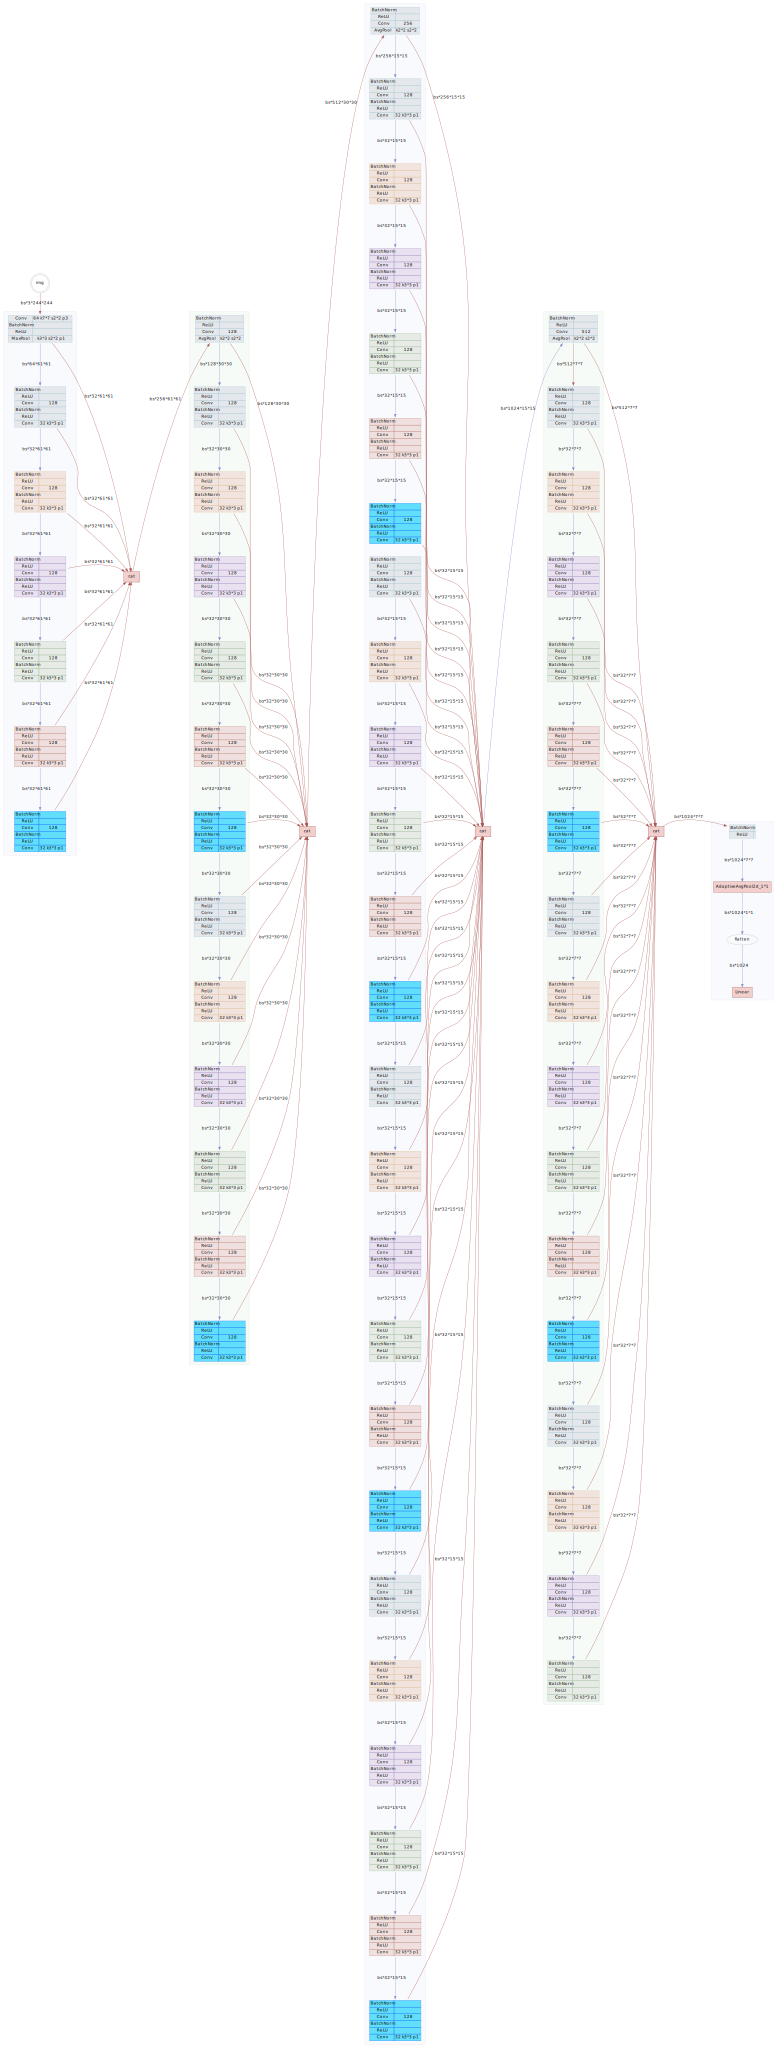

In [1]:
import graphviz

FONT_NAME = "Fira Code Retina"
graph = graphviz.Digraph(name="DenseNet121", format='png', node_attr={'shape': 'plaintext'}, edge_attr = {"constraint":"false"})
graph.attr(rankdir="LR", nodesep="0.5")

with graph.subgraph(name="cluster1") as sub1:
    sub1.attr(color="#E3E5EF", bgcolor="#F9FAFE")
    with graph.subgraph() as s:
        s.node("block1", '''<
            <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E4E7EB" color="#ACC7D2">
            <tr><td>Conv</td><td>64 k7*7 s2*2 p3</td></tr>
            <tr><td>BatchNorm</td><td></td></tr>
            <tr><td>ReLU</td><td></td></tr>
            <tr><td>MaxPool</td><td>k3*3 s2*2 p1</td></tr>
            </table>
            >''', fontname=FONT_NAME)
        s.node('block2', '''<
                <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E4E7EB" color="#ACC7D2">
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>ReLU</td><td></td></tr>
                <tr><td>Conv</td><td>128</td></tr>
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>ReLU</td><td></td></tr>
                <tr><td>Conv</td><td>32 k3*3 p1</td></tr>
                </table>
                >''', fontname=FONT_NAME)
        s.node('block3', '''<
                <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#F1E3DD" color="#DDBF9A">
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>ReLU</td><td></td></tr>
                <tr><td>Conv</td><td>128</td></tr>
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>ReLU</td><td></td></tr>
                <tr><td>Conv</td><td>32 k3*3 p1</td></tr>
                </table>
                >''', fontname=FONT_NAME)
        s.node('block4', '''<
                <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E9E1F0" color="#A592C5">
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>ReLU</td><td></td></tr>
                <tr><td>Conv</td><td>128</td></tr>
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>ReLU</td><td></td></tr>
                <tr><td>Conv</td><td>32 k3*3 p1</td></tr>
                </table>
                >''', fontname=FONT_NAME)
        s.node('block5', '''<
                <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E6ECE5" color="#A2BBA0">
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>ReLU</td><td></td></tr>
                <tr><td>Conv</td><td>128</td></tr>
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>ReLU</td><td></td></tr>
                <tr><td>Conv</td><td>32 k3*3 p1</td></tr>
                </table>
                >''', fontname=FONT_NAME)
        s.node('block6', '''<
                <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#EFE0DF" color="#C08B7B">
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>ReLU</td><td></td></tr>
                <tr><td>Conv</td><td>128</td></tr>
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>ReLU</td><td></td></tr>
                <tr><td>Conv</td><td>32 k3*3 p1</td></tr>
                </table>
                >''', fontname=FONT_NAME)
        s.node('block7', '''<
            <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#61DEFC" color="#2075F8">
            <tr><td>BatchNorm</td><td></td></tr>
            <tr><td>ReLU</td><td></td></tr>
            <tr><td>Conv</td><td>128</td></tr>
            <tr><td>BatchNorm</td><td></td></tr>
            <tr><td>ReLU</td><td></td></tr>
            <tr><td>Conv</td><td>32 k3*3 p1</td></tr>
            </table>
            >''', fontname=FONT_NAME)
    sub1.edge("block1", "block2", color="#7D88C7", label="bs*64*61*61", fontname=FONT_NAME)
    sub1.edge("block2", "block3", color="#7D88C7", label="bs*32*61*61", fontname=FONT_NAME)
    sub1.edge("block3", "block4", color="#7D88C7", label="bs*32*61*61", fontname=FONT_NAME)
    sub1.edge("block4", "block5", color="#7D88C7", label="bs*32*61*61", fontname=FONT_NAME)
    sub1.edge("block5", "block6", color="#7D88C7", label="bs*32*61*61", fontname=FONT_NAME)
    sub1.edge("block6", "block7", color="#7D88C7", label="bs*32*61*61", fontname=FONT_NAME)

graph.node('img', shape="doublecircle", color="grey", fontname=FONT_NAME)
graph.edge("img", "block1", label="bs*3*244*244", color="#AC5553", fontname=FONT_NAME)

graph.node("block8", shape="box", label="cat", color="#A25954", style="filled", fillcolor="#F1CFCD", fontname=FONT_NAME)
graph.edge("block1", "block8", label="bs*32*61*61", color="#AC5553", fontname=FONT_NAME)
graph.edge("block2", "block8", label="bs*32*61*61", color="#AC5553", fontname=FONT_NAME)
graph.edge("block3", "block8", label="bs*32*61*61", color="#AC5553", fontname=FONT_NAME)
graph.edge("block4", "block8", label="bs*32*61*61", color="#AC5553", fontname=FONT_NAME)
graph.edge("block5", "block8", label="bs*32*61*61", color="#AC5553", fontname=FONT_NAME)
graph.edge("block6", "block8", label="bs*32*61*61", color="#AC5553", fontname=FONT_NAME)
graph.edge("block7", "block8", label="bs*32*61*61", color="#AC5553", fontname=FONT_NAME)

graph.node("T0", style="invis")
graph.edge("block4", "T0", constraint="true", style="invis")
graph.edge("T0", "block8", constraint="true", style="invis")

with graph.subgraph(name="cluster2") as sub2:
    sub2.attr(color="#E4ECE0", bgcolor="#F7FBF7")
    with graph.subgraph() as s:
        s.node('block9', '''<
                    <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E4E7EB" color="#ACC7D2">
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>ReLU</td><td></td></tr>
                    <tr><td>Conv</td><td>128</td></tr>
                    <tr><td>AvgPool</td><td>k2*2 s2*2</td></tr>
                    </table>
                    >''', fontname=FONT_NAME)
        s.node('block10', '''<
                <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E4E7EB" color="#ACC7D2">
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>ReLU</td><td></td></tr>
                <tr><td>Conv</td><td>128</td></tr>
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>ReLU</td><td></td></tr>
                <tr><td>Conv</td><td>32 k3*3 p1</td></tr>
                </table>
                >''', fontname=FONT_NAME)
        s.node('block11', '''<
                <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#F1E3DD" color="#DDBF9A">
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>ReLU</td><td></td></tr>
                <tr><td>Conv</td><td>128</td></tr>
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>ReLU</td><td></td></tr>
                <tr><td>Conv</td><td>32 k3*3 p1</td></tr>
                </table>
                >''', fontname=FONT_NAME)
        s.node('block12', '''<
                <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E9E1F0" color="#A592C5">
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>ReLU</td><td></td></tr>
                <tr><td>Conv</td><td>128</td></tr>
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>ReLU</td><td></td></tr>
                <tr><td>Conv</td><td>32 k3*3 p1</td></tr>
                </table>
                >''', fontname=FONT_NAME)
        s.node('block13', '''<
                <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E6ECE5" color="#A2BBA0">
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>ReLU</td><td></td></tr>
                <tr><td>Conv</td><td>128</td></tr>
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>ReLU</td><td></td></tr>
                <tr><td>Conv</td><td>32 k3*3 p1</td></tr>
                </table>
                >''', fontname=FONT_NAME)
        s.node('block14', '''<
                <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#EFE0DF" color="#C08B7B">
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>ReLU</td><td></td></tr>
                <tr><td>Conv</td><td>128</td></tr>
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>ReLU</td><td></td></tr>
                <tr><td>Conv</td><td>32 k3*3 p1</td></tr>
                </table>
                >''', fontname=FONT_NAME)
        s.node('block15', '''<
                <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#61DEFC" color="#2075F8">
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>ReLU</td><td></td></tr>
                <tr><td>Conv</td><td>128</td></tr>
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>ReLU</td><td></td></tr>
                <tr><td>Conv</td><td>32 k3*3 p1</td></tr>
                </table>
                >''', fontname=FONT_NAME)
        s.node('block16', '''<
                    <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E4E7EB" color="#ACC7D2">
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>ReLU</td><td></td></tr>
                    <tr><td>Conv</td><td>128</td></tr>
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>ReLU</td><td></td></tr>
                    <tr><td>Conv</td><td>32 k3*3 p1</td></tr>
                    </table>
                    >''', fontname=FONT_NAME)
        s.node('block17', '''<
                    <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#F1E3DD" color="#DDBF9A">
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>ReLU</td><td></td></tr>
                    <tr><td>Conv</td><td>128</td></tr>
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>ReLU</td><td></td></tr>
                    <tr><td>Conv</td><td>32 k3*3 p1</td></tr>
                    </table>
                    >''', fontname=FONT_NAME)
        s.node('block18', '''<
                    <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E9E1F0" color="#A592C5">
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>ReLU</td><td></td></tr>
                    <tr><td>Conv</td><td>128</td></tr>
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>ReLU</td><td></td></tr>
                    <tr><td>Conv</td><td>32 k3*3 p1</td></tr>
                    </table>
                    >''', fontname=FONT_NAME)
        s.node('block19', '''<
                    <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E6ECE5" color="#A2BBA0">
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>ReLU</td><td></td></tr>
                    <tr><td>Conv</td><td>128</td></tr>
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>ReLU</td><td></td></tr>
                    <tr><td>Conv</td><td>32 k3*3 p1</td></tr>
                    </table>
                    >''', fontname=FONT_NAME)
        s.node('block20', '''<
                    <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#EFE0DF" color="#C08B7B">
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>ReLU</td><td></td></tr>
                    <tr><td>Conv</td><td>128</td></tr>
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>ReLU</td><td></td></tr>
                    <tr><td>Conv</td><td>32 k3*3 p1</td></tr>
                    </table>
                    >''', fontname=FONT_NAME)
        s.node('block21', '''<
                    <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#61DEFC" color="#2075F8">
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>ReLU</td><td></td></tr>
                    <tr><td>Conv</td><td>128</td></tr>
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>ReLU</td><td></td></tr>
                    <tr><td>Conv</td><td>32 k3*3 p1</td></tr>
                    </table>
                    >''', fontname=FONT_NAME)

    sub2.edge("block9", "block10", label="bs*128*30*30", color="#7D88C7", fontname=FONT_NAME)
    sub2.edge("block10", "block11", color="#7D88C7", label="bs*32*30*30", fontname=FONT_NAME)
    sub2.edge("block11", "block12", color="#7D88C7", label="bs*32*30*30", fontname=FONT_NAME)
    sub2.edge("block12", "block13", color="#7D88C7", label="bs*32*30*30", fontname=FONT_NAME)
    sub2.edge("block13", "block14", color="#7D88C7", label="bs*32*30*30", fontname=FONT_NAME)
    sub2.edge("block14", "block15", color="#7D88C7", label="bs*32*30*30", fontname=FONT_NAME)
    sub2.edge("block15", "block16", color="#7D88C7", label="bs*32*30*30", fontname=FONT_NAME)
    sub2.edge("block16", "block17", color="#7D88C7", label="bs*32*30*30", fontname=FONT_NAME)
    sub2.edge("block17", "block18", color="#7D88C7", label="bs*32*30*30", fontname=FONT_NAME)
    sub2.edge("block18", "block19", color="#7D88C7", label="bs*32*30*30", fontname=FONT_NAME)
    sub2.edge("block19", "block20", color="#7D88C7", label="bs*32*30*30", fontname=FONT_NAME)
    sub2.edge("block20", "block21", color="#7D88C7", label="bs*32*30*30", fontname=FONT_NAME)

graph.node("block22", shape="box", label="cat", color="#A25954", style="filled", fillcolor="#F1CFCD",fontname=FONT_NAME)

graph.edge("block9", "block22", label="bs*128*30*30", color="#AC5553", fontname=FONT_NAME)
graph.edge("block10", "block22", label="bs*32*30*30", color="#AC5553", fontname=FONT_NAME)
graph.edge("block11", "block22", label="bs*32*30*30", color="#AC5553", fontname=FONT_NAME)
graph.edge("block12", "block22", label="bs*32*30*30", color="#AC5553", fontname=FONT_NAME)
graph.edge("block13", "block22", label="bs*32*30*30", color="#AC5553", fontname=FONT_NAME)
graph.edge("block14", "block22", label="bs*32*30*30", color="#AC5553", fontname=FONT_NAME)
graph.edge("block15", "block22", label="bs*32*30*30", color="#AC5553", fontname=FONT_NAME)
graph.edge("block16", "block22", label="bs*32*30*30", color="#AC5553", fontname=FONT_NAME)
graph.edge("block17", "block22", label="bs*32*30*30", color="#AC5553", fontname=FONT_NAME)
graph.edge("block18", "block22", label="bs*32*30*30", color="#AC5553", fontname=FONT_NAME)
graph.edge("block19", "block22", label="bs*32*30*30", color="#AC5553", fontname=FONT_NAME)
graph.edge("block20", "block22", label="bs*32*30*30", color="#AC5553", fontname=FONT_NAME)
graph.edge("block21", "block22", label="bs*32*30*30", color="#AC5553", fontname=FONT_NAME)

graph.node("T1", style="invis")
graph.edge("block8", "T1", constraint="true", style="invis")
graph.edge("T1", "block12", constraint="true", style="invis")
graph.edge("block8", "block9", label="bs*256*61*61", color="#AC5553", fontname=FONT_NAME)

graph.node("T2", style="invis")
graph.edge("block15", "T2", constraint="true", style="invis")
graph.edge("T2", "block22", constraint="true", style="invis")

with graph.subgraph(name="cluster3") as sub3:
    sub3.attr(color="#E3E5EF", bgcolor="#F9FAFE")
    with graph.subgraph() as s:
        s.node('block23', '''<
                    <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E4E7EB" color="#ACC7D2">
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>ReLU</td><td></td></tr>
                    <tr><td>Conv</td><td>256</td></tr>
                    <tr><td>AvgPool</td><td>k2*2 s2*2</td></tr>
                    </table>
                    >''', fontname=FONT_NAME)
        s.node('block24', '''<
                <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E4E7EB" color="#ACC7D2">
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>ReLU</td><td></td></tr>
                <tr><td>Conv</td><td>128</td></tr>
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>ReLU</td><td></td></tr>
                <tr><td>Conv</td><td>32 k3*3 p1</td></tr>
                </table>
                >''', fontname=FONT_NAME)
        s.node('block25', '''<
                <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#F1E3DD" color="#DDBF9A">
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>ReLU</td><td></td></tr>
                <tr><td>Conv</td><td>128</td></tr>
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>ReLU</td><td></td></tr>
                <tr><td>Conv</td><td>32 k3*3 p1</td></tr>
                </table>
                >''', fontname=FONT_NAME)
        s.node('block26', '''<
                <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E9E1F0" color="#A592C5">
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>ReLU</td><td></td></tr>
                <tr><td>Conv</td><td>128</td></tr>
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>ReLU</td><td></td></tr>
                <tr><td>Conv</td><td>32 k3*3 p1</td></tr>
                </table>
                >''', fontname=FONT_NAME)
        s.node('block27', '''<
                <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E6ECE5" color="#A2BBA0">
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>ReLU</td><td></td></tr>
                <tr><td>Conv</td><td>128</td></tr>
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>ReLU</td><td></td></tr>
                <tr><td>Conv</td><td>32 k3*3 p1</td></tr>
                </table>
                >''', fontname=FONT_NAME)
        s.node('block28', '''<
                <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#EFE0DF" color="#C08B7B">
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>ReLU</td><td></td></tr>
                <tr><td>Conv</td><td>128</td></tr>
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>ReLU</td><td></td></tr>
                <tr><td>Conv</td><td>32 k3*3 p1</td></tr>
                </table>
                >''', fontname=FONT_NAME)
        s.node('block29', '''<
                <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#61DEFC" color="#2075F8">
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>ReLU</td><td></td></tr>
                <tr><td>Conv</td><td>128</td></tr>
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>ReLU</td><td></td></tr>
                <tr><td>Conv</td><td>32 k3*3 p1</td></tr>
                </table>
                >''', fontname=FONT_NAME)
        s.node('block30', '''<
                    <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E4E7EB" color="#ACC7D2">
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>ReLU</td><td></td></tr>
                    <tr><td>Conv</td><td>128</td></tr>
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>ReLU</td><td></td></tr>
                    <tr><td>Conv</td><td>32 k3*3 p1</td></tr>
                    </table>
                    >''', fontname=FONT_NAME)
        s.node('block31', '''<
                    <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#F1E3DD" color="#DDBF9A">
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>ReLU</td><td></td></tr>
                    <tr><td>Conv</td><td>128</td></tr>
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>ReLU</td><td></td></tr>
                    <tr><td>Conv</td><td>32 k3*3 p1</td></tr>
                    </table>
                    >''', fontname=FONT_NAME)
        s.node('block32', '''<
                    <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E9E1F0" color="#A592C5">
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>ReLU</td><td></td></tr>
                    <tr><td>Conv</td><td>128</td></tr>
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>ReLU</td><td></td></tr>
                    <tr><td>Conv</td><td>32 k3*3 p1</td></tr>
                    </table>
                    >''', fontname=FONT_NAME)
        s.node('block33', '''<
                    <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E6ECE5" color="#A2BBA0">
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>ReLU</td><td></td></tr>
                    <tr><td>Conv</td><td>128</td></tr>
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>ReLU</td><td></td></tr>
                    <tr><td>Conv</td><td>32 k3*3 p1</td></tr>
                    </table>
                    >''', fontname=FONT_NAME)
        s.node('block34', '''<
                    <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#EFE0DF" color="#C08B7B">
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>ReLU</td><td></td></tr>
                    <tr><td>Conv</td><td>128</td></tr>
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>ReLU</td><td></td></tr>
                    <tr><td>Conv</td><td>32 k3*3 p1</td></tr>
                    </table>
                    >''', fontname=FONT_NAME)
        s.node('block35', '''<
                    <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#61DEFC" color="#2075F8">
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>ReLU</td><td></td></tr>
                    <tr><td>Conv</td><td>128</td></tr>
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>ReLU</td><td></td></tr>
                    <tr><td>Conv</td><td>32 k3*3 p1</td></tr>
                    </table>
                    >''', fontname=FONT_NAME)
        s.node('block36', '''<
                    <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E4E7EB" color="#ACC7D2">
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>ReLU</td><td></td></tr>
                    <tr><td>Conv</td><td>128</td></tr>
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>ReLU</td><td></td></tr>
                    <tr><td>Conv</td><td>32 k3*3 p1</td></tr>
                    </table>
                    >''', fontname=FONT_NAME)
        s.node('block37', '''<
                    <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#F1E3DD" color="#DDBF9A">
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>ReLU</td><td></td></tr>
                    <tr><td>Conv</td><td>128</td></tr>
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>ReLU</td><td></td></tr>
                    <tr><td>Conv</td><td>32 k3*3 p1</td></tr>
                    </table>
                    >''', fontname=FONT_NAME)
        s.node('block38', '''<
                    <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E9E1F0" color="#A592C5">
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>ReLU</td><td></td></tr>
                    <tr><td>Conv</td><td>128</td></tr>
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>ReLU</td><td></td></tr>
                    <tr><td>Conv</td><td>32 k3*3 p1</td></tr>
                    </table>
                    >''', fontname=FONT_NAME)
        s.node('block39', '''<
                    <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E6ECE5" color="#A2BBA0">
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>ReLU</td><td></td></tr>
                    <tr><td>Conv</td><td>128</td></tr>
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>ReLU</td><td></td></tr>
                    <tr><td>Conv</td><td>32 k3*3 p1</td></tr>
                    </table>
                    >''', fontname=FONT_NAME)
        s.node('block40', '''<
                    <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#EFE0DF" color="#C08B7B">
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>ReLU</td><td></td></tr>
                    <tr><td>Conv</td><td>128</td></tr>
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>ReLU</td><td></td></tr>
                    <tr><td>Conv</td><td>32 k3*3 p1</td></tr>
                    </table>
                    >''', fontname=FONT_NAME)
        s.node('block41', '''<
                    <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#61DEFC" color="#2075F8">
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>ReLU</td><td></td></tr>
                    <tr><td>Conv</td><td>128</td></tr>
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>ReLU</td><td></td></tr>
                    <tr><td>Conv</td><td>32 k3*3 p1</td></tr>
                    </table>
                    >''', fontname=FONT_NAME)
        s.node('block42', '''<
                        <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E4E7EB" color="#ACC7D2">
                        <tr><td>BatchNorm</td><td></td></tr>
                        <tr><td>ReLU</td><td></td></tr>
                        <tr><td>Conv</td><td>128</td></tr>
                        <tr><td>BatchNorm</td><td></td></tr>
                        <tr><td>ReLU</td><td></td></tr>
                        <tr><td>Conv</td><td>32 k3*3 p1</td></tr>
                        </table>
                        >''', fontname=FONT_NAME)
        s.node('block43', '''<
                        <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#F1E3DD" color="#DDBF9A">
                        <tr><td>BatchNorm</td><td></td></tr>
                        <tr><td>ReLU</td><td></td></tr>
                        <tr><td>Conv</td><td>128</td></tr>
                        <tr><td>BatchNorm</td><td></td></tr>
                        <tr><td>ReLU</td><td></td></tr>
                        <tr><td>Conv</td><td>32 k3*3 p1</td></tr>
                        </table>
                        >''', fontname=FONT_NAME)
        s.node('block44', '''<
                        <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E9E1F0" color="#A592C5">
                        <tr><td>BatchNorm</td><td></td></tr>
                        <tr><td>ReLU</td><td></td></tr>
                        <tr><td>Conv</td><td>128</td></tr>
                        <tr><td>BatchNorm</td><td></td></tr>
                        <tr><td>ReLU</td><td></td></tr>
                        <tr><td>Conv</td><td>32 k3*3 p1</td></tr>
                        </table>
                        >''', fontname=FONT_NAME)
        s.node('block45', '''<
                        <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E6ECE5" color="#A2BBA0">
                        <tr><td>BatchNorm</td><td></td></tr>
                        <tr><td>ReLU</td><td></td></tr>
                        <tr><td>Conv</td><td>128</td></tr>
                        <tr><td>BatchNorm</td><td></td></tr>
                        <tr><td>ReLU</td><td></td></tr>
                        <tr><td>Conv</td><td>32 k3*3 p1</td></tr>
                        </table>
                        >''', fontname=FONT_NAME)
        s.node('block46', '''<
                        <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#EFE0DF" color="#C08B7B">
                        <tr><td>BatchNorm</td><td></td></tr>
                        <tr><td>ReLU</td><td></td></tr>
                        <tr><td>Conv</td><td>128</td></tr>
                        <tr><td>BatchNorm</td><td></td></tr>
                        <tr><td>ReLU</td><td></td></tr>
                        <tr><td>Conv</td><td>32 k3*3 p1</td></tr>
                        </table>
                        >''', fontname=FONT_NAME)
        s.node('block47', '''<
                        <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#61DEFC" color="#2075F8">
                        <tr><td>BatchNorm</td><td></td></tr>
                        <tr><td>ReLU</td><td></td></tr>
                        <tr><td>Conv</td><td>128</td></tr>
                        <tr><td>BatchNorm</td><td></td></tr>
                        <tr><td>ReLU</td><td></td></tr>
                        <tr><td>Conv</td><td>32 k3*3 p1</td></tr>
                        </table>
                        >''', fontname=FONT_NAME)
    sub3.edge("block23", "block24", label="bs*256*15*15", color="#7D88C7", fontname=FONT_NAME)
    sub3.edge("block24", "block25", color="#7D88C7", label="bs*32*15*15", fontname=FONT_NAME)
    sub3.edge("block25", "block26", color="#7D88C7", label="bs*32*15*15", fontname=FONT_NAME)
    sub3.edge("block26", "block27", color="#7D88C7", label="bs*32*15*15", fontname=FONT_NAME)
    sub3.edge("block27", "block28", color="#7D88C7", label="bs*32*15*15", fontname=FONT_NAME)
    sub3.edge("block28", "block29", color="#7D88C7", label="bs*32*15*15", fontname=FONT_NAME)
    sub3.edge("block30", "block31", color="#7D88C7", label="bs*32*15*15", fontname=FONT_NAME)
    sub3.edge("block31", "block32", color="#7D88C7", label="bs*32*15*15", fontname=FONT_NAME)
    sub3.edge("block32", "block33", color="#7D88C7", label="bs*32*15*15", fontname=FONT_NAME)
    sub3.edge("block33", "block34", color="#7D88C7", label="bs*32*15*15", fontname=FONT_NAME)
    sub3.edge("block34", "block35", color="#7D88C7", label="bs*32*15*15", fontname=FONT_NAME)
    sub3.edge("block35", "block36", color="#7D88C7", label="bs*32*15*15", fontname=FONT_NAME)
    sub3.edge("block36", "block37", color="#7D88C7", label="bs*32*15*15", fontname=FONT_NAME)
    sub3.edge("block37", "block38", color="#7D88C7", label="bs*32*15*15", fontname=FONT_NAME)
    sub3.edge("block38", "block39", color="#7D88C7", label="bs*32*15*15", fontname=FONT_NAME)
    sub3.edge("block39", "block40", color="#7D88C7", label="bs*32*15*15", fontname=FONT_NAME)
    sub3.edge("block40", "block41", color="#7D88C7", label="bs*32*15*15", fontname=FONT_NAME)
    sub3.edge("block41", "block42", color="#7D88C7", label="bs*32*15*15", fontname=FONT_NAME)
    sub3.edge("block42", "block43", color="#7D88C7", label="bs*32*15*15", fontname=FONT_NAME)
    sub3.edge("block43", "block44", color="#7D88C7", label="bs*32*15*15", fontname=FONT_NAME)
    sub3.edge("block44", "block45", color="#7D88C7", label="bs*32*15*15", fontname=FONT_NAME)
    sub3.edge("block45", "block46", color="#7D88C7", label="bs*32*15*15", fontname=FONT_NAME)
    sub3.edge("block46", "block47", color="#7D88C7", label="bs*32*15*15", fontname=FONT_NAME)

graph.node("block48", shape="box", label="cat", color="#A25954", style="filled", fillcolor="#F1CFCD",
           fontname=FONT_NAME)
graph.edge("block23", "block48", label="bs*256*15*15", color="#AC5553", fontname=FONT_NAME)
graph.edge("block24", "block48", label="bs*32*15*15", color="#AC5553", fontname=FONT_NAME)
graph.edge("block25", "block48", label="bs*32*15*15", color="#AC5553", fontname=FONT_NAME)
graph.edge("block26", "block48", label="bs*32*15*15", color="#AC5553", fontname=FONT_NAME)
graph.edge("block27", "block48", label="bs*32*15*15", color="#AC5553", fontname=FONT_NAME)
graph.edge("block28", "block48", label="bs*32*15*15", color="#AC5553", fontname=FONT_NAME)
graph.edge("block29", "block48", label="bs*32*15*15", color="#AC5553", fontname=FONT_NAME)
graph.edge("block30", "block48", label="bs*32*15*15", color="#AC5553", fontname=FONT_NAME)
graph.edge("block31", "block48", label="bs*32*15*15", color="#AC5553", fontname=FONT_NAME)
graph.edge("block32", "block48", label="bs*32*15*15", color="#AC5553", fontname=FONT_NAME)
graph.edge("block33", "block48", label="bs*32*15*15", color="#AC5553", fontname=FONT_NAME)
graph.edge("block34", "block48", label="bs*32*15*15", color="#AC5553", fontname=FONT_NAME)
graph.edge("block35", "block48", label="bs*32*15*15", color="#AC5553", fontname=FONT_NAME)
graph.edge("block36", "block48", label="bs*32*15*15", color="#AC5553", fontname=FONT_NAME)
graph.edge("block37", "block48", label="bs*32*15*15", color="#AC5553", fontname=FONT_NAME)
graph.edge("block38", "block48", label="bs*32*15*15", color="#AC5553", fontname=FONT_NAME)
graph.edge("block39", "block48", label="bs*32*15*15", color="#AC5553", fontname=FONT_NAME)
graph.edge("block40", "block48", label="bs*32*15*15", color="#AC5553", fontname=FONT_NAME)
graph.edge("block41", "block48", label="bs*32*15*15", color="#AC5553", fontname=FONT_NAME)
graph.edge("block42", "block48", label="bs*32*15*15", color="#AC5553", fontname=FONT_NAME)
graph.edge("block43", "block48", label="bs*32*15*15", color="#AC5553", fontname=FONT_NAME)
graph.edge("block44", "block48", label="bs*32*15*15", color="#AC5553", fontname=FONT_NAME)
graph.edge("block45", "block48", label="bs*32*15*15", color="#AC5553", fontname=FONT_NAME)
graph.edge("block46", "block48", label="bs*32*15*15", color="#AC5553", fontname=FONT_NAME)
graph.edge("block47", "block48", label="bs*32*15*15", color="#AC5553", fontname=FONT_NAME)

graph.node("T3", style="invis")
graph.edge("block22", "T3", constraint="true", style="invis")
graph.edge("T3", "block33", constraint="true", style="invis")
graph.edge("block22", "block23", label="bs*512*30*30", color="#AC5553", fontname=FONT_NAME)

graph.node("T4", style="invis")
graph.edge("block33", "T4", constraint="true", style="invis")
graph.edge("T4", "block48", constraint="true", style="invis")

with graph.subgraph(name="cluster4") as sub4:
    sub4.attr(color="#E4ECE0", bgcolor="#F7FBF7")
    with graph.subgraph() as s:
        s.node('block49', '''<
                    <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E4E7EB" color="#ACC7D2">
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>ReLU</td><td></td></tr>
                    <tr><td>Conv</td><td>512</td></tr>
                    <tr><td>AvgPool</td><td>k2*2 s2*2</td></tr>
                    </table>
                    >''', fontname=FONT_NAME)
        s.node('block50', '''<
                <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E4E7EB" color="#ACC7D2">
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>ReLU</td><td></td></tr>
                <tr><td>Conv</td><td>128</td></tr>
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>ReLU</td><td></td></tr>
                <tr><td>Conv</td><td>32 k3*3 p1</td></tr>
                </table>
                >''', fontname=FONT_NAME)
        s.node('block51', '''<
                <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#F1E3DD" color="#DDBF9A">
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>ReLU</td><td></td></tr>
                <tr><td>Conv</td><td>128</td></tr>
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>ReLU</td><td></td></tr>
                <tr><td>Conv</td><td>32 k3*3 p1</td></tr>
                </table>
                >''', fontname=FONT_NAME)
        s.node('block52', '''<
                <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E9E1F0" color="#A592C5">
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>ReLU</td><td></td></tr>
                <tr><td>Conv</td><td>128</td></tr>
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>ReLU</td><td></td></tr>
                <tr><td>Conv</td><td>32 k3*3 p1</td></tr>
                </table>
                >''', fontname=FONT_NAME)
        s.node('block53', '''<
                <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E6ECE5" color="#A2BBA0">
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>ReLU</td><td></td></tr>
                <tr><td>Conv</td><td>128</td></tr>
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>ReLU</td><td></td></tr>
                <tr><td>Conv</td><td>32 k3*3 p1</td></tr>
                </table>
                >''', fontname=FONT_NAME)
        s.node('block54', '''<
                <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#EFE0DF" color="#C08B7B">
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>ReLU</td><td></td></tr>
                <tr><td>Conv</td><td>128</td></tr>
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>ReLU</td><td></td></tr>
                <tr><td>Conv</td><td>32 k3*3 p1</td></tr>
                </table>
                >''', fontname=FONT_NAME)
        s.node('block55', '''<
                <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#61DEFC" color="#2075F8">
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>ReLU</td><td></td></tr>
                <tr><td>Conv</td><td>128</td></tr>
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>ReLU</td><td></td></tr>
                <tr><td>Conv</td><td>32 k3*3 p1</td></tr>
                </table>
                >''', fontname=FONT_NAME)
        s.node('block56', '''<
                    <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E4E7EB" color="#ACC7D2">
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>ReLU</td><td></td></tr>
                    <tr><td>Conv</td><td>128</td></tr>
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>ReLU</td><td></td></tr>
                    <tr><td>Conv</td><td>32 k3*3 p1</td></tr>
                    </table>
                    >''', fontname=FONT_NAME)
        s.node('block57', '''<
                    <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#F1E3DD" color="#DDBF9A">
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>ReLU</td><td></td></tr>
                    <tr><td>Conv</td><td>128</td></tr>
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>ReLU</td><td></td></tr>
                    <tr><td>Conv</td><td>32 k3*3 p1</td></tr>
                    </table>
                    >''', fontname=FONT_NAME)
        s.node('block58', '''<
                    <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E9E1F0" color="#A592C5">
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>ReLU</td><td></td></tr>
                    <tr><td>Conv</td><td>128</td></tr>
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>ReLU</td><td></td></tr>
                    <tr><td>Conv</td><td>32 k3*3 p1</td></tr>
                    </table>
                    >''', fontname=FONT_NAME)
        s.node('block59', '''<
                    <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E6ECE5" color="#A2BBA0">
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>ReLU</td><td></td></tr>
                    <tr><td>Conv</td><td>128</td></tr>
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>ReLU</td><td></td></tr>
                    <tr><td>Conv</td><td>32 k3*3 p1</td></tr>
                    </table>
                    >''', fontname=FONT_NAME)
        s.node('block60', '''<
                    <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#EFE0DF" color="#C08B7B">
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>ReLU</td><td></td></tr>
                    <tr><td>Conv</td><td>128</td></tr>
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>ReLU</td><td></td></tr>
                    <tr><td>Conv</td><td>32 k3*3 p1</td></tr>
                    </table>
                    >''', fontname=FONT_NAME)
        s.node('block61', '''<
                    <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#61DEFC" color="#2075F8">
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>ReLU</td><td></td></tr>
                    <tr><td>Conv</td><td>128</td></tr>
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>ReLU</td><td></td></tr>
                    <tr><td>Conv</td><td>32 k3*3 p1</td></tr>
                    </table>
                    >''', fontname=FONT_NAME)
        s.node('block62', '''<
                <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E4E7EB" color="#ACC7D2">
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>ReLU</td><td></td></tr>
                <tr><td>Conv</td><td>128</td></tr>
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>ReLU</td><td></td></tr>
                <tr><td>Conv</td><td>32 k3*3 p1</td></tr>
                </table>
                >''', fontname=FONT_NAME)
        s.node('block63', '''<
                <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#F1E3DD" color="#DDBF9A">
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>ReLU</td><td></td></tr>
                <tr><td>Conv</td><td>128</td></tr>
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>ReLU</td><td></td></tr>
                <tr><td>Conv</td><td>32 k3*3 p1</td></tr>
                </table>
                >''', fontname=FONT_NAME)
        s.node('block64', '''<
                <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E9E1F0" color="#A592C5">
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>ReLU</td><td></td></tr>
                <tr><td>Conv</td><td>128</td></tr>
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>ReLU</td><td></td></tr>
                <tr><td>Conv</td><td>32 k3*3 p1</td></tr>
                </table>
                >''', fontname=FONT_NAME)
        s.node('block65', '''<
                <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E6ECE5" color="#A2BBA0">
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>ReLU</td><td></td></tr>
                <tr><td>Conv</td><td>128</td></tr>
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>ReLU</td><td></td></tr>
                <tr><td>Conv</td><td>32 k3*3 p1</td></tr>
                </table>
                >''', fontname=FONT_NAME)

    sub4.edge("block49", "block50", label="bs*512*7*7", color="#AC5553", fontname=FONT_NAME)
    sub4.edge("block50", "block51", color="#7D88C7", label="bs*32*7*7", fontname=FONT_NAME)
    sub4.edge("block51", "block52", color="#7D88C7", label="bs*32*7*7", fontname=FONT_NAME)
    sub4.edge("block52", "block53", color="#7D88C7", label="bs*32*7*7", fontname=FONT_NAME)
    sub4.edge("block53", "block54", color="#7D88C7", label="bs*32*7*7", fontname=FONT_NAME)
    sub4.edge("block54", "block55", color="#7D88C7", label="bs*32*7*7", fontname=FONT_NAME)
    sub4.edge("block55", "block56", color="#7D88C7", label="bs*32*7*7", fontname=FONT_NAME)
    sub4.edge("block56", "block57", color="#7D88C7", label="bs*32*7*7", fontname=FONT_NAME)
    sub4.edge("block57", "block58", color="#7D88C7", label="bs*32*7*7", fontname=FONT_NAME)
    sub4.edge("block58", "block59", color="#7D88C7", label="bs*32*7*7", fontname=FONT_NAME)
    sub4.edge("block59", "block60", color="#7D88C7", label="bs*32*7*7", fontname=FONT_NAME)
    sub4.edge("block60", "block61", color="#7D88C7", label="bs*32*7*7", fontname=FONT_NAME)
    sub4.edge("block61", "block62", color="#7D88C7", label="bs*32*7*7", fontname=FONT_NAME)
    sub4.edge("block62", "block63", color="#7D88C7", label="bs*32*7*7", fontname=FONT_NAME)
    sub4.edge("block63", "block64", color="#7D88C7", label="bs*32*7*7", fontname=FONT_NAME)
    sub4.edge("block64", "block65", color="#7D88C7", label="bs*32*7*7", fontname=FONT_NAME)

graph.node("block66", shape="box", label="cat", color="#A25954", style="filled", fillcolor="#F1CFCD",fontname=FONT_NAME)
graph.edge("block49", "block66", label="bs*512*7*7", color="#AC5553", fontname=FONT_NAME)
graph.edge("block50", "block66", label="bs*32*7*7", color="#AC5553", fontname=FONT_NAME)
graph.edge("block51", "block66", label="bs*32*7*7", color="#AC5553", fontname=FONT_NAME)
graph.edge("block52", "block66", label="bs*32*7*7", color="#AC5553", fontname=FONT_NAME)
graph.edge("block53", "block66", label="bs*32*7*7", color="#AC5553", fontname=FONT_NAME)
graph.edge("block54", "block66", label="bs*32*7*7", color="#AC5553", fontname=FONT_NAME)
graph.edge("block55", "block66", label="bs*32*7*7", color="#AC5553", fontname=FONT_NAME)
graph.edge("block56", "block66", label="bs*32*7*7", color="#AC5553", fontname=FONT_NAME)
graph.edge("block57", "block66", label="bs*32*7*7", color="#AC5553", fontname=FONT_NAME)
graph.edge("block58", "block66", label="bs*32*7*7", color="#AC5553", fontname=FONT_NAME)
graph.edge("block59", "block66", label="bs*32*7*7", color="#AC5553", fontname=FONT_NAME)
graph.edge("block60", "block66", label="bs*32*7*7", color="#AC5553", fontname=FONT_NAME)
graph.edge("block61", "block66", label="bs*32*7*7", color="#AC5553", fontname=FONT_NAME)
graph.edge("block62", "block66", label="bs*32*7*7", color="#AC5553", fontname=FONT_NAME)
graph.edge("block63", "block66", label="bs*32*7*7", color="#AC5553", fontname=FONT_NAME)
graph.edge("block64", "block66", label="bs*32*7*7", color="#AC5553", fontname=FONT_NAME)
graph.edge("block65", "block66", label="bs*32*7*7", color="#AC5553", fontname=FONT_NAME)

graph.node("T5", style="invis")
graph.edge("block48", "T5", constraint="true", style="invis")
graph.edge("T5", "block55", constraint="true", style="invis")
graph.edge("block48", "block49", label="bs*1024*15*15", color="#7D88C7", fontname=FONT_NAME)

graph.node("T6", style="invis")
graph.edge("block55", "T6", constraint="true", style="invis")
graph.edge("T6", "block66", constraint="true", style="invis")

with graph.subgraph(name="cluster5") as sub5:
    sub5.attr(color="#E3E5EF", bgcolor="#F9FAFE")
    with graph.subgraph() as s:
        s.node('block67', '''<
                    <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E4E7EB" color="#ACC7D2">
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>ReLU</td><td></td></tr>
                    </table>
                    >''', fontname=FONT_NAME)
        s.node("block68", shape="box", color="#A25954", style="filled", fillcolor="#F1CFCD",label="AdaptiveAvgPool2d_1*1",fontname=FONT_NAME)
        s.node("block69", shape="ellipse", color="grey", label="flatten", fontname=FONT_NAME)
        s.node("block70", shape="box", color="#A25954", style="filled", fillcolor="#F1CFCD", label="Linear",fontname=FONT_NAME)
    sub5.edge("block67", "block68", color="#7D88C7", label="bs*1024*7*7", fontname=FONT_NAME)
    sub5.edge("block68", "block69", color="#7D88C7", label="bs*1024*1*1", fontname=FONT_NAME)
    sub5.edge("block69", "block70", color="#7D88C7", label="bs*1024", fontname=FONT_NAME)

graph.node("T7", style="invis")
graph.edge("block66", "T7", constraint="true", style="invis")
graph.edge("T7", "block67", constraint="true", style="invis")
graph.edge("block66", "block67", label="bs*1024*7*7", color="#AC5553", fontname=FONT_NAME)
graph